# PREDICTIVE MODELLING AROUND ACCESS TO SAFE DRINKING WATER IN SUB SAHARA AFRICA 

### The main aim of this project is to investigate the level of achievement of SDG 6 in six sub-Sahara countries and predict their respective coverage in 2030.

### 1) IMPORT LIBRARIES

In [1]:
pip install pmdarima

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
#import all libraries
import pandas as pd                                              #for data manipulationa and analysis
import numpy as np                                               #for scientific/mathematic functions for arrays
import seaborn as sns                                            #for data visualisation
import matplotlib.pyplot as plt                                  #for variety of plotting
from matplotlib.pylab import rcParams                            #set parameters for plots
rcParams['figure.figsize']= 10, 6
%matplotlib inline

#Import ARIMA libraries
from statsmodels.tsa.arima_model import ARIMA                    #imports ARIMA 
from statsmodels.tsa.stattools import adfuller, kpss             #for checking stationarity of time series
from statsmodels.tsa.stattools import acf, pacf                  #for identifying correlation
from statsmodels.tsa.seasonal import seasonal_decompose          #to decompose time series into trend, seasonal and residual
import pmdarima as pm                                            #for automatic time series forcasting
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima                            #imports auto arima
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing, Holt #for classes of exponential smoothing libraries
import statsmodels.api as sm                                     #testing statistical models
import scipy
from statsmodels.graphics.api import qqplot

#Import metrics
import sklearn
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error #for evaluationg models

#import datetime
import datetime                                                   #for working with dates and time
from datetime import datetime

import warnings                                                   #for hamdling warnings
warnings.filterwarnings("ignore", category=FutureWarning)

### 2) READ AND UNDERSTAND DATA

In [3]:
#read dataset from csv to pandas
jmp = pd.read_csv("jmp_data.csv")

In [4]:
#view dimensions of dataset
jmp.shape

(14531, 7)

In [5]:
#basic information on the dataset
jmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14531 entries, 0 to 14530
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            14531 non-null  int64  
 1   Service Type    14531 non-null  object 
 2   Service Level   14531 non-null  object 
 3   Coverage        14531 non-null  float64
 4   ISO3            14531 non-null  object 
 5   Residence Type  14531 non-null  object 
 6   Population      14531 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 794.8+ KB


#### The dataset has 14531 rows and 7 columns and there are no missing values

### 3) EXPLORATORY DATA ANALYSIS (EDA)

In [6]:
#display first five rows dataset
jmp.head()

Year    Service Type   Service Level   Coverage ISO3 Residence Type  \
0  2000  Drinking water  At least basic  41.144310  AGO          total   
1  2000  Drinking water  At least basic  21.152641  AGO          rural   
2  2000  Drinking water  At least basic  61.066527  AGO          urban   
3  2001  Drinking water  At least basic  42.254676  AGO          total   
4  2001  Drinking water  At least basic  21.528216  AGO          rural   

     Population  
0  6.745224e+06  
1  1.730872e+06  
2  5.014352e+06  
3  7.158613e+06  
4  1.777145e+06

In [7]:
#view columns in dataset
jmp.columns

Index(['Year', 'Service Type', 'Service Level', 'Coverage', 'ISO3',
       'Residence Type', 'Population'],
      dtype='object')

In [8]:
#show data types in dataset
jmp.dtypes

Year                int64
Service Type       object
Service Level      object
Coverage          float64
ISO3               object
Residence Type     object
Population        float64
dtype: object

In [9]:
#show statistical summary of numerical columns in dataset
jmp.describe()

Year      Coverage    Population
count  14531.000000  14531.000000  1.453100e+04
mean    2010.960498     22.359094  2.781829e+06
std        6.580359     23.082799  6.160316e+06
min     2000.000000      0.000000  0.000000e+00
25%     2005.000000      5.444749  1.176434e+05
50%     2011.000000     13.661202  6.964952e+05
75%     2017.000000     33.706402  2.747662e+06
max     2022.000000    100.000000  1.107010e+08

#### All the numerical columns have 14,531 data
#### The population column is in exponential, highest of eight. This shows that some countries have population totalling hundreds of millions (100,000,000)
#### Noticeably, the min values in coverage and population indicate 0 while the maximum values are 100 and 1.1 x 10^8 respectively


In [10]:
#check for duplicated values
jmp.duplicated().sum()

0

#### There are no duplicated values

In [11]:
#check for missing values
jmp.isnull().sum()

Year              0
Service Type      0
Service Level     0
Coverage          0
ISO3              0
Residence Type    0
Population        0
dtype: int64

#### There are no missing values

In [12]:
#get unique values
jmp.value_counts()

Year  Service Type    Service Level    Coverage   ISO3  Residence Type  Population  
2000  Drinking water  At least basic   5.685182   SOM   rural           3.309822e+05    1
2015  Drinking water  Limited service  3.834252   SEN   total           5.504522e+05    1
                      Basic service    55.361336  MWI   rural           7.847852e+06    1
                                       56.734478  GHA   rural           7.520611e+06    1
                                       57.489166  LSO   rural           8.902021e+05    1
                                                                                       ..
2007  Drinking water  Surface water    8.770858   TCD   rural           7.348123e+05    1
                                       9.261830   CIV   rural           9.898570e+05    1
                                       9.397741   MDG   urban           5.625539e+05    1
                                       9.400031   ZWE   rural           7.754436e+05    1
2022  Drinking 

In [13]:
#get unique values in year
jmp["Year"].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022], dtype=int64)

#### The time series range from 2000 to 2022

In [14]:
#get unique values in residence type
jmp["Residence Type"].unique()

array(['total', 'rural', 'urban'], dtype=object)

In [15]:
#get unique values in country
jmp["ISO3"].unique()

array(['AGO', 'BDI', 'BEN', 'BFA', 'BWA', 'CMR', 'COM', 'CPV', 'DJI',
       'ERI', 'GAB', 'GIN', 'GNQ', 'KEN', 'LBR', 'MLI', 'MOZ', 'MRT',
       'MUS', 'NAM', 'NER', 'RWA', 'SOM', 'SSD', 'SWZ', 'SYC', 'ZAF',
       'ZMB', 'CAF', 'CIV', 'COD', 'COG', 'ETH', 'GHA', 'GMB', 'GNB',
       'LSO', 'MDG', 'MWI', 'MYT', 'NGA', 'REU', 'SEN', 'SHN', 'SLE',
       'STP', 'TCD', 'TGO', 'TZA', 'UGA', 'ZWE'], dtype=object)

#### The 51 sub Saharan African countries

In [16]:
#get unique values in service level
jmp["Service Level"].unique()

array(['At least basic', 'Basic service', 'Limited service',
       'Safely managed service', 'Surface water', 'Unimproved'],
      dtype=object)

#### There are basically 5 different types of service levels
#### 'Safely managed service': drinking water is from a reliable water supply which is easily accessible and on premises.
#### 'At least basic' or 'Basic service': drinking water is from an improved source and takes less than 30mins roundtrip for collection. 
####  'Limited service' : drinking water is from an improved source but it takes time for collection which is about 30 mins roundtrip.
#### 'Unimproved': drinking water is from an unprotected well or spring and prone to contamination.
#### 'Surface water' : drinking water is from natural bodies of water such as rivers, seas, streams, canals etc.


### EXPLORING POPULATION COLUMN

### i) Countries with population above 100,000,000 population

In [17]:
population_above_hrd_million = jmp[jmp["Population"] > 100000000]
population_above_hrd_million 

Year    Service Type  Service Level   Coverage ISO3 Residence Type  \
2552  2020  Drinking water  Basic service  48.508301  NGA          total   
2555  2021  Drinking water  Basic service  49.579163  NGA          total   
2558  2022  Drinking water  Basic service  50.654522  NGA          total   

        Population  
2552  1.010561e+08  
2555  1.058026e+08  
2558  1.107010e+08

#### Nigeria is the only country with population above 100 million, and this is from 2020 to 2022.

### ii) Countries with population above 10,000,000 population

In [18]:
population_above_ten_million = jmp[jmp["Population"] > 10000000]
population_above_ten_million

Year    Service Type   Service Level   Coverage ISO3 Residence Type  \
21     2007  Drinking water  At least basic  47.961469  AGO          total   
24     2008  Drinking water  At least basic  48.770404  AGO          total   
27     2009  Drinking water  At least basic  49.575164  AGO          total   
30     2010  Drinking water  At least basic  50.376840  AGO          total   
33     2011  Drinking water  At least basic  51.174836  AGO          total   
...     ...             ...             ...        ...  ...            ...   
14229  2014  Drinking water      Unimproved  30.220241  TZA          rural   
14231  2015  Drinking water      Unimproved  21.935431  TZA          total   
14232  2015  Drinking water      Unimproved  28.524267  TZA          rural   
14234  2016  Drinking water      Unimproved  20.325194  TZA          total   
14237  2017  Drinking water      Unimproved  18.724582  TZA          total   

         Population  
21     1.002859e+07  
24     1.057904e+07  
27     1.115822e+07  
30     1.177014e+07  
33     1.241456e+07  
...             ...  
14229  1.061058e+07  
14231  1.152549e+07  
14232  1.024887e+07  
14234  1.105727e+07  
14237  1.053577e+07  

[911 rows x 7 columns]

In [19]:
population_above_ten_million["ISO3"].unique()

array(['AGO', 'BFA', 'CMR', 'KEN', 'MLI', 'MOZ', 'NER', 'SOM', 'ZAF',
       'ZMB', 'CIV', 'COD', 'ETH', 'GHA', 'MWI', 'NGA', 'SEN', 'TZA',
       'UGA'], dtype=object)

In [20]:
population_above_ten_million["ISO3"].nunique()

19

#### There are 19 countries with population above 10 million which are 'Angola', 'Burkina Faso', 'Cameroon', 'Kenya', 'Mali', 'Mozambique', 'Niger', 'Somalia', 'South Africa', 'Zambia', 'Côte d’Ivoire', 'Democratic Republic of the Congo', 'Ethiopia', 'Ghana', 'Malawi', 'Nigeria', 'Senegal','United Republic of Tanzania', 'Uganda'

### iii) Countries with population less than  1,000,000 population

In [21]:
population_less_a_million = jmp[jmp["Population"] < 1000000]
population_less_a_million

Year    Service Type   Service Level   Coverage ISO3 Residence Type  \
71     2000  Drinking water  At least basic  82.048122  BDI          urban   
74     2001  Drinking water  At least basic  82.506140  BDI          urban   
77     2002  Drinking water  At least basic  82.963682  BDI          urban   
80     2003  Drinking water  At least basic  83.420748  BDI          urban   
83     2004  Drinking water  At least basic  83.877339  BDI          urban   
...     ...             ...             ...        ...  ...            ...   
14518  2018  Drinking water      Unimproved   2.107940  ZWE          urban   
14521  2019  Drinking water      Unimproved   2.115119  ZWE          urban   
14524  2020  Drinking water      Unimproved   2.122299  ZWE          urban   
14527  2021  Drinking water      Unimproved   2.128295  ZWE          urban   
14530  2022  Drinking water      Unimproved   2.128295  ZWE          urban   

          Population  
71     426756.535445  
74     451362.468894  
77     478916.821342  
80     509837.689377  
83     545825.180553  
...              ...  
14518  102196.257559  
14521  104607.867370  
14524  107223.060133  
14527  109955.979644  
14530  112523.767612  

[8229 rows x 7 columns]

In [22]:
population_less_a_million["ISO3"].unique()

array(['BDI', 'BWA', 'COM', 'CPV', 'DJI', 'ERI', 'GAB', 'GNQ', 'LBR',
       'MOZ', 'MRT', 'MUS', 'NAM', 'SOM', 'SSD', 'SWZ', 'SYC', 'CAF',
       'COG', 'GMB', 'GNB', 'LSO', 'MWI', 'MYT', 'REU', 'RWA', 'SHN',
       'SLE', 'STP', 'TGO', 'AGO', 'BEN', 'BFA', 'CIV', 'CMR', 'GHA',
       'GIN', 'KEN', 'MDG', 'MLI', 'NER', 'SEN', 'TCD', 'TZA', 'UGA',
       'ZAF', 'ZMB', 'ZWE', 'COD', 'ETH', 'NGA'], dtype=object)

In [23]:
population_less_a_million["ISO3"].nunique()

51

### iv) Countries with population less than 100,000 population

In [24]:
population_less_a_hthousand = jmp[jmp["Population"] < 100000]
population_less_a_hthousand 

Year    Service Type   Service Level   Coverage ISO3 Residence Type  \
521    2000  Drinking water  At least basic  54.303476  DJI          rural   
524    2001  Drinking water  At least basic  53.933858  DJI          rural   
527    2002  Drinking water  At least basic  53.564240  DJI          rural   
1581   2000  Drinking water  At least basic  93.909965  SYC          total   
1582   2001  Drinking water  At least basic  94.035409  SYC          total   
...     ...             ...             ...        ...  ...            ...   
14503  2013  Drinking water      Unimproved   2.072043  ZWE          urban   
14506  2014  Drinking water      Unimproved   2.079222  ZWE          urban   
14509  2015  Drinking water      Unimproved   2.086402  ZWE          urban   
14512  2016  Drinking water      Unimproved   2.093581  ZWE          urban   
14515  2017  Drinking water      Unimproved   2.100761  ZWE          urban   

         Population  
521    94564.235460  
524    96699.679920  
527    98808.238737  
1581   75184.317881  
1582   76415.053908  
...             ...  
14503  91716.652880  
14506  93641.398288  
14509  95642.253358  
14512  97720.936010  
14515  99897.728237  

[3334 rows x 7 columns]

In [25]:
population_less_a_hthousand["ISO3"].unique()

array(['DJI', 'SYC', 'BWA', 'MYT', 'REU', 'SHN', 'STP', 'SWZ', 'BDI',
       'BEN', 'CAF', 'COM', 'CPV', 'ERI', 'GAB', 'GMB', 'GNB', 'GNQ',
       'LBR', 'LSO', 'MUS', 'NAM', 'NER', 'SEN', 'TCD', 'TGO', 'ZWE',
       'COG', 'ETH', 'GHA', 'SLE', 'TZA', 'UGA', 'BFA', 'CIV', 'CMR',
       'GIN', 'MLI', 'MRT', 'MWI', 'RWA', 'SOM', 'SSD', 'ZAF', 'ZMB'],
      dtype=object)

In [26]:
population_less_a_hthousand["ISO3"].nunique()

45

### v) Countries with less than 1000 population

In [27]:
population_less_a_thousand = jmp[jmp["Population"] < 10000]
population_less_a_thousand

Year    Service Type  Service Level  Coverage ISO3 Residence Type  \
2486   2017  Drinking water  Basic service  2.287777  MYT          total   
2487   2018  Drinking water  Basic service  2.610972  MYT          total   
2488   2019  Drinking water  Basic service  2.933380  MYT          total   
2489   2020  Drinking water  Basic service  3.258944  MYT          total   
2676   2002  Drinking water  Basic service  9.810600  SHN          total   
...     ...             ...            ...       ...  ...            ...   
14043  2018  Drinking water     Unimproved  0.059532  SYC          total   
14044  2019  Drinking water     Unimproved  3.706600  SYC          total   
14045  2020  Drinking water     Unimproved  3.581156  SYC          total   
14046  2021  Drinking water     Unimproved  3.581156  SYC          total   
14047  2022  Drinking water     Unimproved  3.581156  SYC          total   

        Population  
2486   6212.800819  
2487   7387.850857  
2488   8638.481100  
2489   9958.910036  
2676    574.018222  
...            ...  
14043    61.377715  
14044  3868.690009  
14045  3779.194392  
14046  3812.893074  
14047  3836.063156  

[1300 rows x 7 columns]

In [28]:
population_less_a_thousand["ISO3"].unique()

array(['MYT', 'SHN', 'BWA', 'COM', 'GNB', 'GNQ', 'MUS', 'NAM', 'REU',
       'STP', 'SWZ', 'SYC', 'GHA', 'TGO', 'TZA', 'UGA', 'BDI', 'BFA',
       'CAF', 'CIV', 'COG', 'CPV', 'DJI', 'ERI', 'GAB', 'GMB', 'LBR',
       'LSO', 'MLI', 'MRT', 'MWI', 'NER', 'SEN', 'SOM', 'SSD', 'ZWE'],
      dtype=object)

In [29]:
population_less_a_thousand["ISO3"].nunique()

36

### vi) Countries with zero population

In [30]:
zero_population=jmp[jmp["Population"] == 0]
zero_population

Year    Service Type    Service Level  Coverage ISO3 Residence Type  \
5136   2000  Drinking water  Limited service       0.0  MUS          total   
5137   2000  Drinking water  Limited service       0.0  MUS          rural   
5138   2000  Drinking water  Limited service       0.0  MUS          urban   
5139   2001  Drinking water  Limited service       0.0  MUS          total   
5140   2001  Drinking water  Limited service       0.0  MUS          rural   
...     ...             ...              ...       ...  ...            ...   
13313  2012  Drinking water       Unimproved       0.0  MYT          total   
13946  2019  Drinking water       Unimproved       0.0  STP          urban   
13949  2020  Drinking water       Unimproved       0.0  STP          urban   
13952  2021  Drinking water       Unimproved       0.0  STP          urban   
13955  2022  Drinking water       Unimproved       0.0  STP          urban   

       Population  
5136          0.0  
5137          0.0  
5138          0.0  
5139          0.0  
5140          0.0  
...           ...  
13313         0.0  
13946         0.0  
13949         0.0  
13952         0.0  
13955         0.0  

[308 rows x 7 columns]

In [31]:
zero_population["Service Level"].unique()

array(['Limited service', 'Safely managed service', 'Surface water',
       'Unimproved'], dtype=object)

In [32]:
zero_population["ISO3"].unique()

array(['MUS', 'MYT', 'REU', 'SHN', 'SYC', 'GHA', 'TGO', 'TZA', 'UGA',
       'BDI', 'BFA', 'CIV', 'COG', 'CPV', 'LBR', 'MLI', 'MRT', 'NER',
       'SEN', 'SOM', 'SSD', 'STP', 'ZWE'], dtype=object)

In [33]:
zero_population["ISO3"].nunique()

23

#### There are 23 countries which have zero population between 2003 and 2022. They are 'Mauritius', 'Mayotte', 'Réunion', 'Saint Helena', 'Seychelles','Togo', 'United Republic of Tanzania', 'Burundi', 'Burkina Faso', 'Congo', 'Cabo Verde', 'Ghana', 'Liberia', 'Mali', 'Mauritania', 'Niger', 'Senegal', 'Somalia', 'South Sudan', 'Sao Tome and Principe', 'Tanzania', 'Uganda', 'Zimbabwe' have zero record for population in certain years

### EXPLORING COVERAGE COLUMN

### i) Countries with zero Coverage

In [34]:
jmp[jmp["Coverage"] == 0]

Year    Service Type    Service Level  Coverage ISO3 Residence Type  \
5136   2000  Drinking water  Limited service       0.0  MUS          total   
5137   2000  Drinking water  Limited service       0.0  MUS          rural   
5138   2000  Drinking water  Limited service       0.0  MUS          urban   
5139   2001  Drinking water  Limited service       0.0  MUS          total   
5140   2001  Drinking water  Limited service       0.0  MUS          rural   
...     ...             ...              ...       ...  ...            ...   
13313  2012  Drinking water       Unimproved       0.0  MYT          total   
13946  2019  Drinking water       Unimproved       0.0  STP          urban   
13949  2020  Drinking water       Unimproved       0.0  STP          urban   
13952  2021  Drinking water       Unimproved       0.0  STP          urban   
13955  2022  Drinking water       Unimproved       0.0  STP          urban   

       Population  
5136          0.0  
5137          0.0  
5138          0.0  
5139          0.0  
5140          0.0  
...           ...  
13313         0.0  
13946         0.0  
13949         0.0  
13952         0.0  
13955         0.0  

[308 rows x 7 columns]

In [35]:
zero_coverage=jmp[jmp["Coverage"] == 0]

In [36]:
zero_coverage["ISO3"].unique()

array(['MUS', 'MYT', 'REU', 'SHN', 'SYC', 'GHA', 'TGO', 'TZA', 'UGA',
       'BDI', 'BFA', 'CIV', 'COG', 'CPV', 'LBR', 'MLI', 'MRT', 'NER',
       'SEN', 'SOM', 'SSD', 'STP', 'ZWE'], dtype=object)

In [37]:
zero_coverage["ISO3"].nunique()

23

#### 'Mauritius', 'Mayotte', 'Réunion', 'Saint Helena', 'Seychelles','Togo', 'United Republic of Tanzania', 'Burundi', 'Burkina Faso', 'Congo', 'Cabo Verde', 'Ghana', 'Liberia', 'Mali', 'Mauritania', 'Niger', 'Senegal', 'Somalia', 'South Sudan', 'Sao Tome and Principe', 'Zimbabwe' have zero record for coverage in certain years

### ii) Countries with coverage 100%

In [38]:
jmp[jmp["Coverage"] == 100]

Year    Service Type   Service Level  Coverage ISO3 Residence Type  \
1239  2020  Drinking water  At least basic     100.0  MUS          urban   
1240  2021  Drinking water  At least basic     100.0  MUS          total   
1241  2021  Drinking water  At least basic     100.0  MUS          rural   
1242  2021  Drinking water  At least basic     100.0  MUS          urban   
1244  2022  Drinking water  At least basic     100.0  MUS          rural   
1245  2022  Drinking water  At least basic     100.0  MUS          urban   

      Population  
1239   528994.69  
1240  1298915.00  
1241   769282.38  
1242   529632.63  
1244   769155.69  
1245   530313.31

#### In 2020, Mauritius reached 100% coverage with its population having the basic level

In [39]:
jmp[(jmp["Coverage"] > 80) &  (jmp["Coverage"] < 99)]

Year    Service Type           Service Level   Coverage ISO3  \
71    2000  Drinking water          At least basic  82.048122  BDI   
74    2001  Drinking water          At least basic  82.506140  BDI   
77    2002  Drinking water          At least basic  82.963682  BDI   
80    2003  Drinking water          At least basic  83.420748  BDI   
83    2004  Drinking water          At least basic  83.877339  BDI   
...    ...             ...                     ...        ...  ...   
7954  2018  Drinking water  Safely managed service  82.670439  ZAF   
7955  2019  Drinking water  Safely managed service  82.124442  ZAF   
7956  2020  Drinking water  Safely managed service  81.578047  ZAF   
7957  2021  Drinking water  Safely managed service  81.031256  ZAF   
7958  2022  Drinking water  Safely managed service  80.484069  ZAF   

     Residence Type    Population  
71            urban  4.267565e+05  
74            urban  4.513625e+05  
77            urban  4.789168e+05  
80            urban  5.098377e+05  
83            urban  5.458252e+05  
...             ...           ...  
7954          urban  3.145421e+07  
7955          urban  3.189277e+07  
7956          urban  3.230935e+07  
7957          urban  3.265224e+07  
7958          urban  3.294091e+07  

[554 rows x 7 columns]

In [40]:
JMP9599=jmp[(jmp["Coverage"] > 95) &  (jmp["Coverage"] <= 100)]
JMP9599

Year    Service Type           Service Level   Coverage ISO3  \
1177  2000  Drinking water          At least basic  99.316337  MUS   
1178  2000  Drinking water          At least basic  98.990553  MUS   
1179  2000  Drinking water          At least basic  99.754052  MUS   
1180  2001  Drinking water          At least basic  99.349571  MUS   
1181  2001  Drinking water          At least basic  99.040671  MUS   
...    ...             ...                     ...        ...  ...   
7381  2018  Drinking water  Safely managed service  96.292135  REU   
7382  2019  Drinking water  Safely managed service  96.160885  REU   
7383  2020  Drinking water  Safely managed service  96.029596  REU   
7384  2021  Drinking water  Safely managed service  95.898266  REU   
7385  2022  Drinking water  Safely managed service  95.753595  REU   

     Residence Type    Population  
1177          total  1.207617e+06  
1178          rural  6.900559e+05  
1179          urban  5.175612e+05  
1180          total  1.217302e+06  
1181          rural  6.970567e+05  
...             ...           ...  
7381          total  9.062891e+05  
7382          total  9.129697e+05  
7383          total  9.197926e+05  
7384          total  9.265010e+05  
7385          total  9.326898e+05  

[129 rows x 7 columns]

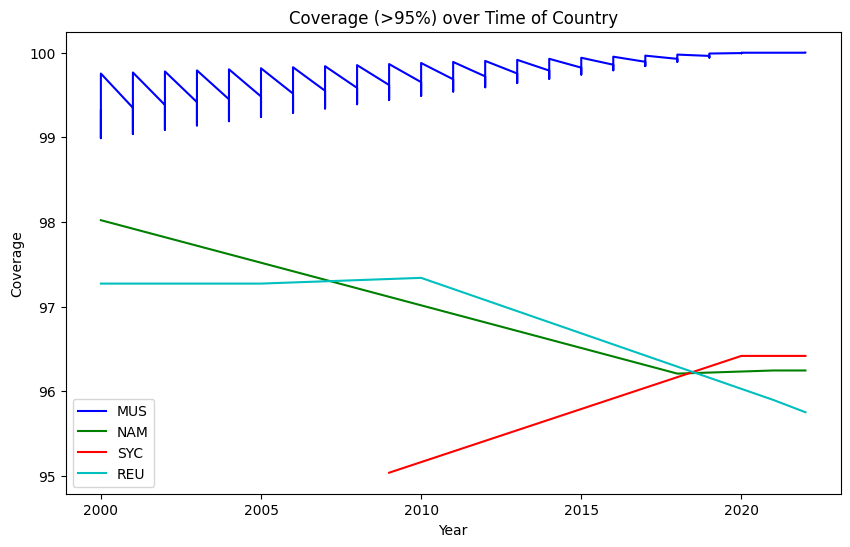

In [41]:
# Create a line  plot of focus countries with basic service
plt.figure(figsize=(10, 6))

colors = ['b', 'g', 'r', 'c', 'k']  # Color for each country
for country, color in zip(JMP9599['ISO3'].unique(), colors):
    subset = JMP9599[JMP9599['ISO3'] == country]
    plt.plot(subset['Year'], subset['Coverage'], label=country, color=color)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Coverage')
plt.title('Coverage (>95%) over Time of Country')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [42]:
REU_safe =JMP9599[JMP9599['Service Level'] == 'Safely managed service']
REU_safe

Year    Service Type           Service Level   Coverage ISO3  \
7363  2000  Drinking water  Safely managed service  97.272969  REU   
7364  2001  Drinking water  Safely managed service  97.272969  REU   
7365  2002  Drinking water  Safely managed service  97.272969  REU   
7366  2003  Drinking water  Safely managed service  97.272969  REU   
7367  2004  Drinking water  Safely managed service  97.272969  REU   
7368  2005  Drinking water  Safely managed service  97.272969  REU   
7369  2006  Drinking water  Safely managed service  97.286512  REU   
7370  2007  Drinking water  Safely managed service  97.300055  REU   
7371  2008  Drinking water  Safely managed service  97.313597  REU   
7372  2009  Drinking water  Safely managed service  97.327140  REU   
7373  2010  Drinking water  Safely managed service  97.340682  REU   
7374  2011  Drinking water  Safely managed service  97.209755  REU   
7375  2012  Drinking water  Safely managed service  97.078787  REU   
7376  2013  Drinking water  Safely managed service  96.947778  REU   
7377  2014  Drinking water  Safely managed service  96.816730  REU   
7378  2015  Drinking water  Safely managed service  96.685642  REU   
7379  2016  Drinking water  Safely managed service  96.554513  REU   
7380  2017  Drinking water  Safely managed service  96.423344  REU   
7381  2018  Drinking water  Safely managed service  96.292135  REU   
7382  2019  Drinking water  Safely managed service  96.160885  REU   
7383  2020  Drinking water  Safely managed service  96.029596  REU   
7384  2021  Drinking water  Safely managed service  95.898266  REU   
7385  2022  Drinking water  Safely managed service  95.753595  REU   

     Residence Type     Population  
7363          total  764005.246729  
7364          total  773804.525661  
7365          total  783284.749253  
7366          total  792766.918304  
7367          total  802034.114093  
7368          total  810921.945302  
7369          total  822426.121805  
7370          total  837361.350640  
7371          total  850500.403549  
7372          total  859506.677562  
7373          total  866458.616379  
7374          total  871615.711379  
7375          total  875790.449150  
7376          total  879209.708405  
7377          total  885669.765614  
7378          total  891920.209319  
7379          total  894701.151199  
7380          total  899378.133613  
7381          total  906289.054391  
7382          total  912969.716869  
7383          total  919792.596153  
7384          total  926500.960224  
7385          total  932689.805564

### SORT COVERAGE COLUMN BASED SAFELY MANAGED FOR TOTAL POPULATION

In [43]:
jmp_filt =jmp[(jmp['Service Level'] == 'Safely managed service') & (jmp['Residence Type'] =='total')]

In [44]:
jmp_filt_sort =jmp_filt.sort_values(by='Coverage', ascending = False)
jmp_filt_sort 

Year    Service Type           Service Level   Coverage ISO3  \
7373  2010  Drinking water  Safely managed service  97.340682  REU   
7372  2009  Drinking water  Safely managed service  97.327140  REU   
7371  2008  Drinking water  Safely managed service  97.313597  REU   
7370  2007  Drinking water  Safely managed service  97.300055  REU   
7369  2006  Drinking water  Safely managed service  97.286512  REU   
...    ...             ...                     ...        ...  ...   
7810  2004  Drinking water  Safely managed service   2.277910  TZA   
7807  2003  Drinking water  Safely managed service   1.575071  TZA   
7804  2002  Drinking water  Safely managed service   1.517356  TZA   
7801  2001  Drinking water  Safely managed service   1.473422  TZA   
7798  2000  Drinking water  Safely managed service   1.430447  TZA   

     Residence Type     Population  
7373          total  866458.616379  
7372          total  859506.677562  
7371          total  850500.403549  
7370          total  837361.350640  
7369          total  822426.121805  
...             ...            ...  
7810          total  873826.128117  
7807          total  588035.700263  
7804          total  551612.557094  
7801          total  521804.549892  
7798          total  492984.951445  

[520 rows x 7 columns]

### Reunion tops the region with 95.75%coverage for its entire population while Tanzania has less than 2% coverage.

In [45]:
jmp_filt2 =jmp[(jmp['Service Level'] == 'At least basic') & (jmp['Residence Type'] =='total')]

In [46]:
jmp_filt_sort2 =jmp_filt2.sort_values(by='Coverage', ascending = False)
jmp_filt_sort2

Year    Service Type   Service Level    Coverage ISO3 Residence Type  \
1240  2021  Drinking water  At least basic  100.000000  MUS          total   
1243  2022  Drinking water  At least basic  100.000000  MUS          total   
1237  2020  Drinking water  At least basic   99.995800  MUS          total   
1234  2019  Drinking water  At least basic   99.962199  MUS          total   
1231  2018  Drinking water  At least basic   99.927463  MUS          total   
...    ...             ...             ...         ...  ...            ...   
1045  2002  Drinking water  At least basic   25.281951  MOZ          total   
1433  2001  Drinking water  At least basic   25.228623  SOM          total   
1042  2001  Drinking water  At least basic   23.766089  MOZ          total   
1430  2000  Drinking water  At least basic   23.661082  SOM          total   
1039  2000  Drinking water  At least basic   22.713510  MOZ          total   

        Population  
1240  1.298915e+06  
1243  1.299469e+06  
1237  1.297773e+06  
1234  1.295789e+06  
1231  1.294441e+06  
...            ...  
1045  4.726447e+06  
1433  2.288425e+06  
1042  4.330352e+06  
1430  2.063593e+06  
1039  4.035851e+06  

[619 rows x 7 columns]

<Axes: xlabel='Coverage'>

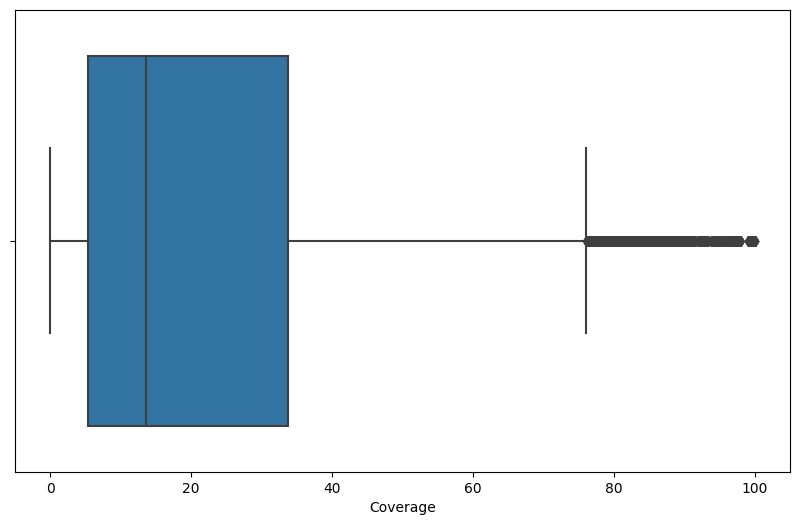

In [47]:
sns.boxplot(x=jmp["Coverage"])

In [48]:
jmp[jmp['Coverage'] > 100]

Empty DataFrame
Columns: [Year, Service Type, Service Level, Coverage, ISO3, Residence Type, Population]
Index: []

#### Coverage figures above 75% appearing as outliers may due to localisation of most figures in the blue region as there is no coverage figure above 100

### RENAMING COLUMNS

In [49]:
#rename Residence Type column
jmp.rename(columns={"Residence Type": "Residence_Type"}, inplace=True)

In [50]:
#rename Service level column
jmp.rename(columns={"Service Level": "Service_level"}, inplace=True)

In [51]:
#rename Service Type column
jmp.rename(columns={"Service Type": "Service_Type"}, inplace=True)

In [52]:
#rename population column
jmp.rename(columns={"Population": "Population(millions)"}, inplace=True)

### EXPLORING RESIDENTIAL TYPE: RURAL & URBAN

In [53]:
#split data into rural and urban

#filter for rural
jmp_rural=jmp[jmp["Residence_Type"]=="rural"]

#filter for urban
jmp_urban=jmp[jmp["Residence_Type"]=="urban"]

#filter for total
jmp_total=jmp[jmp["Residence_Type"]=="total"]

In [54]:
#sort rural df by coverage column in descending order
jmp_rural.sort_values(by='Coverage', ascending= False )

Year    Service_Type           Service_level    Coverage ISO3  \
1244  2022  Drinking water          At least basic  100.000000  MUS   
1241  2021  Drinking water          At least basic  100.000000  MUS   
1238  2020  Drinking water          At least basic   99.992910  MUS   
1235  2019  Drinking water          At least basic   99.942792  MUS   
1232  2018  Drinking water          At least basic   99.892674  MUS   
...    ...             ...                     ...         ...  ...   
5161  2008  Drinking water         Limited service    0.000000  MUS   
5158  2007  Drinking water         Limited service    0.000000  MUS   
5155  2006  Drinking water         Limited service    0.000000  MUS   
5152  2005  Drinking water         Limited service    0.000000  MUS   
7868  2000  Drinking water  Safely managed service    0.000000  UGA   

     Residence_Type  Population(millions)  
1244          rural         769155.690000  
1241          rural         769282.380000  
1238          rural         768778.801431  
1235          rural         767398.618003  
1232          rural         766133.110216  
...             ...                   ...  
5161          rural              0.000000  
5158          rural              0.000000  
5155          rural              0.000000  
5152          rural              0.000000  
7868          rural              0.000000  

[4678 rows x 7 columns]

In [55]:
jmp_rural["Coverage"].describe()

count    4678.000000
mean       22.552373
std        18.478066
min         0.000000
25%         8.721958
50%        17.060291
75%        33.246958
max       100.000000
Name: Coverage, dtype: float64

#### The average value of coverage in the rural areas in sub Saharan countries is 22.55% while the median is 17%. 
#### 75% of the rural region has coverage value less than or equal to 33.35% while 25% of the region have value below 8.72%.

In [56]:
jmp_urban["Coverage"].describe()

count    4794.000000
mean       22.006675
std        27.188684
min         0.000000
25%         2.618242
50%         8.711183
75%        36.781797
max       100.000000
Name: Coverage, dtype: float64

#### The average value of coverage in the urban areas in sub Saharan countries is 22% while the median is 8%. 
#### 75% of the urban region has coverage value less than or equal to 36.77% while 25% of the region have value below 2.5%.

In [57]:
jmp_total["Coverage"].describe()

count    5059.000000
mean       22.514331
std        22.676337
min         0.000000
25%         6.674468
50%        14.562341
75%        31.059474
max       100.000000
Name: Coverage, dtype: float64

#### The average value of coverage in sub Saharan countries is 22.51% while the median is 14%. 
#### 75% of the region has coverage value less than or equal to 30.90% while 25% of the region have value below 6.59%.

### EXPLORING POPULATION BY YEAR

In [58]:
jmp_rural_pop=jmp_rural.groupby("Year")["Population(millions)"].sum()

jmp_urban_pop=jmp_urban.groupby("Year")["Population(millions)"].sum()

jmp_total_pop=jmp_total.groupby("Year")["Population(millions)"].sum()

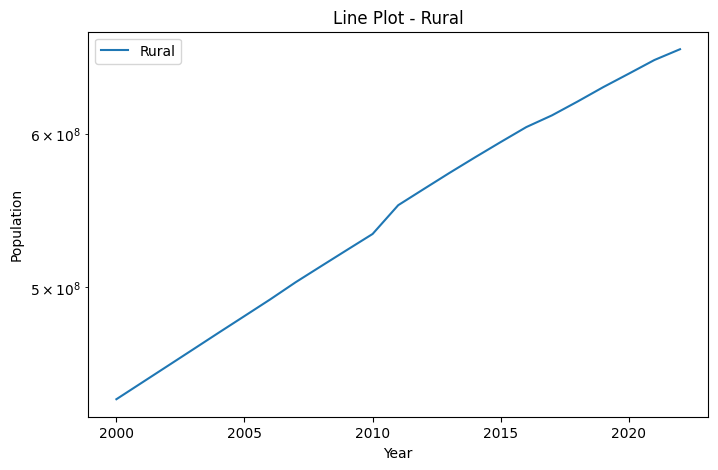

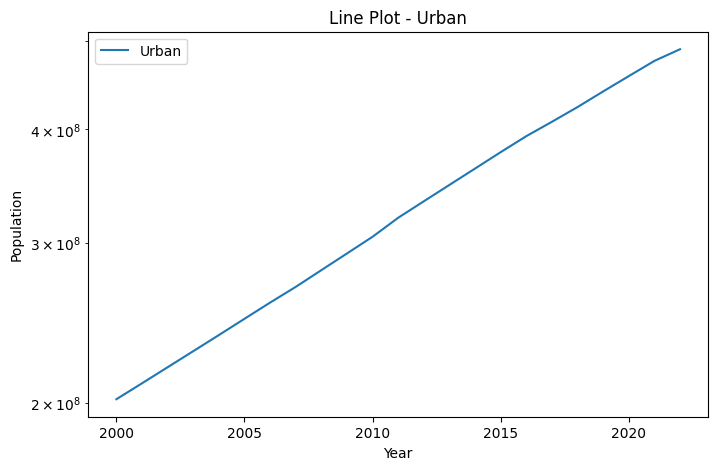

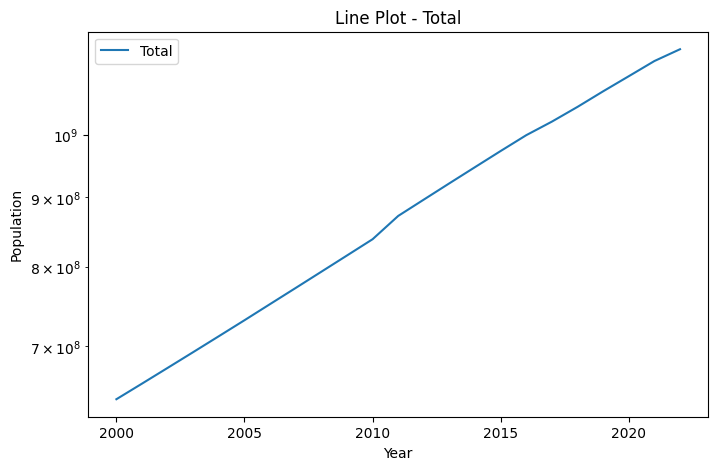

In [59]:
# Plotting for Rural
plt.figure(figsize=(8, 5))
plt.plot(jmp_rural_pop, label='Rural')
plt.xlabel('Year')
plt.yscale('log')
plt.ylabel('Population')
plt.title('Line Plot - Rural')
plt.legend(loc='best')
plt.show()

# Plotting for urban
plt.figure(figsize=(8, 5))
plt.plot(jmp_urban_pop, label='Urban')
plt.xlabel('Year')
plt.yscale('log')
plt.ylabel('Population')
plt.title('Line Plot - Urban')
plt.legend(loc='best')
plt.show()

# Plotting for total
plt.figure(figsize=(8, 5))
plt.plot(jmp_total_pop, label='Total')
plt.xlabel('Year')
plt.yscale('log')
plt.ylabel('Population')
plt.title('Line Plot - Total')
plt.legend(loc='best')
plt.show()


## PLOT OF COUNTRIES OF FOCUS

#### Some countries were randomly selected from negative progress and slow progress

In [60]:
forecast_countries = ['ZWE','CAF','COD','UGA','LSO','NGA']

In [61]:
#filter rows based on forecast countries
forecast_jmpp = jmp[jmp['ISO3'].isin(forecast_countries)]

In [62]:
#filter to get df for total i.e rural and urban
forecast_jmp = forecast_jmpp[forecast_jmpp['Residence_Type']=='total']

### focus countries with safely managed service

In [63]:
jmp_focus_safely = forecast_jmp [forecast_jmp ['Service_level'] == 'Safely managed service']

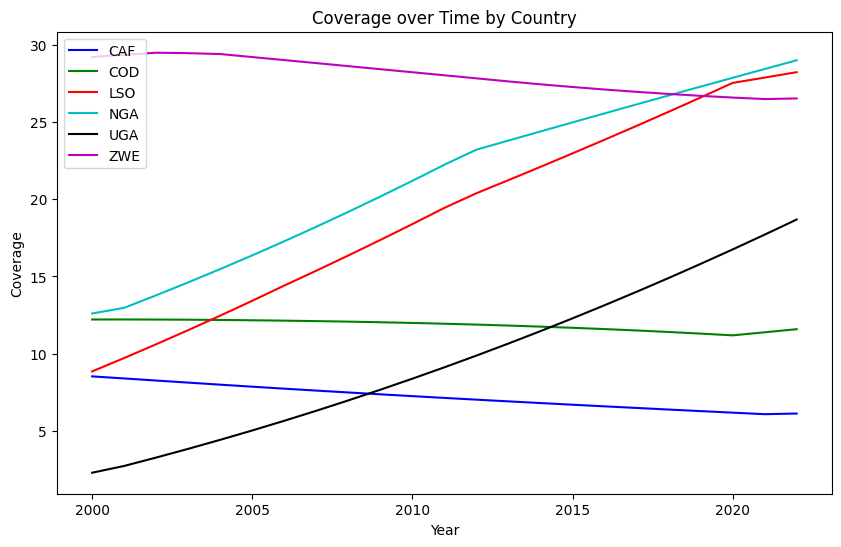

In [64]:
# Create a line  plot of focus countries with safely managed service
plt.figure(figsize=(10, 6))

colors = ['b', 'g', 'r', 'c', 'k', 'm', 'y']  # Color for each country
for country, color in zip(jmp_focus_safely['ISO3'].unique(), colors):
    subset = jmp_focus_safely[jmp_focus_safely['ISO3'] == country]
    plt.plot(subset['Year'], subset['Coverage'], label=country, color=color)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Coverage')
plt.title('Coverage over Time by Country')

# Add a legend
plt.legend()

# Show the plot
plt.show()

#### Burkina Faso does not have figures for Safely managed Service, hence it will be dropped.

### FOCUS COUNTRIES WITH NEGATIVE PROGRESS

### Zimbabwe (progress rate: -0.4% per year)

In [65]:
#filter based on ZWE
ZWE=forecast_jmp [forecast_jmp ["ISO3"] == "ZWE"]

In [66]:
#filter based on ZWE
ZWEE=forecast_jmpp[forecast_jmpp["ISO3"] == "ZWE"]

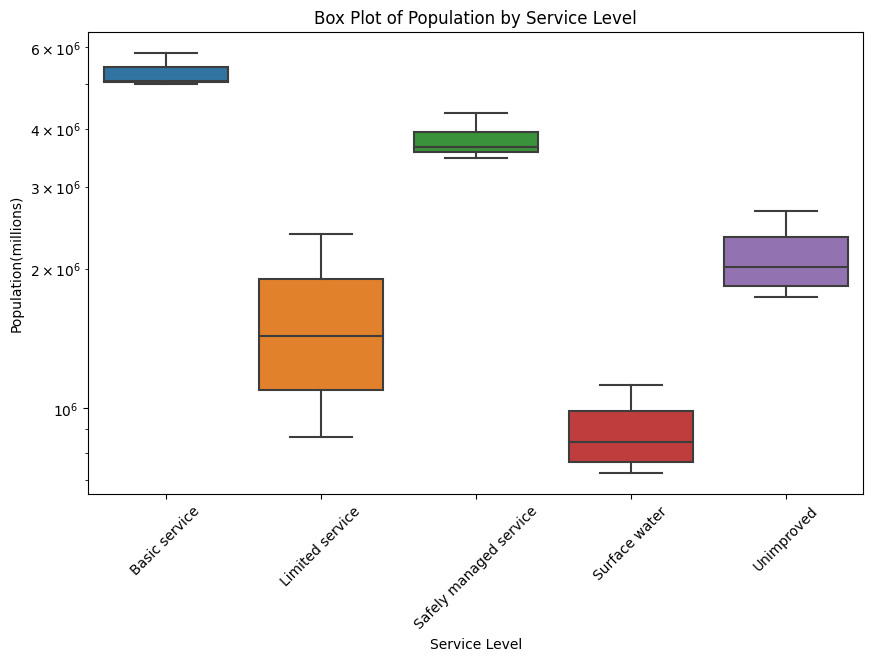

In [67]:
# Box plot for 'Service level' vs. 'Population'
plt.figure(figsize=(10, 6))
sns.boxplot(data=ZWE,x='Service_level', y='Population(millions)')
plt.yscale('log')
plt.title('Box Plot of Population by Service Level')
plt.xlabel('Service Level')
plt.ylabel('Population(millions)')
plt.xticks(rotation=45)
plt.show()

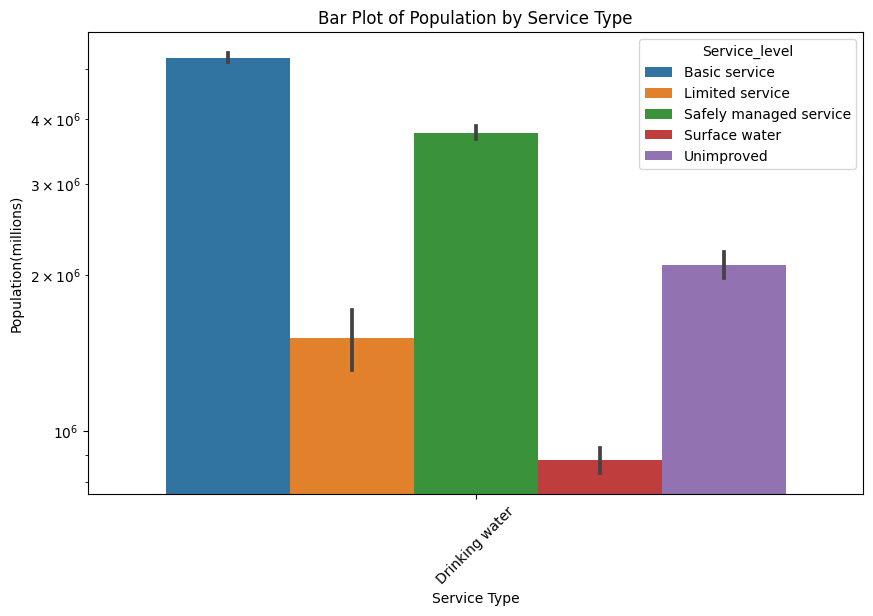

In [68]:
# Bar plot for 'Service Type' vs. 'Population'
plt.figure(figsize=(10, 6))
sns.barplot(data=ZWE, x='Service_Type', y='Population(millions)', hue='Service_level')
plt.yscale('log')
plt.title('Bar Plot of Population by Service Type')
plt.xlabel('Service Type')
plt.ylabel('Population(millions)')
plt.xticks(rotation=45)
plt.show()

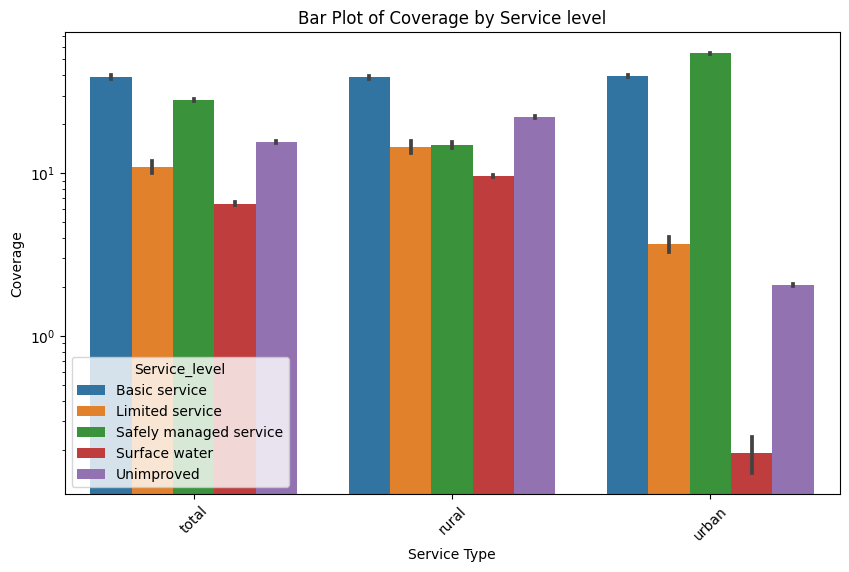

In [69]:
# Bar plot for 'Service Type' vs. 'Population'
plt.figure(figsize=(10, 6))
sns.barplot(data=ZWEE, x='Residence_Type', y='Coverage', hue='Service_level')
plt.yscale('log')
plt.title('Bar Plot of Coverage by Service level')
plt.xlabel('Service Type')
plt.ylabel('Coverage')
plt.xticks(rotation=45)
plt.show()

### In the urban region of Zimbabwe, safely managed service is mostly used while surface water is least. But in the rural ZWE, majority still use surface water.

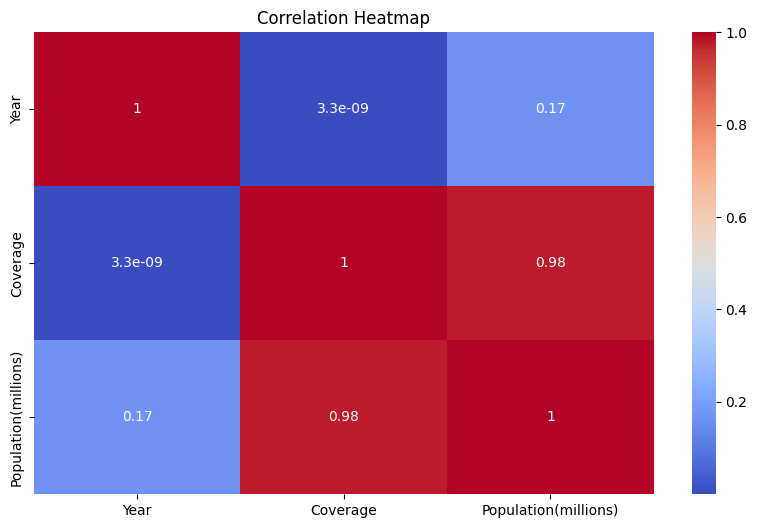

In [70]:
# Correlation heatmap
correlation_matrix = ZWE.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Central African Republic (progress rate -1% per year)

In [71]:
CAF=forecast_jmp [forecast_jmp ["ISO3"] == "CAF"]

In [72]:
CAFF=forecast_jmpp[forecast_jmpp["ISO3"] == "CAF"]

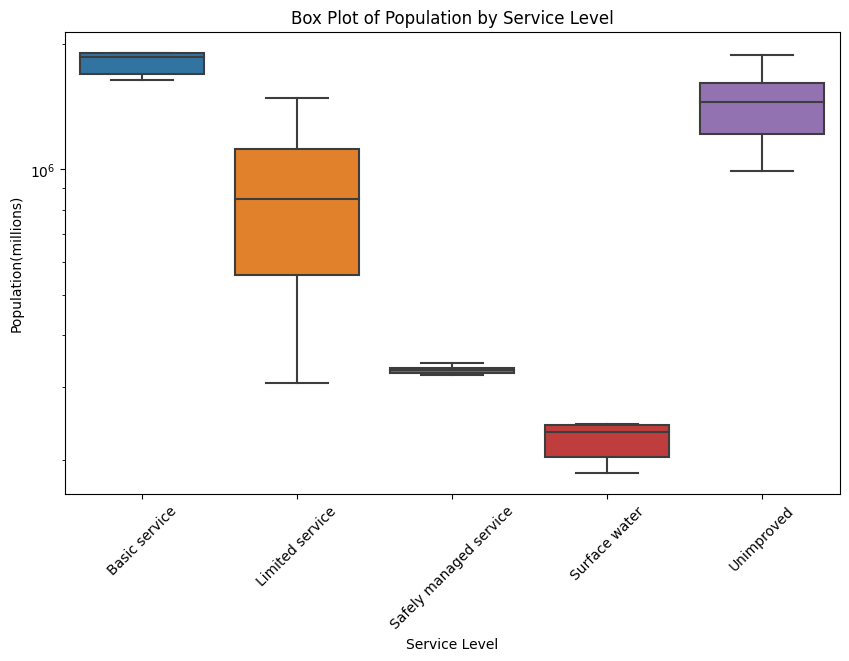

In [73]:
# Box plot for 'Service level' vs. 'Population'
plt.figure(figsize=(10, 6))
sns.boxplot(data=CAF, x='Service_level', y='Population(millions)')
plt.yscale('log')
plt.title('Box Plot of Population by Service Level')
plt.xlabel('Service Level')
plt.ylabel('Population(millions)')
plt.xticks(rotation=45)
plt.show()

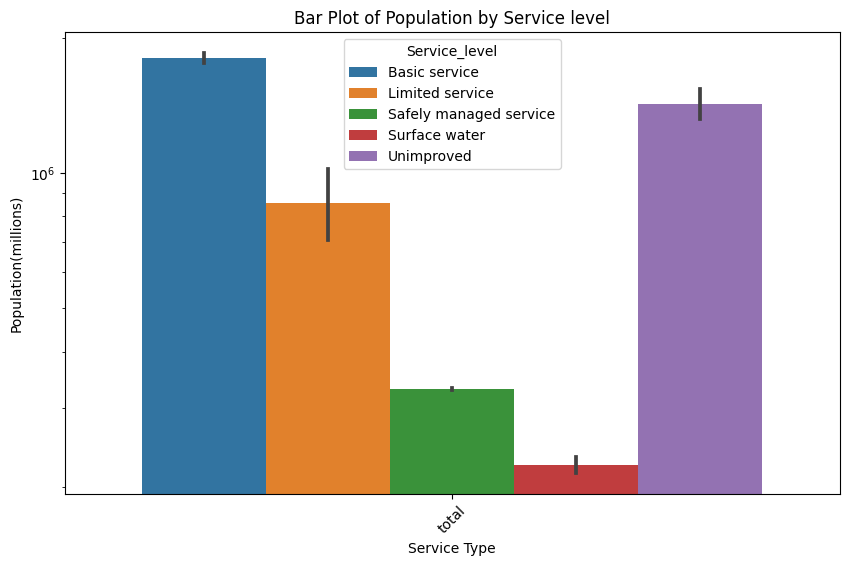

In [74]:
# Bar plot for 'Service Type' vs. 'Population'
plt.figure(figsize=(10, 6))
sns.barplot(data=CAF, x='Residence_Type', y='Population(millions)', hue='Service_level')
plt.yscale('log')
plt.title('Bar Plot of Population by Service level')
plt.xlabel('Service Type')
plt.ylabel('Population(millions)')
plt.xticks(rotation=45)
plt.show()

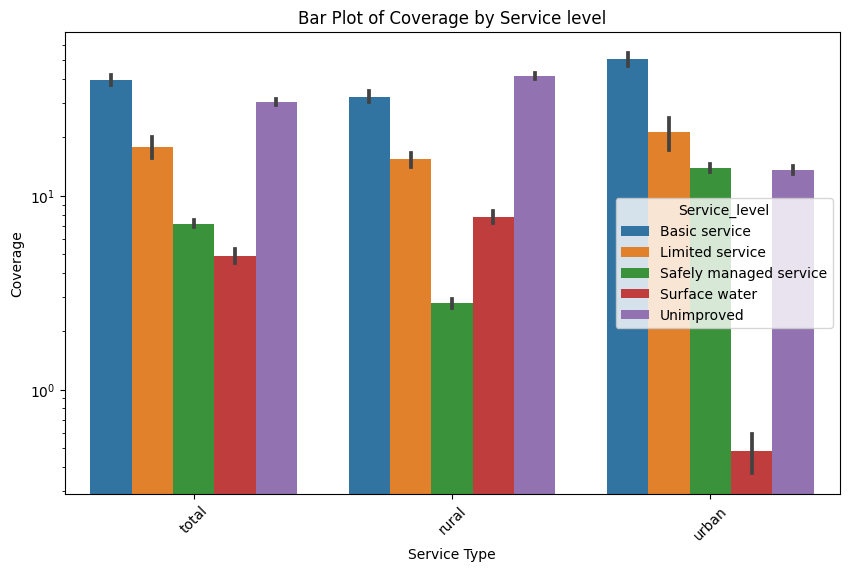

In [75]:
# Bar plot for 'Service Type' vs. 'Population'
plt.figure(figsize=(10, 6))
sns.barplot(data=CAFF, x='Residence_Type', y='Coverage', hue='Service_level')
plt.yscale('log')
plt.title('Bar Plot of Coverage by Service level')
plt.xlabel('Service Type')
plt.ylabel('Coverage')
plt.xticks(rotation=45)
plt.show()

### In Central Africa Republic, most people still use unimproved source of water, particularly those that are in th rural areas

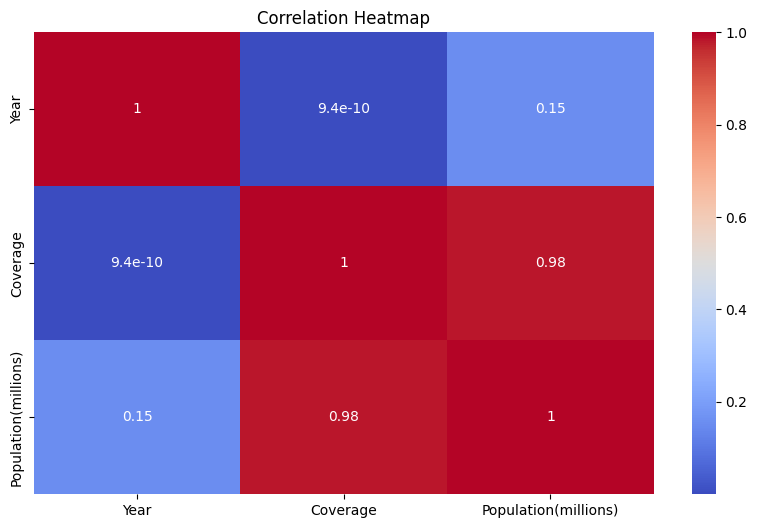

In [76]:
# Correlation heatmap
correlation_matrix = CAF.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Democratic Republic of Congo (progress rate:  -0.1% per year)

In [77]:
COD=forecast_jmp [forecast_jmp ["ISO3"] == "COD"]

In [78]:
CODD=forecast_jmpp[forecast_jmpp["ISO3"] == "COD"]

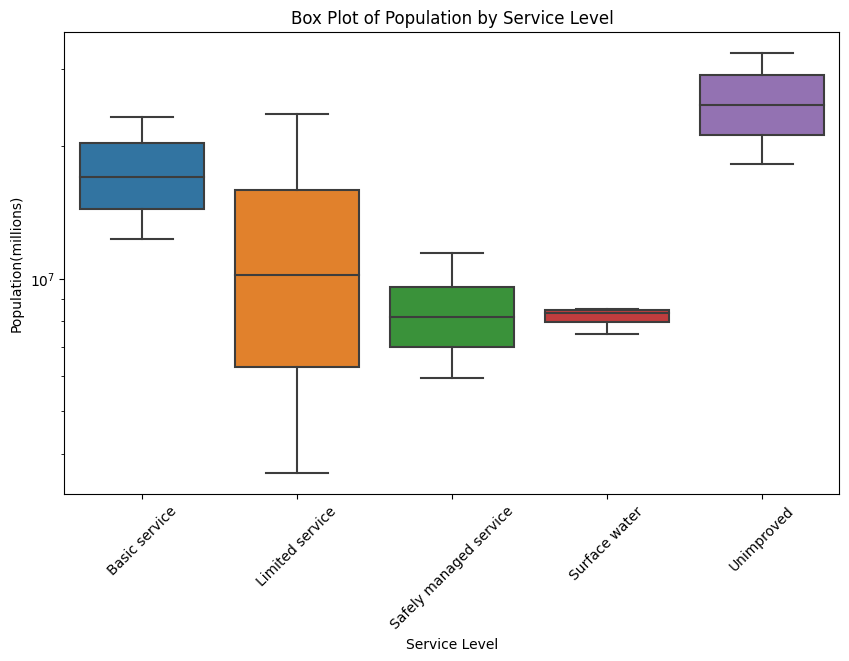

In [79]:
# Box plot for 'Service level' vs. 'Population'
plt.figure(figsize=(10, 6))
sns.boxplot(data=COD, x='Service_level', y='Population(millions)')
plt.yscale('log')
plt.title('Box Plot of Population by Service Level')
plt.xlabel('Service Level')
plt.ylabel('Population(millions)')
plt.xticks(rotation=45)
plt.show()

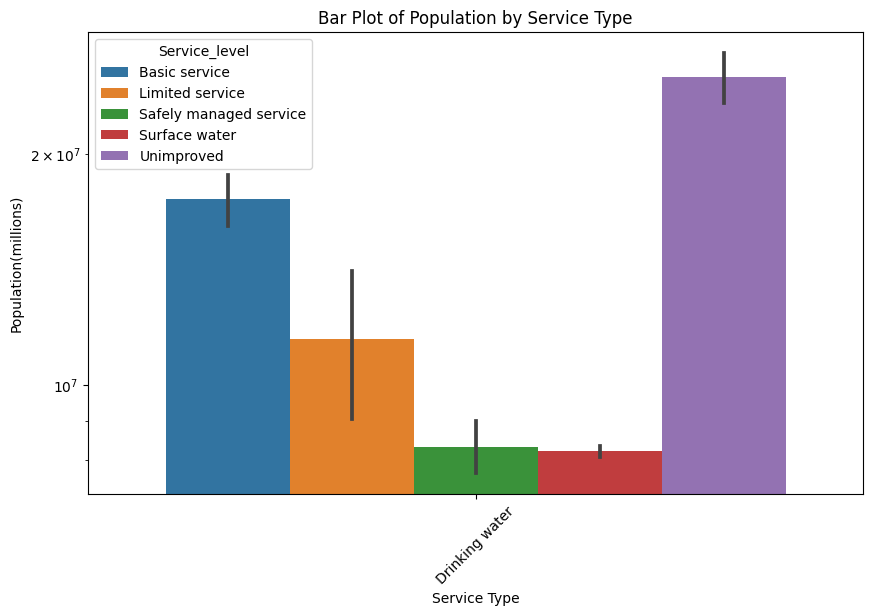

In [80]:
# Bar plot for 'Service Type' vs. 'Population'
plt.figure(figsize=(10, 6))
sns.barplot(data=COD, x='Service_Type', y='Population(millions)', hue='Service_level')
plt.yscale('log')
plt.title('Bar Plot of Population by Service Type')
plt.xlabel('Service Type')
plt.ylabel('Population(millions)')
plt.xticks(rotation=45)
plt.show()

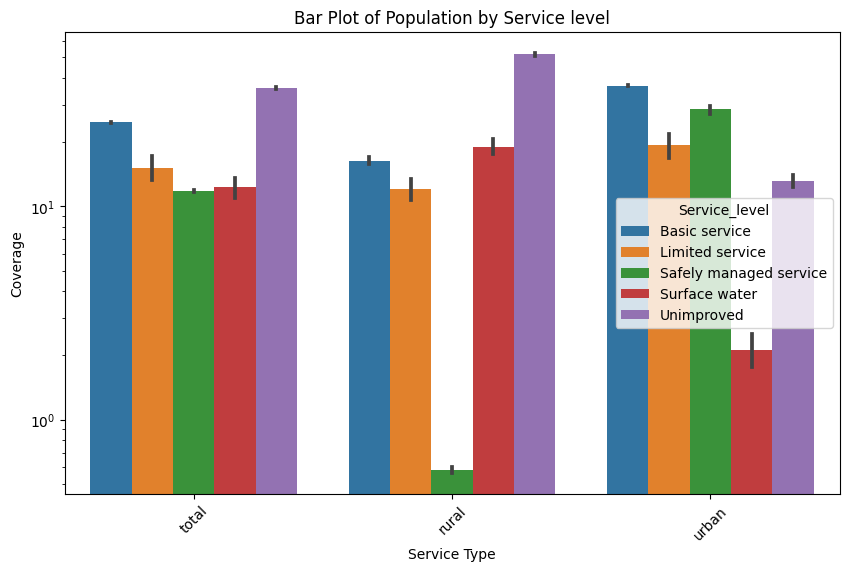

In [81]:
# Bar plot for 'Service Type' vs. 'Population'
plt.figure(figsize=(10, 6))
sns.barplot(data=CODD, x='Residence_Type', y='Coverage', hue='Service_level')
plt.yscale('log')
plt.title('Bar Plot of Population by Service level')
plt.xlabel('Service Type')
plt.ylabel('Coverage')
plt.xticks(rotation=45)
plt.show()

### Majority of the people in Democratic Republic of Congo use unimproved service. Shockingly, safely managed service is least in the rural area.

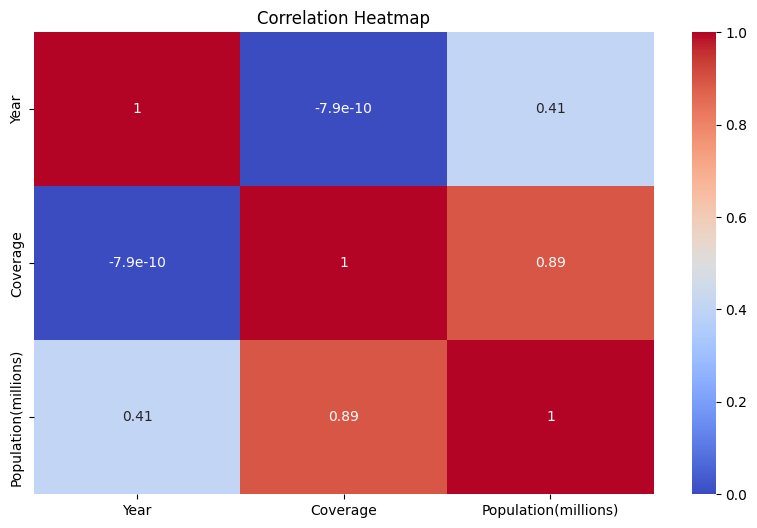

In [82]:
# Correlation heatmap
correlation_matrix = COD.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## FOCUS COUNTRIES WITH SLOW PROGRESS

### Uganda (progress rate: +1.5% per year)

In [83]:
UGA=forecast_jmp [forecast_jmp ["ISO3"] == "UGA"]

In [84]:
UGAA=forecast_jmpp[forecast_jmpp["ISO3"] == "UGA"]

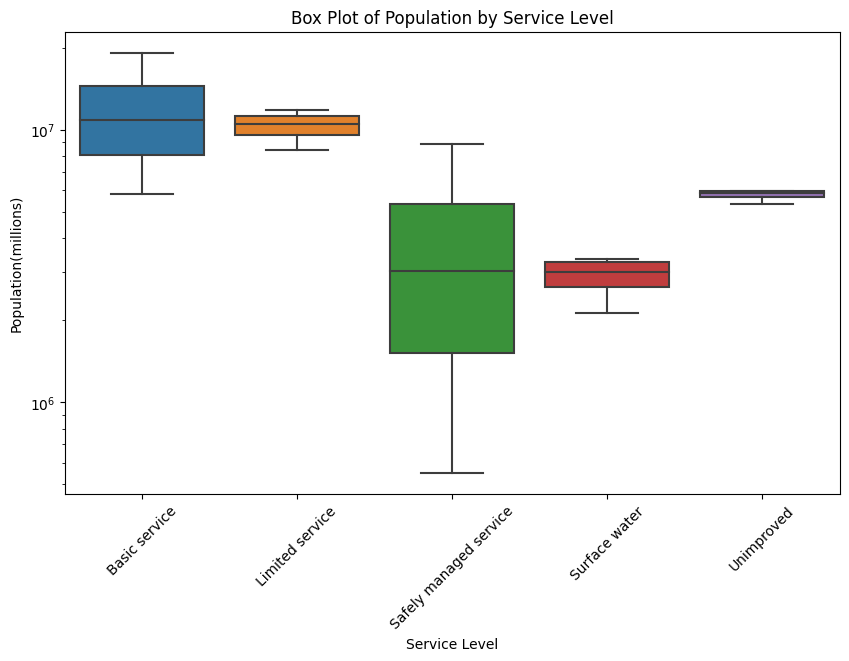

In [85]:
# Box plot for 'Service level' vs. 'Population'
plt.figure(figsize=(10, 6))
sns.boxplot(data=UGA, x='Service_level', y='Population(millions)')
plt.yscale('log')
plt.title('Box Plot of Population by Service Level')
plt.xlabel('Service Level')
plt.ylabel('Population(millions)')
plt.xticks(rotation=45)
plt.show()

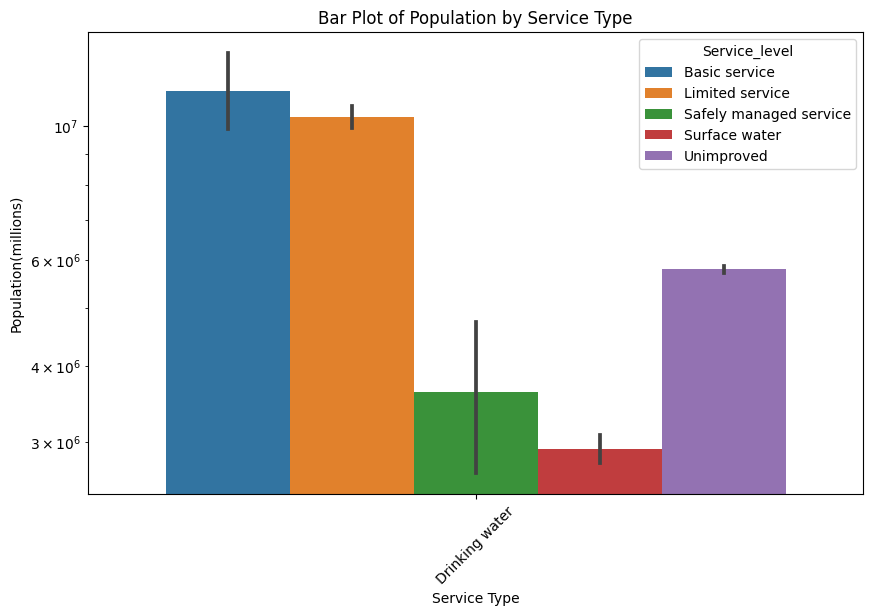

In [86]:
# Bar plot for 'Service Type' vs. 'Population'
plt.figure(figsize=(10, 6))
sns.barplot(data=UGA, x='Service_Type', y='Population(millions)', hue='Service_level')
plt.yscale('log')
plt.title('Bar Plot of Population by Service Type')
plt.xlabel('Service Type')
plt.ylabel('Population(millions)')
plt.xticks(rotation=45)
plt.show()

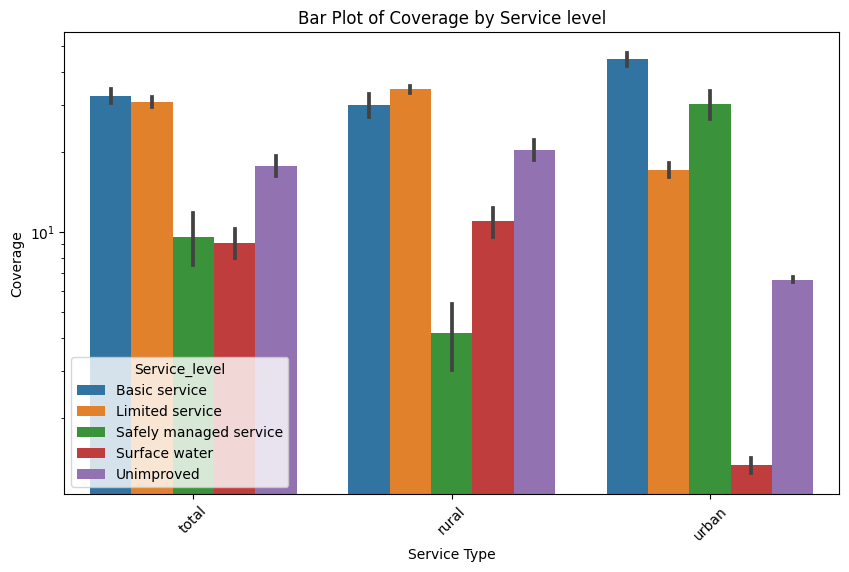

In [87]:
# Bar plot for 'Service Type' vs. 'Population'
plt.figure(figsize=(10, 6))
sns.barplot(data=UGAA, x='Residence_Type', y='Coverage', hue='Service_level')
plt.yscale('log')
plt.title('Bar Plot of Coverage by Service level')
plt.xlabel('Service Type')
plt.ylabel('Coverage')
plt.xticks(rotation=45)
plt.show()

### In Uganda, a  large protion of the of the people use basic service and limited service however access to safely managed service is lowest in the rural region

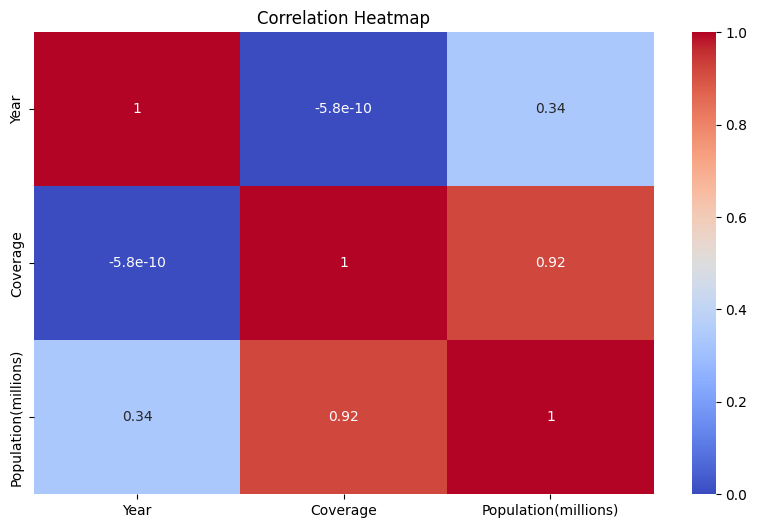

In [88]:
# Correlation heatmap
correlation_matrix = UGA.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show() 

### Lesotho (63.2%; +1.8% per year)

In [89]:
LSO =forecast_jmp[forecast_jmp ["ISO3"] == "LSO"]

In [90]:
LSOO=forecast_jmpp[forecast_jmpp["ISO3"] == "LSO"]

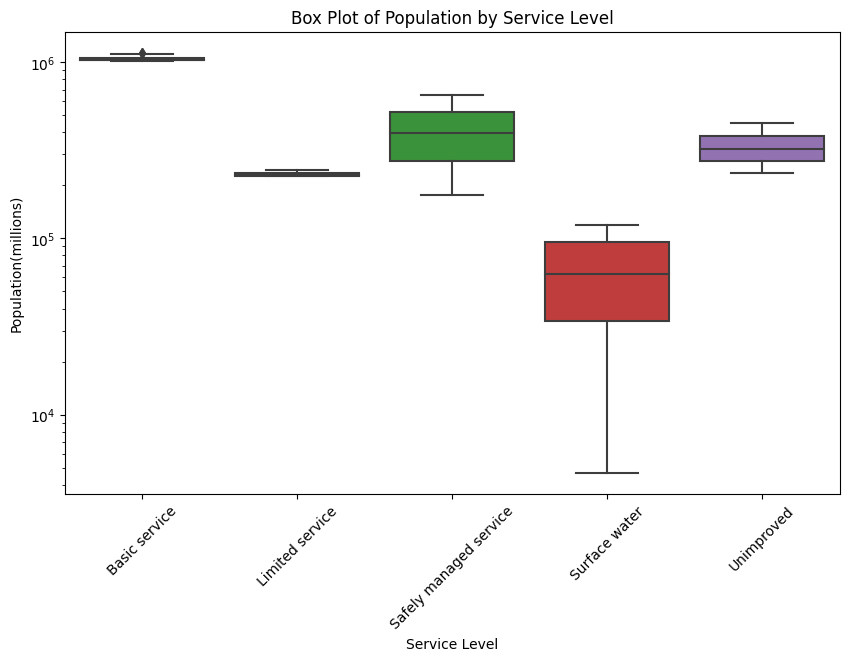

In [91]:
# Box plot for 'Service level' vs. 'Population'
plt.figure(figsize=(10, 6))
sns.boxplot(data=LSO, x='Service_level', y='Population(millions)')
plt.yscale('log')
plt.title('Box Plot of Population by Service Level')
plt.xlabel('Service Level')
plt.ylabel('Population(millions)')
plt.xticks(rotation=45)
plt.show()

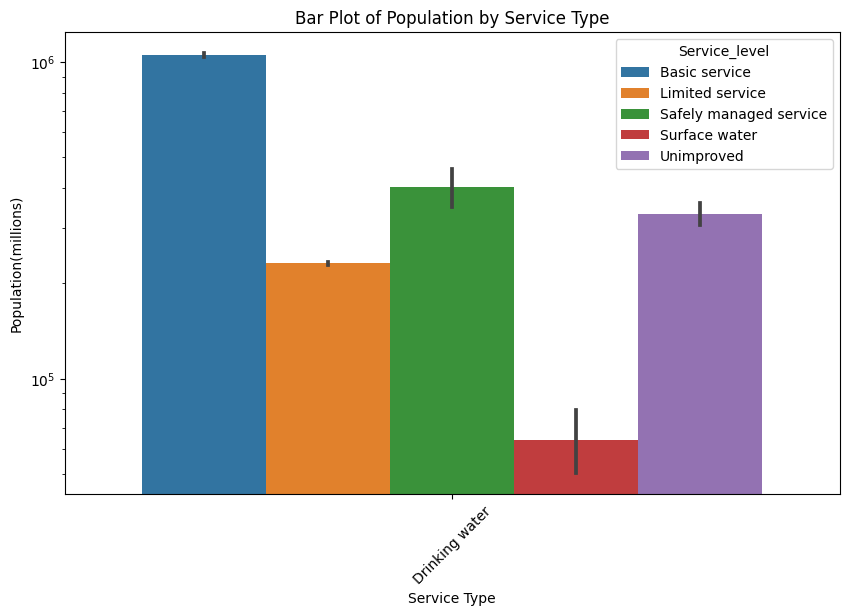

In [92]:
# Bar plot for 'Service Type' vs. 'Population'
plt.figure(figsize=(10, 6))
sns.barplot(data=LSO, x='Service_Type', y='Population(millions)', hue='Service_level')
plt.yscale('log')
plt.title('Bar Plot of Population by Service Type')
plt.xlabel('Service Type')
plt.ylabel('Population(millions)')
plt.xticks(rotation=45)
plt.show()

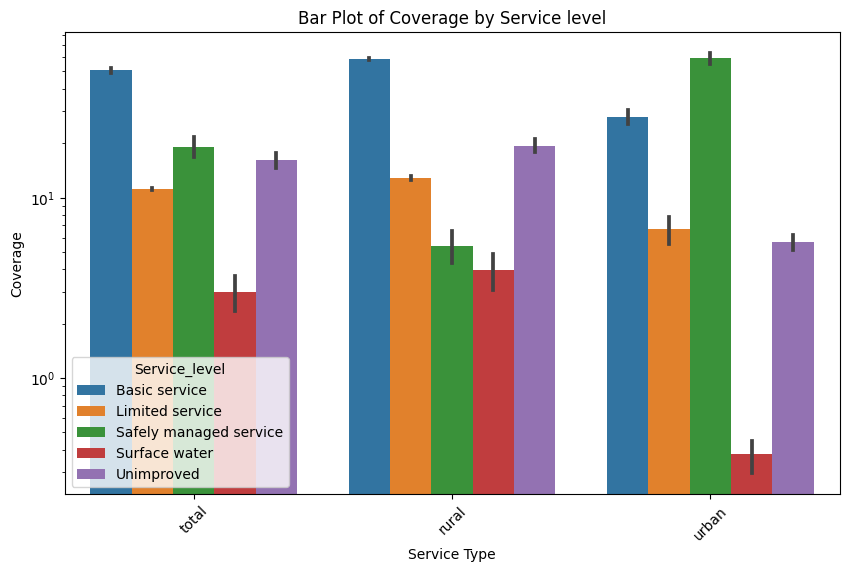

In [93]:
# Bar plot for 'Service Type' vs. 'Population'
plt.figure(figsize=(10, 6))
sns.barplot(data=LSOO, x='Residence_Type', y='Coverage', hue='Service_level')
plt.yscale('log')
plt.title('Bar Plot of Coverage by Service level')
plt.xlabel('Service Type')
plt.ylabel('Coverage')
plt.xticks(rotation=45)
plt.show()

### Safely managed service is mostly used in the urban regions of Lesotho

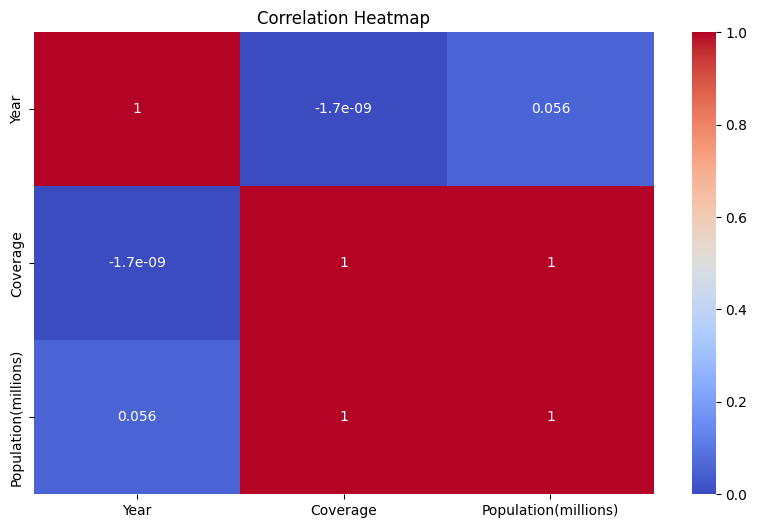

In [94]:
# Correlation heatmap
correlation_matrix = LSO.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Nigeria (progress rate; +1.6% per year)

In [95]:
NGA=forecast_jmp [forecast_jmp ["ISO3"] == "NGA"]

In [96]:
NGAA=forecast_jmpp[forecast_jmpp["ISO3"] == "NGA"]

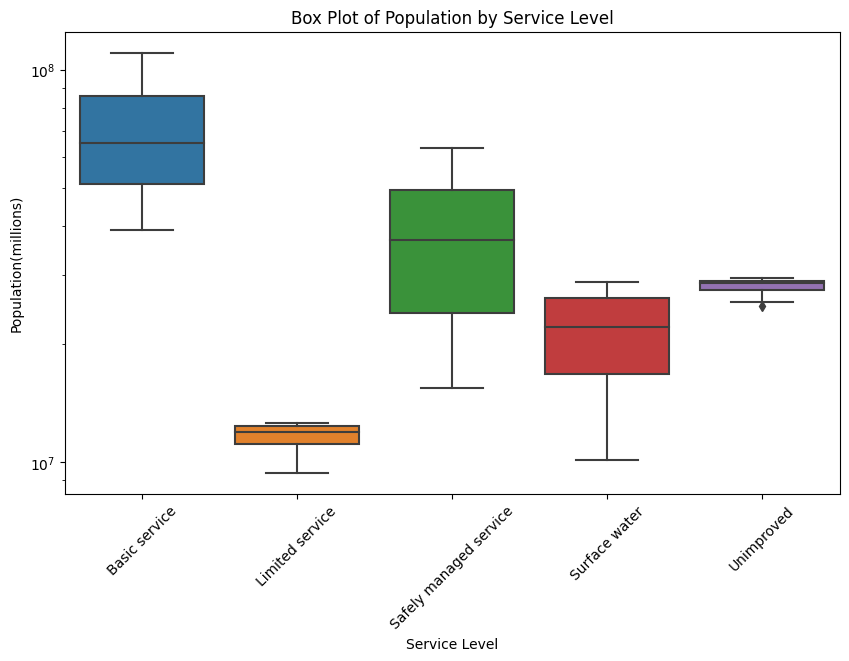

In [97]:
# Box plot for 'Service level' vs. 'Population'
plt.figure(figsize=(10, 6))
sns.boxplot(data=NGA, x='Service_level', y='Population(millions)')
plt.title('Box Plot of Population by Service Level')
plt.xlabel('Service Level')
plt.yscale('log')
plt.ylabel('Population(millions)')
plt.xticks(rotation=45)
plt.show()

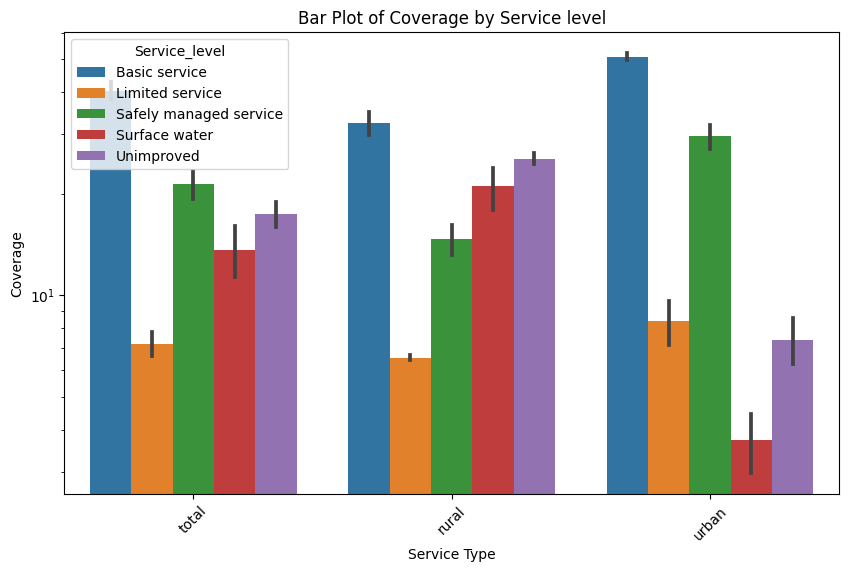

In [98]:
# Bar plot for 'Service Type' vs. 'Population'
plt.figure(figsize=(10, 6))
sns.barplot(data=NGAA, x='Residence_Type', y='Coverage', hue='Service_level')
plt.yscale('log')
plt.title('Bar Plot of Coverage by Service level')
plt.xlabel('Service Type')
plt.ylabel('Coverage')
plt.xticks(rotation=45)
plt.show()

### In Nigeria, safely managed service is now widely adopted in the rural areas compared to the urban areas.

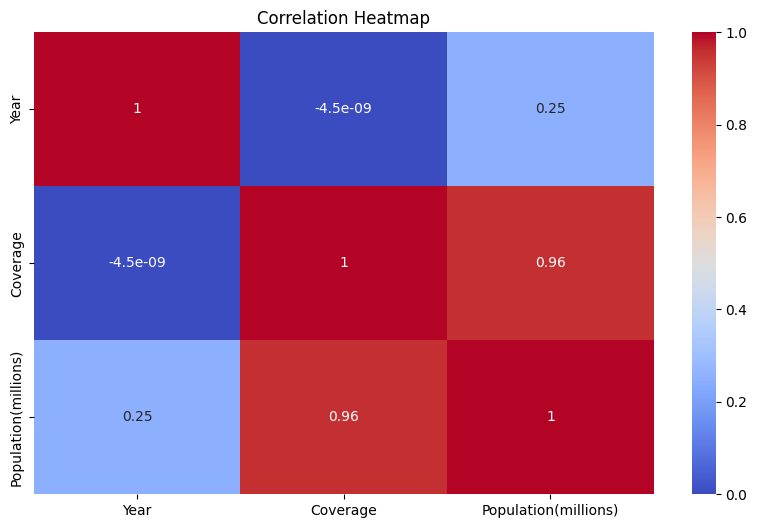

In [99]:
# Correlation heatmap
correlation_matrix = NGA.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## FILTERING DATAFRAME FOR EACH COUNTRY TO GET DF FOR TOTAL POPULATION

In [100]:
#filtering dataset to get all data for total which rep both rural & urban

#negative progress countries
#BFA_total = BFA[BFA["Residence_Type"] == "total"]
ZWE_total = ZWE[ZWE["Residence_Type"] == "total"]
CAF_total = CAF[CAF["Residence_Type"] == "total"]
COD_total = COD[COD["Residence_Type"] == "total"]

#slow progress countries
UGA_total = UGA[UGA["Residence_Type"] == "total"]
LSO_total = LSO[LSO["Residence_Type"] == 'total']
NGA_total = NGA[NGA["Residence_Type"] == "total"]
#REU_total = REU[REU["Residence_Type"] == "total"]

In [101]:
#filtering total to get all data for safely managed

#Negative progress countries
#BFA_basic = BFA_total[BFA_total['Service_level'] == 'At least basic']
ZWE_safely = ZWE_total[ZWE_total['Service_level'] == 'Safely managed service']
CAF_safely = CAF_total[CAF_total['Service_level'] == 'Safely managed service']
COD_safely = COD_total[COD_total['Service_level'] == 'Safely managed service']

#Slow progress countries
UGA_safely = UGA_total[UGA_total['Service_level'] == 'Safely managed service']
LSO_safely = LSO_total[LSO_total['Service_level'] == 'Safely managed service']
NGA_safely = NGA_total[NGA_total['Service_level'] == 'Safely managed service']
#REU_safely = REU_total[REU_total['Service_level'] == 'Safely managed service']

### CREATING DATETIME INDEX FOR MORE VISUALISATION

In [102]:
#convert year column to datetime dtype

#negative progress countries
#BFA_total["Date"] = pd.to_datetime(BFA_total["Year"], format ="%Y")
ZWE_total["Date"] = pd.to_datetime(ZWE_total["Year"], format ="%Y")
CAF_total["Date"] = pd.to_datetime(CAF_total["Year"], format ="%Y")
COD_total["Date"] = pd.to_datetime(COD_total["Year"], format ="%Y")

#slow progress countries
UGA_total["Date"] = pd.to_datetime(UGA_total["Year"], format ="%Y")
LSO_total["Date"] = pd.to_datetime(LSO_total["Year"], format ="%Y")
NGA_total["Date"] = pd.to_datetime(NGA_total["Year"], format ="%Y")
#REU_total["Date"] = pd.to_datetime(REU_total["Year"], format ="%Y")

In [103]:
#convert datetime value to mm/yy format
ZWE_total['Date'] = ZWE_total['Date'].dt.strftime('%m-%Y')
CAF_total['Date'] = CAF_total['Date'].dt.strftime('%m-%Y')
COD_total['Date'] = COD_total['Date'].dt.strftime('%m-%Y')
UGA_total['Date'] = UGA_total['Date'].dt.strftime('%m-%Y')
LSO_total['Date'] = LSO_total['Date'].dt.strftime('%m-%Y')
NGA_total['Date'] = NGA_total['Date'].dt.strftime('%m-%Y')
#REU_total['Date'] = REU_total['Date'].dt.strftime('%m-%Y')

### Setting datetime index

In [104]:
#BFA_total.set_index("Date", inplace=True)

In [105]:
ZWE_total.set_index("Date", inplace=True)

In [106]:
CAF_total.set_index("Date", inplace=True)

In [107]:
COD_total.set_index("Date", inplace=True)

In [108]:
UGA_total.set_index("Date", inplace=True)

In [109]:
LSO_total.set_index("Date", inplace=True)

In [110]:
NGA_total.set_index("Date", inplace=True)

In [111]:
#REU_total.set_index("Date", inplace=True)

### ZWE

In [112]:
#get dataframe for each category in service level
ZWE_basic_service = ZWE_total[ZWE_total['Service_level'] =='Basic service']
ZWE_limited_service = ZWE_total[ZWE_total['Service_level'] =='Limited service']
ZWE_safely_managed = ZWE_total[ZWE_total['Service_level'] =='Safely managed service']
ZWE_surface_water = ZWE_total[ZWE_total['Service_level'] =='Surface water']
ZWE_unimproved = ZWE_total[ZWE_total['Service_level'] =='Unimproved']

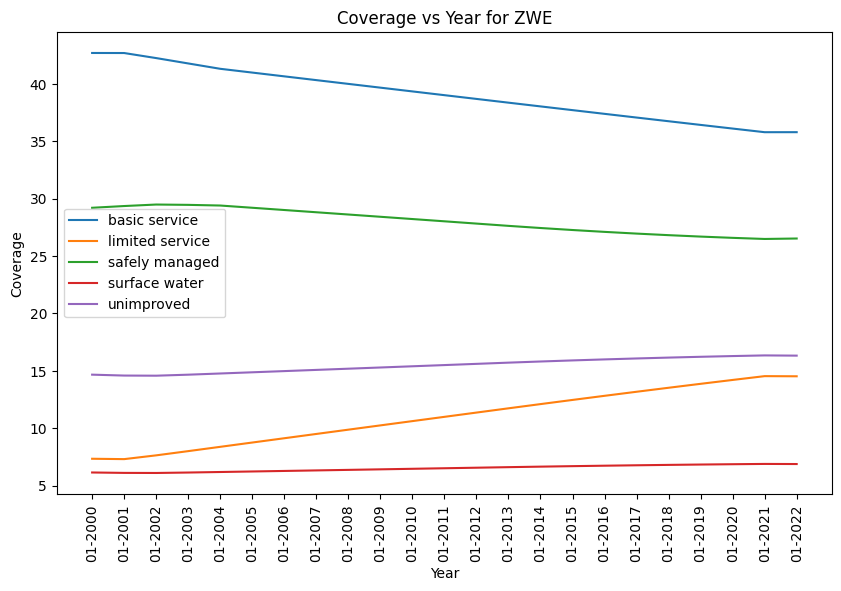

In [113]:
#plot multiple times series for ZWE
plt.figure(figsize=(10, 6))
plt.plot(ZWE_basic_service.index, ZWE_basic_service['Coverage'], label= 'basic service')
plt.plot(ZWE_limited_service.index, ZWE_limited_service['Coverage'], label='limited service')
plt.plot(ZWE_safely_managed.index, ZWE_safely_managed['Coverage'], label='safely managed')
plt.plot(ZWE_surface_water.index, ZWE_surface_water['Coverage'], label='surface water')
plt.plot(ZWE_unimproved.index, ZWE_unimproved['Coverage'], label='unimproved')

plt.title('Coverage vs Year for ZWE')
plt.xlabel('Year')
plt.ylabel('Coverage')
plt.xticks(rotation=90)
plt.legend()

plt.show()

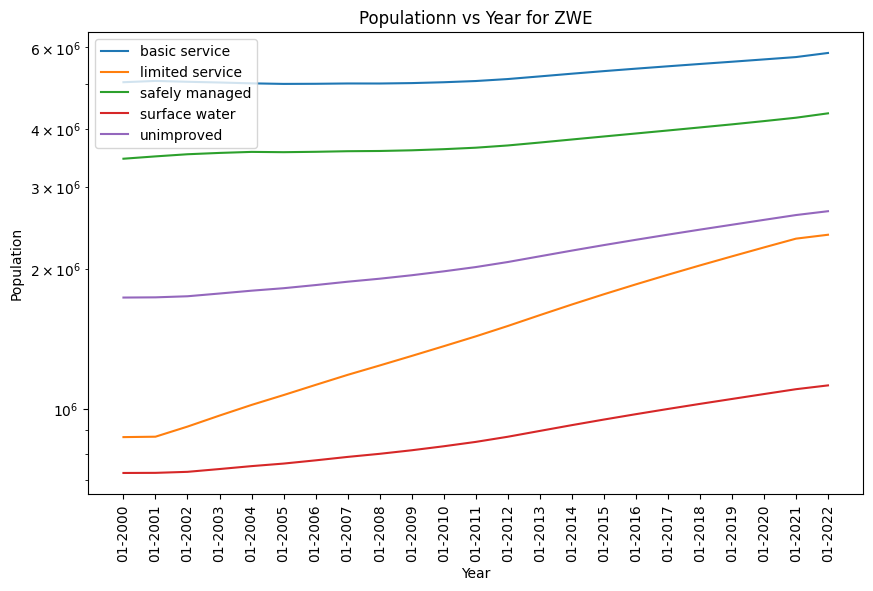

In [114]:
#plot multiple times series for ZWE
plt.figure(figsize=(10, 6))
plt.plot(ZWE_basic_service.index, ZWE_basic_service['Population(millions)'], label= 'basic service')
plt.plot(ZWE_limited_service.index, ZWE_limited_service['Population(millions)'], label='limited service')
plt.plot(ZWE_safely_managed.index, ZWE_safely_managed['Population(millions)'], label='safely managed')
plt.plot(ZWE_surface_water.index, ZWE_surface_water['Population(millions)'], label='surface water')
plt.plot(ZWE_unimproved.index, ZWE_unimproved['Population(millions)'], label='unimproved')

plt.title('Populationn vs Year for ZWE')
plt.yscale('log')
plt.xlabel('Year')
plt.ylabel('Population')
plt.xticks(rotation=90)
plt.legend()

plt.show()

### CAF

In [115]:
#get dataframe for each category in service level
CAF_basic_service = CAF_total[CAF_total['Service_level'] =='Basic service']
CAF_limited_service = CAF_total[CAF_total['Service_level'] =='Limited service']
CAF_safely_managed = CAF_total[CAF_total['Service_level'] =='Safely managed service']
CAF_surface_water = CAF_total[CAF_total['Service_level'] =='Surface water']
CAF_unimproved = CAF_total[CAF_total['Service_level'] =='Unimproved']

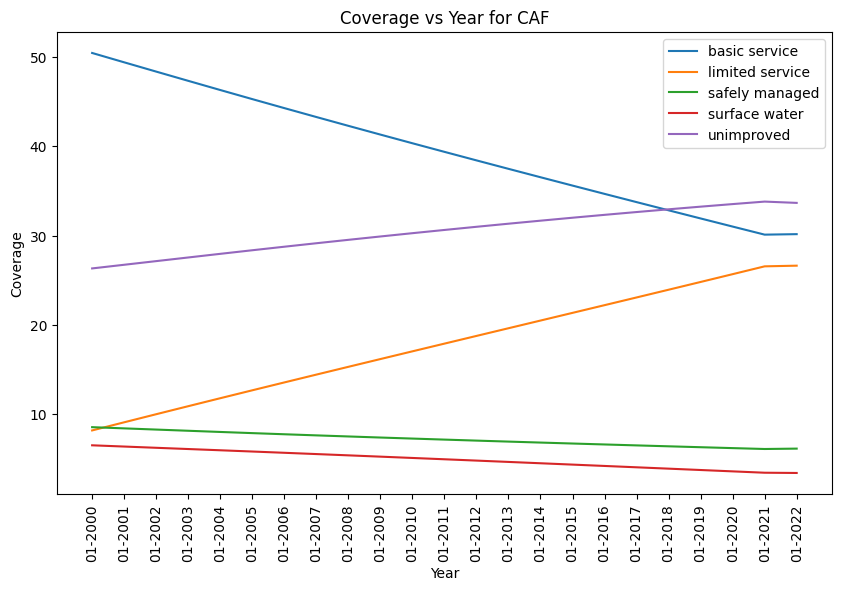

In [116]:
#plot multiple times series for CAF
plt.figure(figsize=(10, 6))
plt.plot(CAF_basic_service.index, CAF_basic_service['Coverage'], label= 'basic service')
plt.plot(CAF_limited_service.index, CAF_limited_service['Coverage'], label='limited service')
plt.plot(CAF_safely_managed.index, CAF_safely_managed['Coverage'], label='safely managed')
plt.plot(CAF_surface_water.index, CAF_surface_water['Coverage'], label='surface water')
plt.plot(CAF_unimproved.index, CAF_unimproved['Coverage'], label='unimproved')

plt.title('Coverage vs Year for CAF')
plt.xlabel('Year')
plt.ylabel('Coverage')
plt.xticks(rotation=90)
plt.legend()

plt.show()

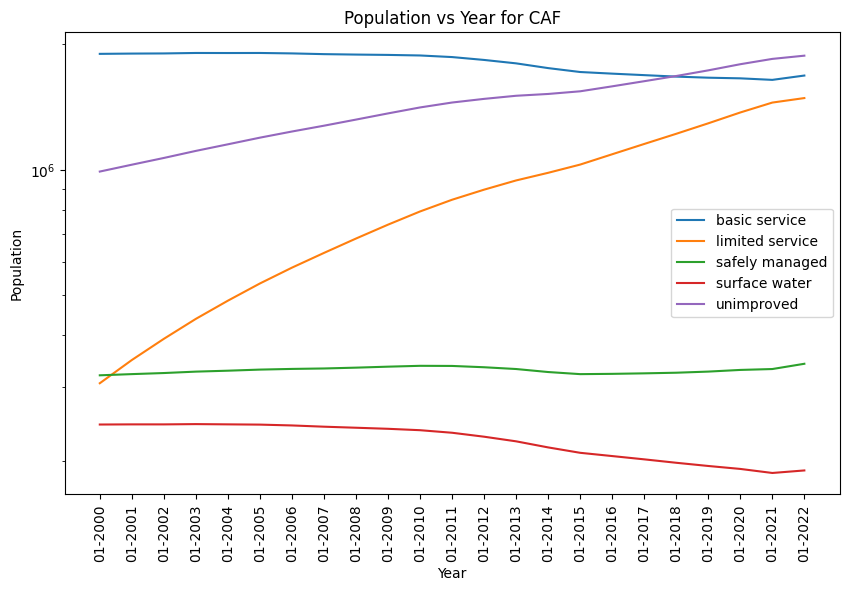

In [117]:
#plot multiple times series for CAF
plt.figure(figsize=(10, 6))
plt.plot(CAF_basic_service.index, CAF_basic_service['Population(millions)'], label= 'basic service')
plt.plot(CAF_limited_service.index, CAF_limited_service['Population(millions)'], label='limited service')
plt.plot(CAF_safely_managed.index, CAF_safely_managed['Population(millions)'], label='safely managed')
plt.plot(CAF_surface_water.index, CAF_surface_water['Population(millions)'], label='surface water')
plt.plot(CAF_unimproved.index, CAF_unimproved['Population(millions)'], label='unimproved')

plt.title('Population vs Year for CAF')
plt.yscale('log')
plt.xlabel('Year')
plt.ylabel('Population')
plt.xticks(rotation=90)
plt.legend()

plt.show()

### COD

In [118]:
#get dataframe for each category in service level
COD_basic_service = COD_total[COD_total['Service_level'] =='Basic service']
COD_limited_service = COD_total[COD_total['Service_level'] =='Limited service']
COD_safely_managed = COD_total[COD_total['Service_level'] =='Safely managed service']
COD_surface_water = COD_total[COD_total['Service_level'] =='Surface water']
COD_unimproved = COD_total[COD_total['Service_level'] =='Unimproved']

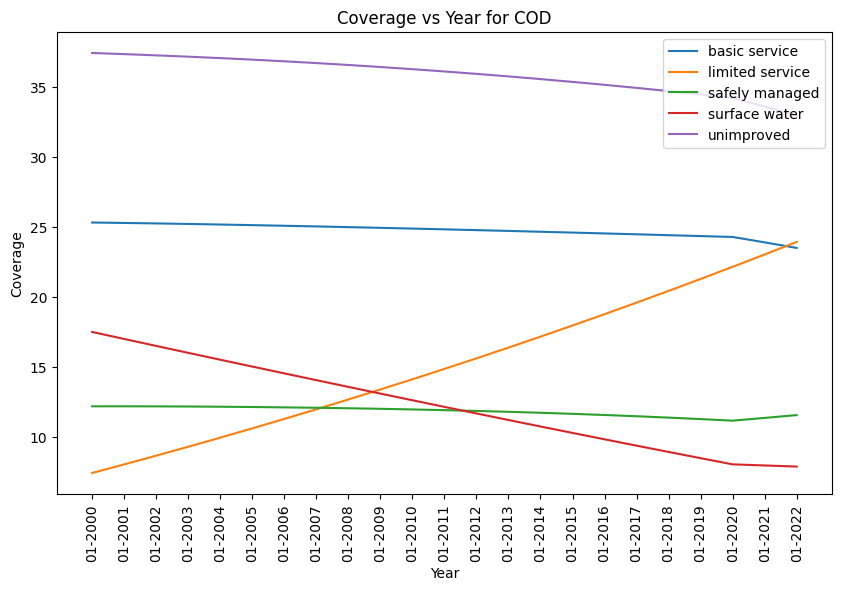

In [119]:
#plot multiple times series for COD
plt.figure(figsize=(10, 6))
plt.plot(COD_basic_service.index, COD_basic_service['Coverage'], label= 'basic service')
plt.plot(COD_limited_service.index, COD_limited_service['Coverage'], label='limited service')
plt.plot(COD_safely_managed.index, COD_safely_managed['Coverage'], label='safely managed')
plt.plot(COD_surface_water.index, COD_surface_water['Coverage'], label='surface water')
plt.plot(COD_unimproved.index, COD_unimproved['Coverage'], label='unimproved')

plt.title('Coverage vs Year for COD')
plt.xlabel('Year')
plt.ylabel('Coverage')
plt.xticks(rotation=90)
plt.legend()

plt.show()

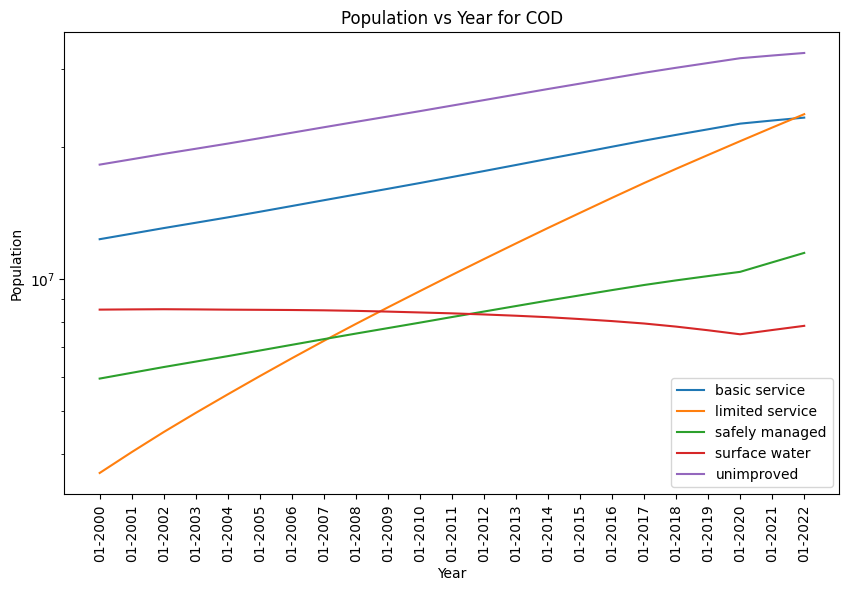

In [120]:
#plot multiple times series for COD
plt.figure(figsize=(10, 6))
plt.plot(COD_basic_service.index, COD_basic_service['Population(millions)'], label= 'basic service')
plt.plot(COD_limited_service.index, COD_limited_service['Population(millions)'], label='limited service')
plt.plot(COD_safely_managed.index, COD_safely_managed['Population(millions)'], label='safely managed')
plt.plot(COD_surface_water.index, COD_surface_water['Population(millions)'], label='surface water')
plt.plot(COD_unimproved.index, COD_unimproved['Population(millions)'], label='unimproved')

plt.title('Population vs Year for COD')
plt.yscale('log')
plt.xlabel('Year')
plt.ylabel('Population')
plt.xticks(rotation=90)
plt.legend()

plt.show()

### UGA

In [121]:
#get dataframe for each category in service level
UGA_basic_service = UGA_total[UGA_total['Service_level'] =='Basic service']
UGA_limited_service = UGA_total[UGA_total['Service_level'] =='Limited service']
UGA_safely_managed = UGA_total[UGA_total['Service_level'] =='Safely managed service']
UGA_surface_water = UGA_total[UGA_total['Service_level'] =='Surface water']
UGA_unimproved = UGA_total[UGA_total['Service_level'] =='Unimproved']

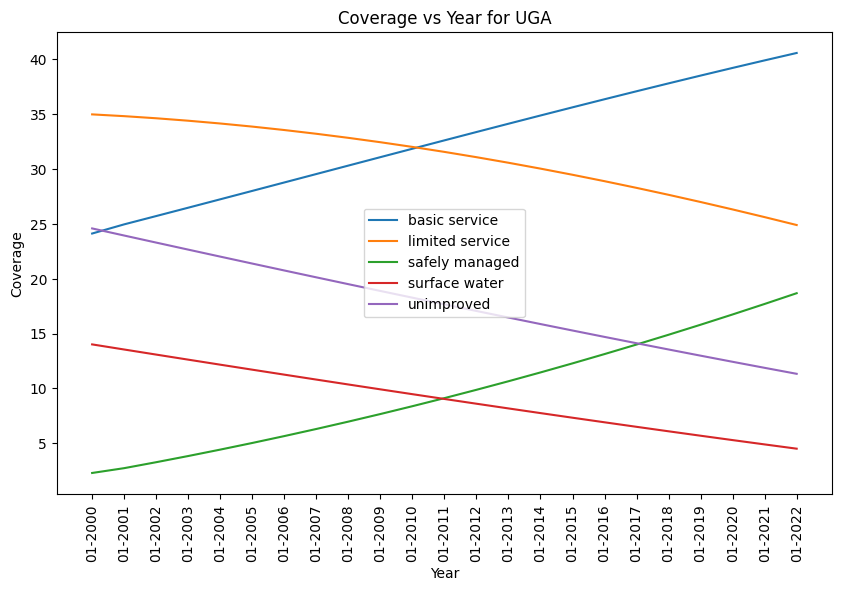

In [122]:
#plot multiple times series for MOZ
plt.figure(figsize=(10, 6))
plt.plot(UGA_basic_service.index, UGA_basic_service['Coverage'], label= 'basic service')
plt.plot(UGA_limited_service.index, UGA_limited_service['Coverage'], label='limited service')
plt.plot(UGA_safely_managed.index, UGA_safely_managed['Coverage'], label='safely managed')
plt.plot(UGA_surface_water.index, UGA_surface_water['Coverage'], label='surface water')
plt.plot(UGA_unimproved.index, UGA_unimproved['Coverage'], label='unimproved')

plt.title('Coverage vs Year for UGA')
plt.xlabel('Year')
plt.ylabel('Coverage')
plt.xticks(rotation=90)
plt.legend()

plt.show()

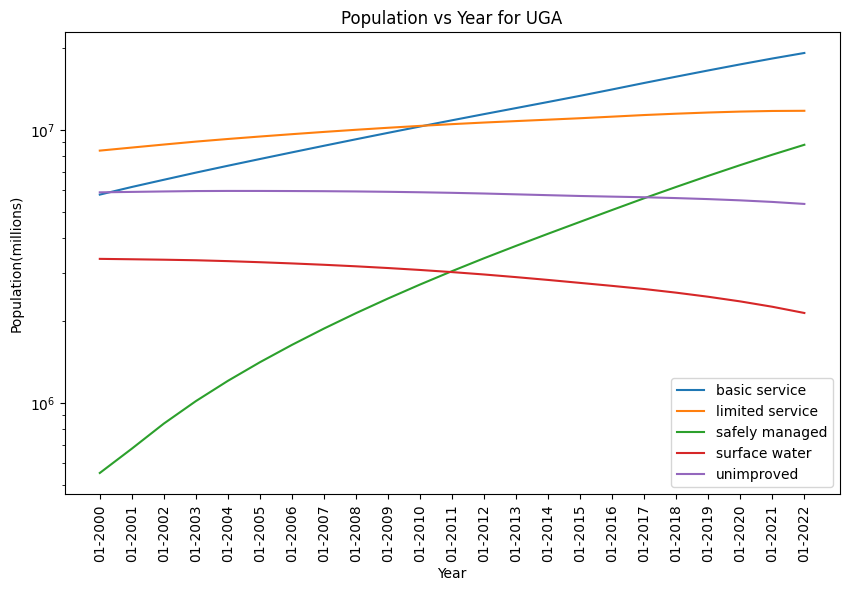

In [123]:
#plot multiple times series for UGA
plt.figure(figsize=(10, 6))
plt.plot(UGA_basic_service.index, UGA_basic_service['Population(millions)'], label= 'basic service')
plt.plot(UGA_limited_service.index, UGA_limited_service['Population(millions)'], label='limited service')
plt.plot(UGA_safely_managed.index, UGA_safely_managed['Population(millions)'], label='safely managed')
plt.plot(UGA_surface_water.index, UGA_surface_water['Population(millions)'], label='surface water')
plt.plot(UGA_unimproved.index, UGA_unimproved['Population(millions)'], label='unimproved')

plt.title('Population vs Year for UGA')
plt.yscale('log')
plt.xlabel('Year')
plt.ylabel('Population(millions)')
plt.xticks(rotation=90)
plt.legend()

plt.show()

### LSO

In [124]:
#get dataframe for each category in service level
LSO_atleast_basic = LSO_total[LSO_total['Service_level'] =='At least basic']
LSO_limited_service = LSO_total[LSO_total['Service_level'] =='Limited service']
LSO_safely_managed = LSO_total[LSO_total['Service_level'] =='Safely managed service']
LSO_surface_water = LSO_total[LSO_total['Service_level'] =='Surface water']
LSO_unimproved = LSO_total[LSO_total['Service_level'] =='Unimproved']

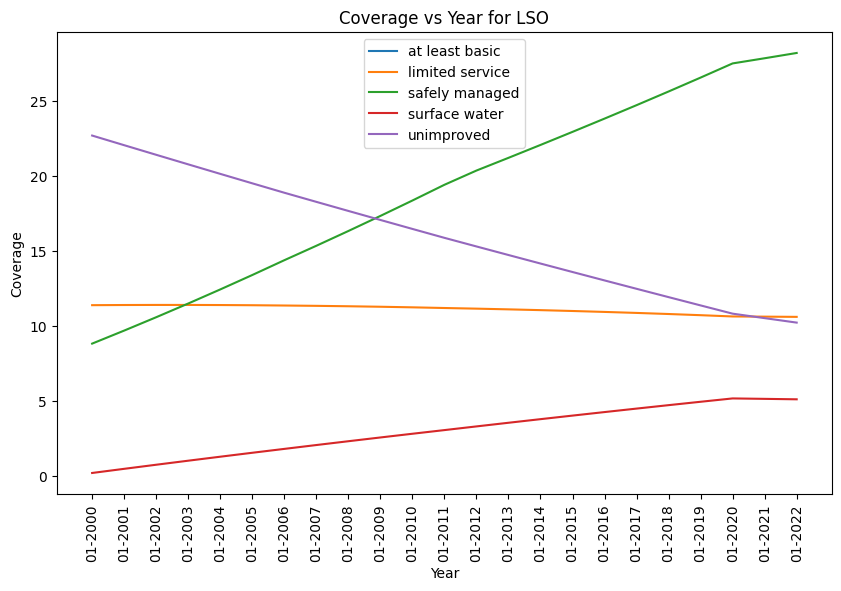

In [125]:
#plot multiple times series for LSO
plt.figure(figsize=(10, 6))
plt.plot(LSO_atleast_basic.index, LSO_atleast_basic['Coverage'], label= 'at least basic')
plt.plot(LSO_limited_service.index,LSO_limited_service['Coverage'], label='limited service')
plt.plot(LSO_safely_managed.index, LSO_safely_managed['Coverage'], label='safely managed')
plt.plot(LSO_surface_water.index, LSO_surface_water['Coverage'], label='surface water')
plt.plot(LSO_unimproved.index, LSO_unimproved['Coverage'], label='unimproved')

plt.title('Coverage vs Year for LSO')
plt.xlabel('Year')
plt.ylabel('Coverage')
plt.xticks(rotation=90)
plt.legend()

plt.show()

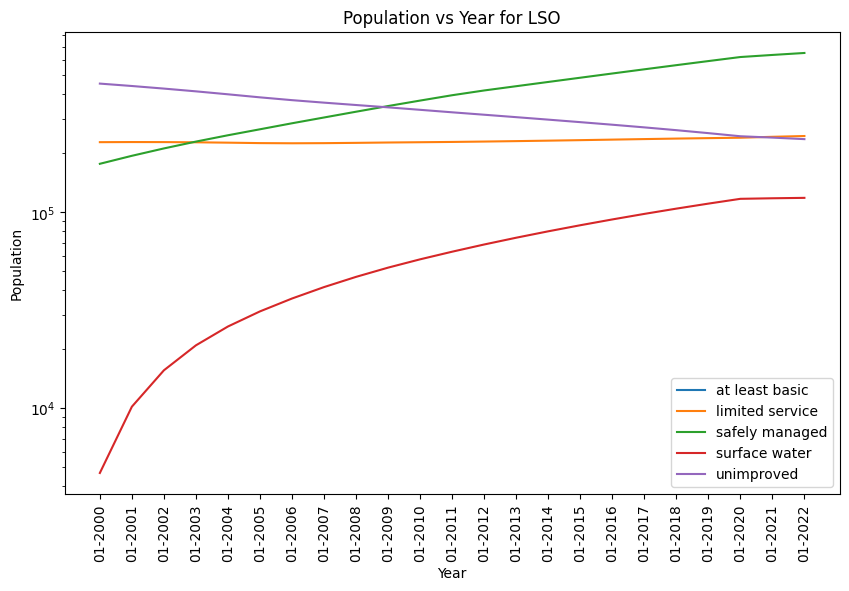

In [126]:
#plot multiple times series for LSO
plt.figure(figsize=(10, 6))
plt.plot(LSO_atleast_basic.index, LSO_atleast_basic['Population(millions)'], label= 'at least basic')
plt.plot(LSO_limited_service.index, LSO_limited_service['Population(millions)'], label='limited service')
plt.plot(LSO_safely_managed.index, LSO_safely_managed['Population(millions)'], label='safely managed')
plt.plot(LSO_surface_water.index, LSO_surface_water['Population(millions)'], label='surface water')
plt.plot(LSO_unimproved.index, LSO_unimproved['Population(millions)'], label='unimproved')

plt.title('Population vs Year for LSO')
plt.yscale('log')
plt.xlabel('Year')
plt.ylabel('Population')
plt.xticks(rotation=90)
plt.legend()

plt.show()

### NGA

In [127]:
#get dataframe for each category in service levelzwe
NGA_basic_service = NGA_total[NGA_total['Service_level'] =='Basic service']
NGA_limited_service = NGA_total[NGA_total['Service_level'] =='Limited service']
NGA_safely_managed = NGA_total[NGA_total['Service_level'] =='Safely managed service']
NGA_surface_water = NGA_total[NGA_total['Service_level'] =='Surface water']
NGA_unimproved = NGA_total[NGA_total['Service_level'] =='Unimproved']

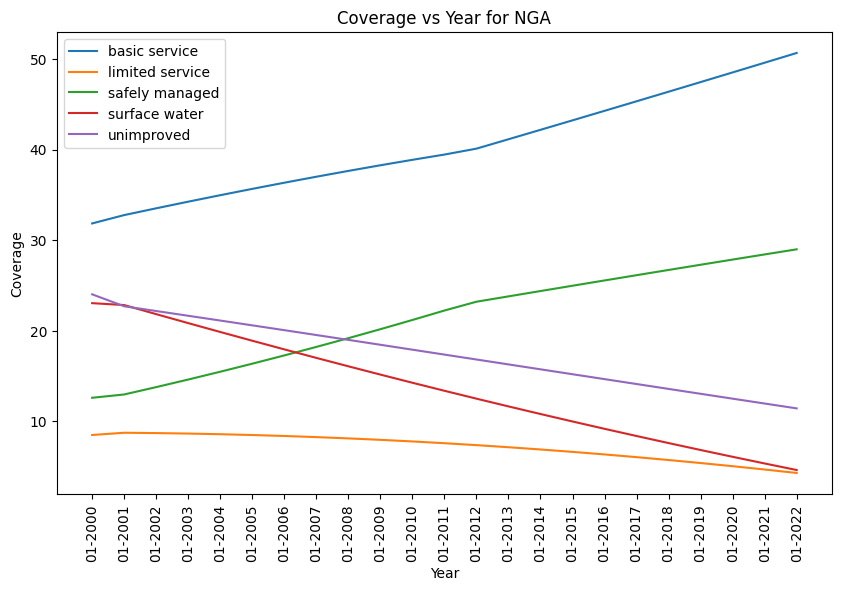

In [128]:
#plot multiple times series for BFA
plt.figure(figsize=(10, 6))
plt.plot(NGA_basic_service.index, NGA_basic_service['Coverage'], label= 'basic service')
plt.plot(NGA_limited_service.index, NGA_limited_service['Coverage'], label='limited service')
plt.plot(NGA_safely_managed.index, NGA_safely_managed['Coverage'], label='safely managed')
plt.plot(NGA_surface_water.index, NGA_surface_water['Coverage'], label='surface water')
plt.plot(NGA_unimproved.index, NGA_unimproved['Coverage'], label='unimproved')

plt.title('Coverage vs Year for NGA')
plt.xlabel('Year')
plt.ylabel('Coverage')
plt.xticks(rotation=90)
plt.legend()

plt.show()

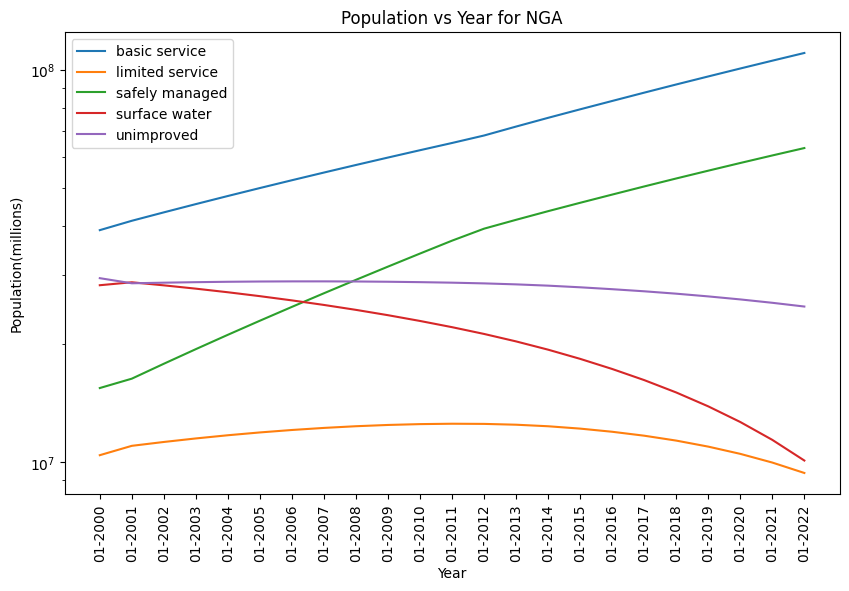

In [129]:
#plot multiple times series for BFA
plt.figure(figsize=(10, 6))
plt.plot(NGA_basic_service.index, NGA_basic_service['Population(millions)'], label= 'basic service')
plt.plot(NGA_limited_service.index, NGA_limited_service['Population(millions)'], label='limited service')
plt.plot(NGA_safely_managed.index, NGA_safely_managed['Population(millions)'], label='safely managed')
plt.plot(NGA_surface_water.index, NGA_surface_water['Population(millions)'], label='surface water')
plt.plot(NGA_unimproved.index, NGA_unimproved['Population(millions)'], label='unimproved')

plt.title('Population vs Year for NGA')
plt.yscale('log')
plt.xlabel('Year')
plt.ylabel('Population(millions)')
plt.xticks(rotation=90)
plt.legend()

plt.show()

# TIME SERIES MODELLING

### columns needed for time series modelling are selected i.e year and coverage. This time series is a Univariate analysis i.e a variable (coverage) is over a period of time.

In [130]:
#Negatve progress countries
ZWE_safely = ZWE_safely[['Year','Coverage']]
CAF_safely = CAF_safely[['Year','Coverage']]
COD_safely = COD_safely[['Year','Coverage']]

#Slow progress countries
UGA_safely = UGA_safely[['Year','Coverage']]
LSO_safely = LSO_safely[['Year','Coverage']]
NGA_safely = NGA_safely[['Year','Coverage']]
#REU_safely = REU_safely[['Year','Coverage']]

In [131]:
ZWE_safely['Year'] = pd.to_datetime(ZWE_safely['Year'].astype(str), format='%Y-%m')
CAF_safely['Year'] = pd.to_datetime(CAF_safely['Year'].astype(str), format='%Y-%m')
COD_safely['Year'] = pd.to_datetime(COD_safely['Year'].astype(str), format='%Y-%m')

UGA_safely['Year'] = pd.to_datetime(UGA_safely['Year'].astype(str), format='%Y-%m')
LSO_safely['Year'] = pd.to_datetime(LSO_safely['Year'].astype(str), format='%Y-%m')
NGA_safely['Year'] = pd.to_datetime(NGA_safely['Year'].astype(str), format='%Y-%m')
#REU_safely['Year'] = pd.to_datetime(REU_safely['Year'].astype(str), format='%Y-%m')

In [132]:
ZWE_safely.set_index('Year', inplace=True)

In [133]:
CAF_safely.set_index('Year', inplace=True)

In [134]:
COD_safely.set_index('Year', inplace=True)

In [135]:
UGA_safely.set_index('Year', inplace=True)

In [136]:
LSO_safely.set_index('Year', inplace=True)

In [137]:
NGA_safely.set_index('Year', inplace=True)

In [138]:
#REU_safely.set_index('Year', inplace=True)

## NEGATIVE PROGRESS COUNTRIES

### COUNTRY 1: ZIMBABWE (ZWE)

### ARIMA 

#### ARIMA is an acronym for Autoregressive Integrated Moving Average. The model describes a given time series from the previous values of the time series (these are called lags). The previous values in the time series are called AR terms (Auto Regressive terms) and the forecasting errors are called MA terms (Moving Average terms).

Text(0.5, 1.0, 'Coverage from year 2000 to 2022')

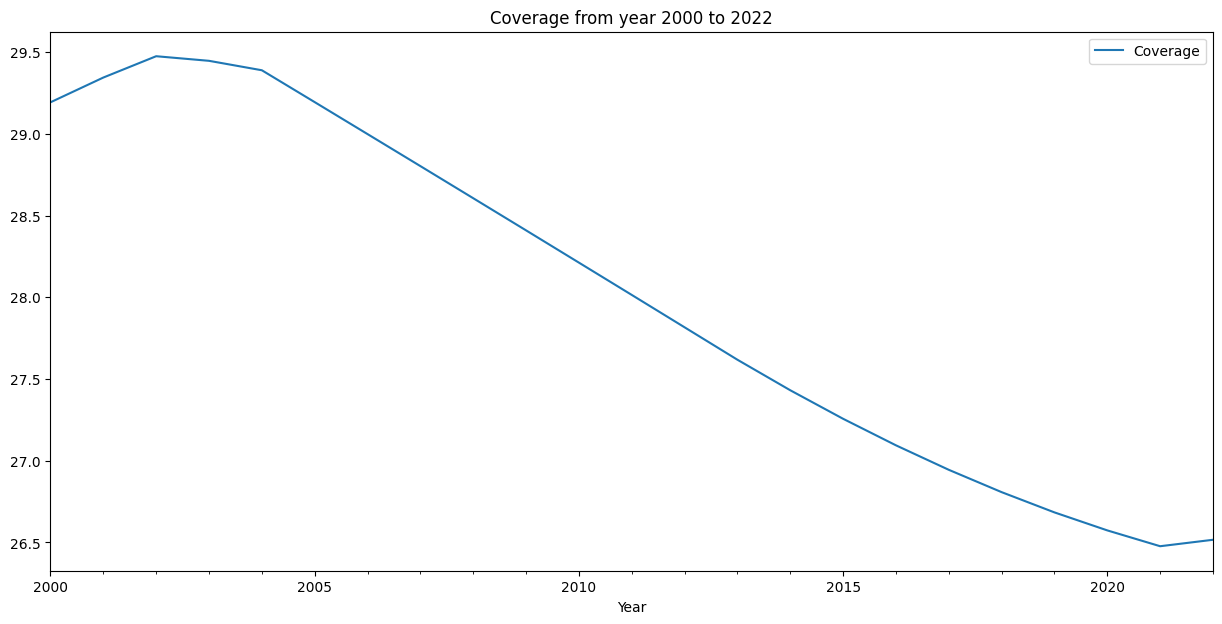

In [139]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 7
ZWE_safely.plot()
plt.legend(loc='best')
plt.title('Coverage from year 2000 to 2022')

### downward trend is observed in the plot, 

### 1) AUGMENTED DICKEY FULLER TEST (ADF)

In [140]:
#a function is created to determine ADF (Augmented Dickey Fuller (ADF) test) which determines if a time series is stationary or not
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
    print('Results of Augmented Dickey-Fuller Test:')
    ZWE_safely_test= adfuller(dataset, autolag ='AIC')
    ZWE_safely_output= pd.Series(ZWE_safely_test[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'Number of observations Used'])
    for key, value in  ZWE_safely_test[4].items():
        ZWE_safely_output['Critical Value (%s)'%key ] = value
    print(ZWE_safely_output)
        
adf_test(ZWE_safely)  

Results of Augmented Dickey-Fuller Test:
Test Statistic                 -3.188850
p-value                         0.020639
#Lags Used                      1.000000
Number of observations Used    21.000000
Critical Value (1%)            -3.788386
Critical Value (5%)            -3.013098
Critical Value (10%)           -2.646397
dtype: float64


#### Test Statistics is within the same range as the Critical values. The p-value obtained is lower than the significance level of 0.05, hence the time series is stationary.

#### ii) KWIATKOWSKI-PHILLIPS-SCHMIDT-SHIN (KPSS) Test

In [141]:
from statsmodels.tsa.stattools import kpss

In [142]:
def kpss_test(dataset):
    print('Results of KPSS test')
    ZWE_safely_test = kpss(dataset, regression='c', nlags='auto')
    ZWE_safely_output=pd.Series(ZWE_safely_test[0:3], index=['Test Statistic', 'p-value', '#lags Used'])
    for key, value in ZWE_safely_test[3].items():
        ZWE_safely_output['Critical Value (%s)'%key] = value
    print(ZWE_safely_output)
    
kpss_test(ZWE_safely['Coverage'])

Results of KPSS test
Test Statistic           0.658037
p-value                  0.017360
#lags Used               3.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


In [143]:
from statsmodels.tsa.stattools import kpss
def kpss_test(series, **kw):
    statistic, p_value, n_lags, critical_values =kpss(series, **kw)
    
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critical Values:')
    for key, value in critical_values.items():
        print(f' {key}: {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else""} stationary')
kpss_test(ZWE_safely)

KPSS Statistic: 0.6580372154075226
p-value: 0.017360253144770674
num lags: 3
Critical Values:
 10%: 0.347
 5%: 0.463
 2.5%: 0.574
 1%: 0.739
Result: The series is not  stationary


#### Test statistic is greater than p-value, hence the series is non-stationary

#### iii) ROLLING STATISTICS

In [144]:
#get rolling statistics
rolling_mean = ZWE_safely['Coverage'].rolling(window=3).mean()
rolling_std = ZWE_safely['Coverage'].rolling(window=3).std()

Text(0.5, 1.0, 'Rolling Mean & Standard Deviation')

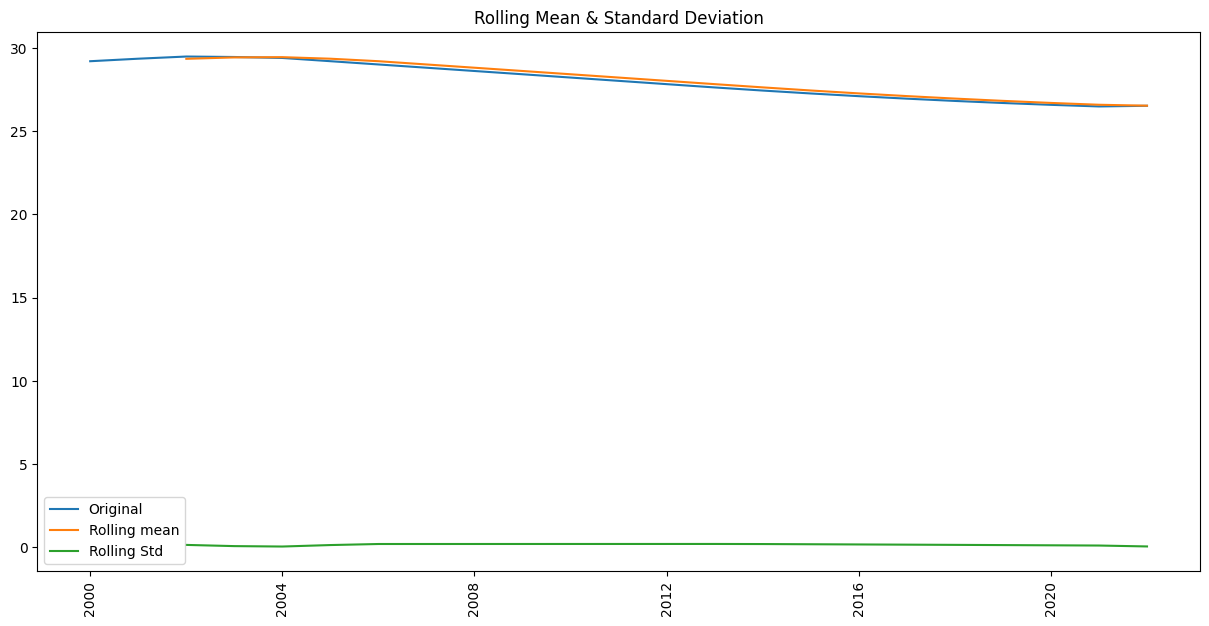

In [145]:
#plot rolling statistics
original_series = plt.plot(ZWE_safely['Coverage'], label='Original')
mean = plt.plot(rolling_mean, label='Rolling mean')
std = plt.plot(rolling_std, label='Rolling Std')
plt.legend(loc='best')
plt.xticks(rotation=90)
plt.title('Rolling Mean & Standard Deviation')

#### The rolling standard deviation is constant but the rolling mean is not. This shows that the data is non stationary

### PARAMETER ANALYSIS FOR ARIMA - p, d, q

#### AUTOCORRELATION FACTOR (ACF), q shows correlation between time series and its lagged values at different time lags. A spike or drop in the ACF reflects a pattern or seasonality in the data.

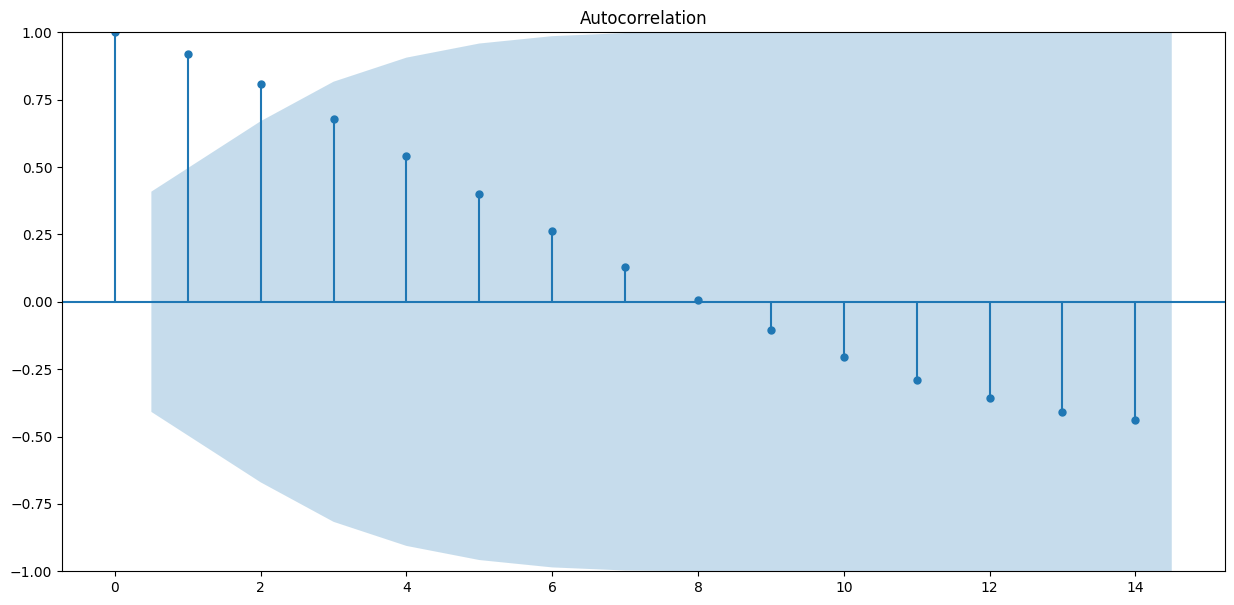

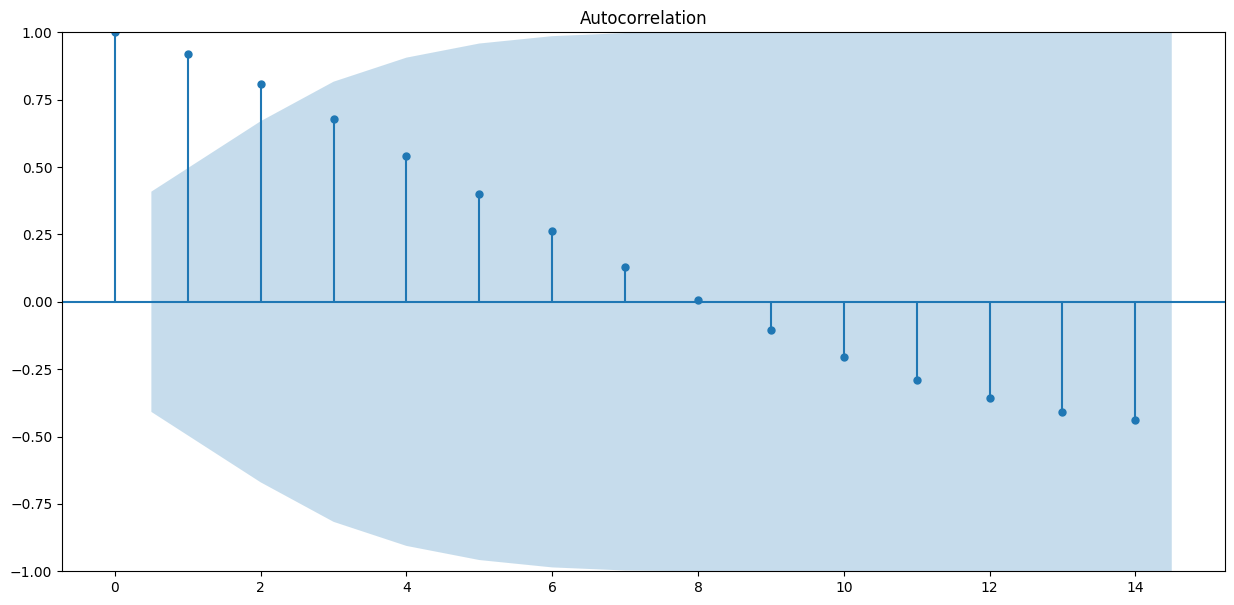

In [146]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(ZWE_safely['Coverage'])

### there are 2 spikes suggesting q=2

#### iii) PARTIAL AUTOCORRELATION FACTOR (PACF), p shows correlation between time series and its lagged values while controlling the effects of the other values

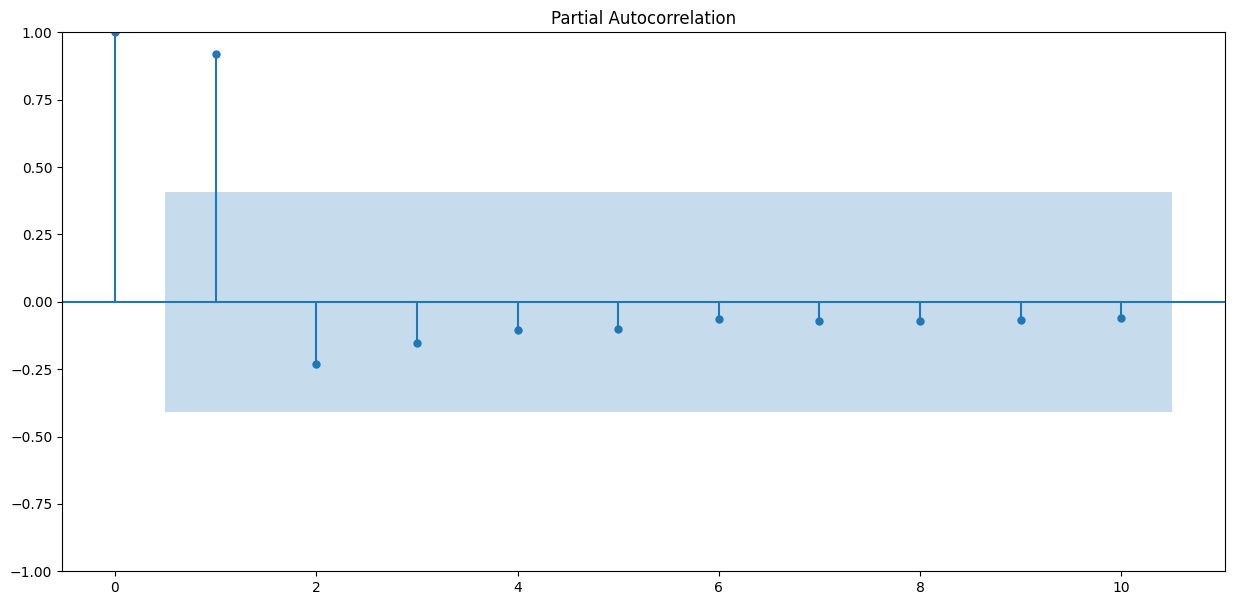

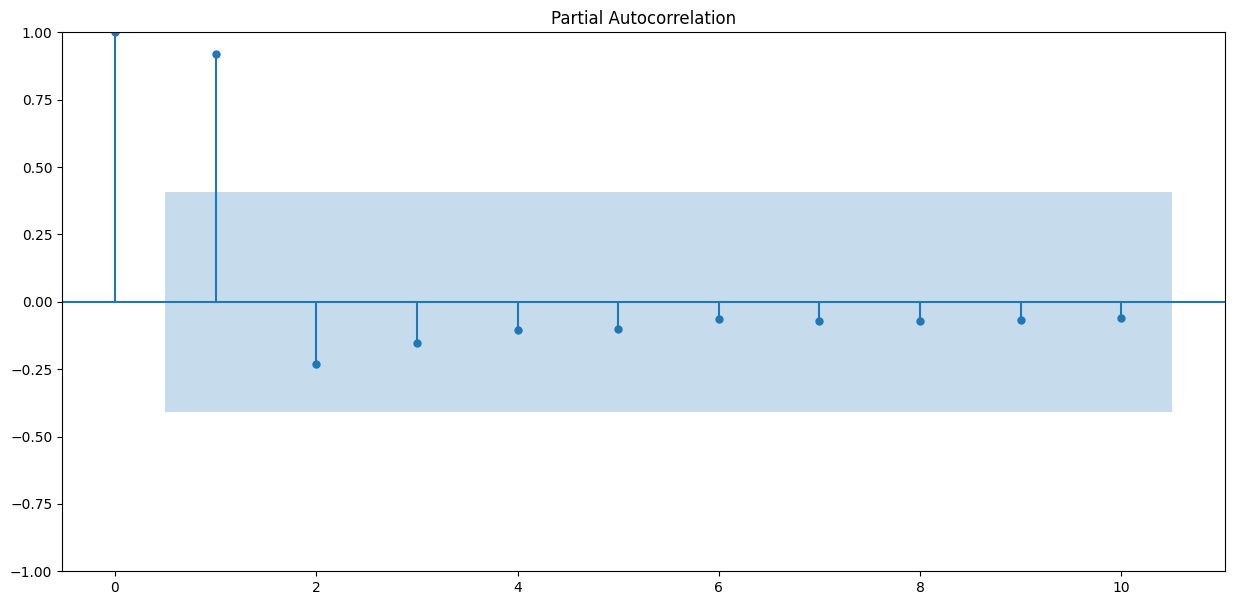

In [147]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(ZWE_safely['Coverage'], lags=10)

### p= 1

#### GRID SEARCH FOR OPTIMAL PARAMETERS

In [148]:
#Finding the best value for ARIMA
import itertools

#define the range of p,d,q parameters to take any value between 0 and 2
p=d=q=range(0,2)


#generate all possible combinations of p, d and q 
pdq = list(itertools.product(p,d,q))

#loop through all combinations of p, d, q and fit ARIMA model
warnings.filterwarnings("ignore") #to ignore warnings

for param in pdq:
    try:
        model_arima = ARIMA(ZWE_safely, order=param, enforce_invertibility=False, enforce_stationarity=False)
        model_arima_fit = model_arima.fit()
        print(param, model_arima_fit.aic)
    except:
        continue
#The AIC is an estimator of in sample prediction error and thereby relative quality of statistical models for a given set of data

(0, 0, 0) 68.6397149960296
(0, 0, 1) 42.85377938510759
(0, 1, 0) -15.239049256752306
(0, 1, 1) -31.573916806024243
(1, 0, 0) -31.54645346422874
(1, 0, 1) -42.34211141909664
(1, 1, 0) -58.784952719246924
(1, 1, 1) -53.69054916120036


#### Parameters p, d, q =(1, 1, 0) and with the lowest AIC of --58.784952719246924 is selected

#### SPLIT DATA

In [149]:
ZWE_train=ZWE_safely['2000-01-01':'2020-01-01']
ZWE_test=ZWE_safely['2020-01-01':'2022-01-01']

In [150]:
model_arima = ARIMA(ZWE_train, order=(1, 1, 0), enforce_invertibility=False) 
model_arima_fit = model_arima.fit()

print(model_arima_fit.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9471      0.119      7.962      0.000       0.714       1.180
sigma2         0.0024      0.000      5.350      0.000       0.001       0.003


In [151]:
print(model_arima_fit.summary())

                               SARIMAX Results                                
Dep. Variable:               Coverage   No. Observations:                   21
Model:                 ARIMA(1, 1, 0)   Log Likelihood                  30.960
Date:                Fri, 15 Dec 2023   AIC                            -57.920
Time:                        21:36:40   BIC                            -55.928
Sample:                    01-01-2000   HQIC                           -57.531
                         - 01-01-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9471      0.119      7.962      0.000       0.714       1.180
sigma2         0.0024      0.000      5.350      0.000       0.001       0.003
Ljung-Box (L1) (Q):                   0.43   Jarque-

#### TEST PREDICTION

In [152]:
#prediction of test data with ARIMA
prediction = model_arima_fit.predict(start=20, end=22)
ZWE_prediction=pd.DataFrame(prediction)
ZWE_prediction

predicted_mean
2020-01-01       26.566575
2021-01-01       26.469541
2022-01-01       26.370753

#### FORECAST OF YEAR 2030

In [153]:
#forecast of 2030 with ARIMA
forecast = model_arima_fit.get_forecast(steps=10)
forecast_conf = forecast.conf_int()

#put confidence intervals in df
ZWE_forecast_conf =pd.DataFrame(forecast_conf)
ZWE_forecast_conf

lower Coverage  upper Coverage
2021-01-01       26.374252       26.564829
2022-01-01       26.162178       26.579328
2023-01-01       25.935212       26.619171
2024-01-01       25.697838       26.679321
2025-01-01       25.453079       26.756231
2026-01-01       25.203102       26.847239
2027-01-01       24.949533       26.950249
2028-01-01       24.693633       27.063554
2029-01-01       24.436399       27.185737
2030-01-01       24.178633       27.315597

In [154]:
forecast.predicted_mean

2021-01-01    26.469541
2022-01-01    26.370753
2023-01-01    26.277191
2024-01-01    26.188580
2025-01-01    26.104655
2026-01-01    26.025171
2027-01-01    25.949891
2028-01-01    25.878594
2029-01-01    25.811068
2030-01-01    25.747115
Freq: AS-JAN, Name: predicted_mean, dtype: float64

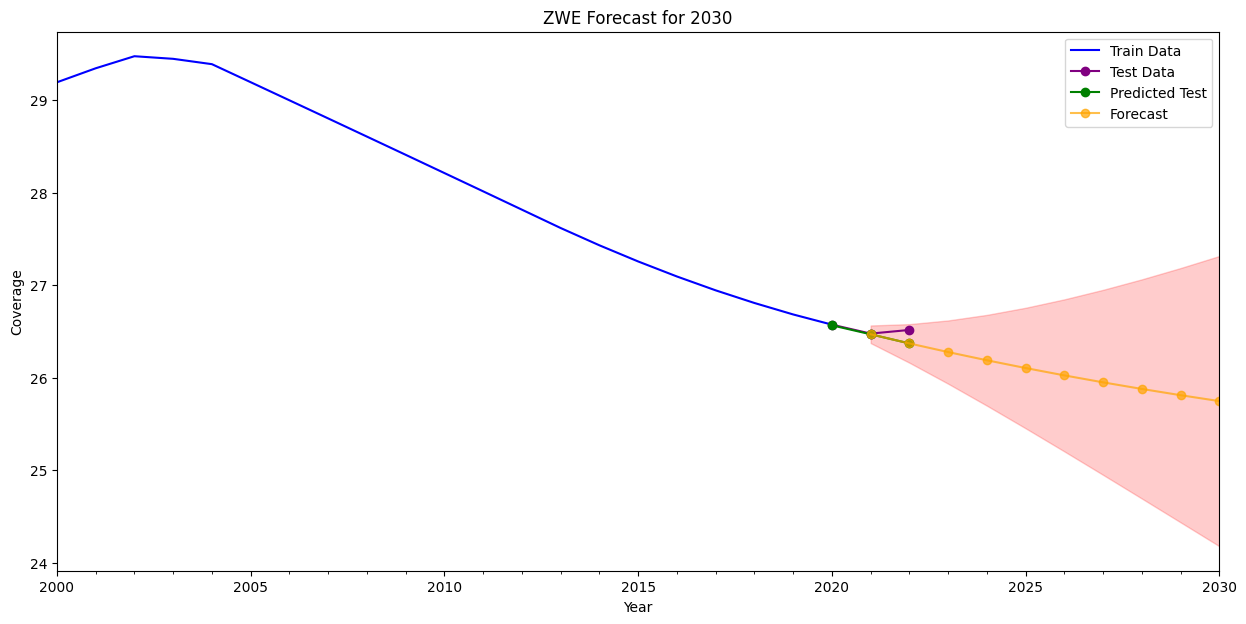

In [155]:
#plot observed values
ax = ZWE_train['Coverage'].plot(label='Train Data', color='blue')
ax = ZWE_test['Coverage'].plot(label='Test Data', marker='o', color='purple')

#plot predicted test values
ax = ZWE_prediction['predicted_mean'].plot(label='Predicted Test', marker='o', color= 'green')

#Plot forecasted values
forecast.predicted_mean.plot(ax=ax, marker='o', label='Forecast', color='orange', alpha=0.7)

#plot the range for confidence intervals
ax.fill_between(forecast_conf.index,
                forecast_conf.iloc[:, 0],
                forecast_conf.iloc[:, 1], color='r', alpha=0.2)

#set axes labels
ax.set_xlabel('Year')
ax.set_ylabel('Coverage')
plt.title('ZWE Forecast for 2030')
plt.legend(loc='best')

plt.show()

#### EVALUATE MODEL

In [156]:
# Calculate evaluation metrics
mse = mean_squared_error(ZWE_test, ZWE_prediction)
rmse = np.sqrt(mse)
mae = mean_absolute_error(ZWE_test, ZWE_prediction)
me=np.mean(ZWE_prediction['predicted_mean']- ZWE_test['Coverage'])
mape = np.mean(np.abs(ZWE_prediction['predicted_mean'] - ZWE_test['Coverage']) / np.abs(ZWE_test['Coverage']) * 100)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Error (ME): {me}")

Mean Squared Error (MSE): 0.007109874474908803
Root Mean Squared Error (RMSE): 0.08432007160165841
Mean Absolute Percentage Error (MAPE): 0.20163166258643614
Mean Absolute Error (MAE): 0.05346705075399901
Mean Error (ME): -0.05346705075399901


#### MODEL DIAGNOSTICS

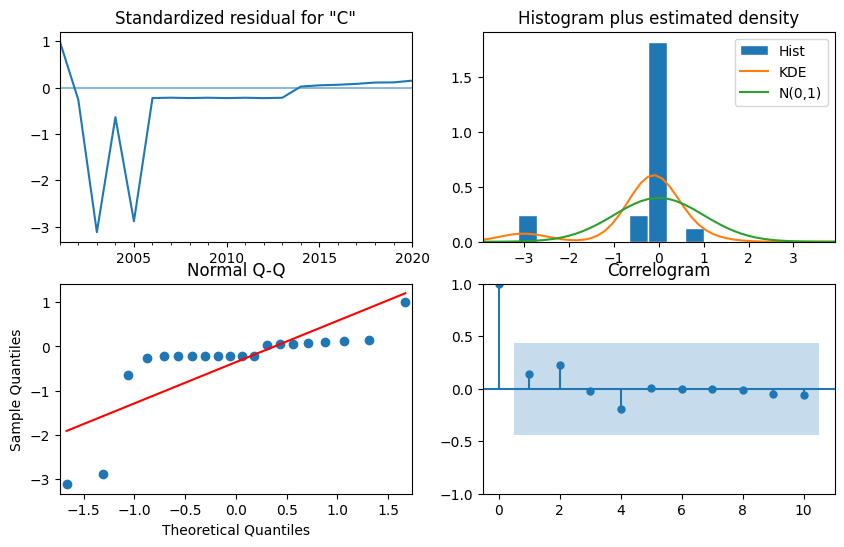

In [157]:
model_arima_fit.plot_diagnostics(figsize=(10,6))
plt.show()

### There is no correlation in the correlogram and the data points of the qq plot are fairly distributed close to the straight line. The model is good~

## MODEL 2: AUTO ARIMA

#### Auto ARIMA uses the Akaike's Information Criterion (AIC), to identify the order of the best ARIMA model

#### SPLIT DATA

In [158]:
ZWE_train=ZWE_safely['2000-01-01':'2020-01-01']
ZWE_test=ZWE_safely['2020-01-01':'2022-01-01']

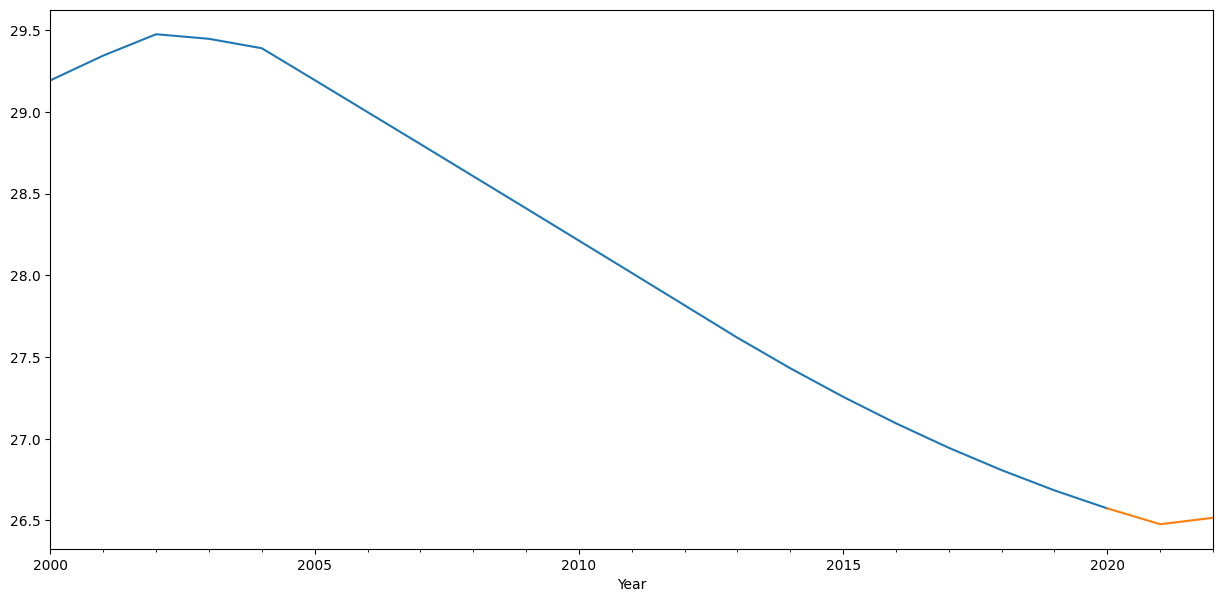

In [159]:
#plot train and test
ZWE_train['Coverage'].plot()
ZWE_test['Coverage'].plot()
plt.show()

#### FIT ARIMA INTO MODEL

In [160]:
#fit auto_arima into BFA dataset
ZWE_model = pm.auto_arima(ZWE_train,
                          m=1,
                          seasonal=False,
                          trace=True,
                          error_action='ignore',
                          stepwise=True,
                          suppress_warnings=True)  

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-59.280, Time=0.33 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-30.374, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-56.017, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-43.690, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-13.004, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-64.313, Time=0.24 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-49.830, Time=0.18 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-54.993, Time=0.13 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-62.897, Time=0.31 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-58.192, Time=0.29 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-60.372, Time=0.43 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-66.190, Time=0.22 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=inf, Time=0.20 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-56.819, Time

In [161]:
ZWE_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   21
Model:               SARIMAX(1, 1, 2)   Log Likelihood                  37.095
Date:                Fri, 15 Dec 2023   AIC                            -66.190
Time:                        21:36:46   BIC                            -62.207
Sample:                    01-01-2000   HQIC                           -65.413
                         - 01-01-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9166      0.160      5.732      0.000       0.603       1.230
ma.L1          0.1546      0.487      0.318      0.751      -0.799       1.108
ma.L2          0.8925      1.552      0.575      0.565      -2.150       3.935
sigma2         0.0011      0.002      0.641      0.521      -0.002       0.004
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                24.14
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.06   Skew:                            -1.81
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [162]:
ZWE_arima = sm.tsa.ARIMA(ZWE_train, order=(1,1,2))

In [163]:
ZWE_result = ZWE_arima.fit()

#### According to the algorithm the best ARIMA model is ARIMA (1, 1, 2). 

#### RESIDUAL PLOTS

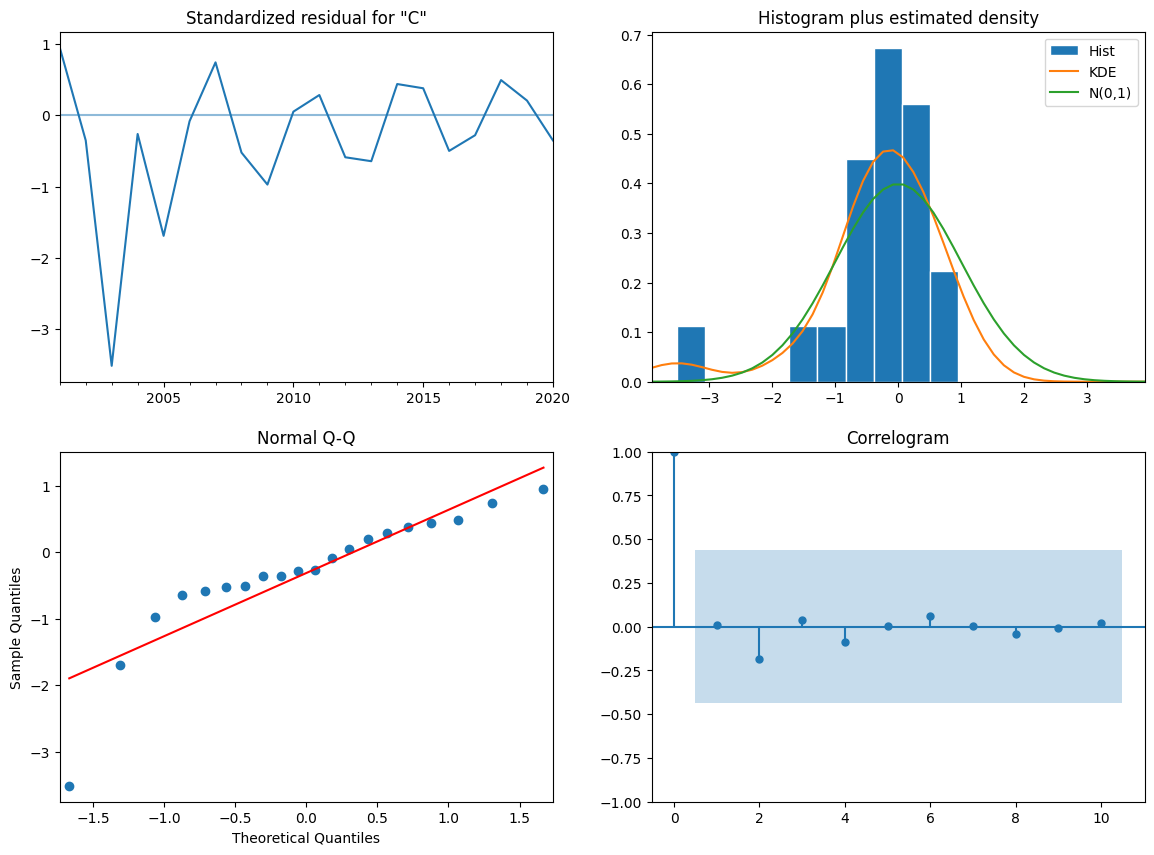

In [164]:
ZWE_result.plot_diagnostics(figsize=(14,10))
plt.show()

#### Auto ARIMA diagnostic looks better than for ARIMA. The data points are closer to the straight line in qq plot

#### TEST PREDICTION

In [165]:
ZWE_result.predict(start=20, end=22)

2020-01-01    26.585470
2021-01-01    26.477032
2022-01-01    26.378185
Freq: AS-JAN, Name: predicted_mean, dtype: float64

In [166]:
forecast=ZWE_result.predict(start=20, end=22)

In [167]:
ZWE_forecast=pd.DataFrame(forecast)

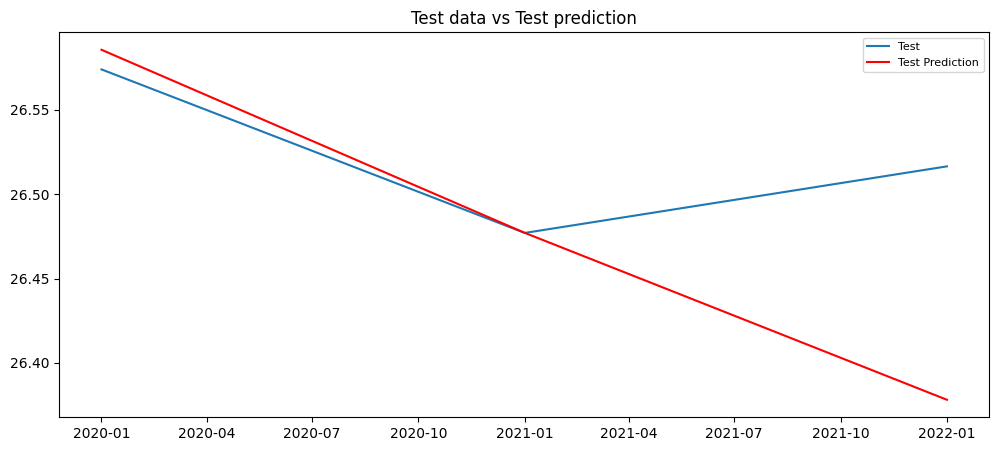

In [168]:
#plot Testing and Forecasted data
plt.figure(figsize=(12, 5), dpi=100)
#plt.plot(train, label='Train')
plt.plot(ZWE_test, label='Test')
plt.plot(forecast, label='Test Prediction', color='red')
plt.title('Test data vs Test prediction')
plt.legend(loc='best', fontsize=8)
plt.show()

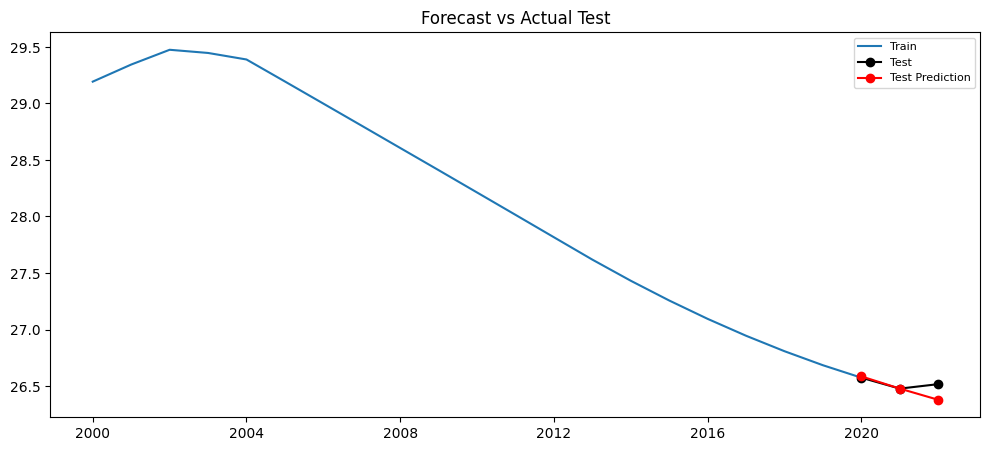

In [169]:
#plot the predictions for test set
plt.figure(figsize=(12, 5), dpi=100)

forecasted=ZWE_result.predict(start=20, end=22)

plt.plot(ZWE_train, label='Train')
plt.plot(ZWE_test, marker='o', label='Test', color='black')
plt.plot(forecasted, marker='o', label='Test Prediction', color='red')
plt.title('Forecast vs Actual Test')
plt.legend(loc='best', fontsize=8)
plt.show()

#### EVALUATE MODEL

In [170]:
ZWE_forecast

predicted_mean
2020-01-01       26.585470
2021-01-01       26.477032
2022-01-01       26.378185

In [171]:
# Calculate evaluation metrics
mse = mean_squared_error(ZWE_test, ZWE_forecast)
rmse = np.sqrt(mse)
mae = mean_absolute_error(ZWE_test, ZWE_forecast)
me=np.mean(ZWE_forecast['predicted_mean']- ZWE_test['Coverage'])
mape = np.mean(np.abs(ZWE_forecast['predicted_mean']- ZWE_test['Coverage']) / np.abs(ZWE_test['Coverage']) * 100)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Error (ME): {me}")

Mean Squared Error (MSE): 0.0064154144053719326
Root Mean Squared Error (RMSE): 0.08009628209456375
Mean Absolute Percentage Error (MAPE): 0.18840964192176993
Mean Absolute Error (MAE): 0.04996786098900211
Mean Error (ME): -0.04219411818009652


#### FORECAST FOR YEAR 2030

In [172]:
# Getting forecast 
forecast = ZWE_result.get_forecast(steps=10, dynamic=False)
ZWE_forecast_conff = forecast.conf_int()

In [173]:
ZWE_forecast_conff

lower Coverage  upper Coverage
2021-01-01       26.412686       26.541377
2022-01-01       26.230270       26.526100
2023-01-01       25.994943       26.580227
2024-01-01       25.739166       26.669921
2025-01-01       25.472624       26.784237
2026-01-01       25.200233       26.917102
2027-01-01       24.925102       27.064347
2028-01-01       24.649374       27.222859
2029-01-01       24.374585       27.390211
2030-01-01       24.101861       27.564462

In [174]:
forecasted=ZWE_result.predict(start=20, end=30)
ZWE_forecasted=pd.DataFrame(forecasted)

In [175]:
ZWE_forecasted

predicted_mean
2020-01-01       26.585470
2021-01-01       26.477032
2022-01-01       26.378185
2023-01-01       26.287585
2024-01-01       26.204544
2025-01-01       26.128430
2026-01-01       26.058667
2027-01-01       25.994725
2028-01-01       25.936116
2029-01-01       25.882398
2030-01-01       25.833161

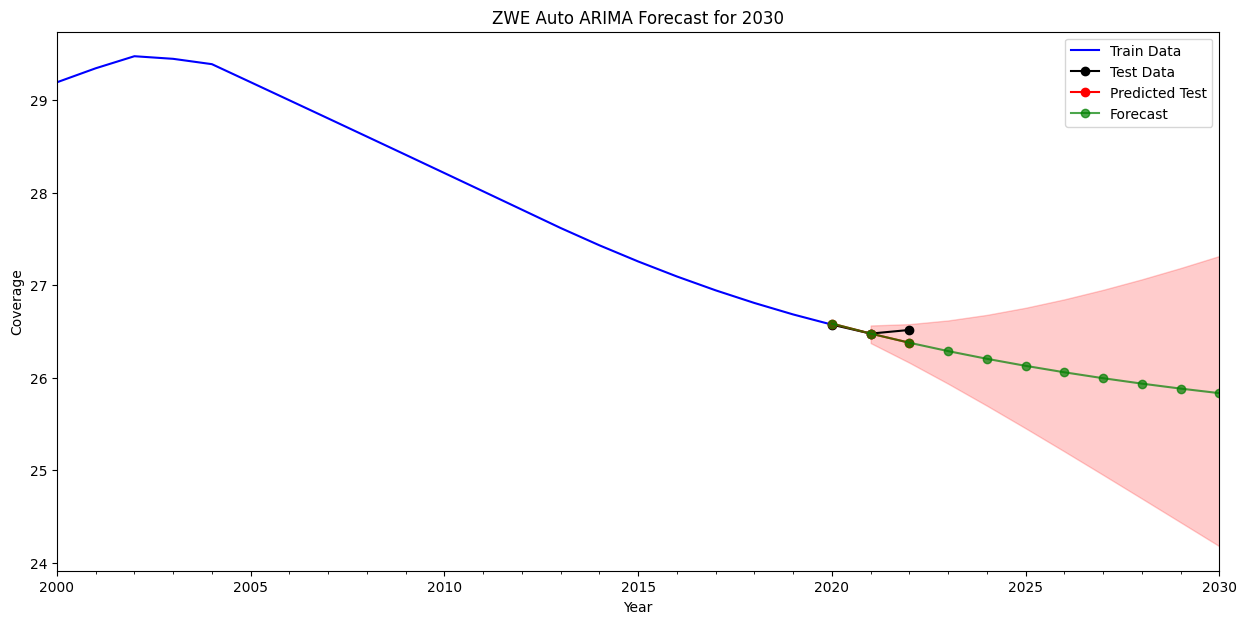

In [176]:
#plot observed values
ax = ZWE_train['Coverage'].plot(label='Train Data', color='blue')
ax = ZWE_test['Coverage'].plot(label='Test Data', marker='o', color='black')

#plot forecasted test values
ax = ZWE_forecast['predicted_mean'].plot(label='Predicted Test', marker='o', color= 'red')

#Plot forecasted values
ZWE_forecasted.predicted_mean.plot(ax=ax, marker='o', label='Forecast', color='green', alpha=0.7)

#plot the range for confidence intervals
ax.fill_between(forecast_conf.index,
                forecast_conf.iloc[:, 0],
                forecast_conf.iloc[:, 1], color='r', alpha=0.2)

#set axes labels
ax.set_xlabel('Year')
ax.set_ylabel('Coverage')
plt.title('ZWE Auto ARIMA Forecast for 2030')
plt.legend(loc='best')

plt.show()

In [177]:
forecasted=ZWE_result.predict(start=20, end=200)
ZWE_forecasted=pd.DataFrame(forecasted)
ZWE_forecasted

predicted_mean
2020-01-01       26.585470
2021-01-01       26.477032
2022-01-01       26.378185
2023-01-01       26.287585
2024-01-01       26.204544
...                    ...
2196-01-01       25.292239
2197-01-01       25.292239
2198-01-01       25.292239
2199-01-01       25.292239
2200-01-01       25.292239

[181 rows x 1 columns]

## MODEL 3: HOLT WINTER

In [178]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [179]:
ZWEhwmodel = ExponentialSmoothing(ZWE_train.Coverage, trend = 'add').fit()
ZWEhwmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       ExponentialSmoothing Model Results                       
================================================================================
Dep. Variable:                 Coverage   No. Observations:                   21
Model:             ExponentialSmoothing   SSE                              0.046
Optimized:                         True   AIC                           -120.403
Trend:                         Additive   BIC                           -116.225
Seasonal:                          None   AICC                          -114.403
Seasonal Periods:                  None   Date:                 Fri, 15 Dec 2023
Box-Cox:                          False   Time:                         21:36:48
Box-Cox Coeff.:                    None                                         
==============================================================================
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            1.0000000                alpha                 True
smoothing_trend            1.0000000                 beta                 True
initial_level              29.042050                  l.0                 True
initial_trend              0.1513819                  b.0                 True
------------------------------------------------------------------------------
"""

#### TEST PREDICTION

In [180]:
test_pred = ZWEhwmodel.predict(start=20, end=22)
test_pred=pd.DataFrame(test_pred)
test_pred

0
2020-01-01  26.560017
2021-01-01  26.463714
2022-01-01  26.353583

In [181]:
ZWE_test['Coverage']

Year
2020-01-01    26.573846
2021-01-01    26.476995
2022-01-01    26.516428
Name: Coverage, dtype: float64

<Axes: xlabel='Year'>

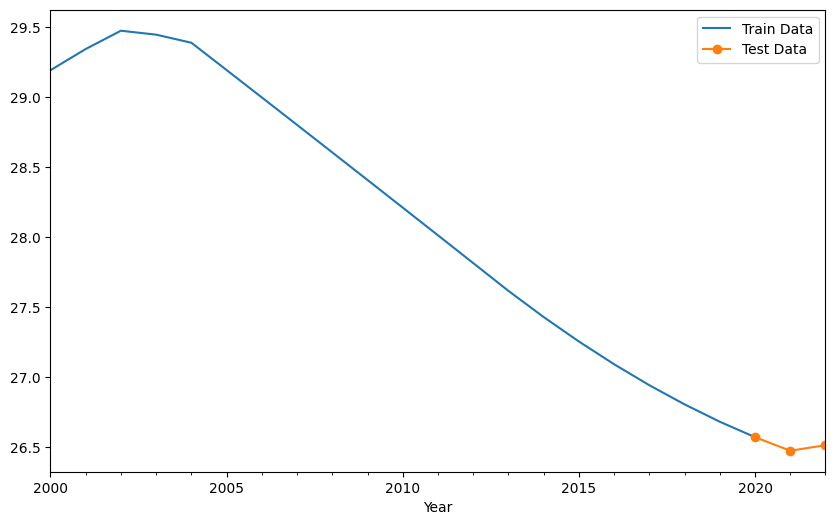

In [182]:
ZWE_train['Coverage'].plot(legend=True, label='Train Data', figsize=(10,6))
ZWE_test['Coverage'].plot(legend=True, marker = 'o', label='Test Data')

#test_pred.plot(legend=True, marker= 'o', label='Predicted Test')

#### MODEL EVALUATION

In [183]:
# Calculate evaluation metrics
mse = mean_squared_error(ZWE_test, test_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(ZWE_test, test_pred)
me=np.mean(test_pred[0]- ZWE_test['Coverage'])
mape = np.mean(np.abs(test_pred[0] - ZWE_test['Coverage']) / np.abs(ZWE_test['Coverage']) * 100)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Error (ME): {me}")

Mean Squared Error (MSE): 0.008962053277557997
Root Mean Squared Error (RMSE): 0.09466812175995674
Mean Absolute Percentage Error (MAPE): 0.23877667920233123
Mean Absolute Error (MAE): 0.06331841308087031
Mean Error (ME): -0.06331841308087031


In [184]:
ZWE_safely['Coverage'].mean(), np.sqrt(ZWE_safely['Coverage'].var())

(28.01351979356816, 1.082423034244881)

#### FORECAST FOR 2030

In [185]:
model = ExponentialSmoothing(ZWE_safely.Coverage, trend ='add').fit()

In [186]:
pred = ZWEhwmodel.predict(start=22, end=30)
#pred = model.forecast(steps=8)
pred=pd.DataFrame(pred)
pred

0
2022-01-01  26.353583
2023-01-01  26.243451
2024-01-01  26.133320
2025-01-01  26.023188
2026-01-01  25.913056
2027-01-01  25.802925
2028-01-01  25.692793
2029-01-01  25.582661
2030-01-01  25.472530

#### PLOT ALL ON SAME PLOT

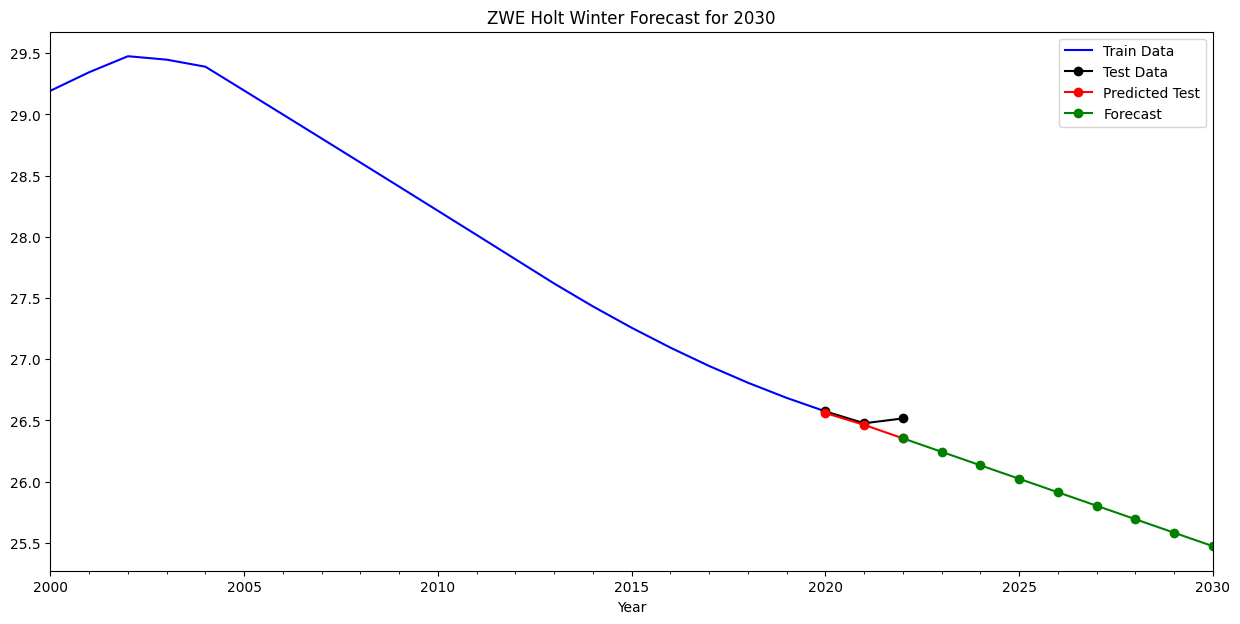

In [187]:
#plot observed values
ax = ZWE_train['Coverage'].plot(label='Train Data', color='blue')
ax = ZWE_test['Coverage'].plot(label='Test Data', marker='o', color='black')

#plot forecasted test values
ax = test_pred[0].plot(label='Predicted Test', marker='o', color= 'red')
ax = pred[0].plot(label='Forecast', marker='o', color= 'green')

#train, = plt.plot(BFA_train.index, BFA_train,'b.-', label='Train Data')
#test, = plt.plot(BFA_test.index, BFA_test, 'r.-', label= 'Test Data')
#test_pred, = plt.plot(test_pred.index, test_pred,  'g.-', label= 'Predicted Test')
#Plot forecasted values
#test_pred[0].plot(ax=ax, marker='o', label='Forecast', color='orange', alpha=0.7)

plt.legend()
plt.title('ZWE Holt Winter Forecast for 2030')
plt.show()

# COUNTRY 2: CENTRAL AFRICAN REPUBLIC (CAF)

## MODEL 1: ARIMA 

#### ARIMA is an acronym for Autoregressive Integrated Moving Average. The model describes a given time series from the previous values of the time series (these are called lags). The previous values in the time series are called AR terms (Auto Regressive terms) and the forecasting errors are called MA terms (Moving Average terms).

Text(0.5, 1.0, 'Basic Coverage from year 2000 to 2022')

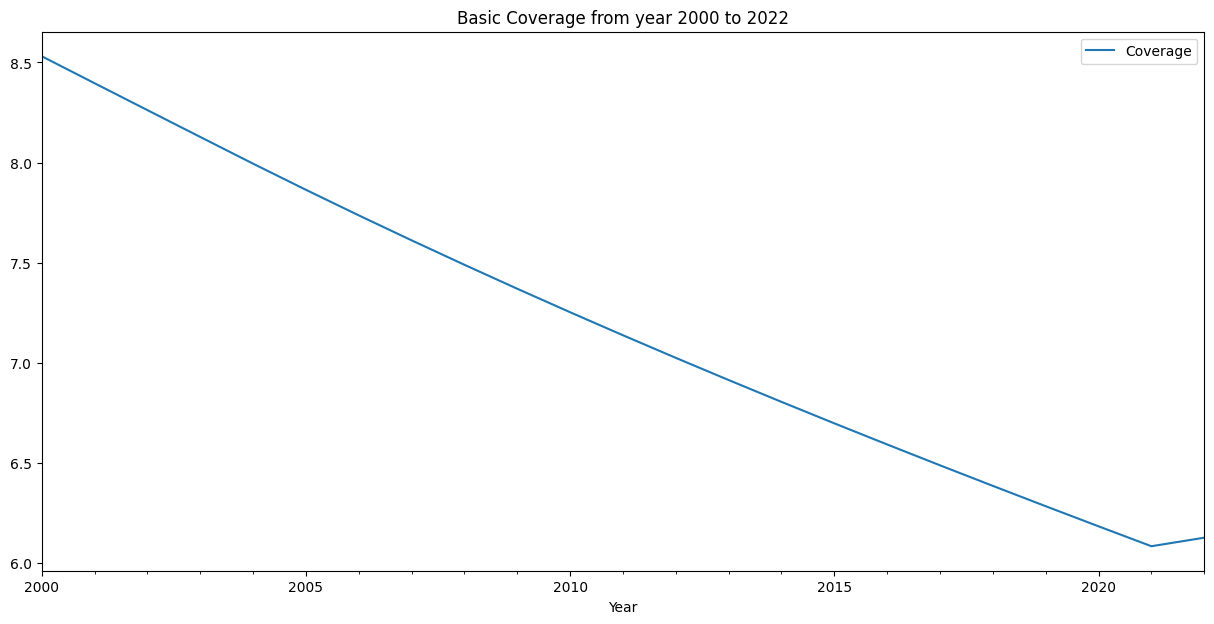

In [188]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 7
CAF_safely.plot()
plt.legend(loc='best')
plt.title('Basic Coverage from year 2000 to 2022')

#### 1) AUGMENTED DICKEY FULLER TEST (ADF)

In [189]:
#a function is created to determine ADF (Augmented Dickey Fuller (ADF) test) which determines if a time series is stationary or not
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
    print('Results of Augmented Dickey-Fuller Test:')
    CAF_safely_test= adfuller(dataset, autolag ='AIC')
    CAF_safely_output= pd.Series(CAF_safely_test[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'Number of observations Used'])
    for key, value in  CAF_safely_test[4].items():
        CAF_safely_output['Critical Value (%s)'%key ] = value
    print(CAF_safely_output)
        
adf_test(CAF_safely) 

Results of Augmented Dickey-Fuller Test:
Test Statistic                 -1.302725
p-value                         0.627925
#Lags Used                      6.000000
Number of observations Used    16.000000
Critical Value (1%)            -3.924019
Critical Value (5%)            -3.068498
Critical Value (10%)           -2.673893
dtype: float64


#### Test Statistics < Critical values. The p-value obtained is greater than the significance level of 0.05, and the Test Statistic is higher than any of the critical values, hence the time series is non stationary.

#### ii) KWIATKOWSKI-PHILLIPS-SCHMIDT-SHIN (KPSS) Test

In [190]:
from statsmodels.tsa.stattools import kpss

In [191]:
def kpss_test(dataset):
    print('Results of KPSS test')
    CAF_safely_test = kpss(dataset, regression='c', nlags='auto')
    CAF_safely_output=pd.Series(CAF_safely_test[0:3], index=['Test Statistic', 'p-value', '#lags Used'])
    for key, value in CAF_safely_test[3].items():
        CAF_safely_output['Critical Value (%s)'%key] = value
    print(CAF_safely_output)
    
kpss_test(CAF_safely['Coverage'])

Results of KPSS test
Test Statistic           0.682638
p-value                  0.015124
#lags Used               3.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


In [192]:
from statsmodels.tsa.stattools import kpss
def kpss_test(series, **kw):
    statistic, p_value, n_lags, critical_values =kpss(series, **kw)
    
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critical Values:')
    for key, value in critical_values.items():
        print(f' {key}: {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else""} stationary')
kpss_test(CAF_safely)

KPSS Statistic: 0.6826376605334105
p-value: 0.01512384904241723
num lags: 3
Critical Values:
 10%: 0.347
 5%: 0.463
 2.5%: 0.574
 1%: 0.739
Result: The series is not  stationary


#### Test statistic is greater than p-value, hence the series is non stationary

#### iii) ROLLING STATISTICS

In [193]:
#get rolling statistics
rolling_mean = CAF_safely['Coverage'].rolling(window=3).mean()
rolling_std = CAF_safely['Coverage'].rolling(window=3).std()

Text(0.5, 1.0, 'Rolling Mean & Standard Deviation')

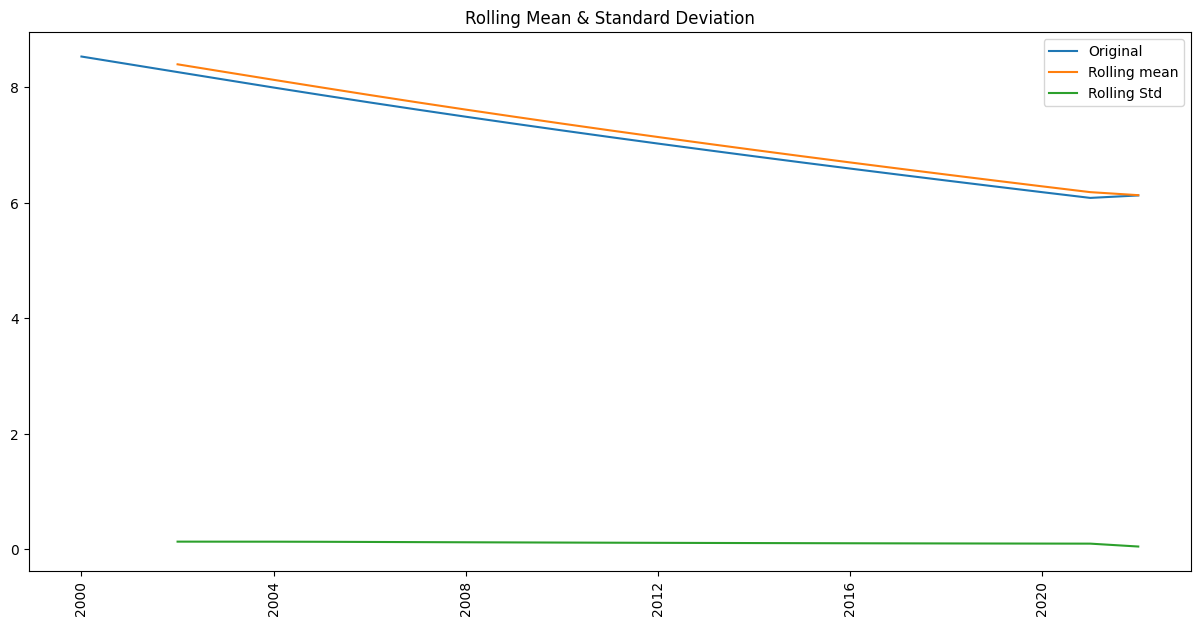

In [194]:
#plot rolling statistics
original_series = plt.plot(CAF_safely['Coverage'], label='Original')
mean = plt.plot(rolling_mean, label='Rolling mean')
std = plt.plot(rolling_std, label='Rolling Std')
plt.legend(loc='best')
plt.xticks(rotation=90)
plt.title('Rolling Mean & Standard Deviation')

#### The rolling standard deviation is constant but the rolling mean is not. This shows that the data is non stationary

### PARAMETER ANALYSIS FOR ARIMA -p, d, q

#### AUTOCORRELATION FACTOR (ACF), q

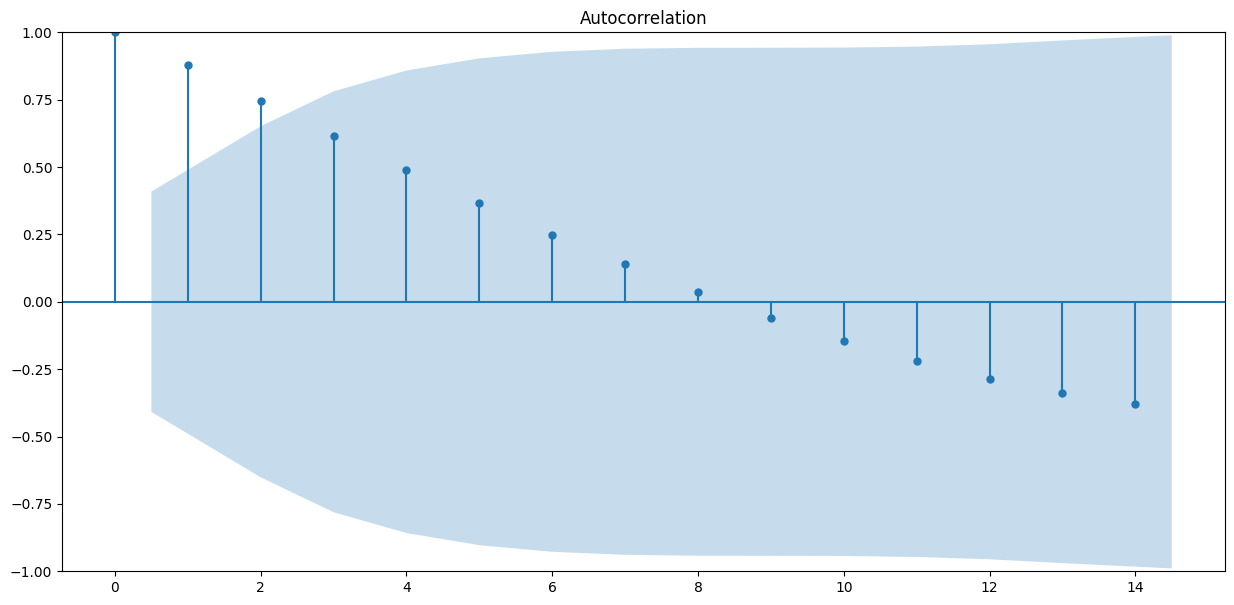

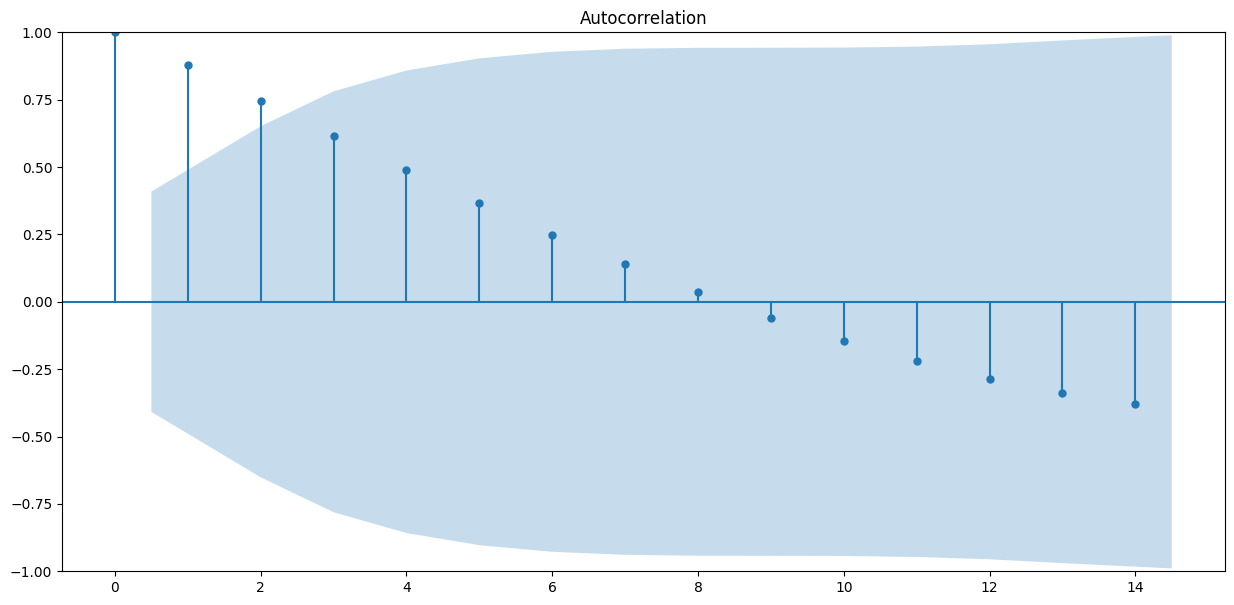

In [195]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(CAF_safely['Coverage'])

### q=2

### iii) PARTIAL AUTOCORRELATION FACTOR (PACF), p

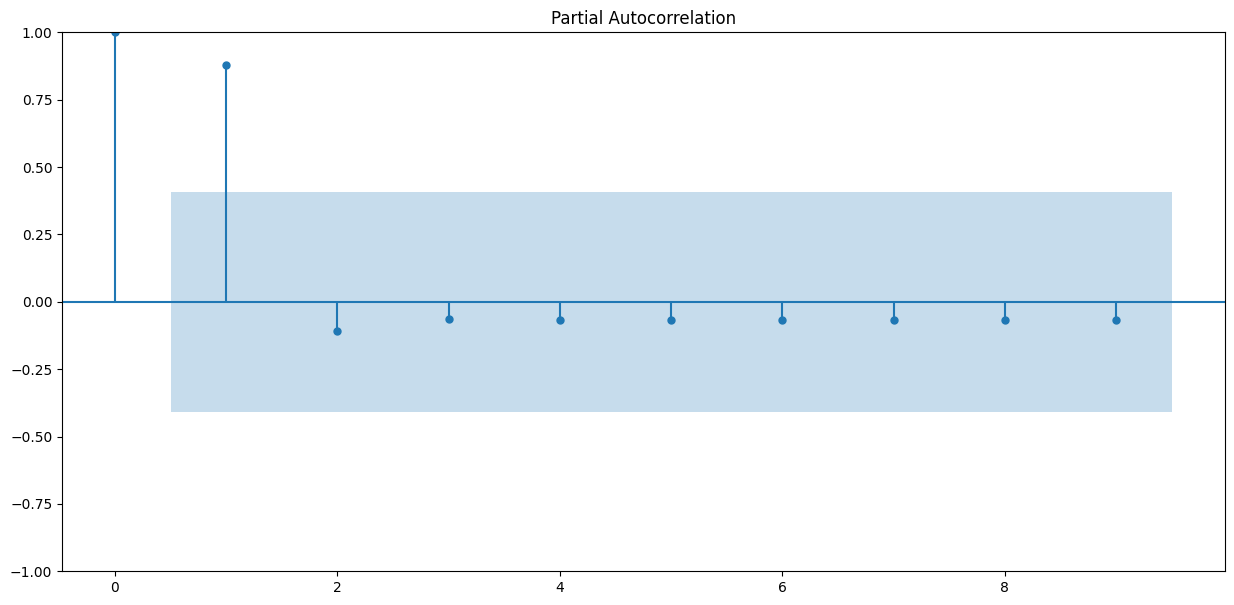

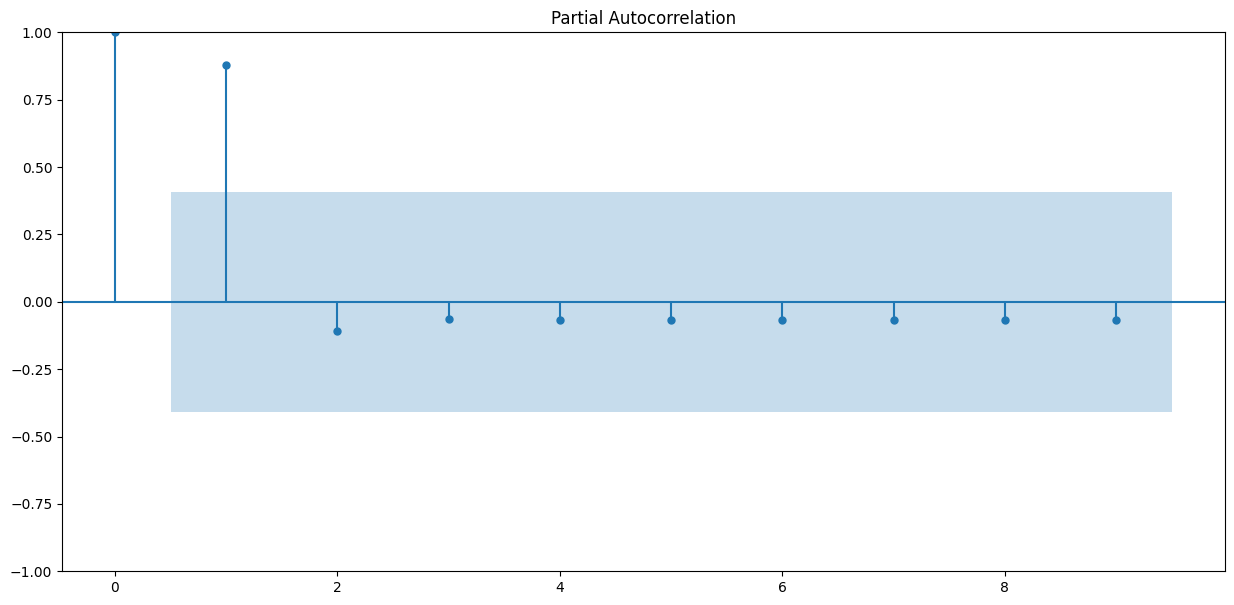

In [196]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(CAF_safely['Coverage'], lags=9)

### p=1

#### GRID SEARCH FOR OPTIMAL PARAMETERS

In [197]:
#Finding the best value for ARIMA
import itertools

#define the range of p,d,q parameters to take any value between 0 and 5
p=d=q=range(0,2)


#generate all possible combinations of p, d and q 
pdq = list(itertools.product(p,d,q))

#loop through all combinations of p, d, q and fit ARIMA model
warnings.filterwarnings("ignore") #to ignore warnings

for param in pdq:
    try:
        model_arima = ARIMA(CAF_safely, order=param, enforce_invertibility=False, enforce_stationarity=False)
        model_arima_fit = model_arima.fit()
        print(param, model_arima_fit.aic)
    except:
        continue
#The AIC is an estimator of in sample prediction error and thereby relative quality of statistical models for a given set of data

(0, 0, 0) 51.74907842831525
(0, 0, 1) 48.501032884772435
(0, 1, 0) -29.69140520049954
(0, 1, 1) -30.154417722876182
(1, 0, 0) -90.25483604961494
(1, 0, 1) -83.14983532592741
(1, 1, 0) -83.49387174339748
(1, 1, 1) -77.2081830773198


#### Parameters p, d, q = (1, 0, 0) with lowest AIC of -90.25483604961494 is selected

#### SPLIT DATA

In [198]:
CAF_train=CAF_safely['2000-01-01':'2020-01-01']
CAF_test=CAF_safely['2020-01-01':'2022-01-01']

In [199]:
model_arima = ARIMA(CAF_train, order=(1, 0, 0), enforce_invertibility=False) 
model_arima_fit = model_arima.fit()

print(model_arima_fit.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.3534      2.951      2.492      0.013       1.570      13.136
ar.L1          0.9946      0.248      4.010      0.000       0.508       1.481
sigma2         0.0139      0.287      0.048      0.961      -0.548       0.576


In [200]:
print(model_arima_fit.summary())

                               SARIMAX Results                                
Dep. Variable:               Coverage   No. Observations:                   21
Model:                 ARIMA(1, 0, 0)   Log Likelihood                  12.831
Date:                Fri, 15 Dec 2023   AIC                            -19.663
Time:                        21:36:50   BIC                            -16.529
Sample:                    01-01-2000   HQIC                           -18.983
                         - 01-01-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.3534      2.951      2.492      0.013       1.570      13.136
ar.L1          0.9946      0.248      4.010      0.000       0.508       1.481
sigma2         0.0139      0.287      0.048      0.9

#### TEST PREDICTION

In [201]:
#prediction of test data with ARIMA
prediction = model_arima_fit.predict(start=20, end=22)
CAF_prediction=pd.DataFrame(prediction)
CAF_prediction

predicted_mean
2020-01-01        6.289497
2021-01-01        6.189647
2022-01-01        6.195942

#### FORECAST OF YEAR 2030

In [202]:
#forecast of 2030 with ARIMA
forecast = model_arima_fit.get_forecast(steps=10)
forecast_conf = forecast.conf_int()

#put confidence intervals in df
CAF_forecast =pd.DataFrame(forecast_conf)
CAF_forecast

lower Coverage  upper Coverage
2021-01-01        5.958544        6.420750
2022-01-01        5.869995        6.521889
2023-01-01        5.804077        6.600328
2024-01-01        5.749951        6.666908
2025-01-01        5.703405        6.725840
2026-01-01        5.662273        6.779291
2027-01-01        5.625265        6.828553
2028-01-01        5.591536        6.874468
2029-01-01        5.560499        6.917625
2030-01-01        5.531725        6.958454

In [203]:
forecast.predicted_mean

2021-01-01    6.189647
2022-01-01    6.195942
2023-01-01    6.202203
2024-01-01    6.208429
2025-01-01    6.214623
2026-01-01    6.220782
2027-01-01    6.226909
2028-01-01    6.233002
2029-01-01    6.239062
2030-01-01    6.245089
Freq: AS-JAN, Name: predicted_mean, dtype: float64

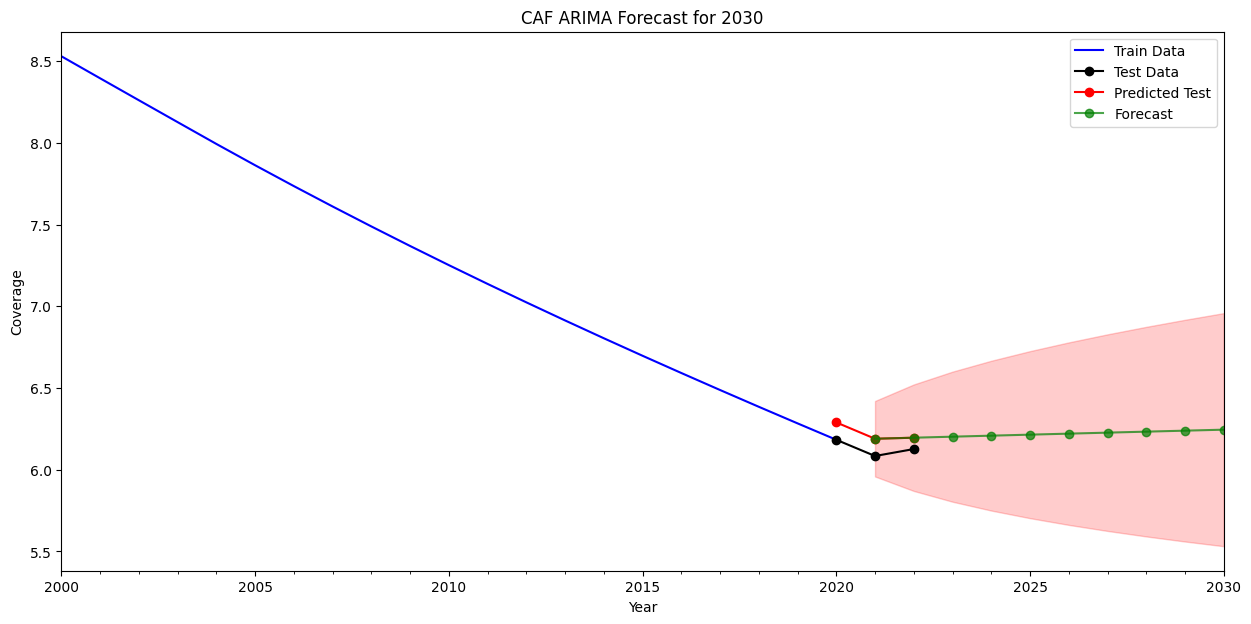

In [204]:
#plot observed values
ax = CAF_train['Coverage'].plot(label='Train Data', color='blue')
ax = CAF_test['Coverage'].plot(label='Test Data', marker='o', color='black')

#plot predicted test values
ax = CAF_prediction['predicted_mean'].plot(label='Predicted Test', marker='o', color= 'red')

#Plot forecasted values
forecast.predicted_mean.plot(ax=ax, marker='o', label='Forecast', color='green', alpha=0.7)

#plot the range for confidence intervals
ax.fill_between(forecast_conf.index,
                forecast_conf.iloc[:, 0],
                forecast_conf.iloc[:, 1], color='r', alpha=0.2)

#set axes labels
ax.set_xlabel('Year')
ax.set_ylabel('Coverage')
plt.title('CAF ARIMA Forecast for 2030')
plt.legend(loc='best')

plt.show()

#### EVALUATE MODEL

In [205]:
# Calculate evaluation metrics
mse = mean_squared_error(CAF_test, CAF_prediction)
rmse = np.sqrt(mse)
mae = mean_absolute_error(CAF_test, CAF_prediction)
me=np.mean(CAF_prediction['predicted_mean']- CAF_test['Coverage'])
mape = np.mean(np.abs(CAF_prediction['predicted_mean'] - CAF_test['Coverage']) / np.abs(CAF_test['Coverage']) * 100)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Error (ME): {me}")

Mean Squared Error (MSE): 0.009095563933134659
Root Mean Squared Error (RMSE): 0.09537066599921938
Mean Absolute Percentage Error (MAPE): 1.529914753208437
Mean Absolute Error (MAE): 0.09380840781977036
Mean Error (ME): 0.09380840781977036


#### MODEL DIAGNOSTICS

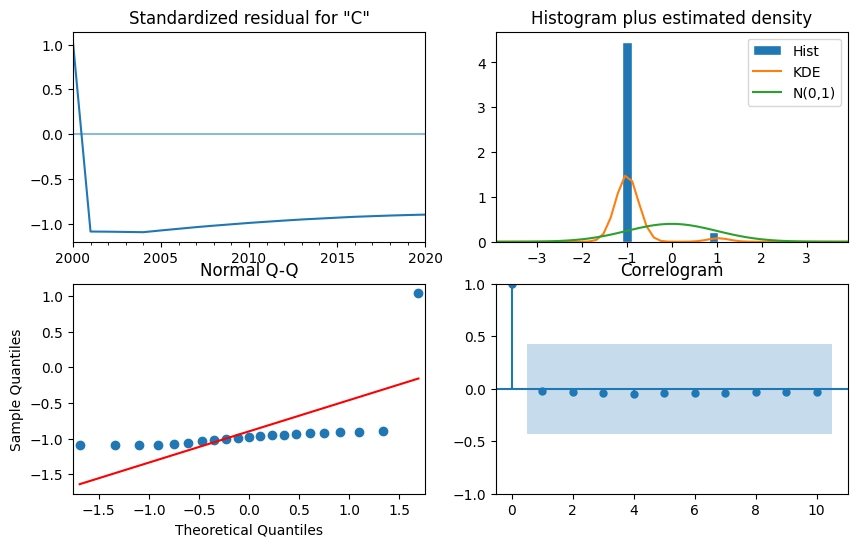

In [206]:
model_arima_fit.plot_diagnostics(figsize=(10,6))
plt.show()

### the correlogram has no spikes however thr histogram is not normally disributed, and the residual is not scattered around zero

## MODEL 2: AUTO ARIMA

#### SPLIT DATA

In [207]:
CAF_train=CAF_safely['2000-01-01':'2020-01-01']
CAF_test=CAF_safely['2020-01-01':'2022-01-01']

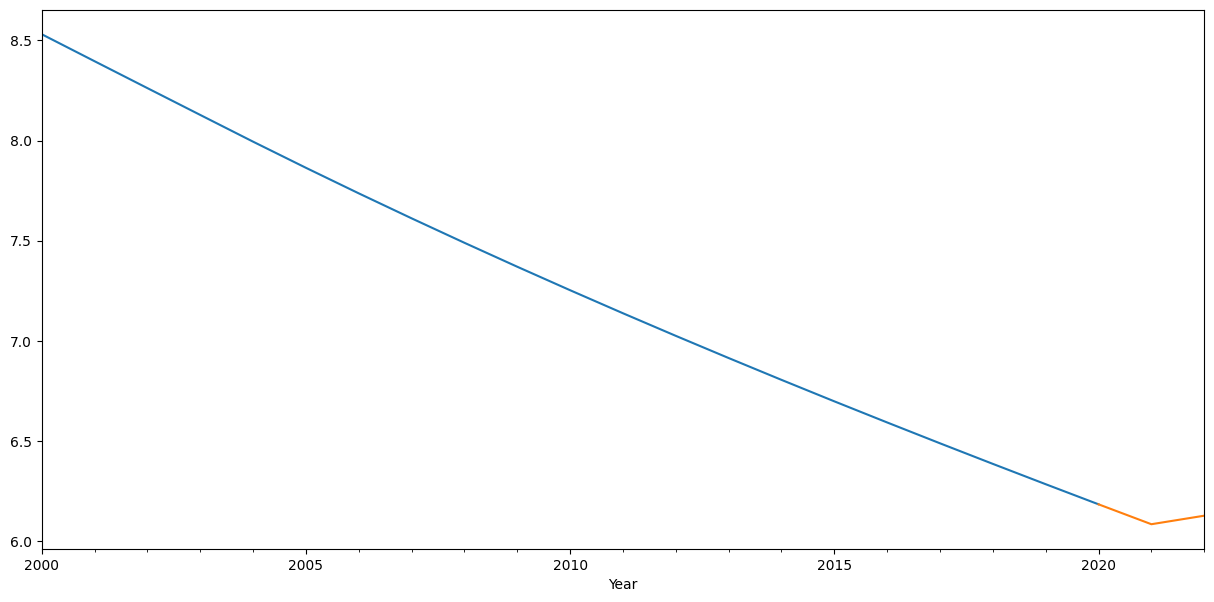

In [208]:
#plot train and test
CAF_train['Coverage'].plot()
CAF_test['Coverage'].plot()
plt.show()

#### FIT ARIMA INTO MODEL

In [209]:
#fit auto_arima into BFA dataset
CAF_model = pm.auto_arima(CAF_train,
                          m=1,
                          seasonal=False,
                          trace=True,
                          error_action='ignore',
                          stepwise=True,
                          suppress_warnings=True)  

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=-196.659, Time=0.53 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-212.739, Time=0.07 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-221.916, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-217.233, Time=0.12 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-180.528, Time=0.06 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=-219.917, Time=0.09 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-218.494, Time=0.14 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=-206.740, Time=0.27 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-220.635, Time=0.07 sec

Best model:  ARIMA(1,2,0)(0,0,0)[0] intercept
Total fit time: 1.395 seconds


In [210]:
CAF_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   21
Model:               SARIMAX(1, 2, 0)   Log Likelihood                 113.958
Date:                Fri, 15 Dec 2023   AIC                           -221.916
Time:                        21:36:53   BIC                           -219.082
Sample:                    01-01-2000   HQIC                          -221.436
                         - 01-01-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0006      0.000      1.251      0.211      -0.000       0.002
ar.L1          0.6426      0.322      1.997      0.046       0.012       1.273
sigma2      3.463e-07   1.27e-07      2.725      0.006    9.72e-08    5.95e-07
===================================================================================
Ljung-Box (L1) (Q):                   0.35   Jarque-Bera (JB):                44.80
Prob(Q):                              0.55   Prob(JB):                         0.00
Heteroskedasticity (H):               0.04   Skew:                             2.16
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [211]:
CAF_arima = sm.tsa.ARIMA(CAF_train, order=(1,2,0))

In [212]:
CAF_result = CAF_arima.fit()

#### According to the algorithm the best ARIMA model is ARIMA (0, 1, 0). The ARIMA (0, 1, 0) representing p=0, d=1, q=0 model is chosen as the best-fitting model based on its AIC (Akaike Information Criterion) value. There is no seasonality in the data as represented by [0,0,0][0].

#### RESIDUAL PLOTS

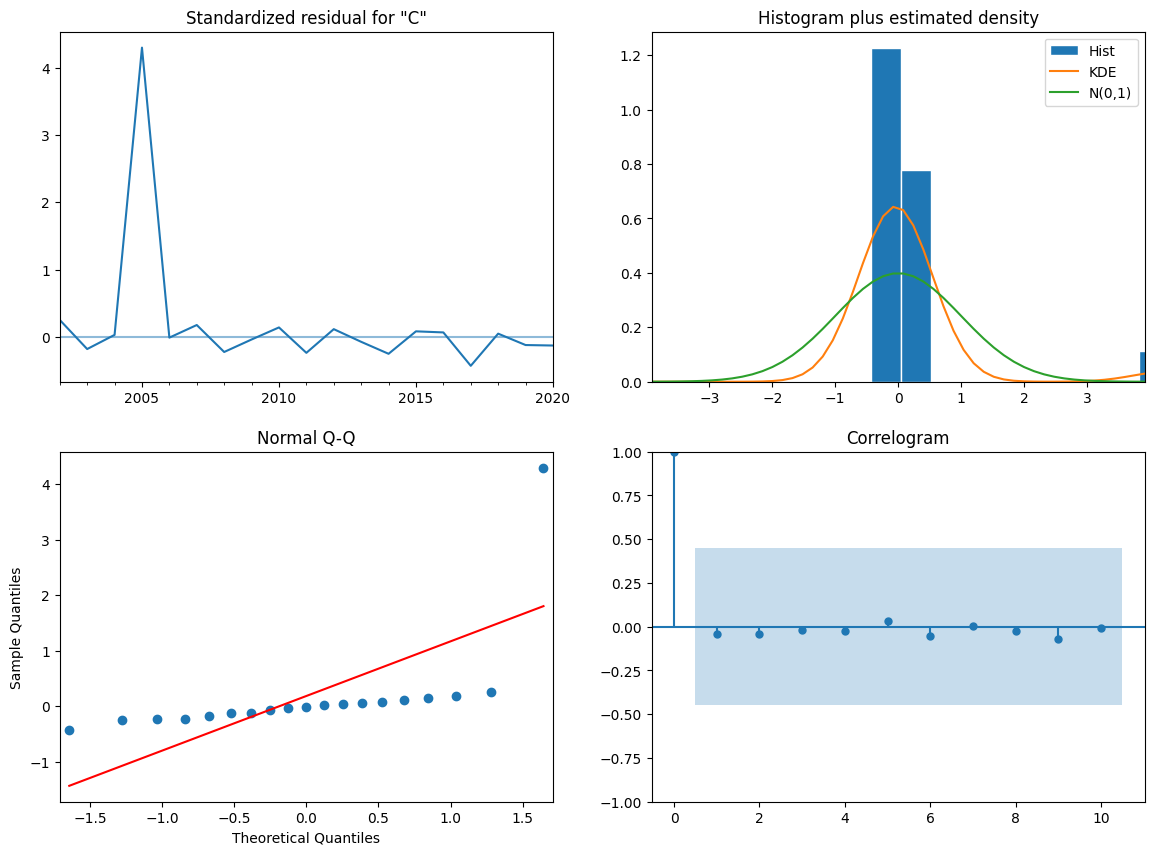

In [213]:
CAF_result.plot_diagnostics(figsize=(14,10))
plt.show()

### The residual is well scattered around zero and thers is no spike in the correlogram

#### TEST PREDICTION

In [214]:
CAF_result.predict(start=20, end=22)

2020-01-01    6.183396
2021-01-01    6.083981
2022-01-01    5.985654
Freq: AS-JAN, Name: predicted_mean, dtype: float64

In [215]:
forecast=CAF_result.predict(start=20, end=22)

In [216]:
CAF_forecast=pd.DataFrame(forecast)

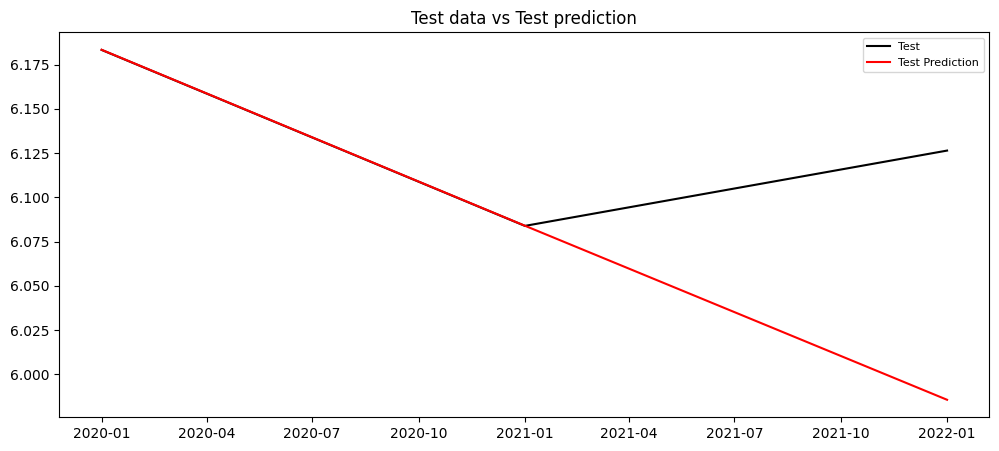

In [217]:
#plot Testing and Forecasted data
plt.figure(figsize=(12, 5), dpi=100)
#plt.plot(train, label='Train')
plt.plot(CAF_test, label='Test', color='black')
plt.plot(forecast, label='Test Prediction', color='red')
plt.title('Test data vs Test prediction')
plt.legend(loc='best', fontsize=8)
plt.show()

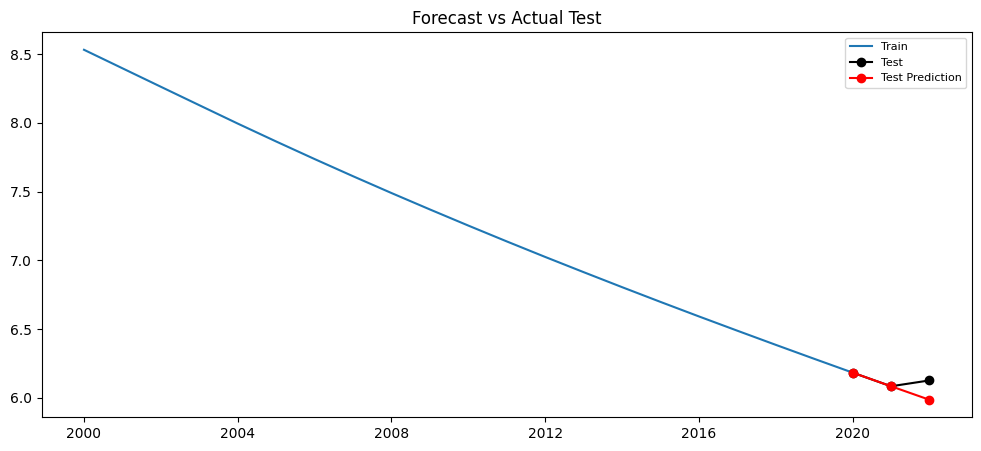

In [218]:
#plot the predictions for test set
plt.figure(figsize=(12, 5), dpi=100)

forecasted=CAF_result.predict(start=20, end=22)

plt.plot(CAF_train, label='Train')
plt.plot(CAF_test, marker='o', label='Test', color='black')
plt.plot(forecasted, marker='o', label='Test Prediction', color='red')
plt.title('Forecast vs Actual Test')
plt.legend(loc='best', fontsize=8)
plt.show()

#### EVALUATE MODEL

In [219]:
CAF_forecast

predicted_mean
2020-01-01        6.183396
2021-01-01        6.083981
2022-01-01        5.985654

In [220]:
# Calculate evaluation metrics
mse = mean_squared_error(CAF_test, CAF_forecast)
rmse = np.sqrt(mse)
mae = mean_absolute_error(CAF_test, CAF_forecast)
me=np.mean(CAF_forecast['predicted_mean']- CAF_test['Coverage'])
mape = np.mean(np.abs(CAF_forecast['predicted_mean']- CAF_test['Coverage']) / np.abs(CAF_test['Coverage']) * 100)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Error (ME): {me}")

Mean Squared Error (MSE): 0.006607323988500918
Root Mean Squared Error (RMSE): 0.0812854475813532
Mean Absolute Percentage Error (MAPE): 0.7669032536232637
Mean Absolute Error (MAE): 0.04698394948758929
Mean Error (ME): -0.046876369743095246


#### FORECAST FOR YEAR 2030

In [221]:
# Getting forecast for 8 years
forecast = CAF_result.get_forecast(steps=10, dynamic=False)
forecast_conf = forecast.conf_int()

In [222]:
forecast_conf

lower Coverage  upper Coverage
2021-01-01        6.082779        6.085184
2022-01-01        5.981901        5.989407
2023-01-01        5.880345        5.896243
2024-01-01        5.777868        5.805850
2025-01-01        5.674271        5.718347
2026-01-01        5.569386        5.633827
2027-01-01        5.463067        5.552360
2028-01-01        5.355191        5.474004
2029-01-01        5.245647        5.398798
2030-01-01        5.134343        5.326774

In [223]:
forecasted=CAF_result.predict(start=20, end=30)
CAF_forecasted=pd.DataFrame(forecasted)

In [224]:
CAF_forecasted

predicted_mean
2020-01-01        6.183396
2021-01-01        6.083981
2022-01-01        5.985654
2023-01-01        5.888294
2024-01-01        5.791859
2025-01-01        5.696309
2026-01-01        5.601606
2027-01-01        5.507714
2028-01-01        5.414597
2029-01-01        5.322223
2030-01-01        5.230559

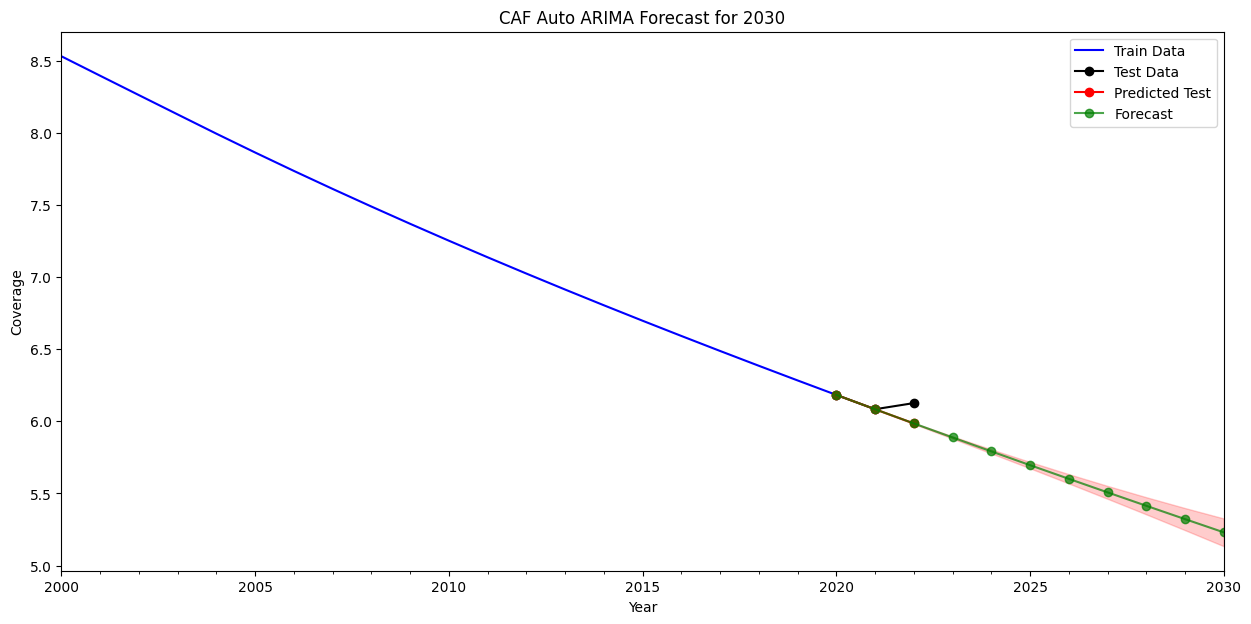

In [225]:
#plot observed values
ax = CAF_train['Coverage'].plot(label='Train Data', color='blue')
ax = CAF_test['Coverage'].plot(label='Test Data', marker='o', color='black')

#plot forecasted test values
ax = CAF_forecast['predicted_mean'].plot(label='Predicted Test', marker='o', color= 'red')

#Plot forecasted values
CAF_forecasted.predicted_mean.plot(ax=ax, marker='o', label='Forecast', color='green', alpha=0.7)

#plot the range for confidence intervals
ax.fill_between(forecast_conf.index,
                forecast_conf.iloc[:, 0],
                forecast_conf.iloc[:, 1], color='r', alpha=0.2)

#set axes labels
ax.set_xlabel('Year')
ax.set_ylabel('Coverage')
plt.title('CAF Auto ARIMA Forecast for 2030')
plt.legend(loc='best')

plt.show()

## MODEL 3: HOLT WINTER

In [226]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [227]:
CAFhwmodel = ExponentialSmoothing(CAF_train.Coverage, trend = 'add').fit()
CAFhwmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       ExponentialSmoothing Model Results                       
================================================================================
Dep. Variable:                 Coverage   No. Observations:                   21
Model:             ExponentialSmoothing   SSE                              0.000
Optimized:                         True   AIC                           -249.033
Trend:                         Additive   BIC                           -244.855
Seasonal:                          None   AICC                          -243.033
Seasonal Periods:                  None   Date:                 Fri, 15 Dec 2023
Box-Cox:                          False   Time:                         21:36:55
Box-Cox Coeff.:                    None                                         
==============================================================================
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.9248457                alpha                 True
smoothing_trend            0.9248457                 beta                 True
initial_level              8.6656193                  l.0                 True
initial_trend             -0.1347808                  b.0                 True
------------------------------------------------------------------------------
"""

#### TEST PREDICTION

In [228]:
test_pred = CAFhwmodel.predict(start=20, end=22)
test_pred=pd.DataFrame(test_pred)
test_pred

0
2020-01-01  6.182014
2021-01-01  6.082748
2022-01-01  5.982276

In [229]:
CAF_test['Coverage']

Year
2020-01-01    6.183318
2021-01-01    6.083898
2022-01-01    6.126445
Name: Coverage, dtype: float64

<Axes: xlabel='Year'>

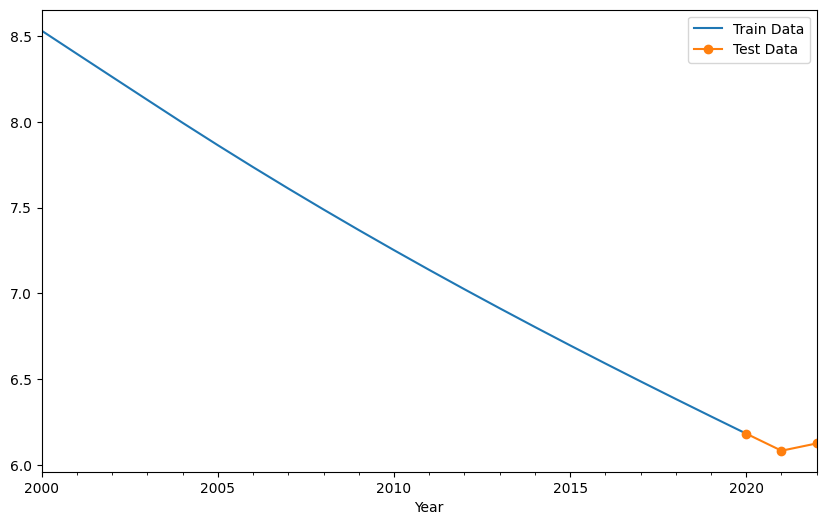

In [230]:
CAF_train['Coverage'].plot(legend=True, label='Train Data', figsize=(10,6))
CAF_test['Coverage'].plot(legend=True, marker = 'o', label='Test Data')

#test_pred.plot(legend=True, marker= 'o', label='Predicted Test')

#### MODEL EVALUATION

In [231]:
# Calculate evaluation metrics
mse = mean_squared_error(CAF_test, test_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(CAF_test, test_pred)
me=np.mean(test_pred[0]- CAF_test['Coverage'])
mape = np.mean(np.abs(test_pred[0] - CAF_test['Coverage']) / np.abs(CAF_test['Coverage']) * 100)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Error (ME): {me}")

Mean Squared Error (MSE): 0.006929193769671425
Root Mean Squared Error (RMSE): 0.08324177899151018
Mean Absolute Percentage Error (MAPE): 0.7977354954734497
Mean Absolute Error (MAE): 0.0488741415499776
Mean Error (ME): -0.0488741415499776


In [232]:
CAF_safely['Coverage'].mean(), np.sqrt(CAF_safely['Coverage'].var())

(7.189301675121226, 0.7736504262815092)

#### FORECAST FOR 2030

In [233]:
model = ExponentialSmoothing(CAF_safely, trend ='add').fit()

In [234]:
pred = CAFhwmodel.predict(start=22, end=30)
#pred = model.forecast(steps=8)
pred=pd.DataFrame(pred)
pred

0
2022-01-01  5.982276
2023-01-01  5.881804
2024-01-01  5.781332
2025-01-01  5.680860
2026-01-01  5.580388
2027-01-01  5.479916
2028-01-01  5.379444
2029-01-01  5.278972
2030-01-01  5.178500

#### PLOT ALL ON SAME PLOT

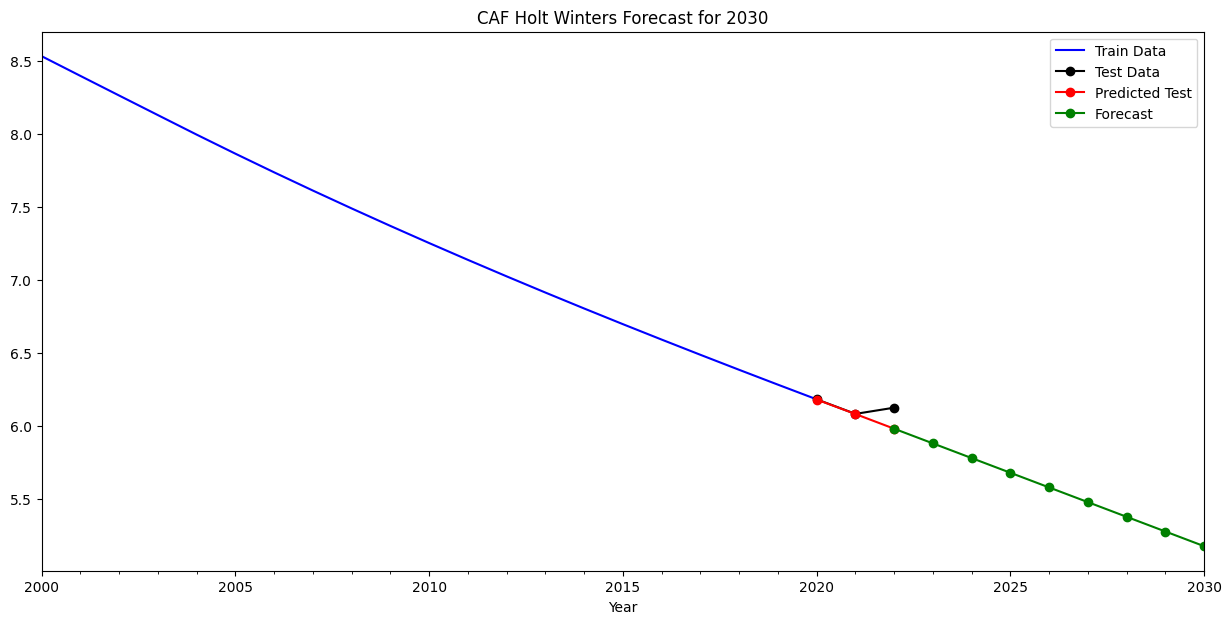

In [235]:
#plot observed values
ax = CAF_train['Coverage'].plot(label='Train Data', color='blue')
ax = CAF_test['Coverage'].plot(label='Test Data', marker='o', color='black')

#plot forecasted test values
ax = test_pred[0].plot(label='Predicted Test', marker='o', color= 'red')
ax = pred[0].plot(label='Forecast', marker='o', color= 'green')

#train, = plt.plot(BFA_train.index, BFA_train,'b.-', label='Train Data')
#test, = plt.plot(BFA_test.index, BFA_test, 'r.-', label= 'Test Data')
#test_pred, = plt.plot(test_pred.index, test_pred,  'g.-', label= 'Predicted Test')
#Plot forecasted values
#test_pred[0].plot(ax=ax, marker='o', label='Forecast', color='orange', alpha=0.7)

plt.legend()
plt.title('CAF Holt Winters Forecast for 2030')
plt.show()

# COUNTRY 3: DEMOCRATIC REPUBLIC OF CONGO (COD)

## MODEL 1: ARIMA 

#### ARIMA is an acronym for Autoregressive Integrated Moving Average. The model describes a given time series from the previous values of the time series (these are called lags). The previous values in the time series are called AR terms (Auto Regressive terms) and the forecasting errors are called MA terms (Moving Average terms).

Text(0.5, 1.0, 'Basic Coverage from year 2000 to 2022')

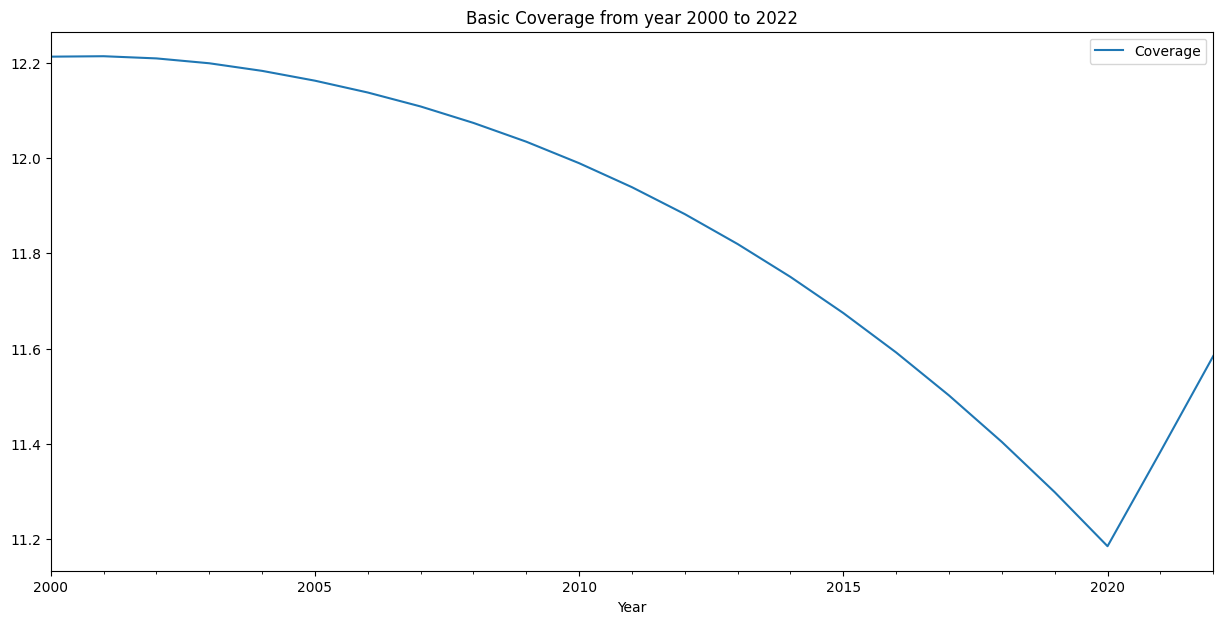

In [236]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 7
COD_safely.plot()
plt.legend(loc='best')
plt.title('Basic Coverage from year 2000 to 2022')

#### 1) AUGMENTED DICKEY FULLER TEST (ADF)

In [237]:
#a function is created to determine ADF (Augmented Dickey Fuller (ADF) test) which determines if a time series is stationary or not
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
    print('Results of Augmented Dickey-Fuller Test:')
    COD_safely_test= adfuller(dataset, autolag ='AIC')
    COD_safely_output= pd.Series(COD_safely_test[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'Number of observations Used'])
    for key, value in  COD_safely_test[4].items():
        COD_safely_output['Critical Value (%s)'%key ] = value
    print(COD_safely_output)
        
adf_test(COD_safely)  

Results of Augmented Dickey-Fuller Test:
Test Statistic                 -2.077133
p-value                         0.253808
#Lags Used                      2.000000
Number of observations Used    20.000000
Critical Value (1%)            -3.809209
Critical Value (5%)            -3.021645
Critical Value (10%)           -2.650713
dtype: float64


#### Test Statistics < Critical values. The p-value obtained is greater than the significance level of 0.05, and the Test Statistic is higher than any of the critical values, hence the time series is non stationary.

#### ii) KWIATKOWSKI-PHILLIPS-SCHMIDT-SHIN (KPSS) Test

In [238]:
from statsmodels.tsa.stattools import kpss

In [239]:
def kpss_test(dataset):
    print('Results of KPSS test')
    COD_safely_test = kpss(dataset, regression='c', nlags='auto')
    COD_safely_output=pd.Series(COD_safely_test[0:3], index=['Test Statistic', 'p-value', '#lags Used'])
    for key, value in COD_safely_test[3].items():
        COD_safely_output['Critical Value (%s)'%key] = value
    print(COD_safely_output)
    
kpss_test(COD_safely['Coverage'])

Results of KPSS test
Test Statistic           0.619653
p-value                  0.020850
#lags Used               3.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


In [240]:
from statsmodels.tsa.stattools import kpss
def kpss_test(series, **kw):
    statistic, p_value, n_lags, critical_values =kpss(series, **kw)
    
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critical Values:')
    for key, value in critical_values.items():
        print(f' {key}: {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else""} stationary')
kpss_test(COD_safely)

KPSS Statistic: 0.6196528827743468
p-value: 0.02084973792960483
num lags: 3
Critical Values:
 10%: 0.347
 5%: 0.463
 2.5%: 0.574
 1%: 0.739
Result: The series is not  stationary


#### iii) ROLLING STATISTICS

In [241]:
#get rolling statistics
rolling_mean = COD_safely['Coverage'].rolling(window=3).mean()
rolling_std = COD_safely['Coverage'].rolling(window=3).std()

Text(0.5, 1.0, 'Rolling Mean & Standard Deviation')

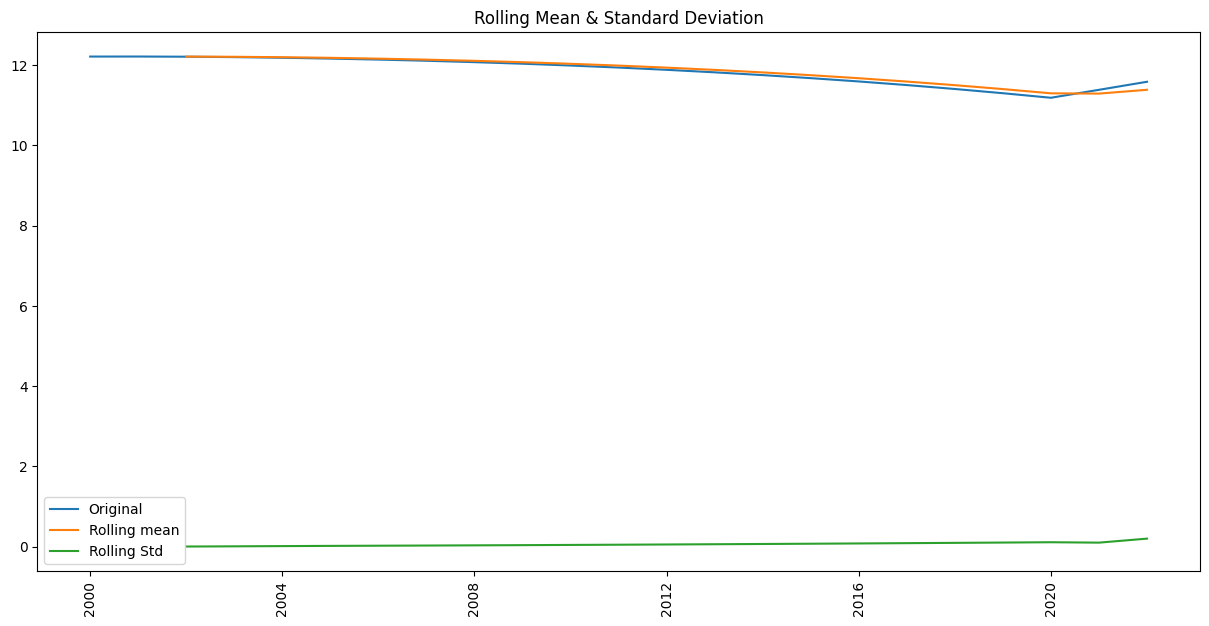

In [242]:
#plot rolling statistics
original_series = plt.plot(COD_safely['Coverage'], label='Original')
mean = plt.plot(rolling_mean, label='Rolling mean')
std = plt.plot(rolling_std, label='Rolling Std')
plt.legend(loc='best')
plt.xticks(rotation=90)
plt.title('Rolling Mean & Standard Deviation')

#### The rolling standard deviation is constant but the rolling mean is not. This shows that the data is non stationary

### PARAMETER ANALYSIS FOR ARIMA -p, d, q

#### AUTOCORRELATION FACTOR (ACF), q

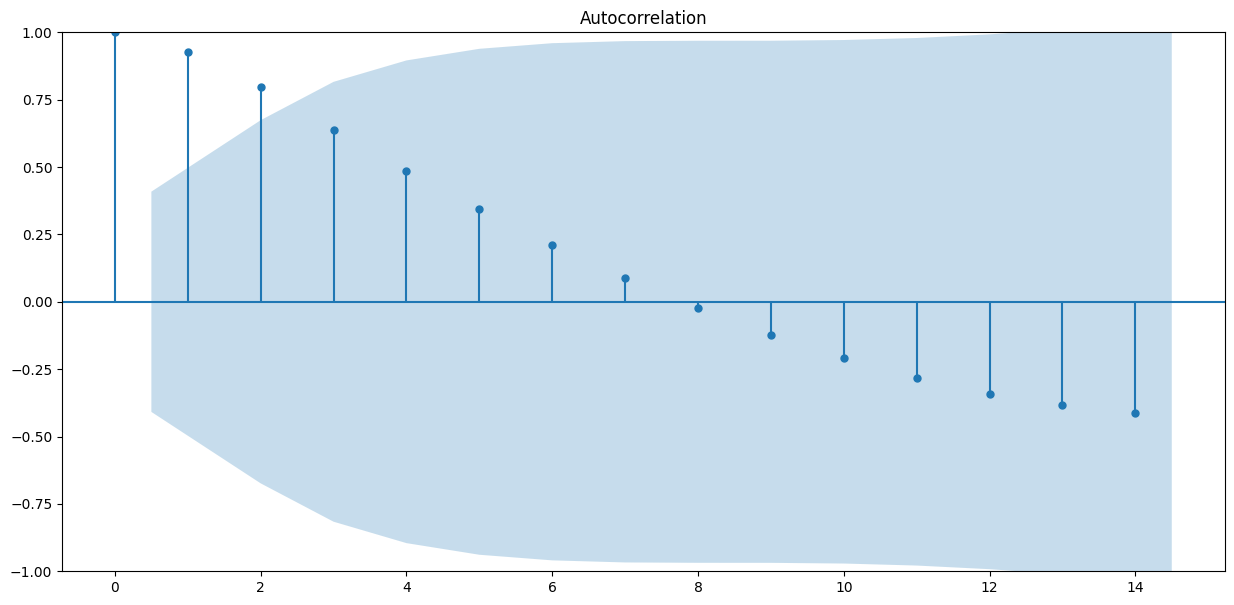

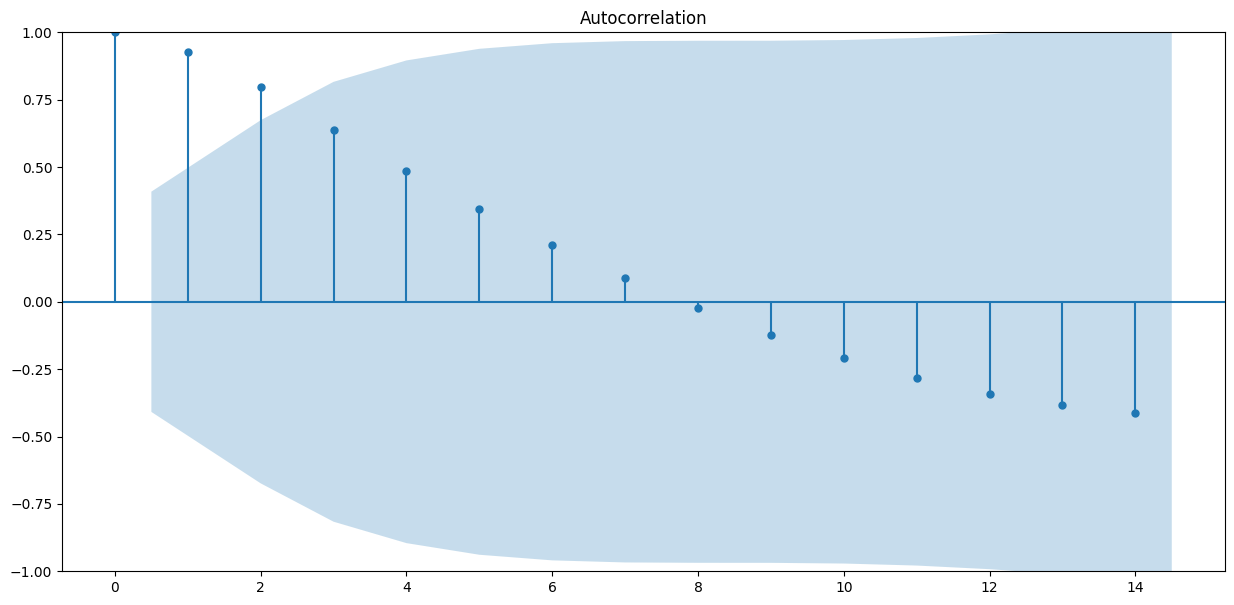

In [243]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(COD_safely['Coverage'])

### q=2

#### iii) PARTIAL AUTOCORRELATION FACTOR (PACF), p

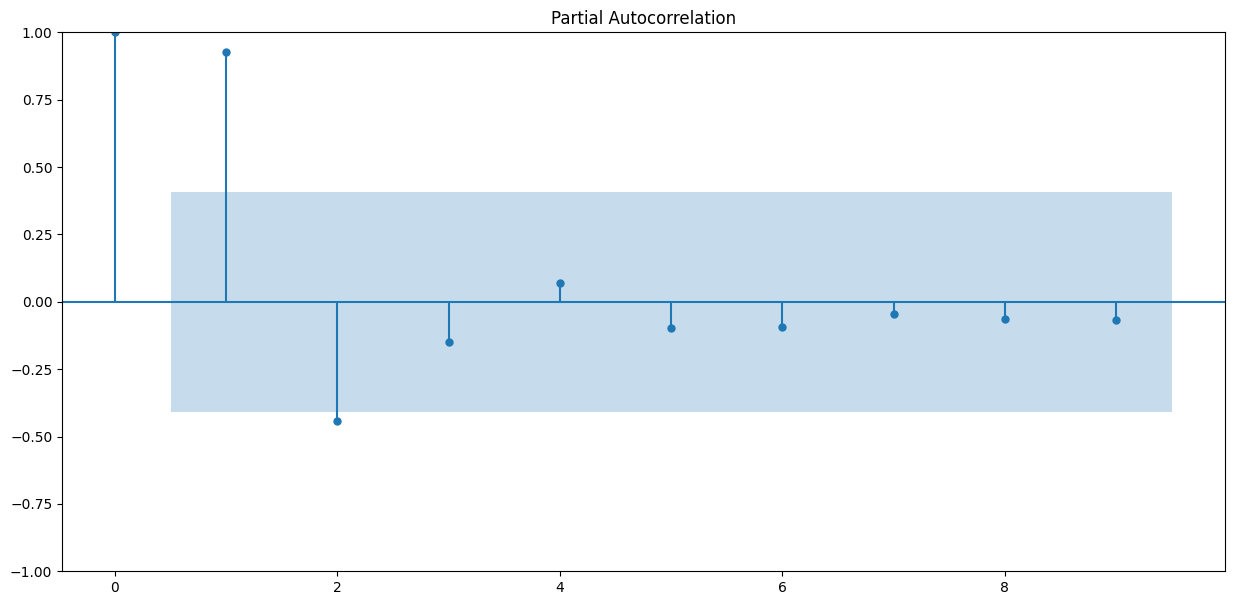

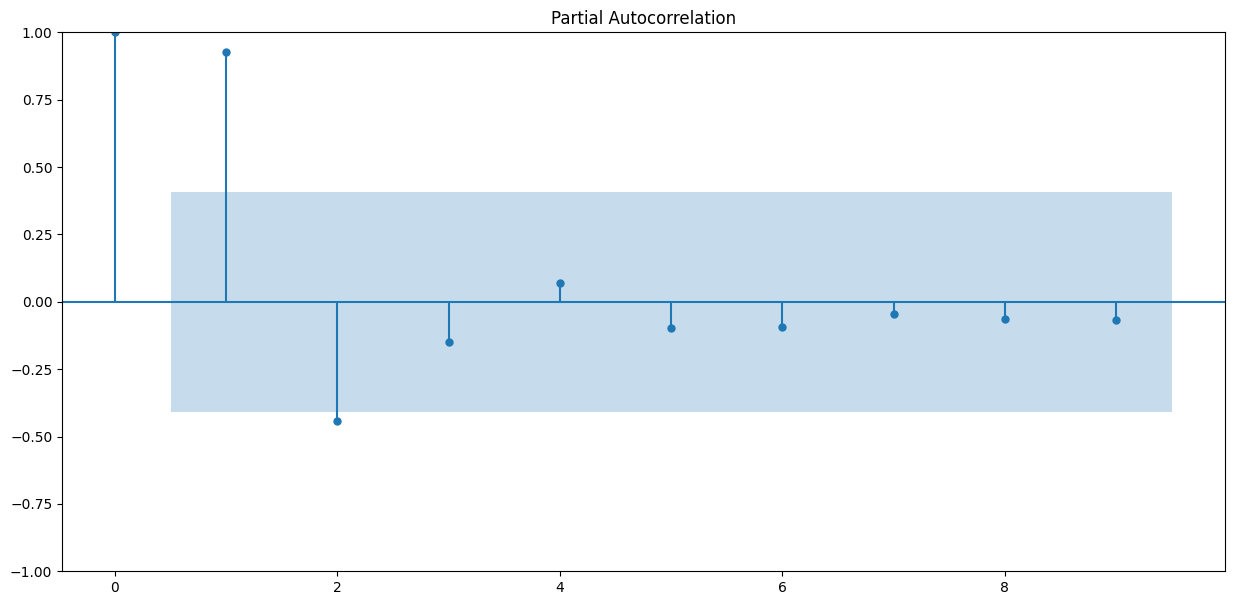

In [244]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(COD_safely['Coverage'], lags=9)

### p=1

#### GRID SEARCH FOR OPTIMAL PARAMETERS

In [245]:
#Finding the best value for ARIMA
import itertools

#define the range of p,d,q parameters to take any value between 0 and 5
p=d=q=range(0,2)


#generate all possible combinations of p, d and q 
pdq = list(itertools.product(p,d,q))

#loop through all combinations of p, d, q and fit ARIMA model
warnings.filterwarnings("ignore") #to ignore warnings

for param in pdq:
    try:
        model_arima = ARIMA(COD_safely, order=param, enforce_invertibility=False, enforce_stationarity=False)
        model_arima_fit = model_arima.fit()
        print(param, model_arima_fit.aic)
    except:
        continue
#The AIC is an estimator of in sample prediction error and thereby relative quality of statistical models for a given set of data

(0, 0, 0) 16.803547156748753
(0, 0, 1) -6.492351564138476
(0, 1, 0) -41.47954643560951
(0, 1, 1) -47.31399965308502
(1, 0, 0) -43.97383016563599
(1, 0, 1) -48.90552896378961
(1, 1, 0) -50.78583166169031
(1, 1, 1) -46.174391135521056


#### Parameters p, d, q =(1, 1, 0) with the lowest AIC of -50.78583166169031 is selected

#### SPLIT DATA

In [246]:
COD_train=COD_safely['2000-01-01':'2020-01-01']
COD_test=COD_safely['2020-01-01':'2022-01-01']

In [247]:
model_arima = ARIMA(COD_train, order=(1, 1, 0), enforce_invertibility=False) 
model_arima_fit = model_arima.fit()

print(model_arima_fit.summary())

                               SARIMAX Results                                
Dep. Variable:               Coverage   No. Observations:                   21
Model:                 ARIMA(1, 1, 0)   Log Likelihood                  70.573
Date:                Fri, 15 Dec 2023   AIC                           -137.146
Time:                        21:36:57   BIC                           -135.155
Sample:                    01-01-2000   HQIC                          -136.758
                         - 01-01-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9911      0.021     48.080      0.000       0.951       1.031
sigma2      4.121e-05   5.69e-05      0.725      0.469   -7.03e-05       0.000
Ljung-Box (L1) (Q):                   4.76   Jarque-

#### TEST PREDICTION

In [248]:
#prediction of test data with ARIMA
prediction = model_arima_fit.predict(start=20, end=22)
COD_prediction=pd.DataFrame(prediction)
COD_prediction

predicted_mean
2020-01-01       11.194661
2021-01-01       11.073296
2022-01-01       10.961929

#### FORECAST OF YEAR 2030

In [249]:
#forecast of 2030 with ARIMA
forecast = model_arima_fit.get_forecast(steps=10)
forecast_conf = forecast.conf_int()

#put confidence intervals in df
COD_forecast =pd.DataFrame(forecast_conf)
COD_forecast

lower Coverage  upper Coverage
2021-01-01       11.060714       11.085879
2022-01-01       10.933894       10.989964
2023-01-01       10.804804       10.898305
2024-01-01       10.673962       10.810369
2025-01-01       10.541714       10.725790
2026-01-01       10.408315       10.644298
2027-01-01       10.273956       10.565682
2028-01-01       10.138793       10.489770
2029-01-01       10.002951       10.416421
2030-01-01        9.866536       10.345510

In [250]:
forecast.predicted_mean

2021-01-01    11.073296
2022-01-01    10.961929
2023-01-01    10.851555
2024-01-01    10.742166
2025-01-01    10.633752
2026-01-01    10.526306
2027-01-01    10.419819
2028-01-01    10.314282
2029-01-01    10.209686
2030-01-01    10.106023
Freq: AS-JAN, Name: predicted_mean, dtype: float64

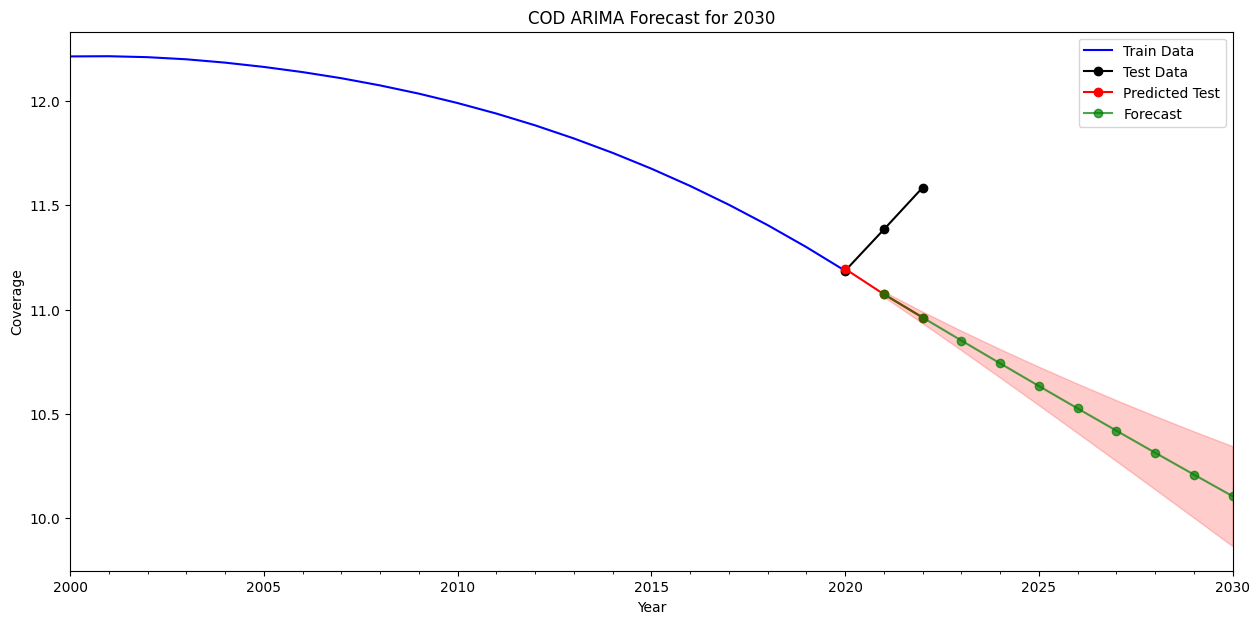

In [251]:
#plot observed values
ax = COD_train['Coverage'].plot(label='Train Data', color='blue')
ax = COD_test['Coverage'].plot(label='Test Data', marker='o', color='black')

#plot predicted test values
ax = COD_prediction['predicted_mean'].plot(label='Predicted Test', marker='o', color= 'red')

#Plot forecasted values
forecast.predicted_mean.plot(ax=ax, marker='o', label='Forecast', color='green', alpha=0.7)

#plot the range for confidence intervals
ax.fill_between(forecast_conf.index,
                forecast_conf.iloc[:, 0],
                forecast_conf.iloc[:, 1], color='r', alpha=0.2)

#set axes labels
ax.set_xlabel('Year')
ax.set_ylabel('Coverage')
plt.title('COD ARIMA Forecast for 2030')
plt.legend(loc='best')

plt.show()

#### EVALUATE MODEL

In [252]:
# Calculate evaluation metrics
mse = mean_squared_error(COD_test, COD_prediction)
rmse = np.sqrt(mse)
mae = mean_absolute_error(COD_test, COD_prediction)
me=np.mean(COD_prediction['predicted_mean']- COD_test['Coverage'])
mape = np.mean(np.abs(COD_prediction['predicted_mean'] - COD_test['Coverage']) / np.abs(COD_test['Coverage']) * 100)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Error (ME): {me}")

Mean Squared Error (MSE): 0.1612767715914856
Root Mean Squared Error (RMSE): 0.40159279325142977
Mean Absolute Percentage Error (MAPE): 2.7267015872618017
Mean Absolute Error (MAE): 0.313939842746714
Mean Error (ME): -0.3079430382207941


#### MODEL DIAGNOSTICS

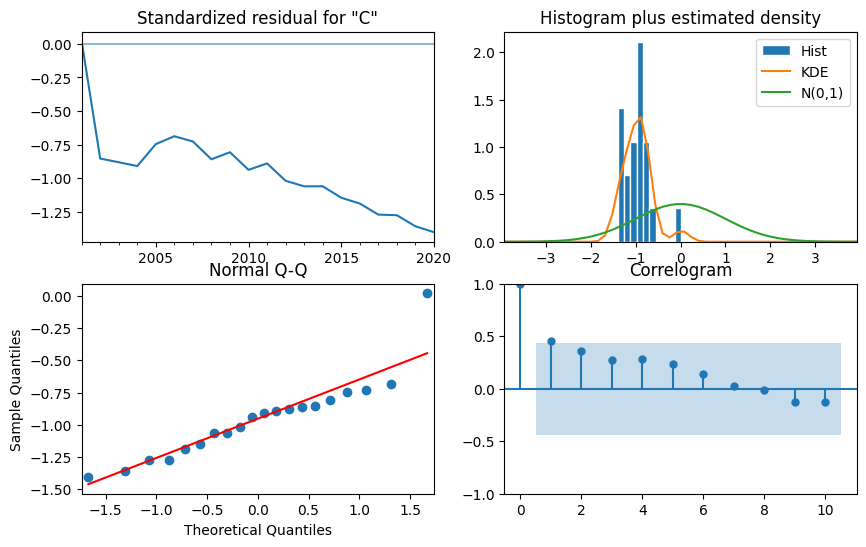

In [253]:
model_arima_fit.plot_diagnostics(figsize=(10,6))
plt.show()

## MODEL 2: AUTO ARIMA

#### Auto ARIMA uses the Akaike's Information Criterion (AIC), to identify the order of the best ARIMA model

#### SPLIT DATA

In [254]:
COD_train=COD_safely['2000-01-01':'2020-01-01']
COD_test=COD_safely['2020-01-01':'2022-01-01']

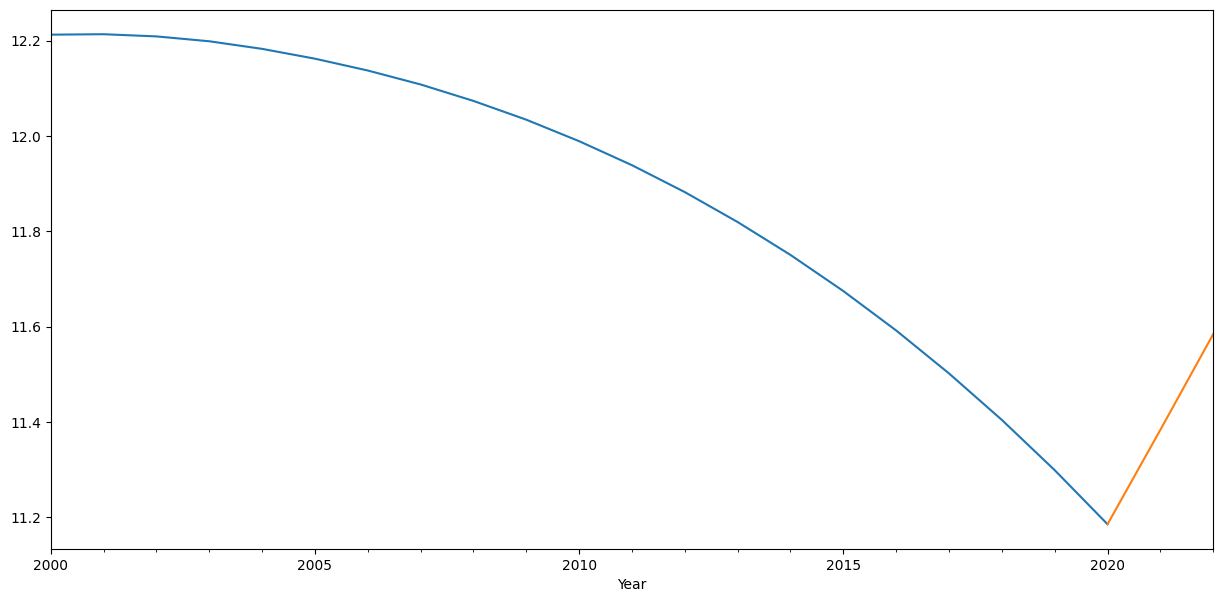

In [255]:
#plot train and test
COD_train['Coverage'].plot()
COD_test['Coverage'].plot()
plt.show()

#### FIT ARIMA INTO MODEL

In [256]:
#fit auto_arima into BFA dataset
COD_model = pm.auto_arima(COD_train,
                          m=1,
                          seasonal=False,
                          trace=True,
                          error_action='ignore',
                          stepwise=True,
                          suppress_warnings=True)  

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=-73.508, Time=0.13 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-200.596, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-198.597, Time=0.09 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-208.657, Time=0.09 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-137.754, Time=0.02 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-190.014, Time=0.12 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=-197.821, Time=0.09 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=-223.376, Time=0.22 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=-221.829, Time=0.32 sec
 ARIMA(0,2,3)(0,0,0)[0] intercept   : AIC=-218.624, Time=0.29 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=-207.292, Time=0.22 sec
 ARIMA(2,2,3)(0,0,0)[0] intercept   : AIC=-178.317, Time=0.29 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=-194.381, Time=0.24 sec

Best model:  ARIMA(1,2,2)(0,0,0)[0] intercept
Total fit time: 2.152 seconds


In [257]:
COD_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   21
Model:               SARIMAX(1, 2, 2)   Log Likelihood                 116.688
Date:                Fri, 15 Dec 2023   AIC                           -223.376
Time:                        21:37:01   BIC                           -218.654
Sample:                    01-01-2000   HQIC                          -222.577
                         - 01-01-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0002      0.000     -0.457      0.648      -0.001       0.001
ar.L1          0.9684      0.068     14.224      0.000       0.835       1.102
ma.L1          0.0002      0.338      0.000      1.000      -0.662       0.662
ma.L2          0.0002      0.315      0.000      1.000      -0.617       0.617
sigma2      2.398e-07      9e-08      2.666      0.008    6.35e-08    4.16e-07
===================================================================================
Ljung-Box (L1) (Q):                   0.35   Jarque-Bera (JB):                 1.51
Prob(Q):                              0.55   Prob(JB):                         0.47
Heteroskedasticity (H):               0.48   Skew:                             0.68
Prob(H) (two-sided):                  0.39   Kurtosis:                         3.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [258]:
COD_arima = sm.tsa.ARIMA(COD_train, order=(1,2,2))

In [259]:
COD_result = COD_arima.fit()

#### According to the algorithm the best ARIMA model is ARIMA (1, 2, 2). The ARIMA (1, 2, 2) representing p=1, d=2, q=2 model is chosen as the best-fitting model based on its AIC (Akaike Information Criterion) value. There is no seasonality in the data as represented by [0,0,0][0].

#### RESIDUAL PLOTS

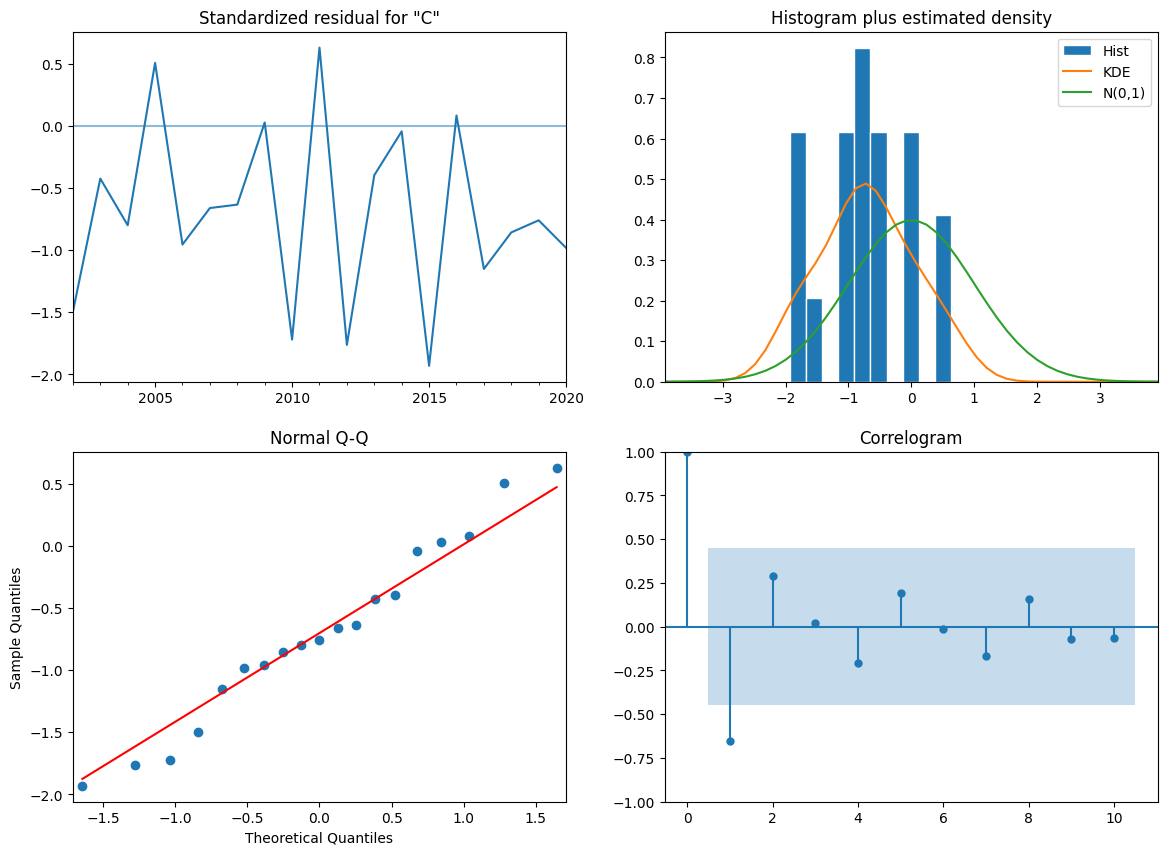

In [260]:
COD_result.plot_diagnostics(figsize=(14,10))
plt.show()

### some residuals are scattered around zero; the histogram seems normally distributed, the straight line captures most of teh data points, the model is good

#### TEST PREDICTION

In [261]:
COD_result.predict(start=20, end=22)

2020-01-01    11.186699
2021-01-01    11.064922
2022-01-01    10.938305
Freq: AS-JAN, Name: predicted_mean, dtype: float64

In [262]:
forecast=COD_result.predict(start=20, end=22)

In [263]:
COD_forecast=pd.DataFrame(forecast)
COD_forecast

predicted_mean
2020-01-01       11.186699
2021-01-01       11.064922
2022-01-01       10.938305

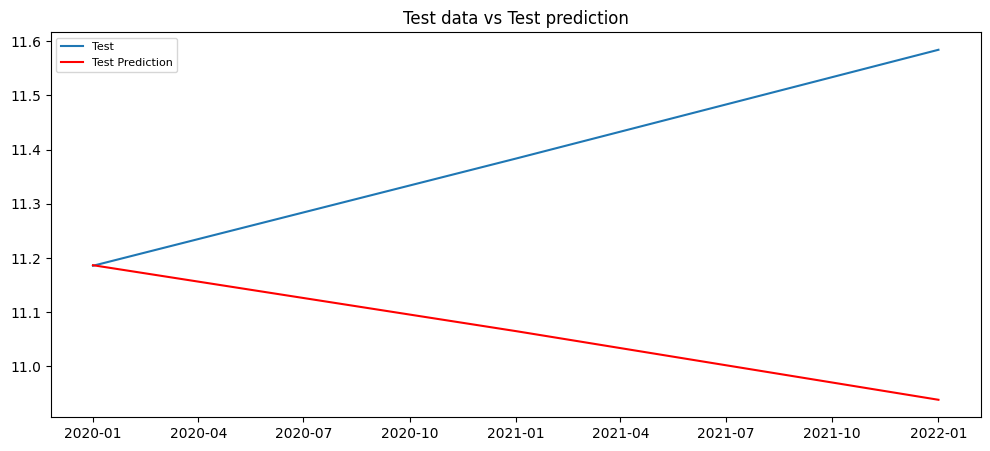

In [264]:
#plot Testing and Forecasted data
plt.figure(figsize=(12, 5), dpi=100)
#plt.plot(train, label='Train')
plt.plot(COD_test, label='Test')
plt.plot(COD_forecast, label='Test Prediction', color='red')
plt.title('Test data vs Test prediction')
plt.legend(loc='best', fontsize=8)
plt.show()

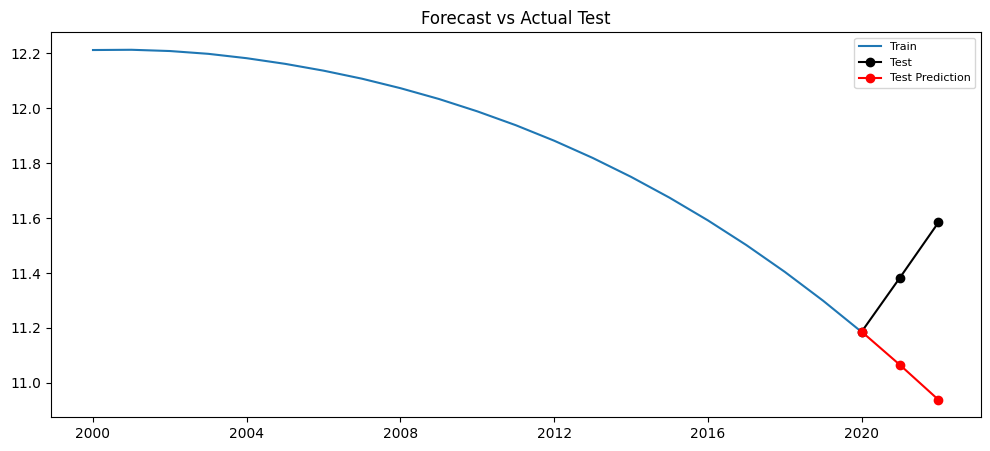

In [265]:
#plot the predictions for test set
plt.figure(figsize=(12, 5), dpi=100)

forecasted=COD_result.predict(start=20, end=22)

plt.plot(COD_train, label='Train')
plt.plot(COD_test, marker='o', label='Test', color='black')
plt.plot(COD_forecast, marker='o', label='Test Prediction', color='red')
plt.title('Forecast vs Actual Test')
plt.legend(loc='best', fontsize=8)
plt.show()

#### EVALUATE MODEL

In [266]:
COD_forecast

predicted_mean
2020-01-01       11.186699
2021-01-01       11.064922
2022-01-01       10.938305

In [267]:
# Calculate evaluation metrics
mse = mean_squared_error(COD_test, COD_forecast)
rmse = np.sqrt(mse)
mae = mean_absolute_error(COD_test, COD_forecast)
me=np.mean(COD_forecast['predicted_mean']- COD_test['Coverage'])
mape = np.mean(np.abs(COD_forecast['predicted_mean']- COD_test['Coverage']) / np.abs(COD_test['Coverage']) * 100)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Error (ME): {me}")

Mean Squared Error (MSE): 0.1729948754750333
Root Mean Squared Error (RMSE): 0.415926526534475
Mean Absolute Percentage Error (MAPE): 2.795470083871311
Mean Absolute Error (MAE): 0.3219516186643497
Mean Error (ME): -0.3212632317632984


#### FORECAST OF YEAR 2030

In [268]:
# Getting forecast for 8 years
forecast = COD_result.get_forecast(steps=10, dynamic=False)
forecast_conf = forecast.conf_int()

In [269]:
forecast_conf

lower Coverage  upper Coverage
2021-01-01       11.062859       11.066984
2022-01-01       10.930126       10.946484
2023-01-01       10.787923       10.827287
2024-01-01       10.637541       10.710587
2025-01-01       10.480100       10.596995
2026-01-01       10.316533       10.486781
2027-01-01       10.147602       10.380019
2028-01-01        9.973923       10.276676
2029-01-01        9.795997       10.176656
2030-01-01        9.614227       10.079835

In [270]:
forecasted=COD_result.predict(start=20, end=30)
COD_forecasted=pd.DataFrame(forecasted)

In [271]:
COD_forecasted

predicted_mean
2020-01-01       11.186699
2021-01-01       11.064922
2022-01-01       10.938305
2023-01-01       10.807605
2024-01-01       10.674064
2025-01-01       10.538548
2026-01-01       10.401657
2027-01-01       10.263811
2028-01-01       10.125300
2029-01-01        9.986326
2030-01-01        9.847031

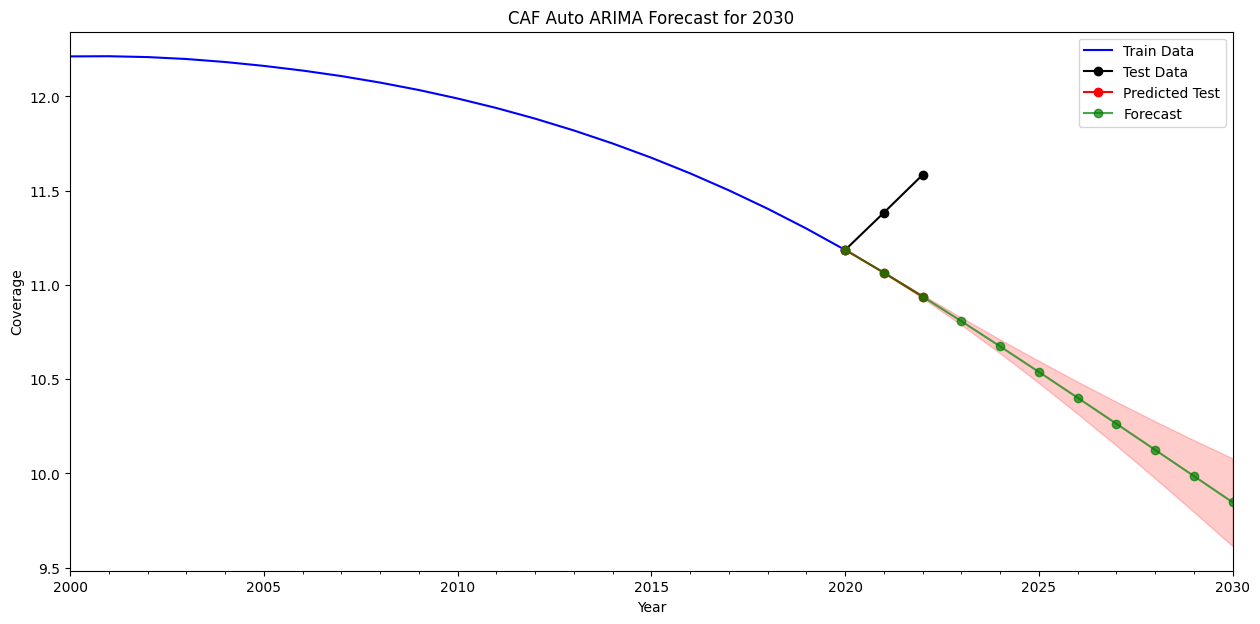

In [272]:
#plot observed values
ax = COD_train['Coverage'].plot(label='Train Data', color='blue')
ax = COD_test['Coverage'].plot(label='Test Data', marker='o', color='black')

#plot forecasted test values
ax = COD_forecast['predicted_mean'].plot(label='Predicted Test', marker='o', color= 'red')

#Plot forecasted values
COD_forecasted.predicted_mean.plot(ax=ax, marker='o', label='Forecast', color='green', alpha=0.7)

#plot the range for confidence intervals
ax.fill_between(forecast_conf.index,
                forecast_conf.iloc[:, 0],
                forecast_conf.iloc[:, 1], color='r', alpha=0.2)

#set axes labels
ax.set_xlabel('Year')
ax.set_ylabel('Coverage')
plt.title('CAF Auto ARIMA Forecast for 2030')
plt.legend(loc='best')

plt.show()

## MODEL 3: HOLT WINTER

In [273]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [274]:
CODhwmodel = ExponentialSmoothing(COD_train.Coverage, trend = 'add').fit()
CODhwmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       ExponentialSmoothing Model Results                       
================================================================================
Dep. Variable:                 Coverage   No. Observations:                   21
Model:             ExponentialSmoothing   SSE                              0.001
Optimized:                         True   AIC                           -208.151
Trend:                         Additive   BIC                           -203.973
Seasonal:                          None   AICC                          -202.151
Seasonal Periods:                  None   Date:                 Fri, 15 Dec 2023
Box-Cox:                          False   Time:                         21:37:03
Box-Cox Coeff.:                    None                                         
==============================================================================
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            1.0000000                alpha                 True
smoothing_trend            1.0000000                 beta                 True
initial_level              12.211943                  l.0                 True
initial_trend             3.8155e-05                  b.0                 True
------------------------------------------------------------------------------
"""

####  TEST PREDICTION

In [275]:
test_pred = CODhwmodel.predict(start=20, end=22)
test_pred=pd.DataFrame(test_pred)
test_pred

0
2020-01-01  11.193722
2021-01-01  11.072285
2022-01-01  10.958903

In [276]:
COD_test['Coverage']

Year
2020-01-01    11.185666
2021-01-01    11.383714
2022-01-01    11.584336
Name: Coverage, dtype: float64

<Axes: xlabel='Year'>

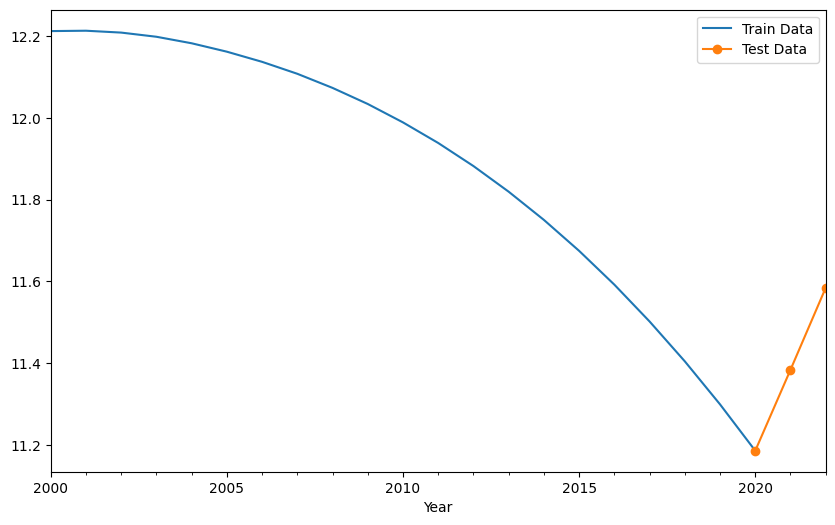

In [277]:
COD_train['Coverage'].plot(legend=True, label='Train Data', figsize=(10,6))
COD_test['Coverage'].plot(legend=True, marker = 'o', label='Test Data')

#test_pred.plot(legend=True, marker= 'o', label='Predicted Test')

#### MODEL EVALUATION

In [278]:
# Calculate evaluation metrics
mse = mean_squared_error(COD_test, test_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(COD_test, test_pred)
me=np.mean(test_pred[0]- COD_test['Coverage'])
mape = np.mean(np.abs(test_pred[0] - COD_test['Coverage']) / np.abs(COD_test['Coverage']) * 100)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Error (ME): {me}")

Mean Squared Error (MSE): 0.16273961331464062
Root Mean Squared Error (RMSE): 0.403409981674525
Mean Absolute Percentage Error (MAPE): 2.7355694422595533
Mean Absolute Error (MAE): 0.3149723462462261
Mean Error (ME): -0.30960199937586985


In [279]:
COD_safely['Coverage'].mean(), np.sqrt(COD_safely['Coverage'].var())

(11.849325446258641, 0.33322851345408816)

#### FORECAST FOR 2030

In [280]:
model = ExponentialSmoothing(COD_safely.Coverage, trend ='add').fit()

In [281]:
#pred = model.forecast(steps=8)
#pred=pd.DataFrame(pred)
#pred
pred = CODhwmodel.predict(start=22, end=30)
pred=pd.DataFrame(pred)
pred

0
2022-01-01  10.958903
2023-01-01  10.845522
2024-01-01  10.732140
2025-01-01  10.618758
2026-01-01  10.505377
2027-01-01  10.391995
2028-01-01  10.278614
2029-01-01  10.165232
2030-01-01  10.051850

#### PLOT ALL ON SAME PLOT

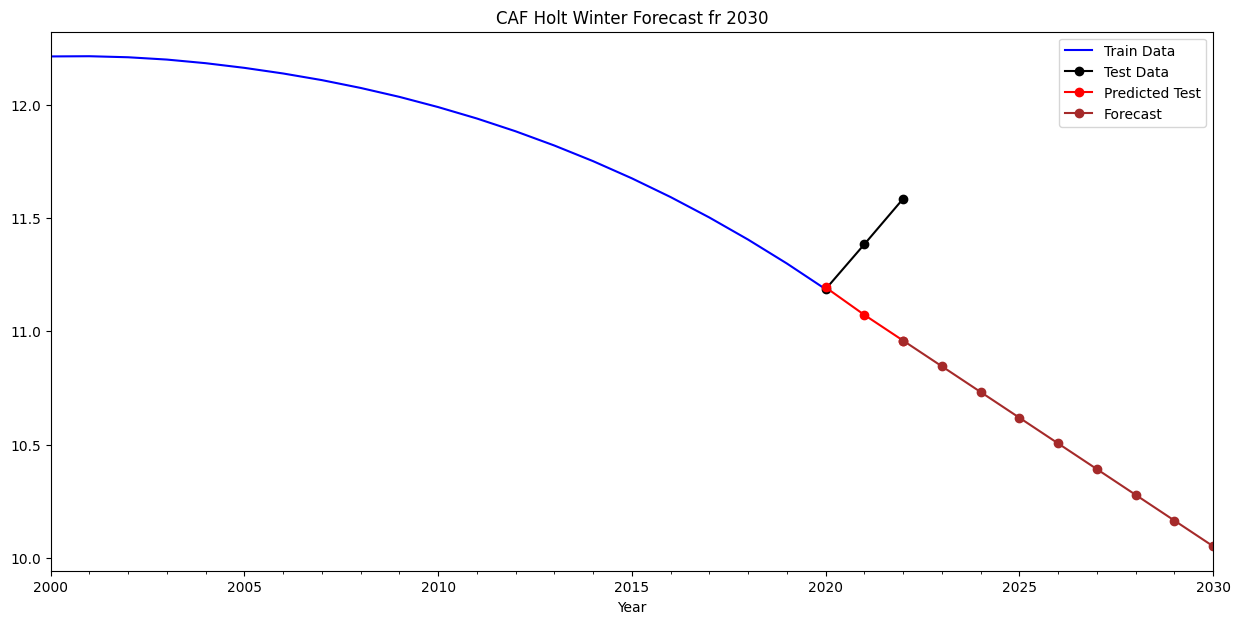

In [282]:
#plot observed values
ax = COD_train['Coverage'].plot(label='Train Data', color='blue')
ax = COD_test['Coverage'].plot(label='Test Data', marker='o', color='black')

#plot forecasted test values
ax = test_pred[0].plot(label='Predicted Test', marker='o', color= 'red')
ax = pred[0].plot(label='Forecast', marker='o', color= 'brown')

#train, = plt.plot(BFA_train.index, BFA_train,'b.-', label='Train Data')
#test, = plt.plot(BFA_test.index, BFA_test, 'r.-', label= 'Test Data')
#test_pred, = plt.plot(test_pred.index, test_pred,  'g.-', label= 'Predicted Test')
#Plot forecasted values
#test_pred[0].plot(ax=ax, marker='o', label='Forecast', color='orange', alpha=0.7)

plt.legend()
plt.title('CAF Holt Winter Forecast fr 2030')
plt.show()

# SLOW PROGRESS COUNTRIES

# COUNTRY 1: UGANDA (UGA)

## MODEL 1: ARIMA 

Text(0.5, 1.0, 'Basic Coverage from year 2000 to 2022')

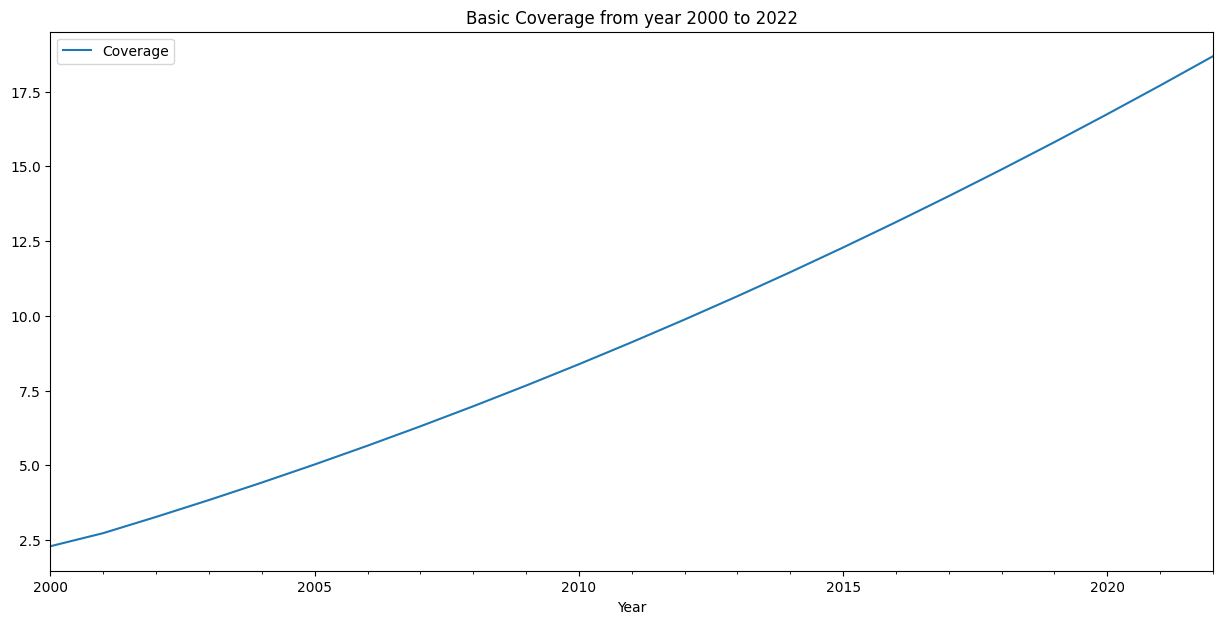

In [283]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 7
UGA_safely.plot()
plt.legend(loc='best')
plt.title('Basic Coverage from year 2000 to 2022')

#### 1) AUGMENTED DICKEY FULLER TEST (ADF)

In [284]:
#a function is created to determine ADF (Augmented Dickey Fuller (ADF) test) which determines if a time series is stationary or not
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
    print('Results of Augmented Dickey-Fuller Test:')
    UGA_safely_test= adfuller(dataset, autolag ='AIC')
    UGA_safely_output= pd.Series(UGA_safely_test[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'Number of observations Used'])
    for key, value in  UGA_safely_test[4].items():
        UGA_safely_output['Critical Value (%s)'%key ] = value
    print(UGA_safely_output)
        
adf_test(UGA_safely)  

Results of Augmented Dickey-Fuller Test:
Test Statistic                 -2.494660
p-value                         0.116779
#Lags Used                      9.000000
Number of observations Used    13.000000
Critical Value (1%)            -4.068854
Critical Value (5%)            -3.127149
Critical Value (10%)           -2.701730
dtype: float64


#### Test Statistics < Critical values. The p-value obtained is greater than the significance level of 0.05, and the Test Statistic is higher than any of the critical values, hence the time series is non stationary.

#### ii) KWIATKOWSKI-PHILLIPS-SCHMIDT-SHIN (KPSS) Test

In [285]:
from statsmodels.tsa.stattools import kpss

In [286]:
def kpss_test(dataset):
    print('Results of KPSS test')
    UGA_safely_test = kpss(dataset, regression='c', nlags='auto')
    UGA_safely_output=pd.Series(UGA_safely_test[0:3], index=['Test Statistic', 'p-value', '#lags Used'])
    for key, value in UGA_safely_test[3].items():
        UGA_safely_output['Critical Value (%s)'%key] = value
    print(UGA_safely_output)
    
kpss_test(UGA_safely['Coverage'])

Results of KPSS test
Test Statistic           0.684078
p-value                  0.014993
#lags Used               3.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


In [287]:
from statsmodels.tsa.stattools import kpss
def kpss_test(series, **kw):
    statistic, p_value, n_lags, critical_values =kpss(series, **kw)
    
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critical Values:')
    for key, value in critical_values.items():
        print(f' {key}: {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else""} stationary')
kpss_test(UGA_safely)

KPSS Statistic: 0.6840776499277306
p-value: 0.014992940915660856
num lags: 3
Critical Values:
 10%: 0.347
 5%: 0.463
 2.5%: 0.574
 1%: 0.739
Result: The series is not  stationary


#### iii) ROLLING STATISTICS

In [288]:
#get rolling statistics
rolling_mean = UGA_safely['Coverage'].rolling(window=3).mean()
rolling_std = UGA_safely['Coverage'].rolling(window=3).std()

Text(0.5, 1.0, 'Rolling Mean & Standard Deviation')

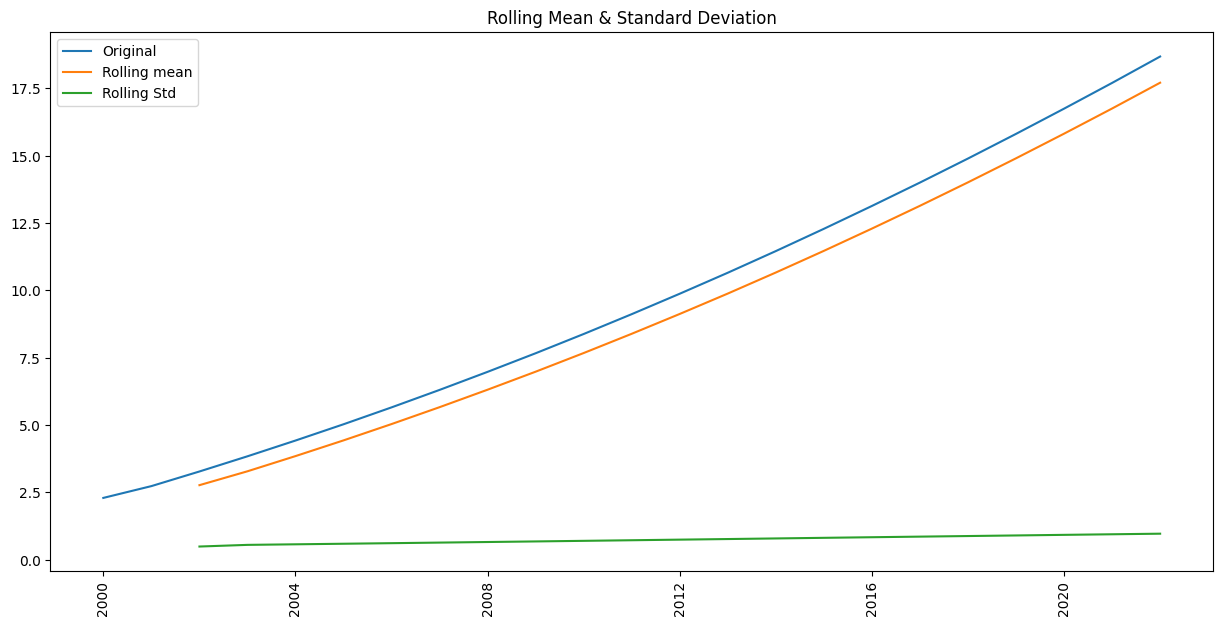

In [289]:
#plot rolling statistics
original_series = plt.plot(UGA_safely['Coverage'], label='Original')
mean = plt.plot(rolling_mean, label='Rolling mean')
std = plt.plot(rolling_std, label='Rolling Std')
plt.legend(loc='best')
plt.xticks(rotation=90)
plt.title('Rolling Mean & Standard Deviation')

#### The rolling standard deviation is constant but the rolling mean is not. This shows that the data is non stationary

### PARAMETER ANALYSIS FOR ARIMA -p, d, q

#### AUTOCORRELATION FACTOR (ACF), q

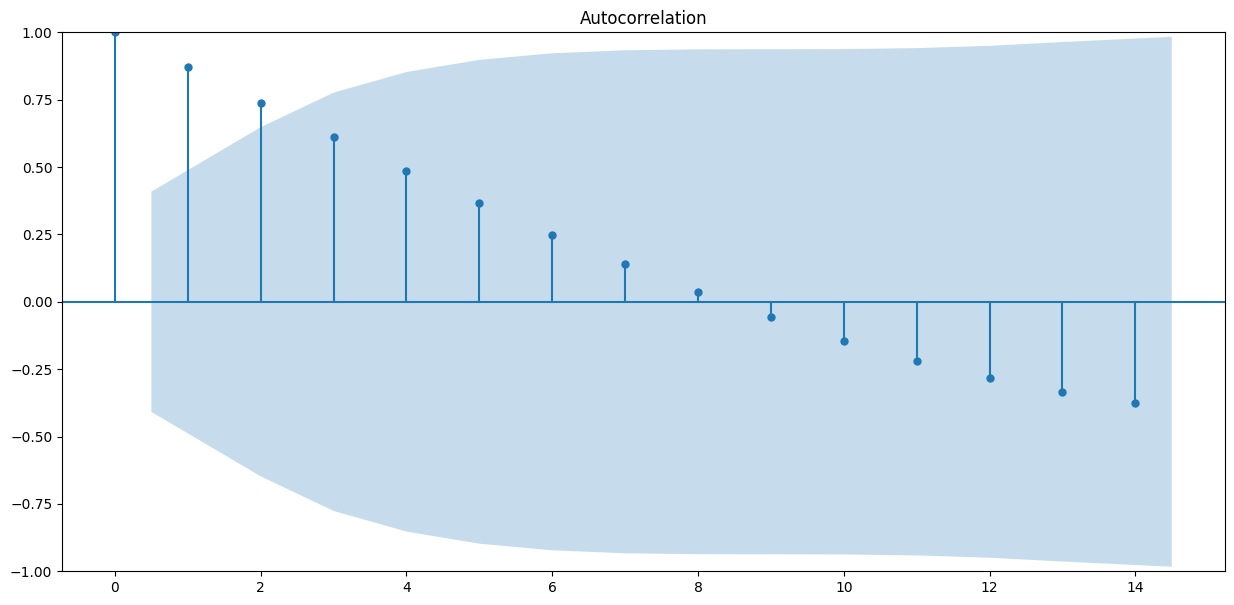

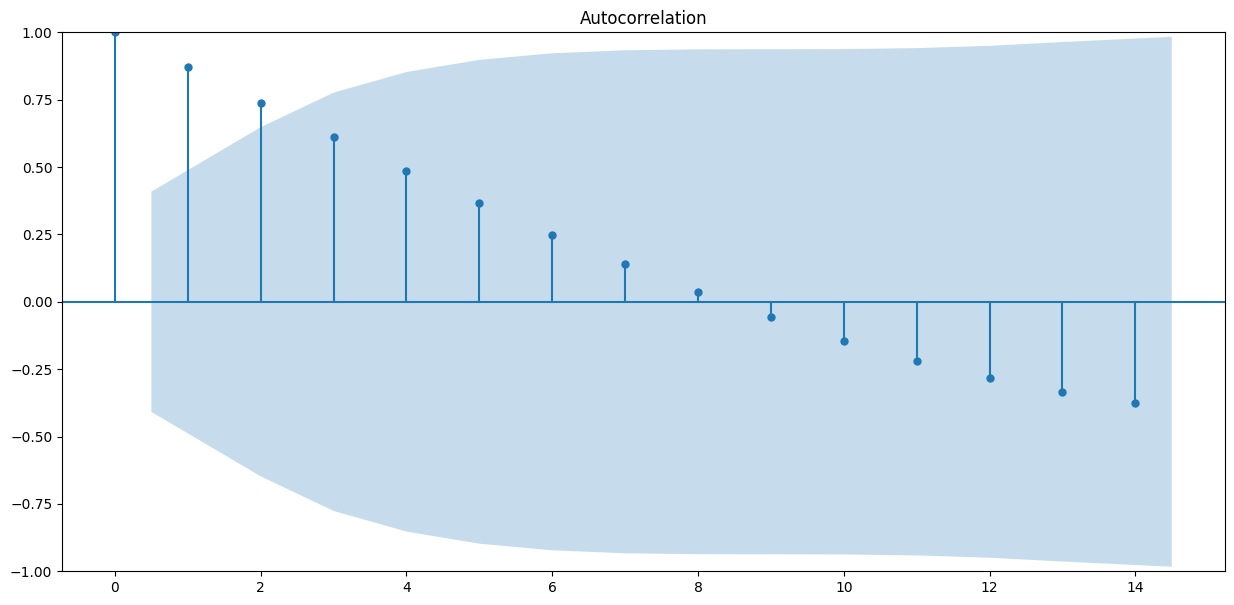

In [290]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(UGA_safely['Coverage'])

### q=2

#### iii) PARTIAL AUTOCORRELATION FACTOR (PACF), p

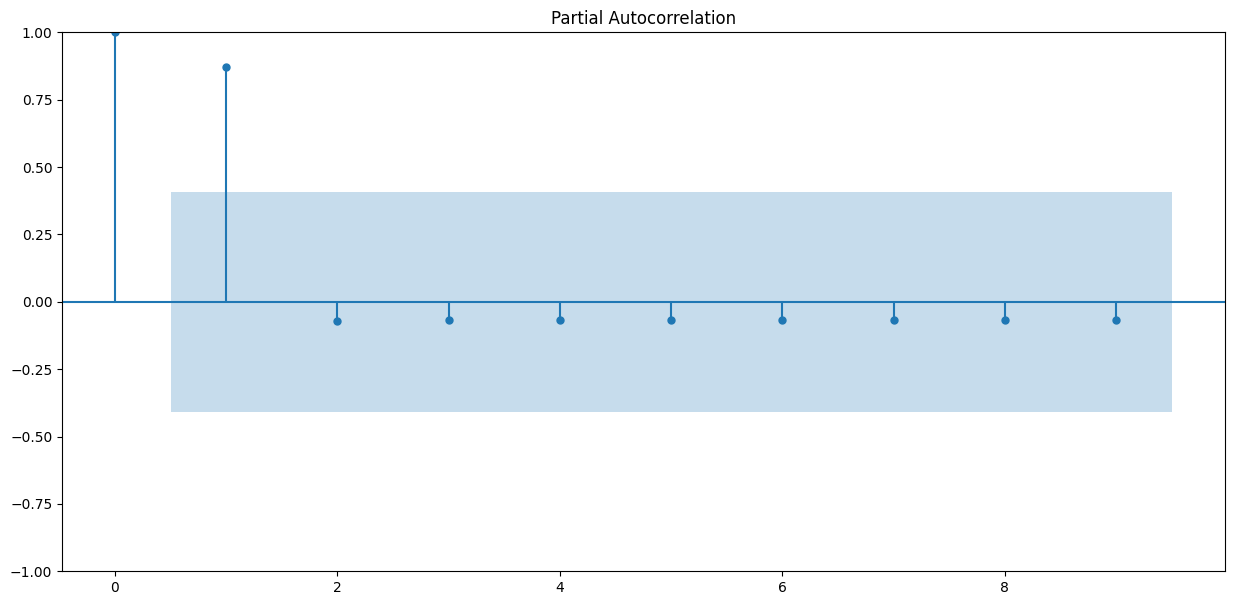

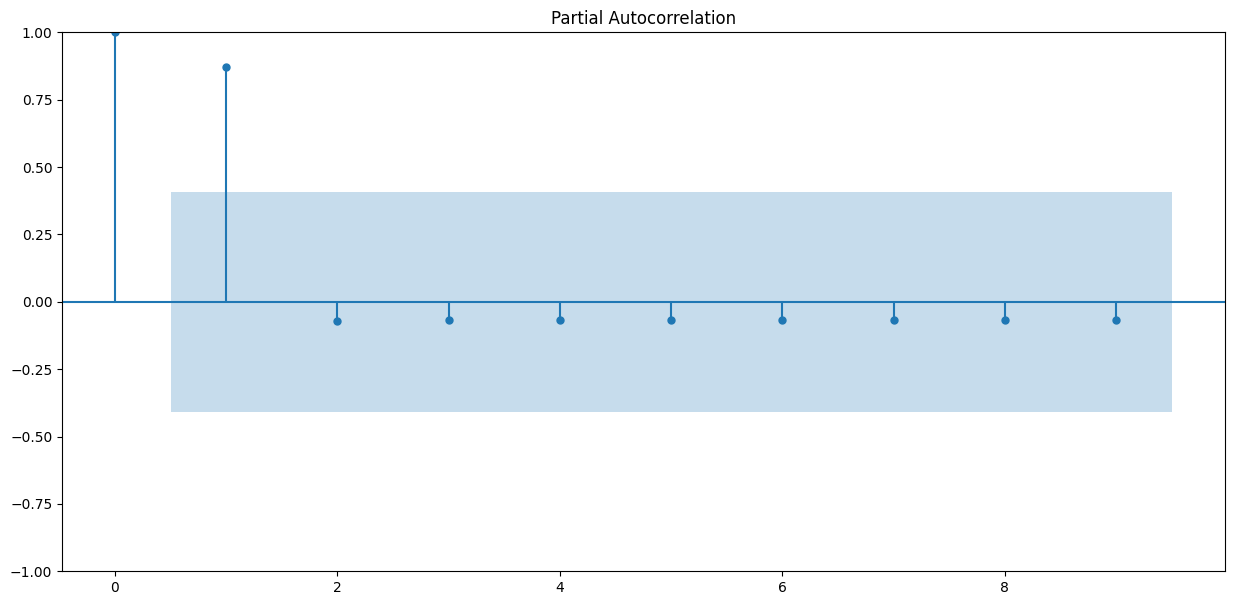

In [291]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(UGA_safely['Coverage'], lags=9)

### p=1

#### GRID SEARCH FOR OPTIMAL PARAMETERS

In [292]:
#Finding the best value for ARIMA
import itertools

#define the range of p,d,q parameters to take any value between 0 and 5
p=d=q=range(0,2)


#generate all possible combinations of p, d and q 
pdq = list(itertools.product(p,d,q))

#loop through all combinations of p, d, q and fit ARIMA model
warnings.filterwarnings("ignore") #to ignore warnings

for param in pdq:
    try:
        model_arima = ARIMA(UGA_safely, order=param, enforce_invertibility=False, enforce_stationarity=False)
        model_arima_fit = model_arima.fit()
        print(param, model_arima_fit.aic)
    except:
        continue
#The AIC is an estimator of in sample prediction error and thereby relative quality of statistical models for a given set of data

(0, 0, 0) 135.74315452837044
(0, 0, 1) 130.56410299286432
(0, 1, 0) 50.668113238239975
(0, 1, 1) 49.625621643702495
(1, 0, 0) -96.31996206976898
(1, 0, 1) -140.5789392791324
(1, 1, 0) -100.62397676146868
(1, 1, 1) -169.25309195666284


#### Parameters p, d, q =(1, 1, 1) with the lowest AIC of -169.25309195666284 is selected

#### SPLIT DATA

In [293]:
UGA_train=UGA_safely['2000-01-01':'2020-01-01']
UGA_test=UGA_safely['2020-01-01':'2022-01-01']

In [294]:
model_arima = ARIMA(UGA_train, order=(1, 1, 1), enforce_invertibility=False) 
model_arima_fit = model_arima.fit()

print(model_arima_fit.summary())

                               SARIMAX Results                                
Dep. Variable:               Coverage   No. Observations:                   21
Model:                 ARIMA(1, 1, 1)   Log Likelihood                  41.538
Date:                Fri, 15 Dec 2023   AIC                            -77.075
Time:                        21:37:05   BIC                            -74.088
Sample:                    01-01-2000   HQIC                           -76.492
                         - 01-01-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9982      0.005    183.193      0.000       0.987       1.009
ma.L1          0.8103      0.326      2.482      0.013       0.171       1.450
sigma2         0.0006      0.000      2.887      0.0

#### TEST PREDICTION

In [295]:
#prediction of test data with ARIMA
prediction = model_arima_fit.predict(start=20, end=22)
UGA_prediction=pd.DataFrame(prediction)
UGA_prediction

predicted_mean
2020-01-01       16.732187
2021-01-01       17.689517
2022-01-01       18.632227

In [296]:
#forecast of 2030 with ARIMA
forecast = model_arima_fit.get_forecast(steps=10)
forecast_conf = forecast.conf_int()

#put confidence intervals in df
UGA_forecast =pd.DataFrame(forecast_conf)
UGA_forecast

lower Coverage  upper Coverage
2021-01-01       17.640702       17.738333
2022-01-01       18.486700       18.777753
2023-01-01       19.305074       19.841353
2024-01-01       20.100201       20.924759
2025-01-01       20.874923       22.025136
2026-01-01       21.631227       23.140504
2027-01-01       22.370600       24.269382
2028-01-01       23.094207       25.410611
2029-01-01       23.802994       26.563251
2030-01-01       24.497751       27.726519

In [297]:
forecast.predicted_mean

2021-01-01    17.689517
2022-01-01    18.632227
2023-01-01    19.573213
2024-01-01    20.512480
2025-01-01    21.450030
2026-01-01    22.385865
2027-01-01    23.319991
2028-01-01    24.252409
2029-01-01    25.183122
2030-01-01    26.112135
Freq: AS-JAN, Name: predicted_mean, dtype: float64

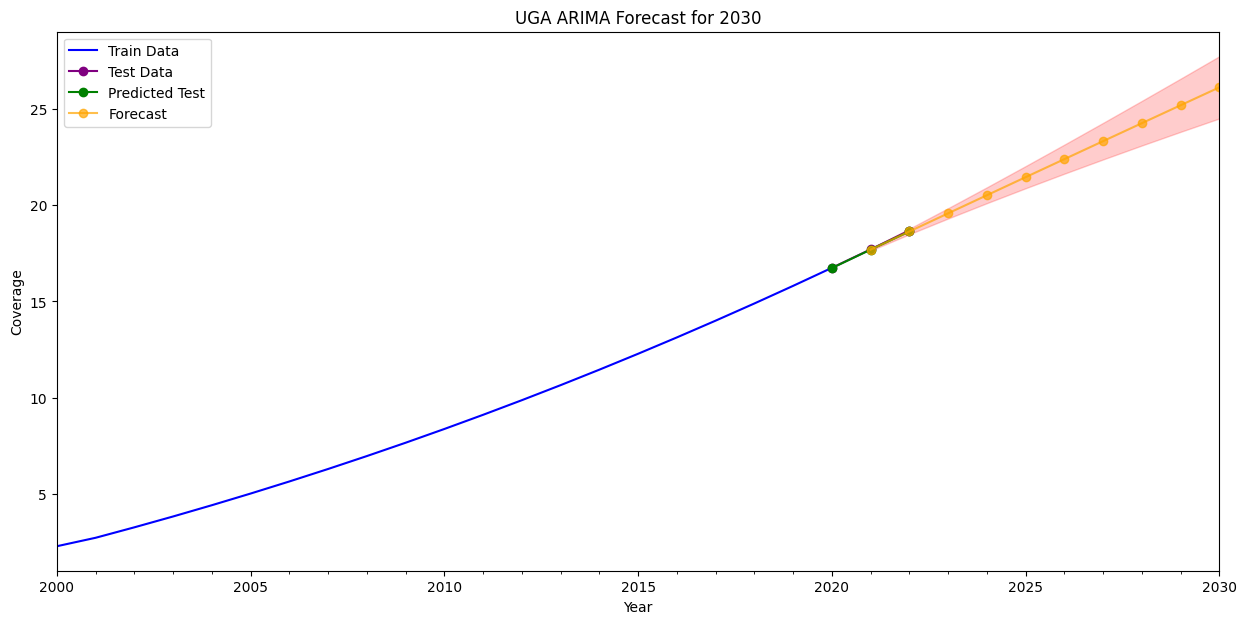

In [298]:
#plot observed values
ax = UGA_train['Coverage'].plot(label='Train Data', color='blue')
ax = UGA_test['Coverage'].plot(label='Test Data', marker='o', color='purple')

#plot predicted test values
ax = UGA_prediction['predicted_mean'].plot(label='Predicted Test', marker='o', color= 'green')

#Plot forecasted values
forecast.predicted_mean.plot(ax=ax, marker='o', label='Forecast', color='orange', alpha=0.7)

#plot the range for confidence intervals
ax.fill_between(forecast_conf.index,
                forecast_conf.iloc[:, 0],
                forecast_conf.iloc[:, 1], color='r', alpha=0.2)

#set axes labels
ax.set_xlabel('Year')
ax.set_ylabel('Coverage')
plt.title('UGA ARIMA Forecast for 2030')
plt.legend(loc='best')

plt.show()

#### EVALUATE MODEL

In [299]:
# Calculate evaluation metrics
mse = mean_squared_error(UGA_test, UGA_prediction)
rmse = np.sqrt(mse)
mae = mean_absolute_error(UGA_test, UGA_prediction)
me=np.mean(UGA_prediction['predicted_mean'] - UGA_test['Coverage'])
mape = np.mean(np.abs(UGA_prediction['predicted_mean'] - UGA_test['Coverage']) / np.abs(UGA_test['Coverage']) * 100)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Error (ME): {me}")

Mean Squared Error (MSE): 0.0009167836837444284
Root Mean Squared Error (RMSE): 0.03027843595274413
Mean Absolute Percentage Error (MAPE): 0.13754890475300982
Mean Absolute Error (MAE): 0.02496311571991683
Mean Error (ME): -0.02496311571991683


#### MODEL DIAGNOSTICS

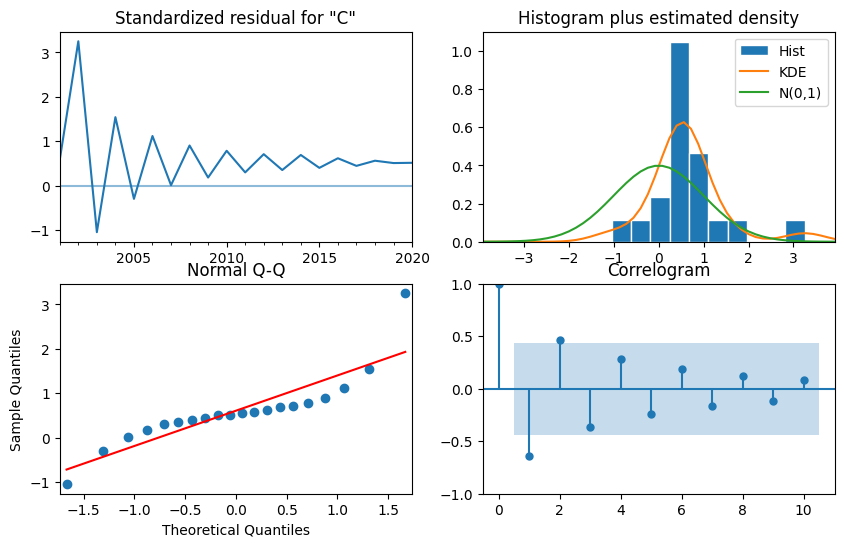

In [300]:
model_arima_fit.plot_diagnostics(figsize=(10,6))
plt.show()

## MODEL 2: AUTO ARIMA

#### Auto ARIMA uses the Akaike's Information Criterion (AIC), to identify the order of the best ARIMA model

#### SPLIT DATA

In [301]:
UGA_train=UGA_safely['2000-01-01':'2020-01-01']
UGA_test=UGA_safely['2020-01-01':'2022-01-01']

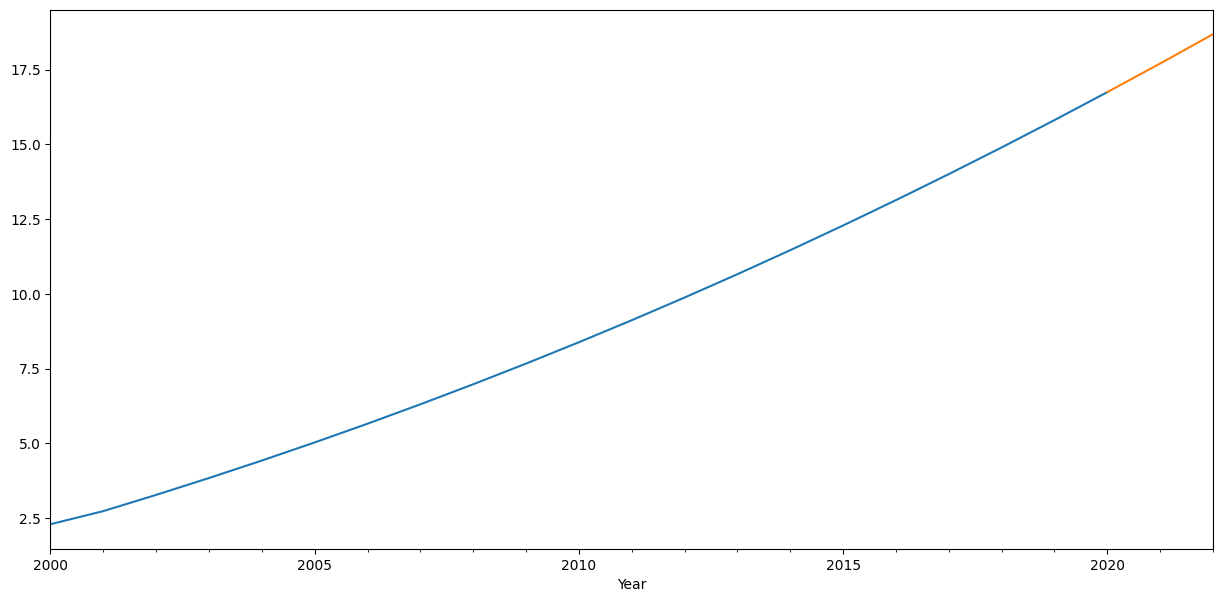

In [302]:
#plot train and test
UGA_train['Coverage'].plot()
UGA_test['Coverage'].plot()
plt.show()

#### FIT ARIMA INTO MODEL

In [303]:
#fit auto_arima into UGA dataset
UGA_model = pm.auto_arima(UGA_train,
                          m=1,
                          seasonal=False,
                          trace=True,
                          error_action='ignore',
                          stepwise=True,
                          suppress_warnings=True)  

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=-85.864, Time=0.52 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-94.103, Time=0.06 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-92.110, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-92.229, Time=0.11 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-74.968, Time=0.02 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-90.025, Time=0.10 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0] intercept
Total fit time: 0.878 seconds


In [304]:
UGA_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   21
Model:               SARIMAX(0, 2, 0)   Log Likelihood                  49.051
Date:                Fri, 15 Dec 2023   AIC                            -94.103
Time:                        21:37:07   BIC                            -92.214
Sample:                    01-01-2000   HQIC                           -93.783
                         - 01-01-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0262      0.116      0.225      0.822      -0.201       0.254
sigma2         0.0003      0.001      0.316      0.752      -0.002       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               206.28
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.02   Skew:                             4.00
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [305]:
UGA_arima = sm.tsa.ARIMA(UGA_train, order=(0,2,0))

In [306]:
UGA_result = UGA_arima.fit()

#### According to the algorithm the best ARIMA model is ARIMA (0, 2, 0). The ARIMA (0, 2, 0) representing p=0, d=2, q=0 model is chosen as the best-fitting model based on its AIC (Akaike Information Criterion) value. There is no seasonality in the data as represented by [0,0,0][0].

#### RESIDUAL PLOTS

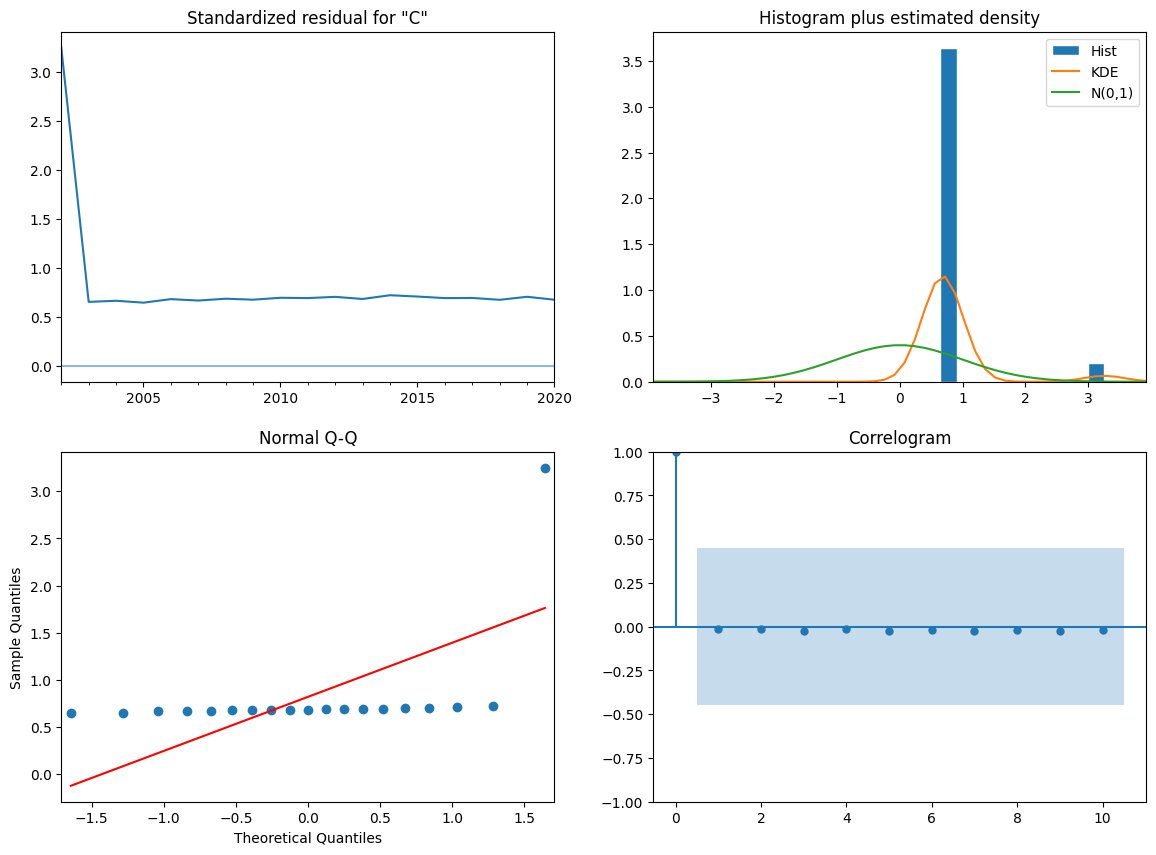

In [307]:
UGA_result.plot_diagnostics(figsize=(14,10))
plt.show()

#### TEST PREDICTION

In [308]:
UGA_result.predict(start=20, end=22)

2020-01-01    16.723527
2021-01-01    17.680780
2022-01-01    18.616479
Freq: AS-JAN, Name: predicted_mean, dtype: float64

In [309]:
forecast=UGA_result.predict(start=20, end=22)

In [310]:
UGA_forecast=pd.DataFrame(forecast)

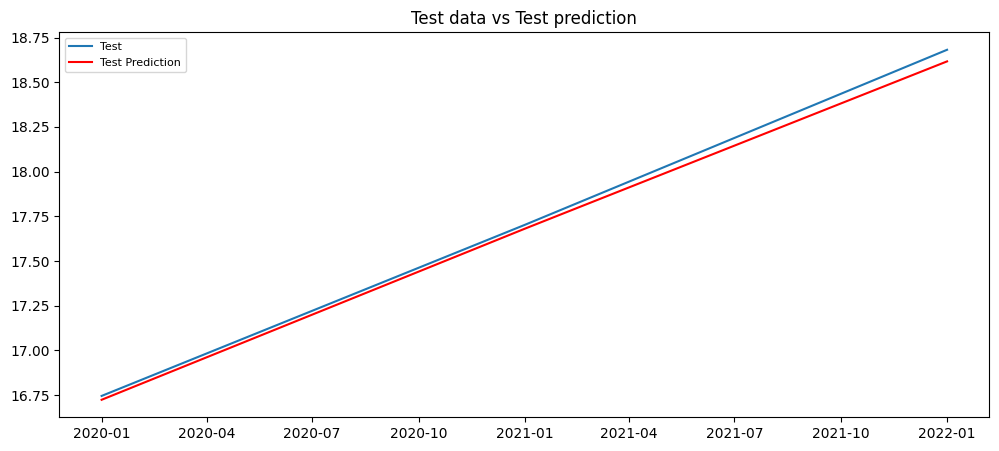

In [311]:
#plot Testing and Forecasted data
plt.figure(figsize=(12, 5), dpi=100)
#plt.plot(train, label='Train')
plt.plot(UGA_test, label='Test')
plt.plot(UGA_forecast, label='Test Prediction', color='red')
plt.title('Test data vs Test prediction')
plt.legend(loc='best', fontsize=8)
plt.show()

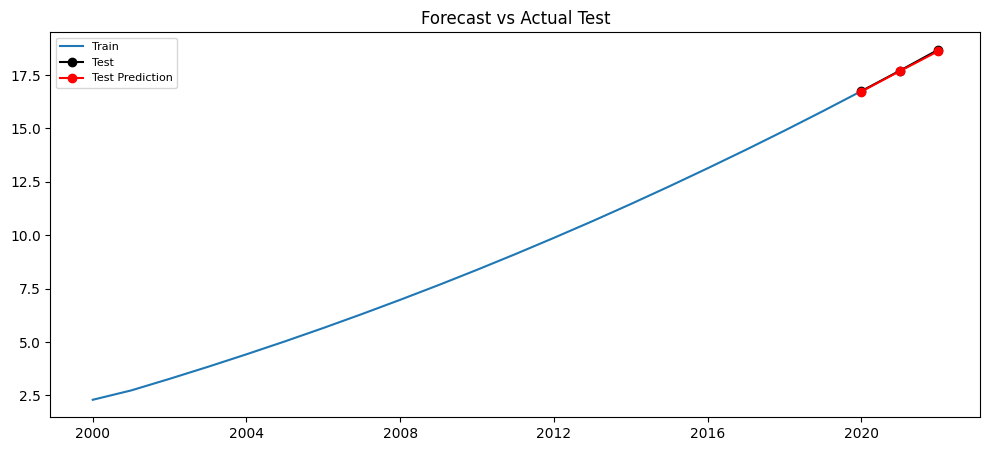

In [312]:
#plot the predictions for test set
plt.figure(figsize=(12, 5), dpi=100)

forecasted=UGA_result.predict(start=20, end=22)

plt.plot(UGA_train, label='Train')
plt.plot(UGA_test, marker='o', label='Test', color='black')
plt.plot(forecasted, marker='o', label='Test Prediction', color='red')
plt.title('Forecast vs Actual Test')
plt.legend(loc='best', fontsize=8)
plt.show()

#### EVALUATE MODEL

In [313]:
UGA_forecast

predicted_mean
2020-01-01       16.723527
2021-01-01       17.680780
2022-01-01       18.616479

In [314]:
# Calculate evaluation metrics
mse = mean_squared_error(UGA_test, UGA_forecast)
rmse = np.sqrt(mse)
mae = mean_absolute_error(UGA_test, UGA_forecast)
me=np.mean(UGA_forecast['predicted_mean']- UGA_test['Coverage'])
mape = np.mean(np.abs(UGA_forecast['predicted_mean']- UGA_test['Coverage']) / np.abs(UGA_test['Coverage']) * 100)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Error (ME): {me}")

Mean Squared Error (MSE): 0.001715360499333694
Root Mean Squared Error (RMSE): 0.04141691078935866
Mean Absolute Percentage Error (MAPE): 0.19933813751806495
Mean Absolute Error (MAE): 0.03601133061664067
Mean Error (ME): -0.03601133061664067


#### FORECAST FOR YEAR 2030

In [315]:
# Getting forecast for 8 years
forecast = UGA_result.get_forecast(steps=10, dynamic=False)
forecast_conf = forecast.conf_int()

In [316]:
forecast_conf

lower Coverage  upper Coverage
2021-01-01       17.618218       17.743343
2022-01-01       18.476585       18.756374
2023-01-01       19.318091       19.786266
2024-01-01       20.145208       20.830547
2025-01-01       20.959600       21.887553
2026-01-01       21.762466       22.956085
2027-01-01       22.554724       24.035225
2028-01-01       23.337101       25.124247
2029-01-01       24.110195       26.222551
2030-01-01       24.874505       27.329639

In [317]:
forecasted=UGA_result.predict(start=20, end=30)
UGA_forecasted=pd.DataFrame(forecasted)

In [318]:
UGA_forecasted

predicted_mean
2020-01-01       16.723527
2021-01-01       17.680780
2022-01-01       18.616479
2023-01-01       19.552178
2024-01-01       20.487878
2025-01-01       21.423577
2026-01-01       22.359276
2027-01-01       23.294975
2028-01-01       24.230674
2029-01-01       25.166373
2030-01-01       26.102072

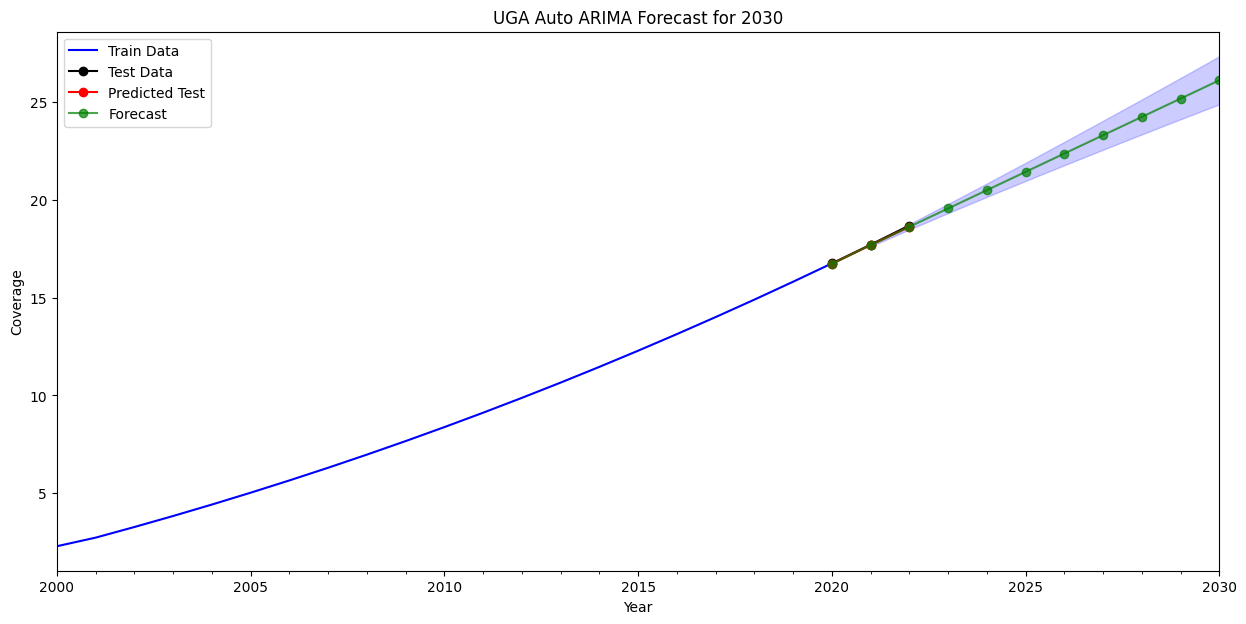

In [319]:
#plot observed values
ax = UGA_train['Coverage'].plot(label='Train Data', color='blue')
ax = UGA_test['Coverage'].plot(label='Test Data', marker='o', color='black')

#plot forecasted test values
ax = UGA_forecast['predicted_mean'].plot(label='Predicted Test', marker='o', color= 'red')

#Plot forecasted values
UGA_forecasted.predicted_mean.plot(ax=ax, marker='o', label='Forecast', color='green', alpha=0.7)

#plot the range for confidence intervals
ax.fill_between(forecast_conf.index,
                forecast_conf.iloc[:, 0],
                forecast_conf.iloc[:, 1], color='b', alpha=0.2)

#set axes labels
ax.set_xlabel('Year')
ax.set_ylabel('Coverage')
plt.title('UGA Auto ARIMA Forecast for 2030')
plt.legend(loc='best')

plt.show()

## MODEL 3: HOLT WINTER

In [320]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [321]:
UGAhwmodel = ExponentialSmoothing(UGA_train.Coverage, trend = 'add').fit()
UGAhwmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       ExponentialSmoothing Model Results                       
================================================================================
Dep. Variable:                 Coverage   No. Observations:                   21
Model:             ExponentialSmoothing   SSE                              0.019
Optimized:                         True   AIC                           -138.767
Trend:                         Additive   BIC                           -134.589
Seasonal:                          None   AICC                          -132.767
Seasonal Periods:                  None   Date:                 Fri, 15 Dec 2023
Box-Cox:                          False   Time:                         21:37:09
Box-Cox Coeff.:                    None                                         
==============================================================================
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            1.0000000                alpha                 True
smoothing_trend            1.0000000                 beta                 True
initial_level              1.8574992                  l.0                 True
initial_trend              0.4387636                  b.0                 True
------------------------------------------------------------------------------
"""

#### TEST PREDICTION

In [322]:
test_pred = UGAhwmodel.predict(start=20, end=22)
test_pred=pd.DataFrame(test_pred)
test_pred

0
2020-01-01  16.723527
2021-01-01  17.680780
2022-01-01  18.616479

In [323]:
UGA_test['Coverage']

Year
2020-01-01    16.745081
2021-01-01    17.702316
2022-01-01    18.681423
Name: Coverage, dtype: float64

<Axes: xlabel='Year'>

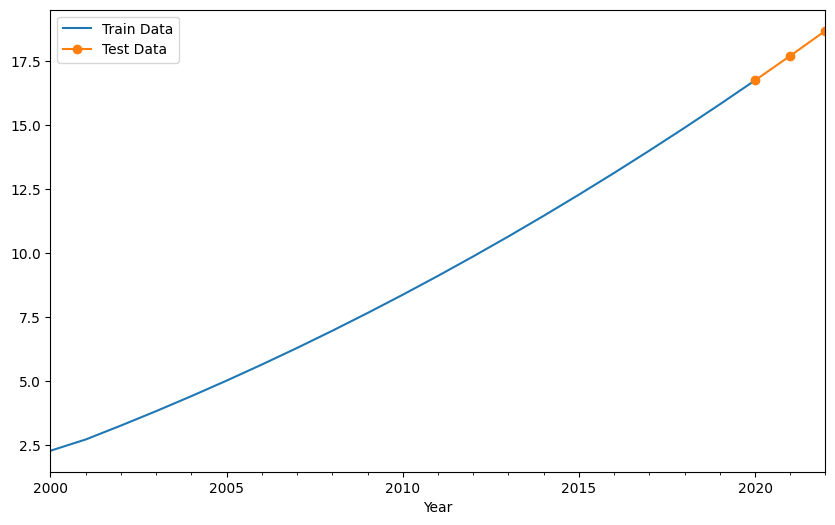

In [324]:
UGA_train['Coverage'].plot(legend=True, label='Train Data', figsize=(10,6))
UGA_test['Coverage'].plot(legend=True, marker = 'o', label='Test Data')

#test_pred.plot(legend=True, marker= 'o', label='Predicted Test')

### MODEL EVALUATION

In [325]:
# Calculate evaluation metrics
mse = mean_squared_error(UGA_test, test_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(UGA_test, test_pred)
me=np.mean(test_pred[0]- UGA_test['Coverage'])
mape = np.mean(np.abs(test_pred[0] - UGA_test['Coverage']) / np.abs(UGA_test['Coverage']) * 100)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Error (ME): {me}")

Mean Squared Error (MSE): 0.0017153608366173873
Root Mean Squared Error (RMSE): 0.041416914861169794
Mean Absolute Percentage Error (MAPE): 0.19933815978455124
Mean Absolute Error (MAE): 0.03601133459762688
Mean Error (ME): -0.03601133459762688


In [326]:
UGA_safely['Coverage'].mean(), np.sqrt(UGA_safely['Coverage'].var())

(9.607006685585883, 5.0878640237052295)

#### FORECAST FOR 2030

In [327]:
model = ExponentialSmoothing(UGA_safely.Coverage, trend ='add').fit()

In [328]:
pred = UGAhwmodel.predict(start=22, end=30)
#pred = model.forecast(steps=8)
pred=pd.DataFrame(pred)
pred

0
2022-01-01  18.616479
2023-01-01  19.552178
2024-01-01  20.487878
2025-01-01  21.423577
2026-01-01  22.359276
2027-01-01  23.294975
2028-01-01  24.230674
2029-01-01  25.166373
2030-01-01  26.102072

#### PLOT ALL ON SAME PLOT

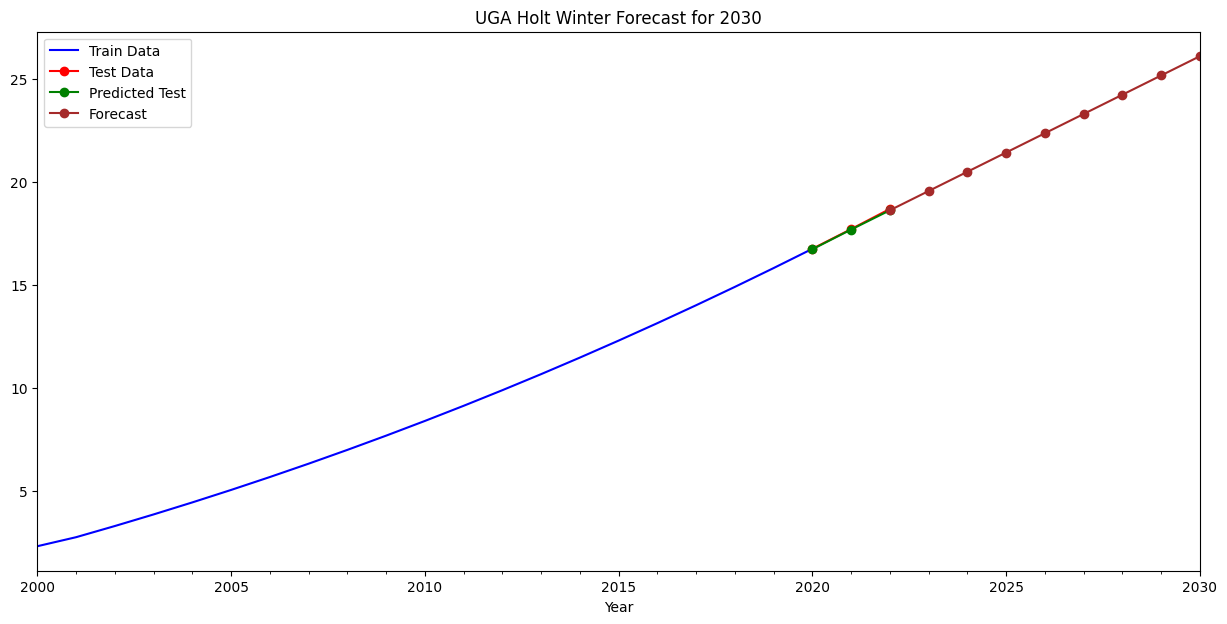

In [329]:
#plot observed values
ax = UGA_train['Coverage'].plot(label='Train Data', color='blue')
ax = UGA_test['Coverage'].plot(label='Test Data', marker='o', color='red')

#plot forecasted test values
ax = test_pred[0].plot(label='Predicted Test', marker='o', color= 'green')
ax = pred[0].plot(label='Forecast', marker='o', color= 'brown')

#train, = plt.plot(BFA_train.index, BFA_train,'b.-', label='Train Data')
#test, = plt.plot(BFA_test.index, BFA_test, 'r.-', label= 'Test Data')
#test_pred, = plt.plot(test_pred.index, test_pred,  'g.-', label= 'Predicted Test')
#Plot forecasted values
#test_pred[0].plot(ax=ax, marker='o', label='Forecast', color='orange', alpha=0.7)

plt.legend()
plt.title('UGA Holt Winter Forecast for 2030')
plt.show()

# COUNTRY 2: LESOTHO

## MODEL 1: ARIMA 

Text(0.5, 1.0, 'Basic Coverage from year 2000 to 2022')

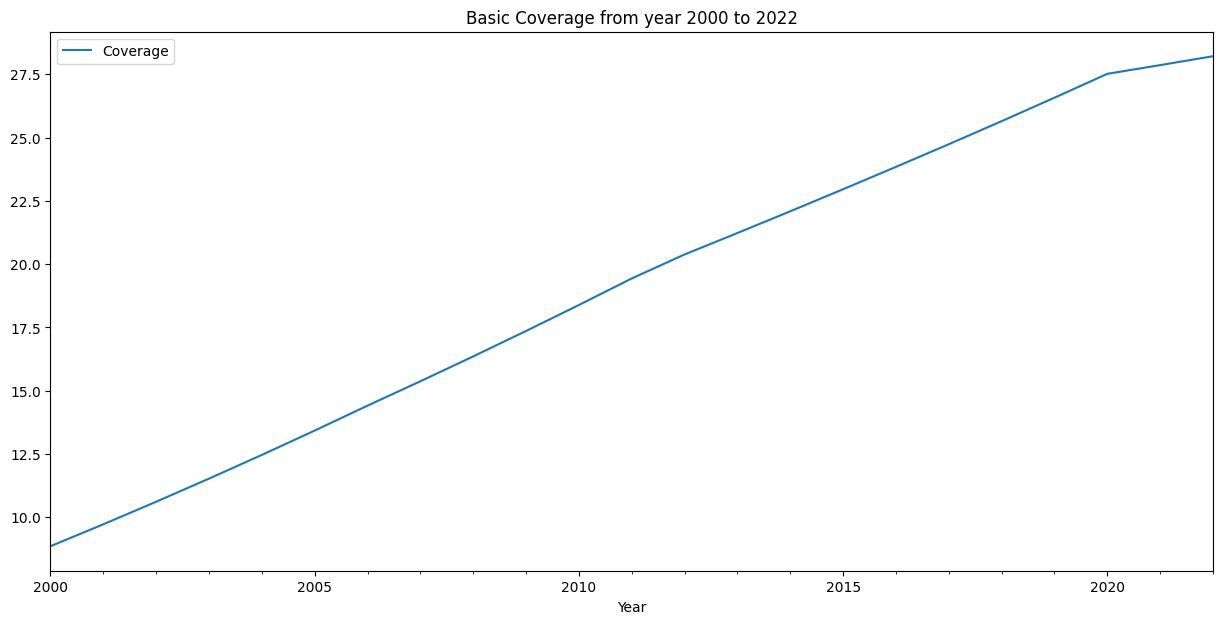

In [330]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 7
LSO_safely.plot()
plt.legend(loc='best')
plt.title('Basic Coverage from year 2000 to 2022')

#### 1) AUGMENTED DICKEY FULLER TEST (ADF)

In [331]:
#a function is created to determine ADF (Augmented Dickey Fuller (ADF) test) which determines if a time series is stationary or not
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
    print('Results of Augmented Dickey-Fuller Test:')
    LSO_safely_test= adfuller(dataset, autolag ='AIC')
    LSO_safely_output= pd.Series(LSO_safely_test[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'Number of observations Used'])
    for key, value in  LSO_safely_test[4].items():
        LSO_safely_output['Critical Value (%s)'%key ] = value
    print(LSO_safely_output)
        
adf_test(LSO_safely)  

Results of Augmented Dickey-Fuller Test:
Test Statistic                 -3.737497
p-value                         0.003616
#Lags Used                      9.000000
Number of observations Used    13.000000
Critical Value (1%)            -4.068854
Critical Value (5%)            -3.127149
Critical Value (10%)           -2.701730
dtype: float64


#### ii) KWIATKOWSKI-PHILLIPS-SCHMIDT-SHIN (KPSS) Test

In [332]:
from statsmodels.tsa.stattools import kpss

In [333]:
def kpss_test(dataset):
    print('Results of KPSS test')
    LSO_safely_test = kpss(dataset, regression='c', nlags='auto')
    LSO_safely_output=pd.Series(LSO_safely_test[0:3], index=['Test Statistic', 'p-value', '#lags Used'])
    for key, value in LSO_safely_test[3].items():
        LSO_safely_output['Critical Value (%s)'%key] = value
    print(LSO_safely_output)
    
kpss_test(LSO_safely['Coverage'])

Results of KPSS test
Test Statistic           0.682777
p-value                  0.015111
#lags Used               3.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


#### iii) ROLLING STATISTICS

In [334]:
#get rolling statistics
rolling_mean = LSO_safely['Coverage'].rolling(window=3).mean()
rolling_std =LSO_safely['Coverage'].rolling(window=3).std()

Text(0.5, 1.0, 'Rolling Mean & Standard Deviation')

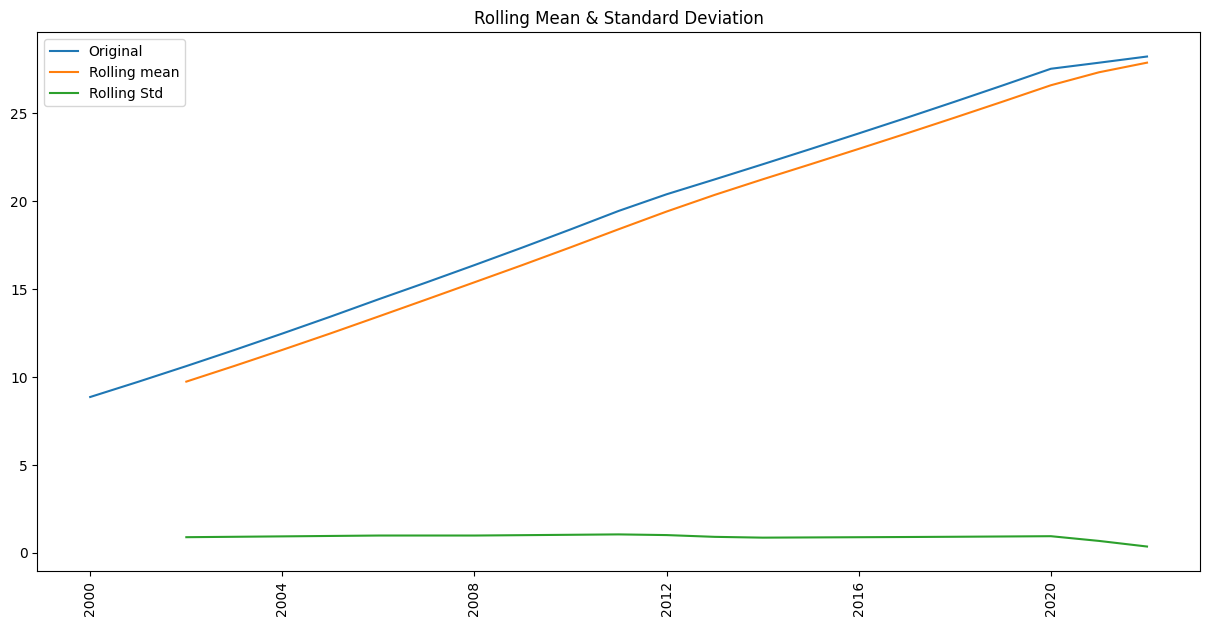

In [335]:
#plot rolling statistics
original_series = plt.plot(LSO_safely['Coverage'], label='Original')
mean = plt.plot(rolling_mean, label='Rolling mean')
std = plt.plot(rolling_std, label='Rolling Std')
plt.legend(loc='best')
plt.xticks(rotation=90)
plt.title('Rolling Mean & Standard Deviation')

### PARAMETER ANALYSIS FOR ARIMA -p, d, q

#### AUTOCORRELATION FACTOR (ACF), q

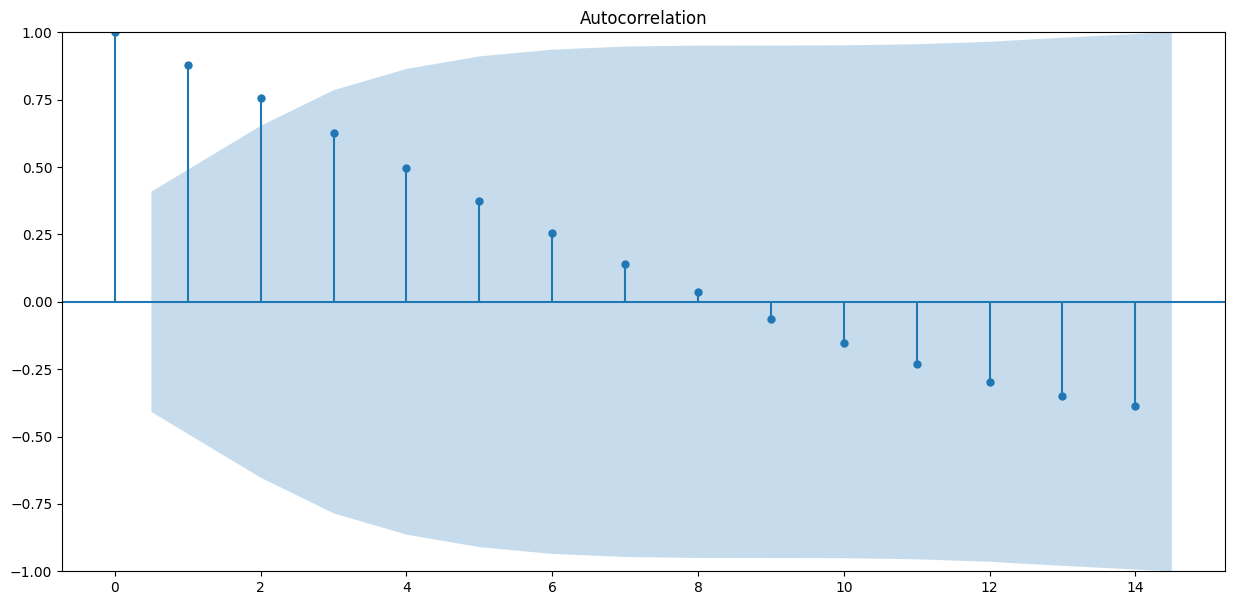

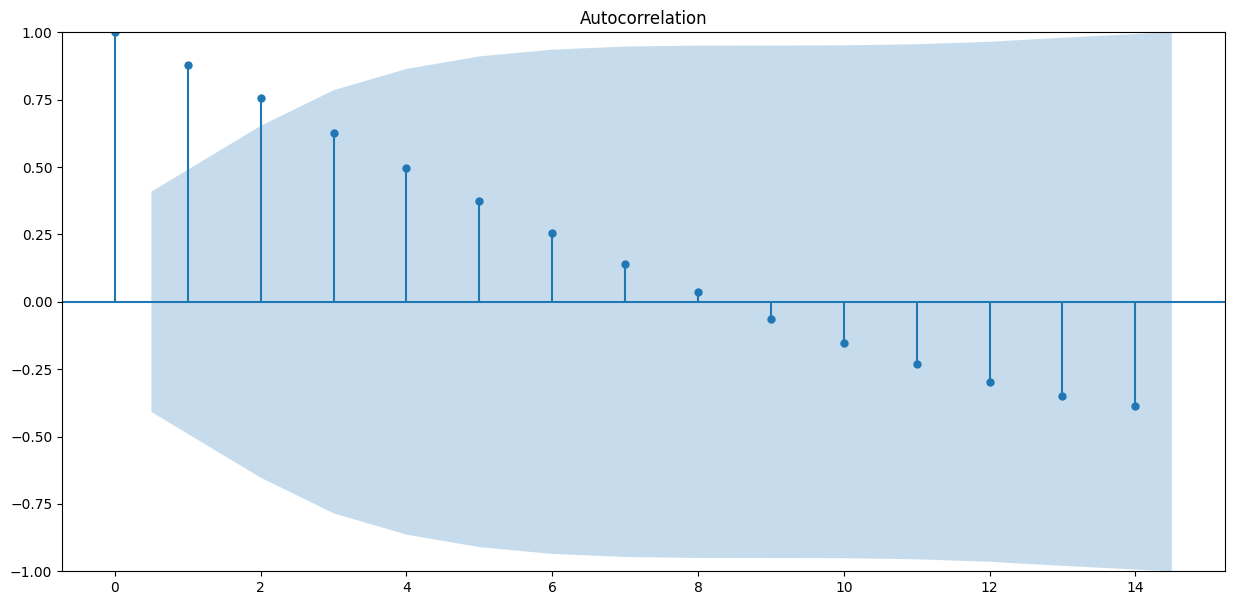

In [336]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(LSO_safely['Coverage'])

### q=2

#### iii) PARTIAL AUTOCORRELATION FACTOR (PACF), p

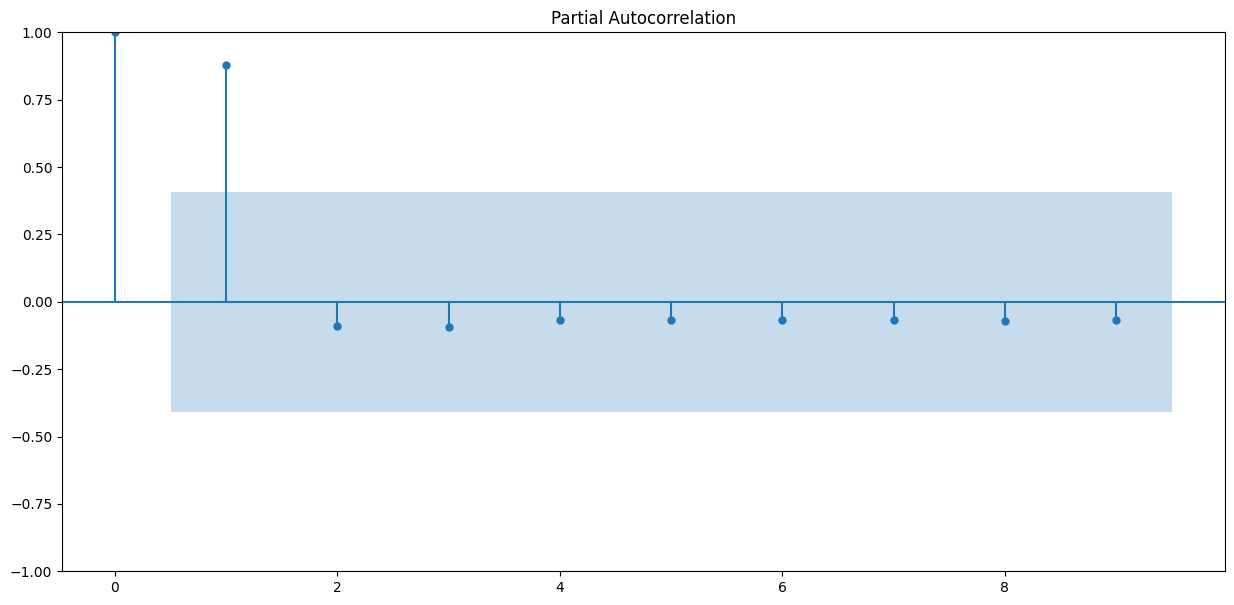

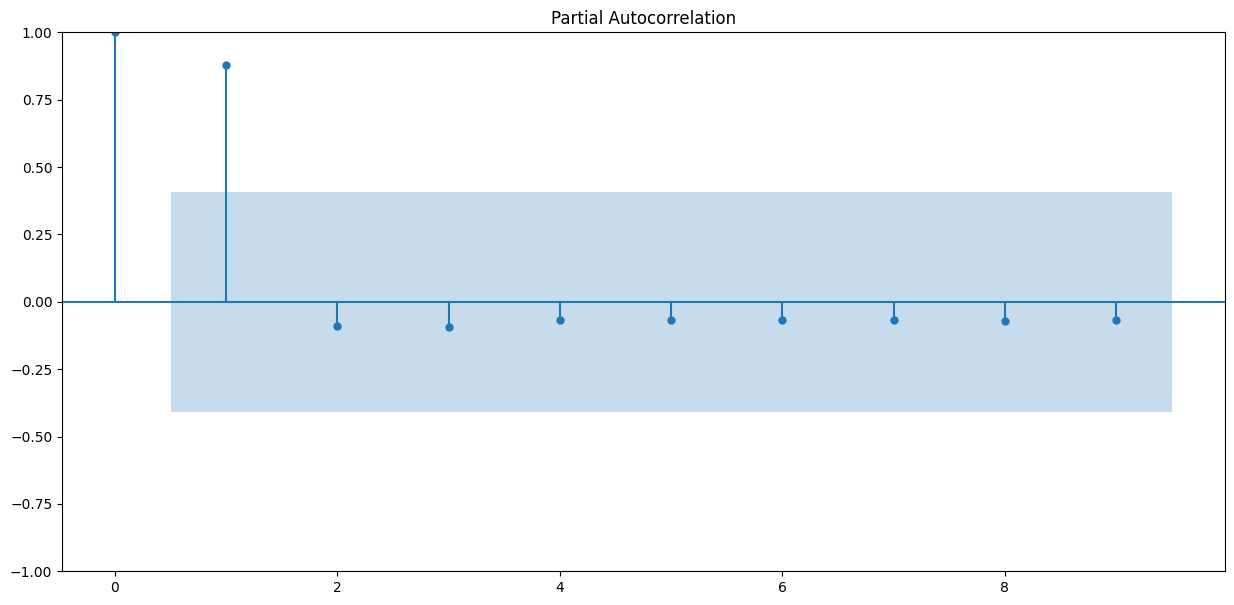

In [337]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(LSO_safely['Coverage'], lags=9)

### p=1

#### GRID SEARCH FOR OPTIMAL PARAMETERS

In [338]:
#Finding the best value for ARIMA
import itertools

#define the range of p,d,q parameters to take any value between 0 and 5
p=d=q=range(0,2)


#generate all possible combinations of p, d and q 
pdq = list(itertools.product(p,d,q))

#loop through all combinations of p, d, q and fit ARIMA model
warnings.filterwarnings("ignore") #to ignore warnings

for param in pdq:
    try:
        model_arima = ARIMA(LSO_safely, order=param, enforce_invertibility=False, enforce_stationarity=False)
        model_arima_fit = model_arima.fit()
        print(param, model_arima_fit.aic)
    except:
        continue
#The AIC is an estimator of in sample prediction error and thereby relative quality of statistical models for a given set of data

(0, 0, 0) 144.08493218203225
(0, 0, 1) 137.86995587347658
(0, 1, 0) 57.131370846041385
(0, 1, 1) 32.2098459494208
(1, 0, 0) -14.192210017329941
(1, 0, 1) -20.28850548533072
(1, 1, 0) -21.09242703713912
(1, 1, 1) -17.06170053644683


#### Parameters p, d, q = (1, 1, 0) with the lowest AIC of -21.09242703713912 is selected

#### SPLIT DATA

In [339]:
LSO_train=LSO_safely['2000-01-01':'2020-01-01']
LSO_test=LSO_safely['2020-01-01':'2022-01-01']

In [340]:
model_arima = ARIMA(LSO_train, order=(1, 1, 0), enforce_invertibility=False) 
model_arima_fit = model_arima.fit()

print(model_arima_fit.summary())

                               SARIMAX Results                                
Dep. Variable:               Coverage   No. Observations:                   21
Model:                 ARIMA(1, 1, 0)   Log Likelihood                  34.047
Date:                Fri, 15 Dec 2023   AIC                            -64.095
Time:                        21:37:12   BIC                            -62.103
Sample:                    01-01-2000   HQIC                           -63.706
                         - 01-01-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9991      0.015     66.766      0.000       0.970       1.028
sigma2         0.0014      0.001      2.385      0.017       0.000       0.003
Ljung-Box (L1) (Q):                   3.60   Jarque-

In [341]:
print(model_arima_fit.summary().tables[2])

Ljung-Box (L1) (Q):                   3.60   Jarque-Bera (JB):                29.95
Prob(Q):                              0.06   Prob(JB):                         0.00
Heteroskedasticity (H):               0.32   Skew:                            -2.31
Prob(H) (two-sided):                  0.15   Kurtosis:                         6.83


#### TEST PREDICTION

In [342]:
#prediction of test data with ARIMA
prediction = model_arima_fit.predict(start=20, end=22)
LSO_prediction=pd.DataFrame(prediction)
LSO_prediction

predicted_mean
2020-01-01       27.503811
2021-01-01       28.464870
2022-01-01       29.407254

#### FORECAST FOR YEAR 2030

In [343]:
#forecast of 2030 with ARIMA
forecast = model_arima_fit.get_forecast(steps=10)
forecast_conf = forecast.conf_int()

#put confidence intervals in df
LSO_forecast =pd.DataFrame(forecast_conf)
LSO_forecast

lower Coverage  upper Coverage
2021-01-01       28.391164       28.538576
2022-01-01       29.242498       29.572009
2023-01-01       30.073237       30.624432
2024-01-01       30.886310       31.692915
2025-01-01       31.683692       32.775488
2026-01-01       32.466809       33.870725
2027-01-01       33.236751       34.977537
2028-01-01       33.994388       36.095055
2029-01-01       34.740433       37.222568
2030-01-01       35.475484       38.359479

In [344]:
forecast.predicted_mean

2021-01-01    28.464870
2022-01-01    29.407254
2023-01-01    30.348834
2024-01-01    31.289613
2025-01-01    32.229590
2026-01-01    33.168767
2027-01-01    34.107144
2028-01-01    35.044721
2029-01-01    35.981501
2030-01-01    36.917482
Freq: AS-JAN, Name: predicted_mean, dtype: float64

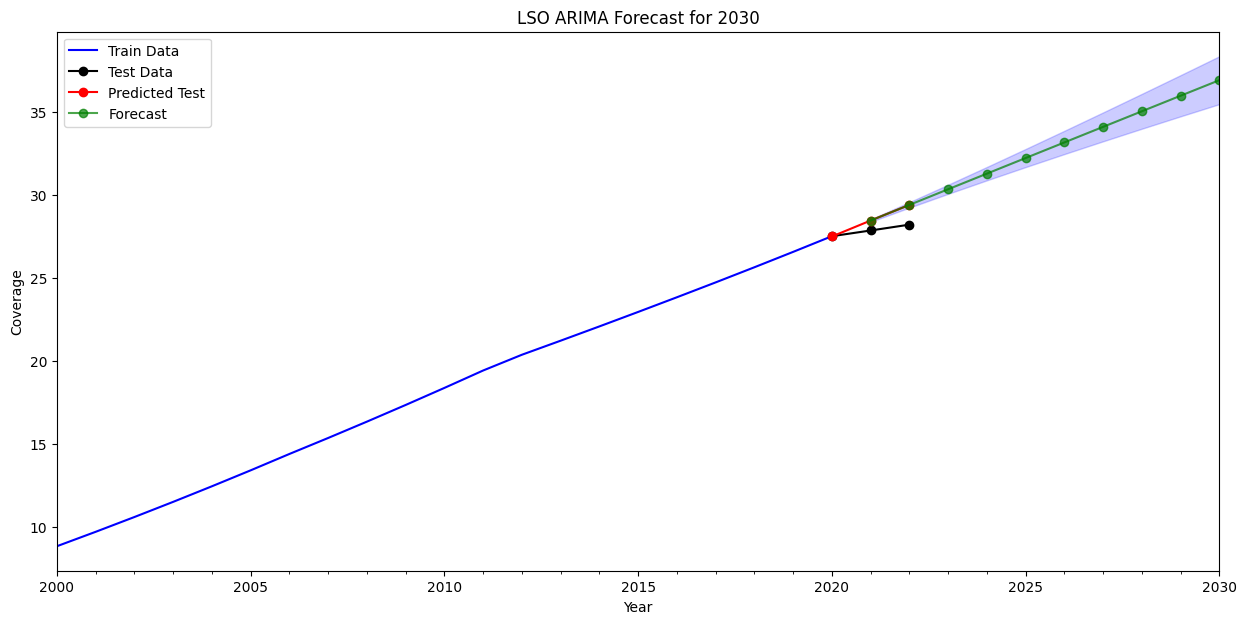

In [345]:
#plot observed values
ax = LSO_train['Coverage'].plot(label='Train Data', color='blue')
ax = LSO_test['Coverage'].plot(label='Test Data', marker='o', color='black')

#plot predicted test values
ax = LSO_prediction['predicted_mean'].plot(label='Predicted Test', marker='o', color= 'red')

#Plot forecasted values
forecast.predicted_mean.plot(ax=ax, marker='o', label='Forecast', color='green', alpha=0.7)

#plot the range for confidence intervals
ax.fill_between(forecast_conf.index,
                forecast_conf.iloc[:, 0],
                forecast_conf.iloc[:, 1], color='b', alpha=0.2)

#set axes labels
ax.set_xlabel('Year')
ax.set_ylabel('Coverage')
plt.title('LSO ARIMA Forecast for 2030')
plt.legend(loc='best')

plt.show()

#### EVALUATE MODEL

In [346]:
# Calculate evaluation metrics
mse = mean_squared_error(LSO_test, LSO_prediction)
rmse = np.sqrt(mse)
mae = mean_absolute_error(LSO_test, LSO_prediction)
me=np.mean(LSO_prediction['predicted_mean'] - LSO_test['Coverage'])
mape = np.mean(np.abs(LSO_prediction['predicted_mean'] - LSO_test['Coverage']) / np.abs(LSO_test['Coverage']) * 100)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Error (ME): {me}")

Mean Squared Error (MSE): 0.5916094350996552
Root Mean Squared Error (RMSE): 0.7691615143126022
Mean Absolute Percentage Error (MAPE): 2.143813081046399
Mean Absolute Error (MAE): 0.602258562631094
Mean Error (ME): 0.5903437018135461


#### MODEL DIAGNOSTICS

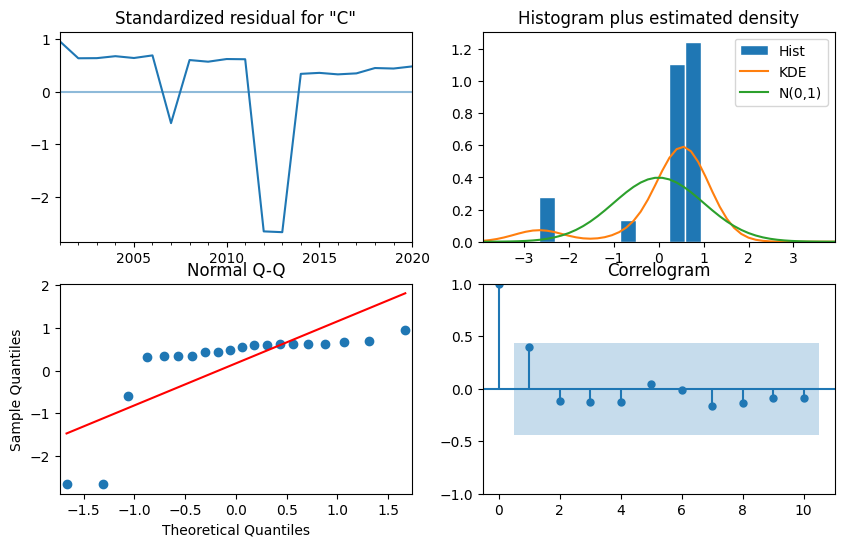

In [347]:
model_arima_fit.plot_diagnostics(figsize=(10,6))
plt.show()

### Residuals show no correlation

## MODEL 2: AUTO ARIMA

#### SPLIT DATA

In [348]:
LSO_train=LSO_safely['2000-01-01':'2020-01-01']
LSO_test=LSO_safely['2020-01-01':'2022-01-01']

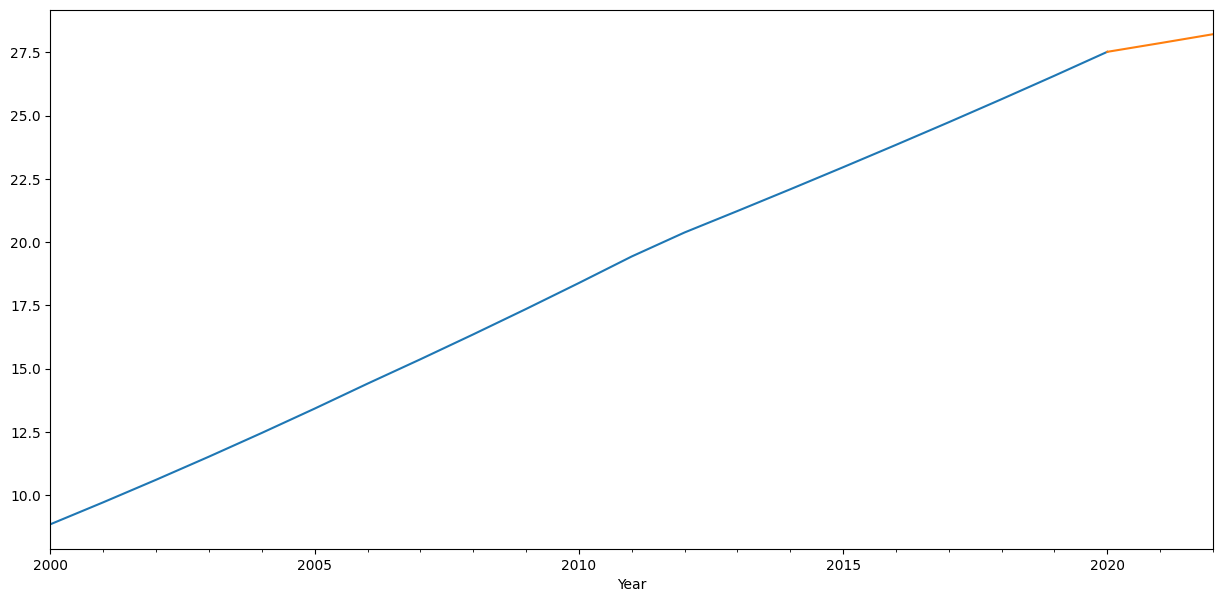

In [349]:
#plot train and test
LSO_train['Coverage'].plot()
LSO_test['Coverage'].plot()
plt.show()

#### FIT ARIMA INTO MODEL

In [350]:
#fit auto_arima into BFA dataset
LSO_model = pm.auto_arima(LSO_train,
                          m=1,
                          seasonal=False,
                          trace=True,
                          error_action='ignore',
                          stepwise=True,
                          suppress_warnings=True)  

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-74.415, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-54.720, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-70.265, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-70.693, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=56.074, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-74.168, Time=0.20 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-74.252, Time=0.20 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-72.806, Time=0.29 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-70.783, Time=0.36 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-76.038, Time=0.12 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-74.442, Time=0.12 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-74.842, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-66.086, Time=0.13 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 1.999 seconds


In [351]:
LSO_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   21
Model:               SARIMAX(1, 1, 1)   Log Likelihood                  42.019
Date:                Fri, 15 Dec 2023   AIC                            -76.038
Time:                        21:37:15   BIC                            -72.055
Sample:                    01-01-2000   HQIC                           -75.260
                         - 01-01-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.3693      0.177      2.084      0.037       0.022       0.717
ar.L1          0.6022      0.185      3.247      0.001       0.239       0.966
ma.L1          0.7644      0.210      3.642      0.000       0.353       1.176
sigma2         0.0008      0.000      2.975      0.003       0.000       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 1.55
Prob(Q):                              0.88   Prob(JB):                         0.46
Heteroskedasticity (H):               0.42   Skew:                            -0.62
Prob(H) (two-sided):                  0.27   Kurtosis:                         3.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [352]:
LSO_arima = sm.tsa.ARIMA(LSO_train, order=(1,1,1))

In [353]:
LSO_result = LSO_arima.fit()

#### According to the algorithm the best ARIMA model is ARIMA (1, 1, 1). The ARIMA (1, 1, 1) representing p=1, d=1, q=1 model is chosen as the best-fitting model based on its AIC (Akaike Information Criterion) value. There is no seasonality in the data as represented by [0,0,0][0].

#### RESIDUAL PLOTS

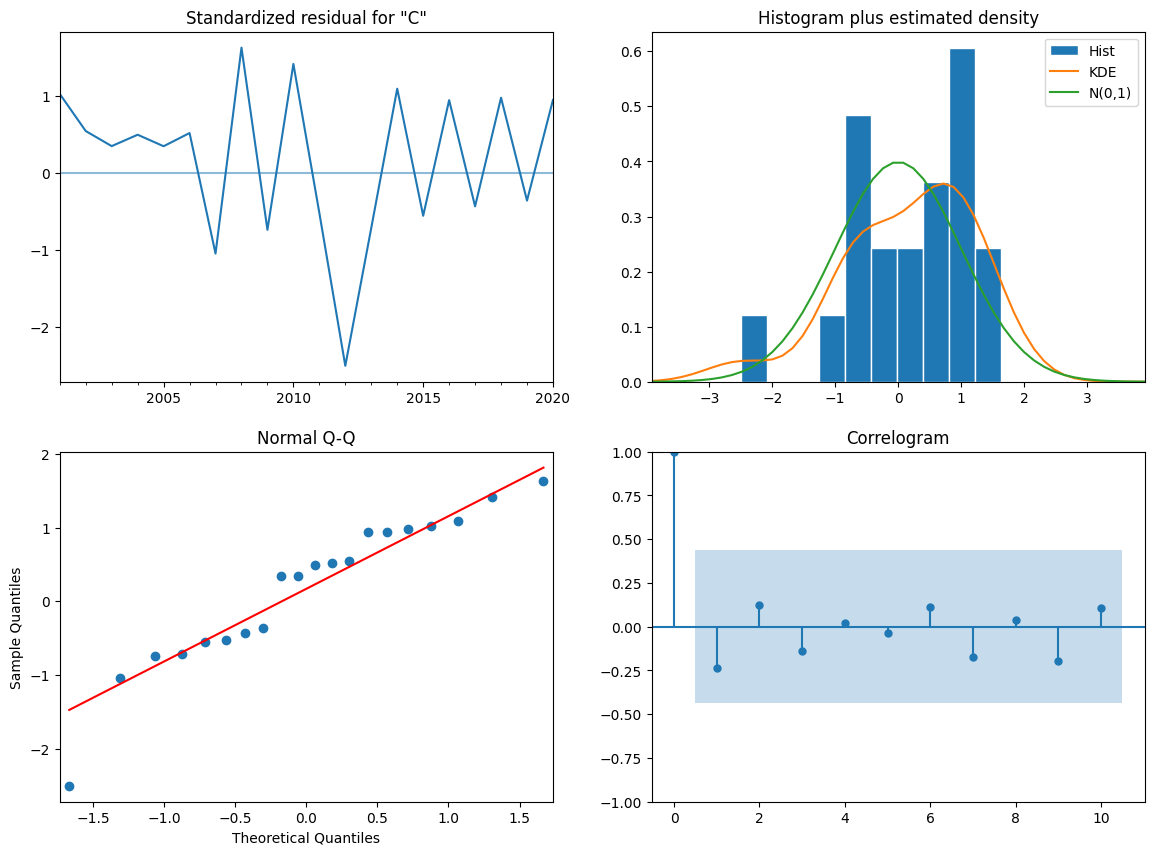

In [354]:
LSO_result.plot_diagnostics(figsize=(14,10))
plt.show()

### the residual is scattered around zero, no correlation in correlogram and the data points pass throug the straight line 

## TEST PREDICTION

In [355]:
LSO_result.predict(start=20, end=22)

2020-01-01    27.491126
2021-01-01    28.491952
2022-01-01    29.459550
Freq: AS-JAN, Name: predicted_mean, dtype: float64

In [356]:
forecast=LSO_result.predict(start=20, end=22)

In [357]:
LSO_forecast=pd.DataFrame(forecast)

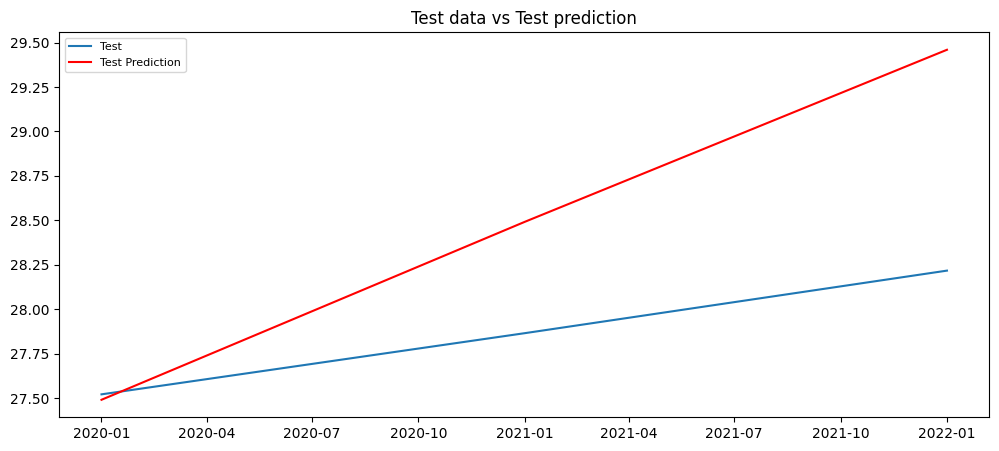

In [358]:
#plot Testing and Forecasted data
plt.figure(figsize=(12, 5), dpi=100)
#plt.plot(train, label='Train')
plt.plot(LSO_test, label='Test')
plt.plot(forecast, label='Test Prediction', color='red')
plt.title('Test data vs Test prediction')
plt.legend(loc='best', fontsize=8)
plt.show()

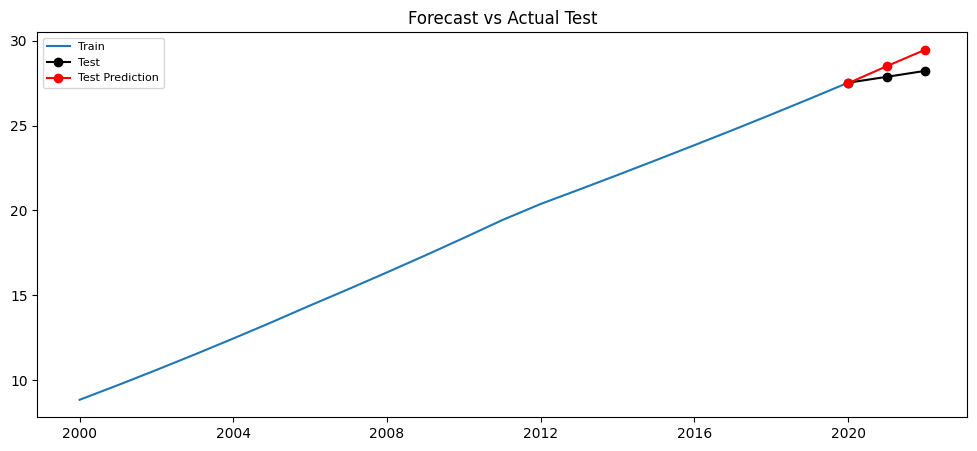

In [359]:
#plot the predictions for test set
plt.figure(figsize=(12, 5), dpi=100)

forecasted=LSO_result.predict(start=20, end=22)

plt.plot(LSO_train, label='Train')
plt.plot(LSO_test, marker='o', label='Test', color='black')
plt.plot(forecasted, marker='o', label='Test Prediction', color='red')
plt.title('Forecast vs Actual Test')
plt.legend(loc='best', fontsize=8)
plt.show()

#### EVALUATE MODEL

In [360]:
LSO_forecast

predicted_mean
2020-01-01       27.491126
2021-01-01       28.491952
2022-01-01       29.459550

In [361]:
# Calculate evaluation metrics
mse = mean_squared_error(LSO_test, LSO_forecast)
rmse = np.sqrt(mse)
mae = mean_absolute_error(LSO_test, LSO_forecast)
me=np.mean(LSO_forecast['predicted_mean']- LSO_test['Coverage'])
mape = np.mean(np.abs(LSO_forecast['predicted_mean']- LSO_test['Coverage']) / np.abs(LSO_test['Coverage']) * 100)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Error (ME): {me}")

Mean Squared Error (MSE): 0.6452682198724329
Root Mean Squared Error (RMSE): 0.8032858892526576
Mean Absolute Percentage Error (MAPE): 2.2533515044631223
Mean Absolute Error (MAE): 0.632946693939123
Mean Error (ME): 0.6125747594162334


### FORECAST FOR YEAR 2030

In [362]:
# Getting forecast 
forecast = LSO_result.get_forecast(steps=10, dynamic=False)
forecast_conf = forecast.conf_int()

In [363]:
forecast_conf

lower Coverage  upper Coverage
2021-01-01       28.428793       28.555111
2022-01-01       29.263177       29.655924
2023-01-01       30.058894       30.790077
2024-01-01       30.821998       31.951531
2025-01-01       31.556511       33.136280
2026-01-01       32.265250       34.341521
2027-01-01       32.950323       35.565159
2028-01-01       33.613388       36.805552
2029-01-01       34.255789       38.061371
2030-01-01       34.878649       39.331506

In [364]:
forecasted=LSO_result.predict(start=20, end=30)
LSO_forecasted=pd.DataFrame(forecasted)

In [365]:
LSO_forecasted

predicted_mean
2020-01-01       27.491126
2021-01-01       28.491952
2022-01-01       29.459550
2023-01-01       30.424485
2024-01-01       31.386765
2025-01-01       32.346396
2026-01-01       33.303385
2027-01-01       34.257741
2028-01-01       35.209470
2029-01-01       36.158580
2030-01-01       37.105077

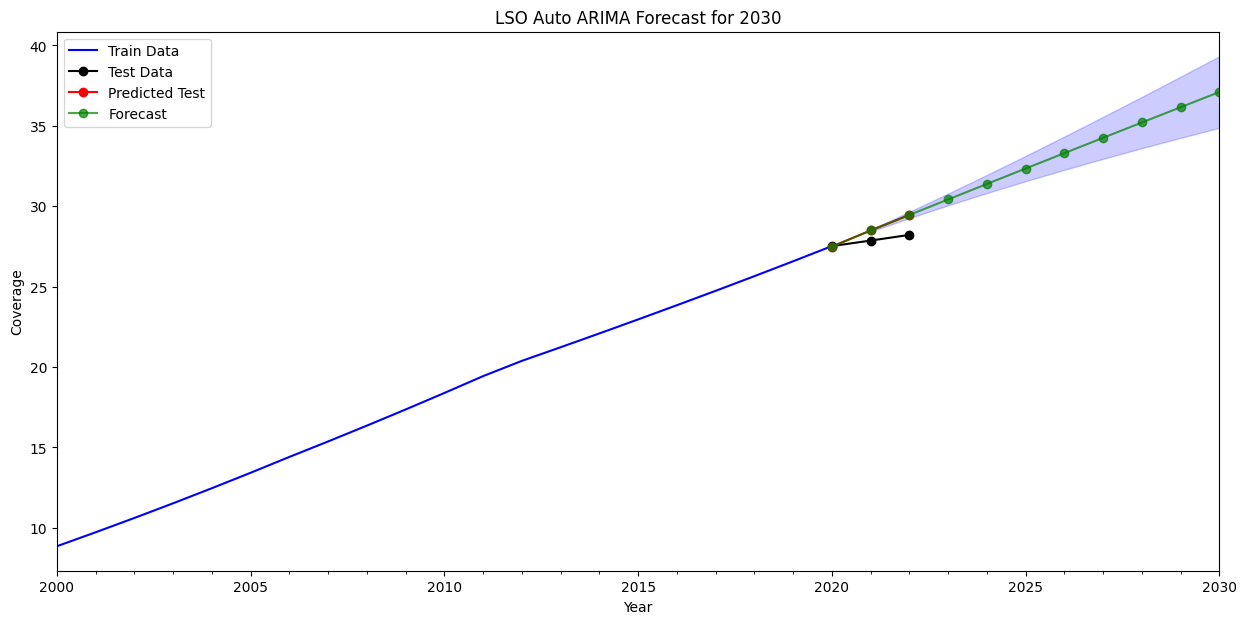

In [366]:
#plot observed values
ax = LSO_train['Coverage'].plot(label='Train Data', color='blue')
ax = LSO_test['Coverage'].plot(label='Test Data', marker='o', color='black')

#plot forecasted test values
ax = LSO_forecast['predicted_mean'].plot(label='Predicted Test', marker='o', color= 'red')

#Plot forecasted values
LSO_forecasted.predicted_mean.plot(ax=ax, marker='o', label='Forecast', color='green', alpha=0.7)

#plot the range for confidence intervals
ax.fill_between(forecast_conf.index,
                forecast_conf.iloc[:, 0],
                forecast_conf.iloc[:, 1], color='b', alpha=0.2)

#set axes labels
ax.set_xlabel('Year')
ax.set_ylabel('Coverage')
plt.title('LSO Auto ARIMA Forecast for 2030')
plt.legend(loc='best')

plt.show()

## MODEL 3: HOLT WINTER

In [367]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [368]:
LSOhwmodel = ExponentialSmoothing(LSO_train.Coverage, trend = 'add').fit()
LSOhwmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       ExponentialSmoothing Model Results                       
================================================================================
Dep. Variable:                 Coverage   No. Observations:                   21
Model:             ExponentialSmoothing   SSE                              0.027
Optimized:                         True   AIC                           -131.871
Trend:                         Additive   BIC                           -127.693
Seasonal:                          None   AICC                          -125.871
Seasonal Periods:                  None   Date:                 Fri, 15 Dec 2023
Box-Cox:                          False   Time:                         21:37:17
Box-Cox Coeff.:                    None                                         
==============================================================================
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            1.0000000                alpha                 True
smoothing_trend            1.0000000                 beta                 True
initial_level              7.9850201                  l.0                 True
initial_trend              0.8677777                  b.0                 True
------------------------------------------------------------------------------
"""

#### TEST PREDICTION

In [369]:
test_pred = LSOhwmodel.predict(start=20, end=22)
test_pred=pd.DataFrame(test_pred)
test_pred

0
2020-01-01  27.504601
2021-01-01  28.465674
2022-01-01  29.409665

In [370]:
LSO_test['Coverage']

Year
2020-01-01    27.521684
2021-01-01    27.865733
2022-01-01    28.217487
Name: Coverage, dtype: float64

<Axes: xlabel='Year'>

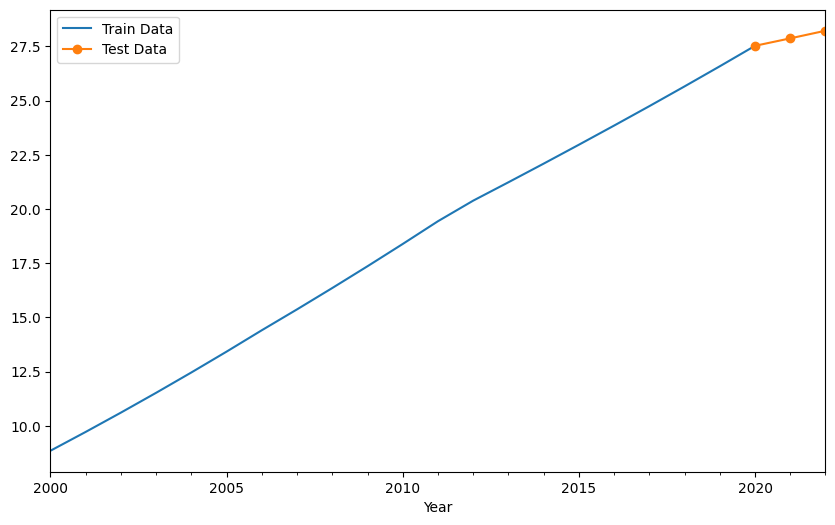

In [371]:
LSO_train['Coverage'].plot(legend=True, label='Train Data', figsize=(10,6))
LSO_test['Coverage'].plot(legend=True, marker = 'o', label='Test Data')

#test_pred.plot(legend=True, marker= 'o', label='Predicted Test')

#### MODEL EVALUATION

In [372]:
# Calculate evaluation metrics
mse = mean_squared_error(LSO_test, test_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(LSO_test, test_pred)
me=np.mean(test_pred[0]- LSO_test['Coverage'])
mape = np.mean(np.abs(test_pred[0] - LSO_test['Coverage']) / np.abs(LSO_test['Coverage']) * 100)


print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Error (ME): {me}")

Mean Squared Error (MSE): 0.5938361740317152
Root Mean Squared Error (RMSE): 0.770607665437942
Mean Absolute Percentage Error (MAPE): 2.1466672261868536
Mean Absolute Error (MAE): 0.6030672006961453
Mean Error (ME): 0.5916786508321484


In [373]:
LSO_safely['Coverage'].mean(), np.sqrt(LSO_safely['Coverage'].var())

(19.086248906402346, 6.25201606664582)

#### FORECAST FOR 2030

In [374]:
model = ExponentialSmoothing(LSO_safely.Coverage, trend ='add').fit()

In [375]:
pred = LSOhwmodel.predict(start=22, end=30)
#pred = model.forecast(steps=8)
pred=pd.DataFrame(pred)
pred

0
2022-01-01  29.409665
2023-01-01  30.353656
2024-01-01  31.297646
2025-01-01  32.241637
2026-01-01  33.185627
2027-01-01  34.129618
2028-01-01  35.073609
2029-01-01  36.017599
2030-01-01  36.961590

#### PLOT ALL ON SAME PLOT

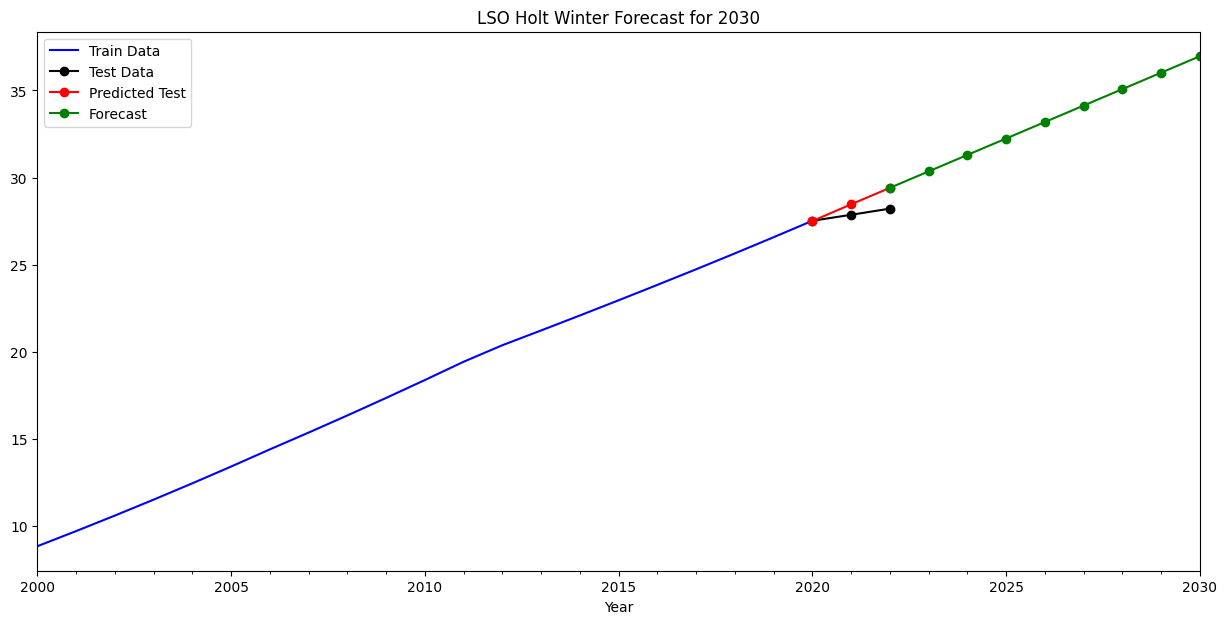

In [376]:
#plot observed values
ax = LSO_train['Coverage'].plot(label='Train Data', color='blue')
ax = LSO_test['Coverage'].plot(label='Test Data', marker='o', color='black')

#plot forecasted test values
ax = test_pred[0].plot(label='Predicted Test', marker='o', color= 'red')
ax = pred[0].plot(label='Forecast', marker='o', color= 'green')

#train, = plt.plot(BFA_train.index, BFA_train,'b.-', label='Train Data')
#test, = plt.plot(BFA_test.index, BFA_test, 'r.-', label= 'Test Data')
#test_pred, = plt.plot(test_pred.index, test_pred,  'g.-', label= 'Predicted Test')
#Plot forecasted values
#test_pred[0].plot(ax=ax, marker='o', label='Forecast', color='orange', alpha=0.7)

plt.legend()
plt.title('LSO Holt Winter Forecast for 2030')
plt.show()

# COUNTRY 3: NIGERIA

## MODEL 1: ARIMA 

Text(0.5, 1.0, 'Basic Coverage from year 2000 to 2022')

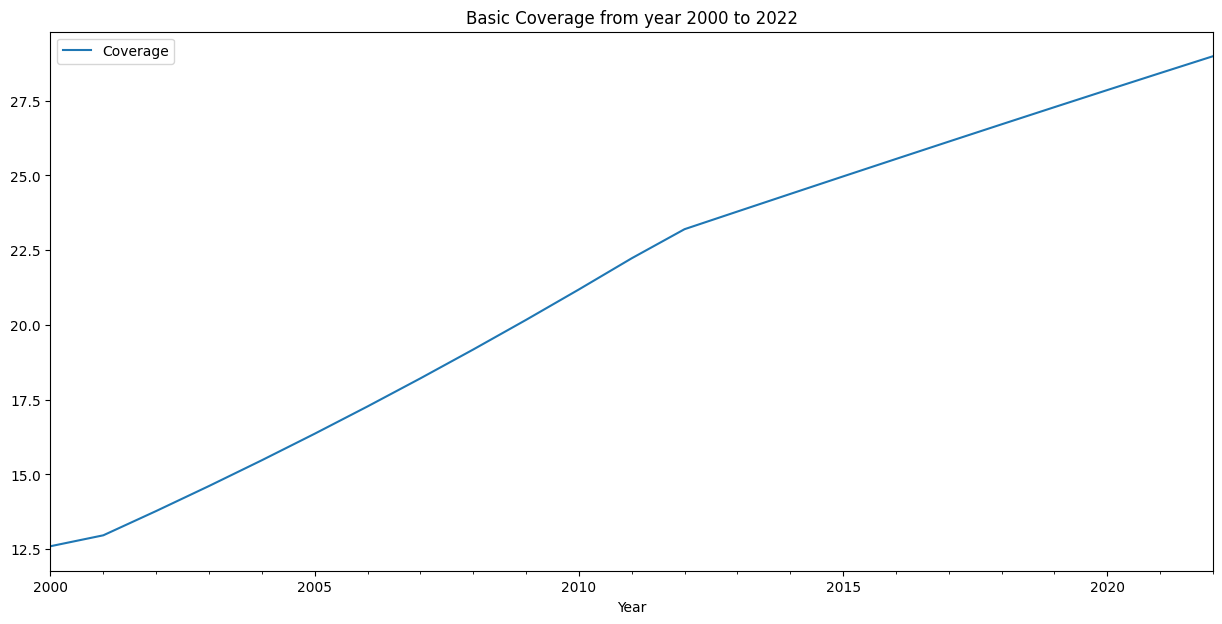

In [377]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 7
NGA_safely.plot()
plt.legend(loc='best')
plt.title('Basic Coverage from year 2000 to 2022')

#### 1) AUGMENTED DICKEY FULLER TEST (ADF)

In [378]:
#a function is created to determine ADF (Augmented Dickey Fuller (ADF) test) which determines if a time series is stationary or not
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
    print('Results of Augmented Dickey-Fuller Test:')
    NGA_safely_test= adfuller(dataset, autolag ='AIC')
    NGA_safely_output= pd.Series(NGA_safely_test[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'Number of observations Used'])
    for key, value in NGA_safely_test[4].items():
        NGA_safely_output['Critical Value (%s)'%key ] = value
    print(NGA_safely_output)
        
adf_test(NGA_safely)  

Results of Augmented Dickey-Fuller Test:
Test Statistic                 -1.809482
p-value                         0.375764
#Lags Used                      2.000000
Number of observations Used    20.000000
Critical Value (1%)            -3.809209
Critical Value (5%)            -3.021645
Critical Value (10%)           -2.650713
dtype: float64


### the series is non stationary

#### ii) KWIATKOWSKI-PHILLIPS-SCHMIDT-SHIN (KPSS) Test

In [379]:
from statsmodels.tsa.stattools import kpss

In [380]:
def kpss_test(dataset):
    print('Results of KPSS test')
    NGA_safely_test = kpss(dataset, regression='c', nlags='auto')
    NGA_safely_output=pd.Series(NGA_safely_test[0:3], index=['Test Statistic', 'p-value', '#lags Used'])
    for key, value in NGA_safely_test[3].items():
        NGA_safely_output['Critical Value (%s)'%key] = value
    print(NGA_safely_output)
    
kpss_test(NGA_safely['Coverage'])

Results of KPSS test
Test Statistic           0.678480
p-value                  0.015502
#lags Used               3.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


In [381]:
from statsmodels.tsa.stattools import kpss
def kpss_test(series, **kw):
    statistic, p_value, n_lags, critical_values =kpss(series, **kw)
    
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critical Values:')
    for key, value in critical_values.items():
        print(f' {key}: {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else""} stationary')
kpss_test(NGA_safely)

KPSS Statistic: 0.6784803025374662
p-value: 0.015501790678412166
num lags: 3
Critical Values:
 10%: 0.347
 5%: 0.463
 2.5%: 0.574
 1%: 0.739
Result: The series is not  stationary


#### iii) ROLLING STATISTICS

In [382]:
#get rolling statistics
rolling_mean = NGA_safely['Coverage'].rolling(window=3).mean()
rolling_std = NGA_safely['Coverage'].rolling(window=3).std()

Text(0.5, 1.0, 'Rolling Mean & Standard Deviation')

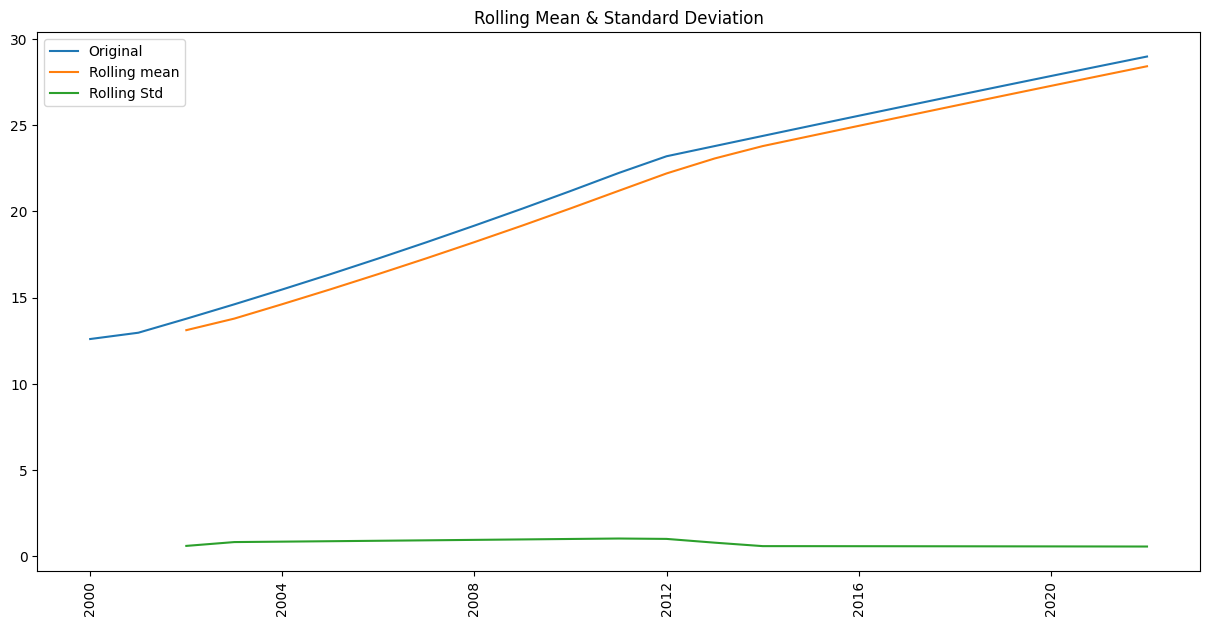

In [383]:
#plot rolling statistics
original_series = plt.plot(NGA_safely['Coverage'], label='Original')
mean = plt.plot(rolling_mean, label='Rolling mean')
std = plt.plot(rolling_std, label='Rolling Std')
plt.legend(loc='best')
plt.xticks(rotation=90)
plt.title('Rolling Mean & Standard Deviation')

### PARAMETER ANALYSIS FOR ARIMA -p, d, q

#### AUTOCORRELATION FACTOR (ACF), q

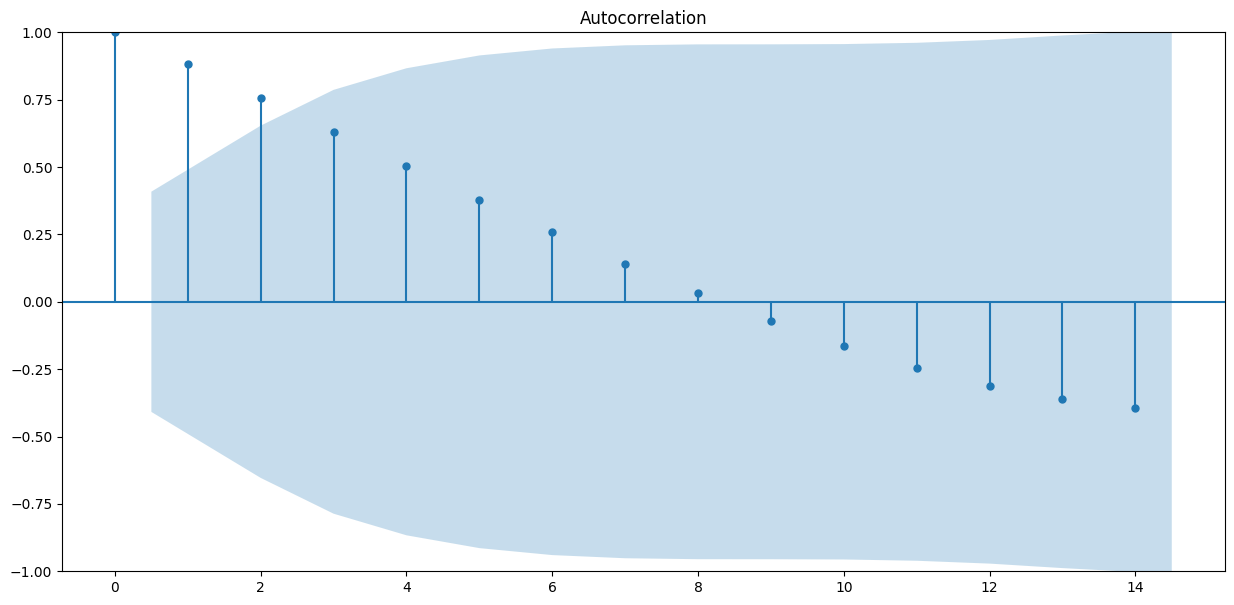

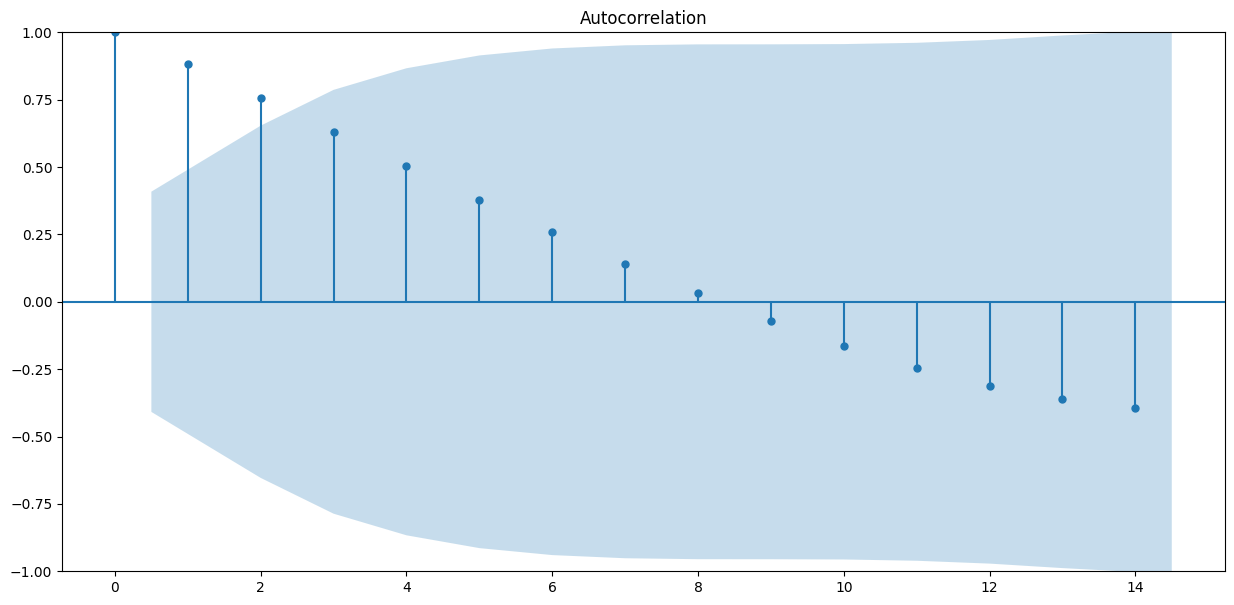

In [384]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(NGA_safely['Coverage'])

### q=2

#### iii) PARTIAL AUTOCORRELATION FACTOR (PACF), p

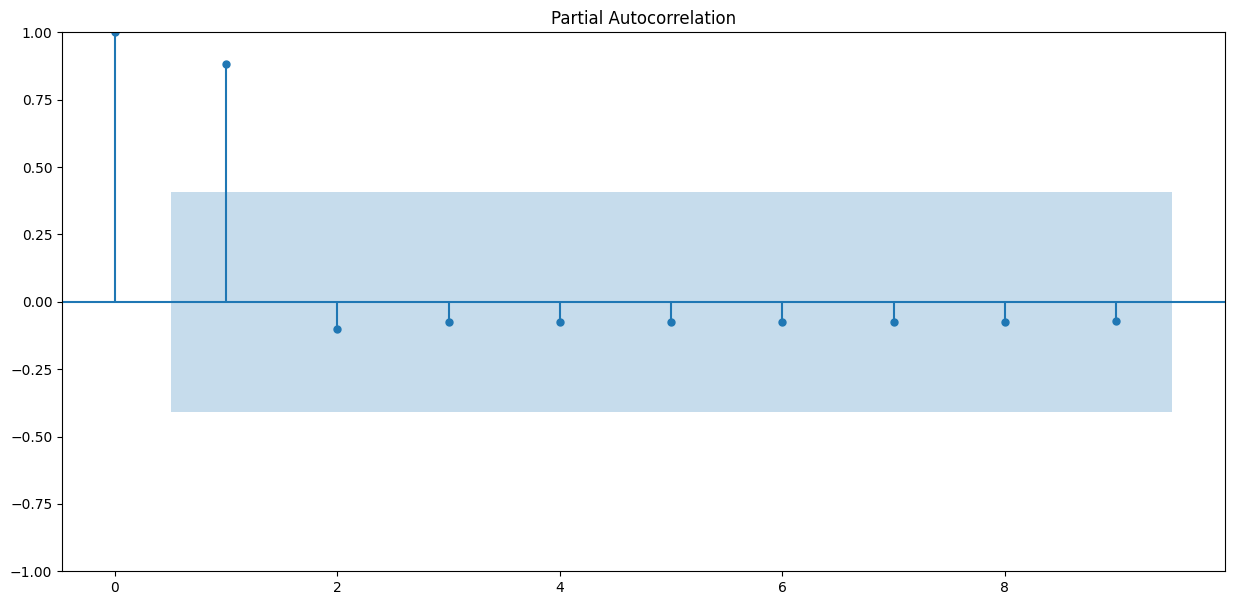

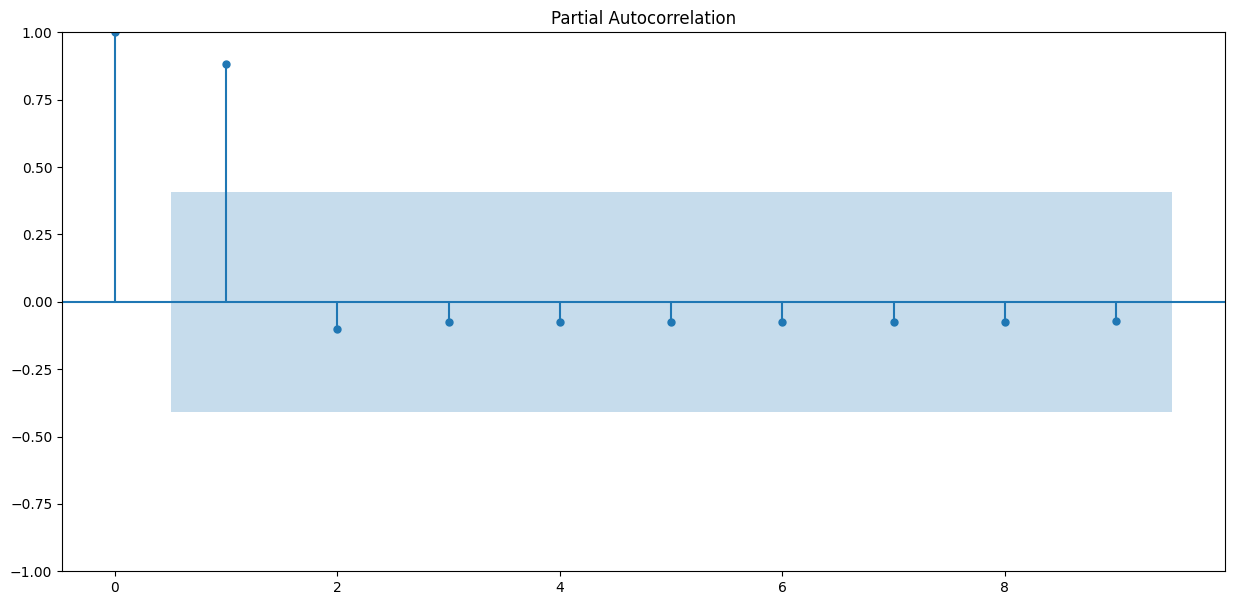

In [385]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(NGA_safely['Coverage'], lags=9)

### p=1

#### GRID SEARCH FOR OPTIMAL PARAMETERS

In [386]:
#Finding the best value for ARIMA
import itertools

#define the range of p,d,q parameters to take any value between 0 and 5
p=d=q=range(0,2)


#generate all possible combinations of p, d and q 
pdq = list(itertools.product(p,d,q))

#loop through all combinations of p, d, q and fit ARIMA model
warnings.filterwarnings("ignore") #to ignore warnings

for param in pdq:
    try:
        model_arima = ARIMA(NGA_safely, order=param, enforce_invertibility=False, enforce_stationarity=False)
        model_arima_fit = model_arima.fit()
        print(param, model_arima_fit.aic)
    except:
        continue
#The AIC is an estimator of in sample prediction error and thereby relative quality of statistical models for a given set of data

(0, 0, 0) 137.1957529665898
(0, 0, 1) 107.43608087643555
(0, 1, 0) 51.40580559646569
(0, 1, 1) 26.52759696719619
(1, 0, 0) -8.171958663250257
(1, 0, 1) -32.498504375340275
(1, 1, 0) -22.01213328792305
(1, 1, 1) -35.59548503925429


#### Parameter p, d, q = (1, 1, 1) with the lowestt AIC of -35.59548503925429 is selected

#### SPLIT DATA

In [387]:
NGA_train=NGA_safely['2000-01-01':'2020-01-01']
NGA_test=NGA_safely['2020-01-01':'2022-01-01']

In [388]:
model_arima = ARIMA(NGA_train, order=(1, 1, 1), enforce_invertibility=False) 
model_arima_fit = model_arima.fit()

print(model_arima_fit.summary())

                               SARIMAX Results                                
Dep. Variable:               Coverage   No. Observations:                   21
Model:                 ARIMA(1, 1, 1)   Log Likelihood                  10.436
Date:                Fri, 15 Dec 2023   AIC                            -14.872
Time:                        21:37:19   BIC                            -11.885
Sample:                    01-01-2000   HQIC                           -14.289
                         - 01-01-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9628      0.053     18.204      0.000       0.859       1.066
ma.L1          0.2590      0.417      0.621      0.534      -0.558       1.076
sigma2         0.0176      0.005      3.858      0.0

#### TEST PREDICTION

In [389]:
#prediction of test data with ARIMA
prediction = model_arima_fit.predict(start=20, end=22)
NGA_prediction=pd.DataFrame(prediction)
NGA_prediction

predicted_mean
2020-01-01       27.839186
2021-01-01       28.407085
2022-01-01       28.940068

#### FORECAST FOR YEAR 2030

In [390]:
#forecast of 2030 with ARIMA
forecast = model_arima_fit.get_forecast(steps=10)
forecast_conf = forecast.conf_int()

#put confidence intervals in df
NGA_forecast =pd.DataFrame(forecast_conf)
NGA_forecast

lower Coverage  upper Coverage
2021-01-01       28.146841       28.667328
2022-01-01       28.305997       29.574140
2023-01-01       28.365054       30.541363
2024-01-01       28.342799       31.551690
2025-01-01       28.251702       32.594072
2026-01-01       28.100943       33.660699
2027-01-01       27.897707       34.745706
2028-01-01       27.647843       35.844512
2029-01-01       27.356248       36.953443
2030-01-01       27.027105       38.069492

In [391]:
forecast.predicted_mean

2021-01-01    28.407085
2022-01-01    28.940068
2023-01-01    29.453208
2024-01-01    29.947244
2025-01-01    30.422887
2026-01-01    30.880821
2027-01-01    31.321707
2028-01-01    31.746178
2029-01-01    32.154846
2030-01-01    32.548299
Freq: AS-JAN, Name: predicted_mean, dtype: float64

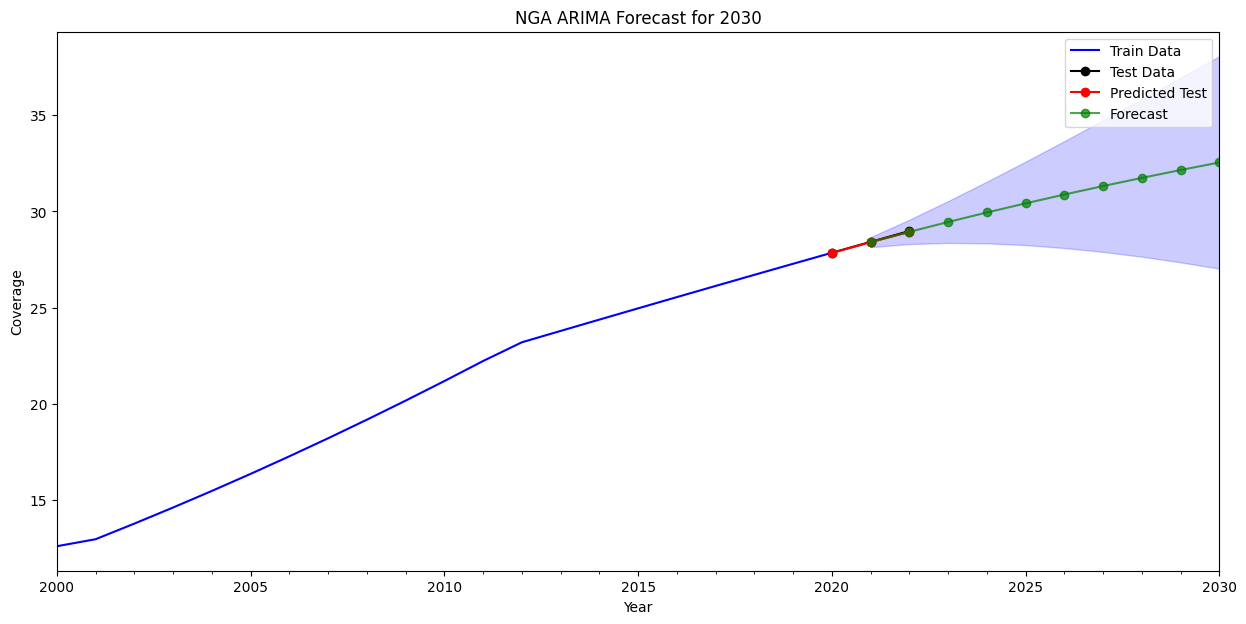

In [392]:
#plot observed values
ax = NGA_train['Coverage'].plot(label='Train Data', color='blue')
ax = NGA_test['Coverage'].plot(label='Test Data', marker='o', color='black')

#plot predicted test values
ax = NGA_prediction['predicted_mean'].plot(label='Predicted Test', marker='o', color= 'red')

#Plot forecasted values
forecast.predicted_mean.plot(ax=ax, marker='o', label='Forecast', color='green', alpha=0.7)

#plot the range for confidence intervals
ax.fill_between(forecast_conf.index,
                forecast_conf.iloc[:, 0],
                forecast_conf.iloc[:, 1], color='b', alpha=0.2)

#set axes labels
ax.set_xlabel('Year')
ax.set_ylabel('Coverage')
plt.title('NGA ARIMA Forecast for 2030')
plt.legend(loc='best')

plt.show()

#### EVALUATE MODEL

In [393]:
# Calculate evaluation metrics
mse = mean_squared_error(NGA_test, NGA_prediction)
rmse = np.sqrt(mse)
mae = mean_absolute_error(NGA_test, NGA_prediction)
me=np.mean(NGA_prediction['predicted_mean'] - NGA_test['Coverage'])
mape = np.mean(np.abs(NGA_prediction['predicted_mean'] - NGA_test['Coverage']) / np.abs(NGA_test['Coverage']) * 100)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Error (ME): {me}")

Mean Squared Error (MSE): 0.0008025427142951703
Root Mean Squared Error (RMSE): 0.028329184850524207
Mean Absolute Percentage Error (MAPE): 0.08501454401720804
Mean Absolute Error (MAE): 0.024355462806746903
Mean Error (ME): -0.024355462806746903


#### MODEL DIAGNOSTICS

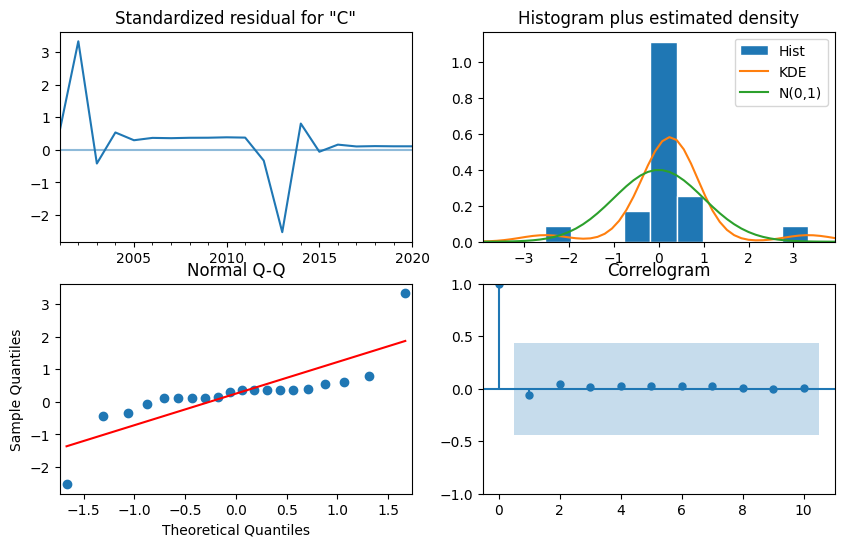

In [394]:
model_arima_fit.plot_diagnostics(figsize=(10,6))
plt.show()

### the residual is s distributed around zero and there is no correlation in the correlogram

## MODEL 2: AUTO ARIMA

#### SPLIT DATA

In [395]:
NGA_train=NGA_safely['2000-01-01':'2020-01-01']
NGA_test=NGA_safely['2020-01-01':'2022-01-01']

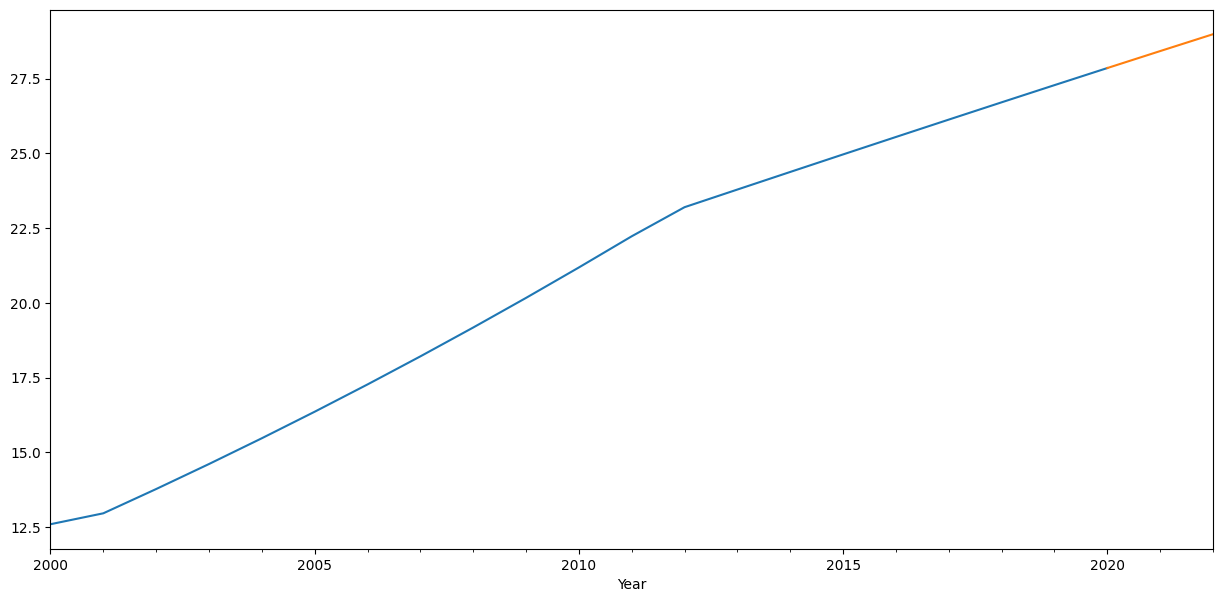

In [396]:
#plot train and test
NGA_train['Coverage'].plot()
NGA_test['Coverage'].plot()
plt.show()

#### FIT ARIMA INTO MODEL

In [397]:
#### fit auto_arima into BFA dataset
NGA_model = pm.auto_arima(NGA_train,
                          m=1,
                          seasonal=False,
                          trace=True,
                          error_action='ignore',
                          stepwise=True,
                          suppress_warnings=True)  

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-15.075, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-3.928, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-17.700, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-12.681, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=49.229, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-16.669, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-16.461, Time=0.11 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-17.892, Time=0.18 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-15.438, Time=0.25 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-14.562, Time=0.19 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-14.768, Time=0.15 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-13.873, Time=0.32 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-12.950, Time=0.08 sec

Best model:  ARIMA(2,1,1)(0,0,0)[0] intercept
Total fit time: 1.811 seconds


In [398]:
NGA_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   21
Model:               SARIMAX(2, 1, 1)   Log Likelihood                  13.946
Date:                Fri, 15 Dec 2023   AIC                            -17.892
Time:                        21:37:22   BIC                            -12.914
Sample:                    01-01-2000   HQIC                           -16.921
                         - 01-01-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0813      0.081      0.999      0.318      -0.078       0.241
ar.L1          1.7632      0.202      8.744      0.000       1.368       2.158
ar.L2         -0.8725      0.158     -5.510      0.000      -1.183      -0.562
ma.L1         -0.9880      5.402     -0.183      0.855     -11.575       9.599
sigma2         0.0122      0.062      0.196      0.845      -0.110       0.135
===================================================================================
Ljung-Box (L1) (Q):                   2.65   Jarque-Bera (JB):                 4.04
Prob(Q):                              0.10   Prob(JB):                         0.13
Heteroskedasticity (H):               0.08   Skew:                             0.25
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [399]:
NGA_arima = sm.tsa.ARIMA(NGA_train, order=(2,1,1))

In [400]:
NGA_result = NGA_arima.fit()

#### According to the algorithm the best ARIMA model is ARIMA (2, 1, 1). The ARIMA (2, 1, 1) representing p=2, d=1, q=1 model is chosen as the best-fitting model based on its AIC (Akaike Information Criterion) value. There is no seasonality in the data as represented by [0,0,0][0].

#### RESIDUAL PLOTS

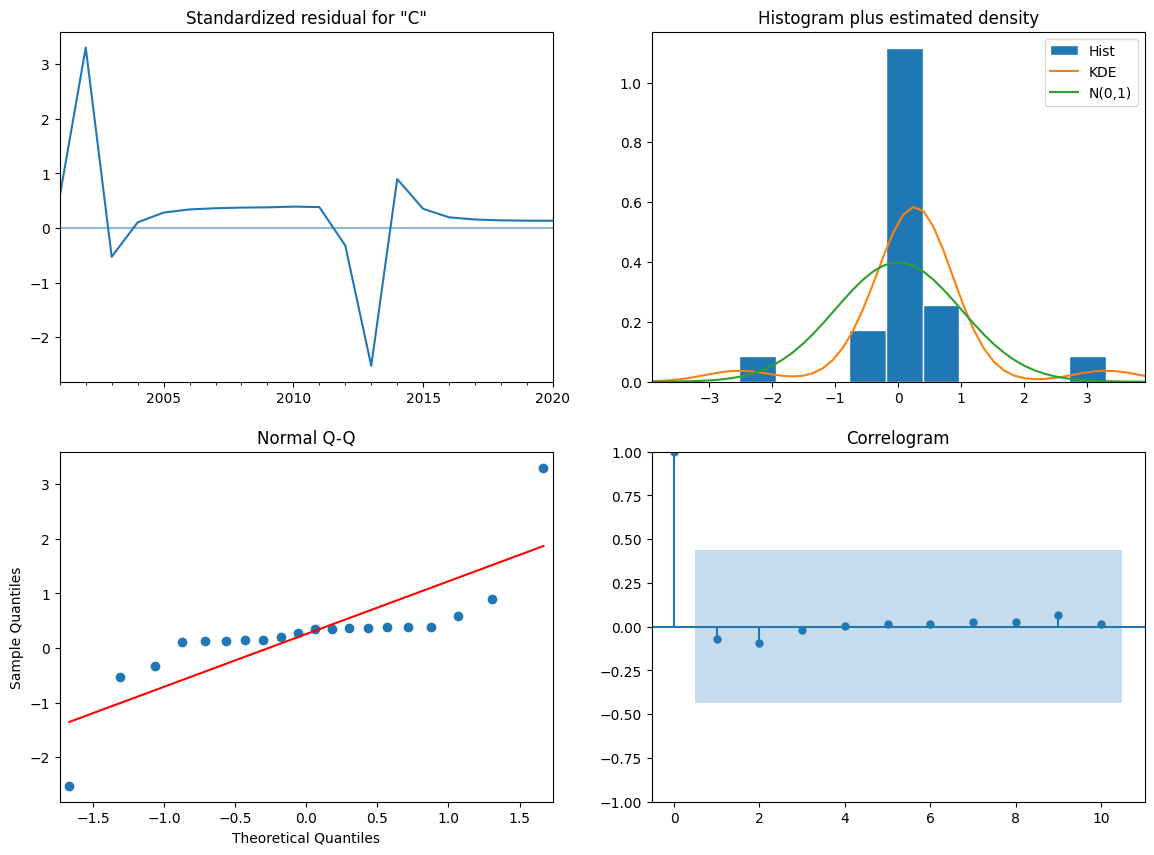

In [401]:
NGA_result.plot_diagnostics(figsize=(14,10))
plt.show()

#### TEST PREDICTION

In [402]:
NGA_result.predict(start=20, end=22)

2020-01-01    27.835977
2021-01-01    28.403854
2022-01-01    28.929766
Freq: AS-JAN, Name: predicted_mean, dtype: float64

In [403]:
forecast=NGA_result.predict(start=20, end=22)

In [404]:
NGA_forecast=pd.DataFrame(forecast)

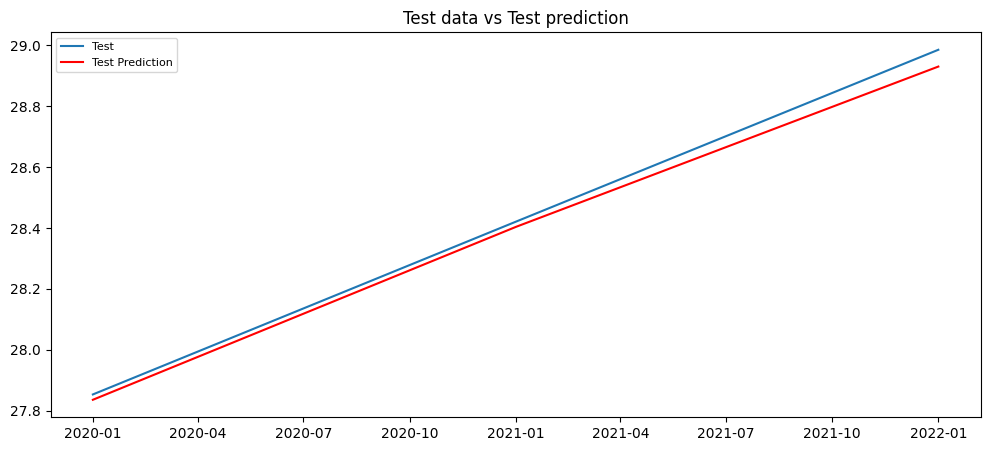

In [405]:
#plot Testing and Forecasted data
plt.figure(figsize=(12, 5), dpi=100)
#plt.plot(train, label='Train')
plt.plot(NGA_test, label='Test')
plt.plot(forecast, label='Test Prediction', color='red')
plt.title('Test data vs Test prediction')
plt.legend(loc='best', fontsize=8)
plt.show()

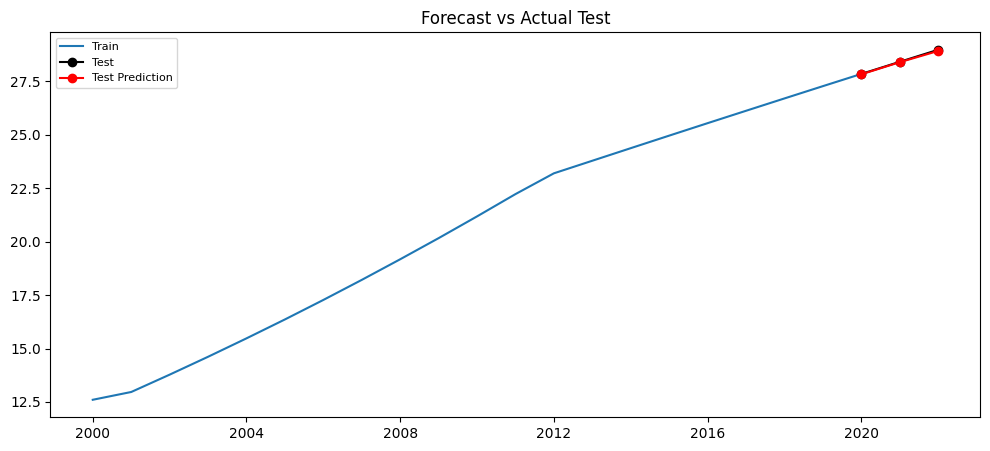

In [406]:
#plot the predictions for test set
plt.figure(figsize=(12, 5), dpi=100)

forecasted=NGA_result.predict(start=20, end=22)

plt.plot(NGA_train, label='Train')
plt.plot(NGA_test, marker='o', label='Test', color='black')
plt.plot(forecasted, marker='o', label='Test Prediction', color='red')
plt.title('Forecast vs Actual Test')
plt.legend(loc='best', fontsize=8)
plt.show()

#### EVALUATE MODEL

In [407]:
NGA_forecast

predicted_mean
2020-01-01       27.835977
2021-01-01       28.403854
2022-01-01       28.929766

In [408]:
# Calculate evaluation metrics
mse = mean_squared_error(NGA_test, NGA_forecast)
rmse = np.sqrt(mse)
mae = mean_absolute_error(NGA_test, NGA_forecast)
me=np.mean(NGA_forecast['predicted_mean']- NGA_test['Coverage'])
mape = np.mean(np.abs(NGA_forecast['predicted_mean']- NGA_test['Coverage']) / np.abs(NGA_test['Coverage']) * 100)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Error (ME): {me}")

Mean Squared Error (MSE): 0.0012132902538780892
Root Mean Squared Error (RMSE): 0.03483231622901482
Mean Absolute Percentage Error (MAPE): 0.1044922921782983
Mean Absolute Error (MAE): 0.029936250039810375
Mean Error (ME): -0.029936250039810375


#### FORECAST FOR YEAR 2030

In [409]:
# Getting forecast for 8 years
forecast = NGA_result.get_forecast(steps=10, dynamic=False)
forecast_conf = forecast.conf_int()

In [410]:
forecast_conf

lower Coverage  upper Coverage
2021-01-01       28.144580       28.663128
2022-01-01       28.299293       29.560238
2023-01-01       28.321705       30.538162
2024-01-01       28.233176       31.575474
2025-01-01       28.051544       32.655585
2026-01-01       27.791401       33.765799
2027-01-01       27.464656       34.896393
2028-01-01       27.081080       36.039876
2029-01-01       26.648763       37.190434
2030-01-01       26.174472       38.343514

In [411]:
forecasted=NGA_result.predict(start=20, end=30)
NGA_forecasted=pd.DataFrame(forecasted)

In [412]:
NGA_forecasted

predicted_mean
2020-01-01       27.835977
2021-01-01       28.403854
2022-01-01       28.929766
2023-01-01       29.429933
2024-01-01       29.904325
2025-01-01       30.353565
2026-01-01       30.778600
2027-01-01       31.180524
2028-01-01       31.560478
2029-01-01       31.919598
2030-01-01       32.258993

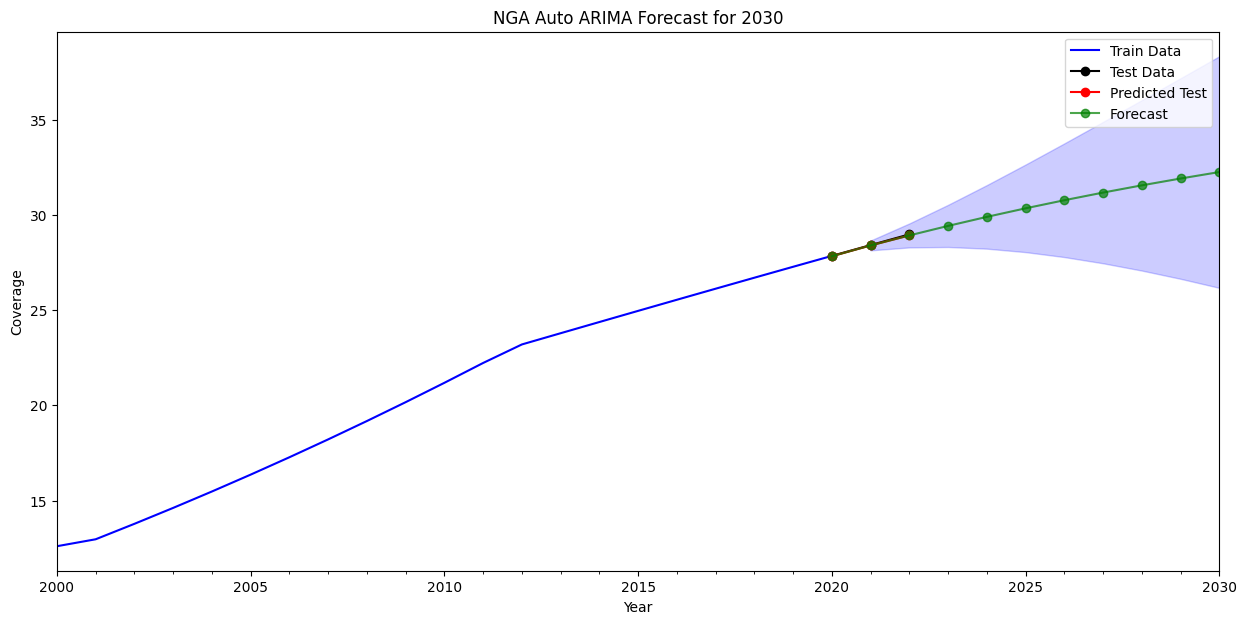

In [413]:
#plot observed values
ax = NGA_train['Coverage'].plot(label='Train Data', color='blue')
ax = NGA_test['Coverage'].plot(label='Test Data', marker='o', color='black')

#plot forecasted test values
ax = NGA_forecast['predicted_mean'].plot(label='Predicted Test', marker='o', color= 'red')

#Plot forecasted values
NGA_forecasted.predicted_mean.plot(ax=ax, marker='o', label='Forecast', color='green', alpha=0.7)

#plot the range for confidence intervals
ax.fill_between(forecast_conf.index,
                forecast_conf.iloc[:, 0],
                forecast_conf.iloc[:, 1], color='b', alpha=0.2)

#set axes labels
ax.set_xlabel('Year')
ax.set_ylabel('Coverage')
plt.title('NGA Auto ARIMA Forecast for 2030')
plt.legend(loc='best')

plt.show()

## MODEL 3: HOLT WINTER

In [414]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [415]:
NGAhwmodel = ExponentialSmoothing(NGA_train.Coverage, trend = 'add').fit()
NGAhwmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       ExponentialSmoothing Model Results                       
================================================================================
Dep. Variable:                 Coverage   No. Observations:                   21
Model:             ExponentialSmoothing   SSE                              0.357
Optimized:                         True   AIC                            -77.575
Trend:                         Additive   BIC                            -73.397
Seasonal:                          None   AICC                           -71.575
Seasonal Periods:                  None   Date:                 Fri, 15 Dec 2023
Box-Cox:                          False   Time:                         21:37:24
Box-Cox Coeff.:                    None                                         
==============================================================================
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            1.0000000                alpha                 True
smoothing_trend            1.0000000                 beta                 True
initial_level              12.235753                  l.0                 True
initial_trend              0.3652316                  b.0                 True
------------------------------------------------------------------------------
"""

#### TEST PREDICTION

In [416]:
test_pred = NGAhwmodel.predict(start=20, end=22)
test_pred=pd.DataFrame(test_pred)
test_pred

0
2020-01-01  27.856863
2021-01-01  28.424644
2022-01-01  28.995797

In [417]:
NGA_test['Coverage']

Year
2020-01-01    27.853491
2021-01-01    28.421029
2022-01-01    28.984885
Name: Coverage, dtype: float64

<Axes: xlabel='Year'>

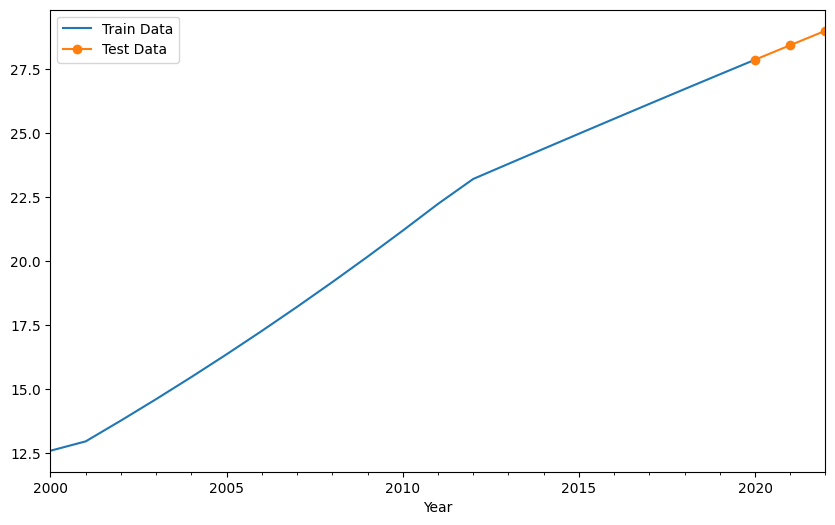

In [418]:
NGA_train['Coverage'].plot(legend=True, label='Train Data', figsize=(10,6))
NGA_test['Coverage'].plot(legend=True, marker = 'o', label='Test Data')

#test_pred.plot(legend=True, marker= 'o', label='Predicted Test')

#### MODEL EVALUATION

In [419]:
# Calculate evaluation metrics
mse = mean_squared_error(NGA_test, test_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(NGA_test, test_pred)
me=np.mean(test_pred[0]- NGA_test['Coverage'])
mape = np.mean(np.abs(test_pred[0] - NGA_test['Coverage']) / np.abs(NGA_test['Coverage']) * 100)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Error (ME): {me}")

Mean Squared Error (MSE): 4.783391084101789e-05
Root Mean Squared Error (RMSE): 0.0069162063908632665
Mean Absolute Percentage Error (MAPE): 0.02082333242543934
Mean Absolute Error (MAE): 0.005966060927408516
Mean Error (ME): 0.005966060927408516


In [420]:
NGA_safely['Coverage'].mean(), np.sqrt(NGA_safely['Coverage'].var())

(21.361429861645178, 5.346699785946806)

#### FORECAST FOR 2030

In [421]:
model = ExponentialSmoothing(NGA_safely.Coverage, trend ='add').fit()

In [422]:
pred = NGAhwmodel.predict(start=22, end=30)
#pred = model.forecast(steps=8)
pred=pd.DataFrame(pred)
pred

0
2022-01-01  28.995797
2023-01-01  29.566950
2024-01-01  30.138103
2025-01-01  30.709255
2026-01-01  31.280408
2027-01-01  31.851561
2028-01-01  32.422714
2029-01-01  32.993867
2030-01-01  33.565020

#### PLOT ALL ON SAME PLOT

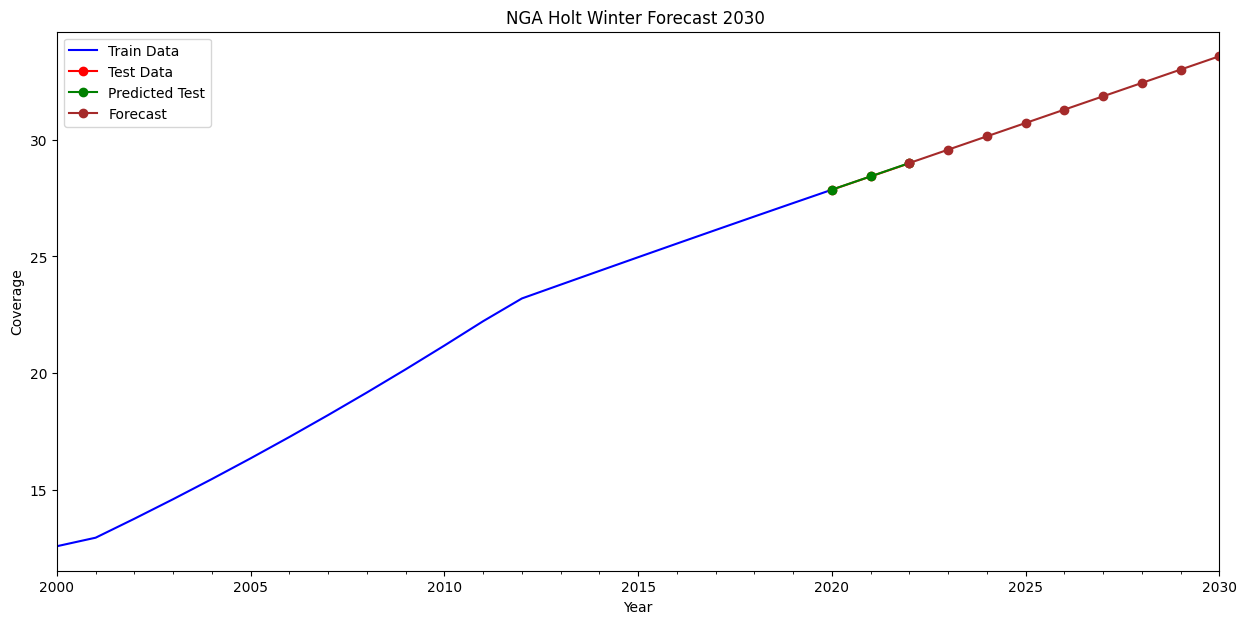

In [423]:
#plot observed values
ax = NGA_train['Coverage'].plot(label='Train Data', color='blue')
ax = NGA_test['Coverage'].plot(label='Test Data', marker='o', color='red')

#plot forecasted test values
ax = test_pred[0].plot(label='Predicted Test', marker='o', color= 'green')
ax = pred[0].plot(label='Forecast', marker='o', color= 'brown')

#train, = plt.plot(BFA_train.index, BFA_train,'b.-', label='Train Data')
#test, = plt.plot(BFA_test.index, BFA_test, 'r.-', label= 'Test Data')
#test_pred, = plt.plot(test_pred.index, test_pred,  'g.-', label= 'Predicted Test')
#Plot forecasted values
#test_pred[0].plot(ax=ax, marker='o', label='Forecast', color='orange', alpha=0.7)

plt.legend()
plt.title('NGA Holt Winter Forecast 2030 ')
plt.ylabel('Coverage')
plt.show()

In [424]:
jmp_mau =jmp[jmp['ISO3'] =='MUS']

# EXTRA

In [425]:
REU=jmp[jmp['ISO3']=='REU']

In [426]:
REU_safely=REU[REU['Service_level']=='Safely managed service']

In [427]:
REU_safely['Year'] = pd.to_datetime(REU_safely['Year'].astype(str), format='%Y-%m')

In [428]:
REU_safely=REU_safely[['Year', 'Coverage']]

In [429]:
REU_safely.set_index('Year', inplace=True)

# COUNTRY 6: REUNION

## MODEL 1: ARIMA 

Text(0.5, 1.0, 'Basic Coverage from year 2000 to 2022')

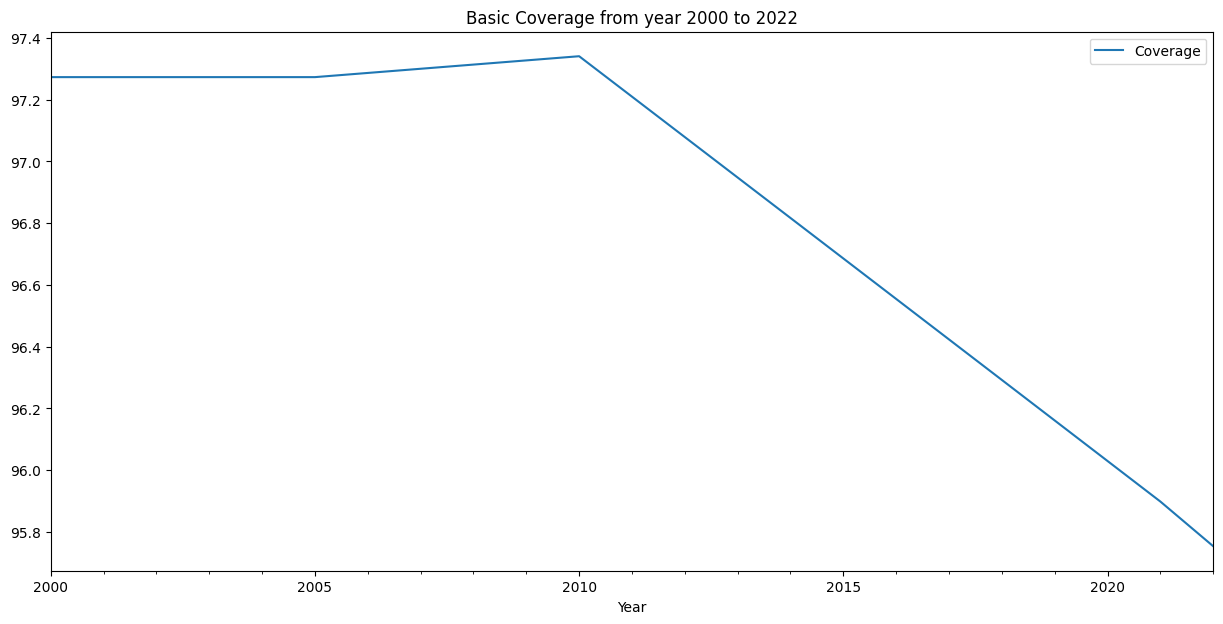

In [430]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 7
REU_safely.plot()
plt.legend(loc='best')
plt.title('Basic Coverage from year 2000 to 2022')

#### 1) AUGMENTED DICKEY FULLER TEST (ADF)

In [431]:
#a function is created to determine ADF (Augmented Dickey Fuller (ADF) test) which determines if a time series is stationary or not
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
    print('Results of Augmented Dickey-Fuller Test:')
    REU_safely_test= adfuller(dataset, autolag ='AIC')
    REU_safely_output= pd.Series(REU_safely_test[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'Number of observations Used'])
    for key, value in  REU_safely_test[4].items():
        REU_safely_output['Critical Value (%s)'%key ] = value
    print(REU_safely_output)
        
adf_test(REU_safely)  

Results of Augmented Dickey-Fuller Test:
Test Statistic                  0.161657
p-value                         0.970027
#Lags Used                      1.000000
Number of observations Used    21.000000
Critical Value (1%)            -3.788386
Critical Value (5%)            -3.013098
Critical Value (10%)           -2.646397
dtype: float64


#### ii) KWIATKOWSKI-PHILLIPS-SCHMIDT-SHIN (KPSS) Test

In [432]:
from statsmodels.tsa.stattools import kpss

In [433]:
def kpss_test(dataset):
    print('Results of KPSS test')
    REU_safely_test = kpss(dataset, regression='c', nlags='auto')
    REU_safely_output=pd.Series(REU_safely_test[0:3], index=['Test Statistic', 'p-value', '#lags Used'])
    for key, value in REU_safely_test[3].items():
        REU_safely_output['Critical Value (%s)'%key] = value
    print(REU_safely_output)
    
kpss_test(REU_safely['Coverage'])

Results of KPSS test
Test Statistic           0.595096
p-value                  0.023082
#lags Used               3.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


#### Test statistic is greater than p-value, hence the series is non stationary

#### iii) ROLLING STATISTICS

In [434]:
#get rolling statistics
rolling_mean = REU_safely['Coverage'].rolling(window=3).mean()
rolling_std = REU_safely['Coverage'].rolling(window=3).std()

Text(0.5, 1.0, 'Rolling Mean & Standard Deviation')

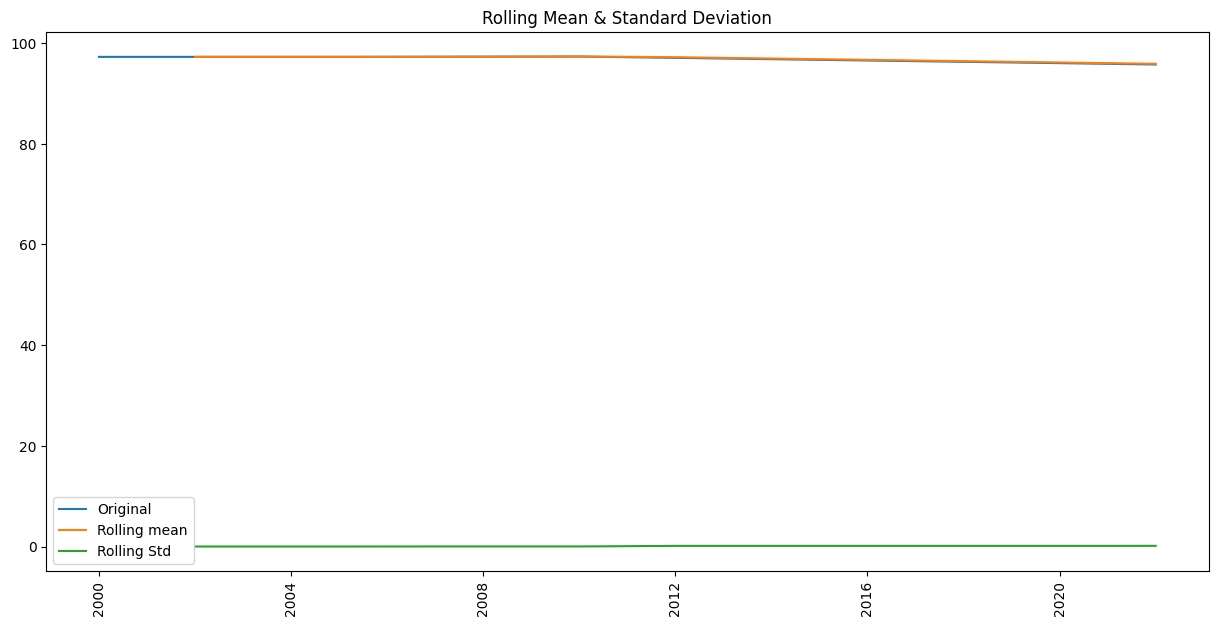

In [435]:
#plot rolling statistics
original_series = plt.plot(REU_safely['Coverage'], label='Original')
mean = plt.plot(rolling_mean, label='Rolling mean')
std = plt.plot(rolling_std, label='Rolling Std')
plt.legend(loc='best')
plt.xticks(rotation=90)
plt.title('Rolling Mean & Standard Deviation')

#### The rolling standard deviation is constant but the rolling mean is not. This shows that the data is non stationary

### PARAMETER ANALYSIS FOR ARIMA -p, d, q

#### AUTOCORRELATION FACTOR (ACF), q

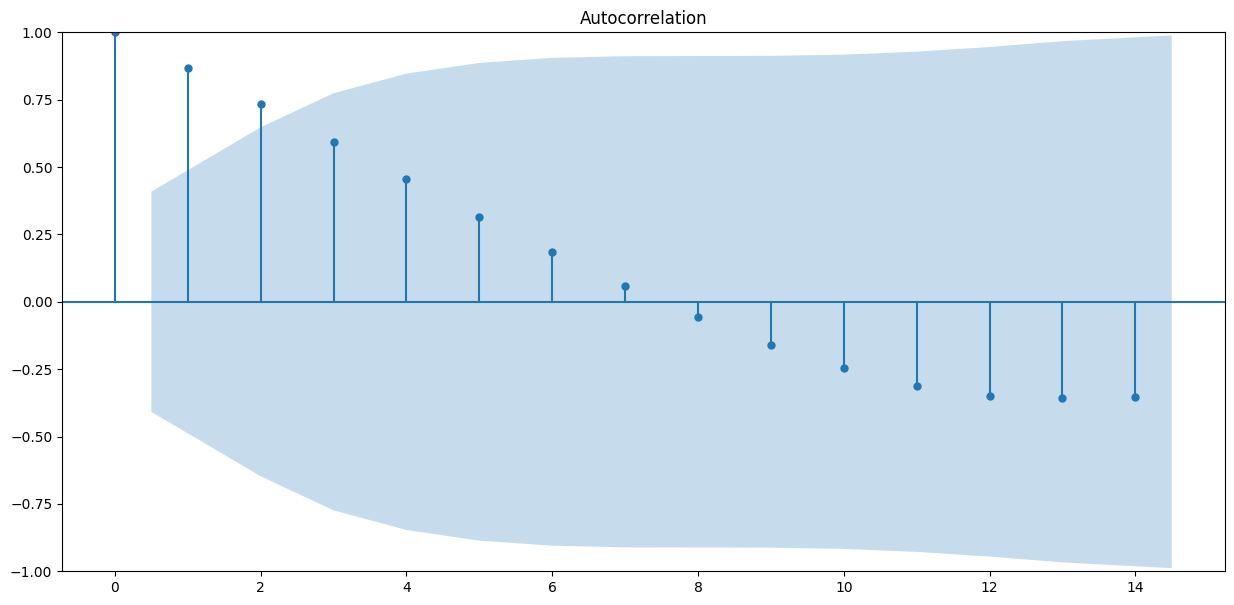

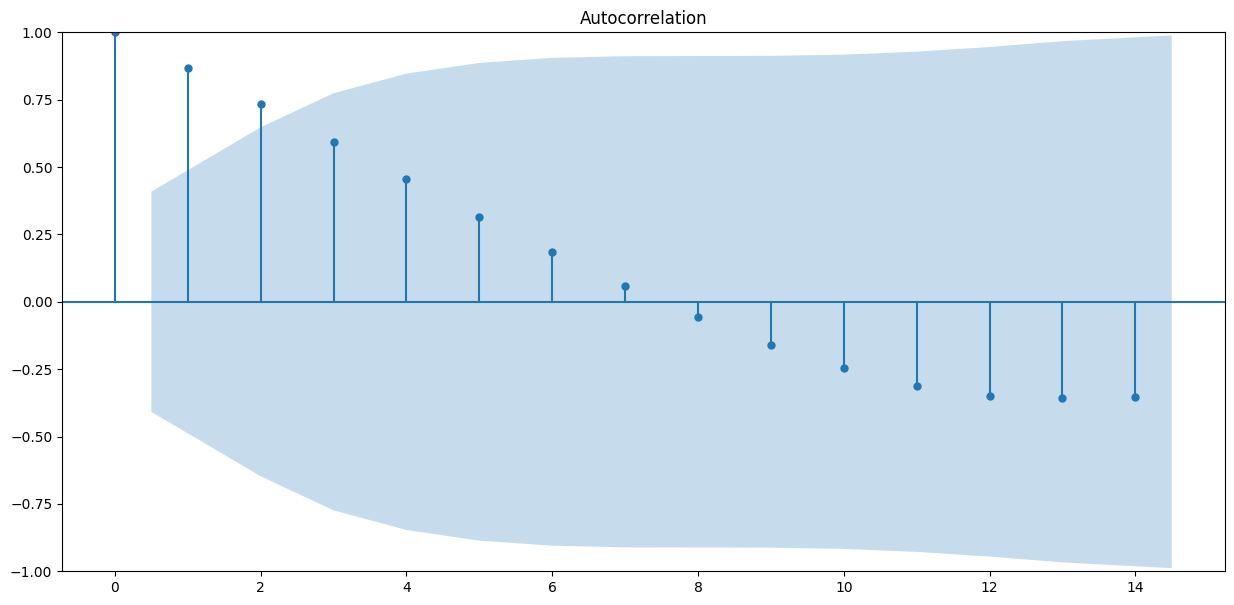

In [436]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(REU_safely['Coverage'])

#### iii) PARTIAL AUTOCORRELATION FACTOR (PACF), p

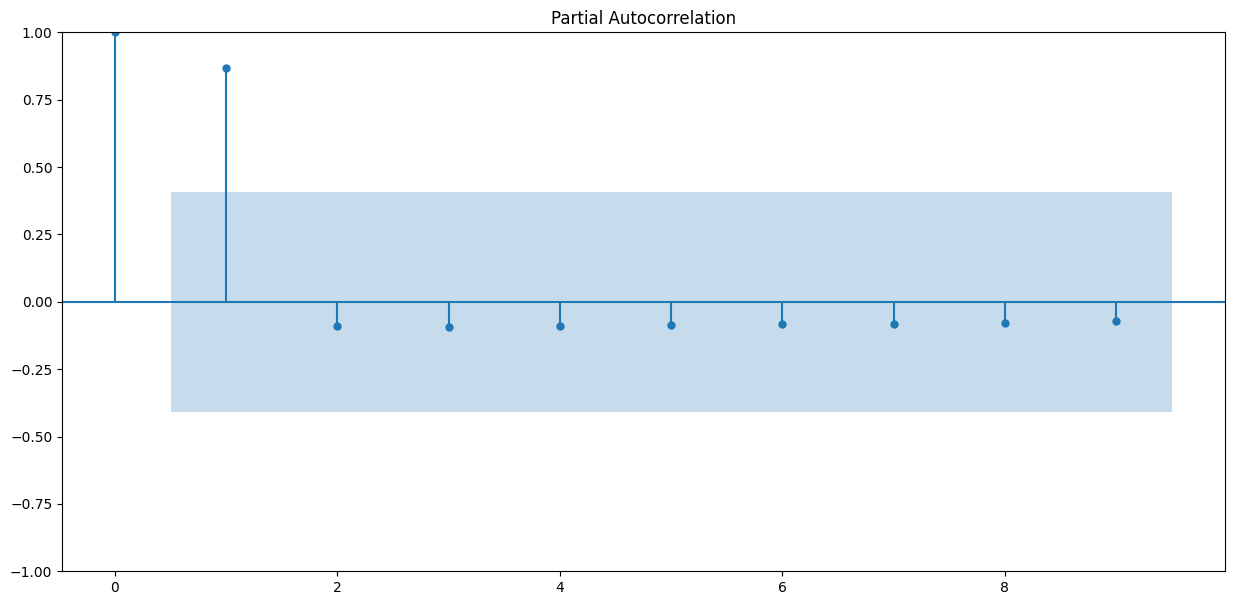

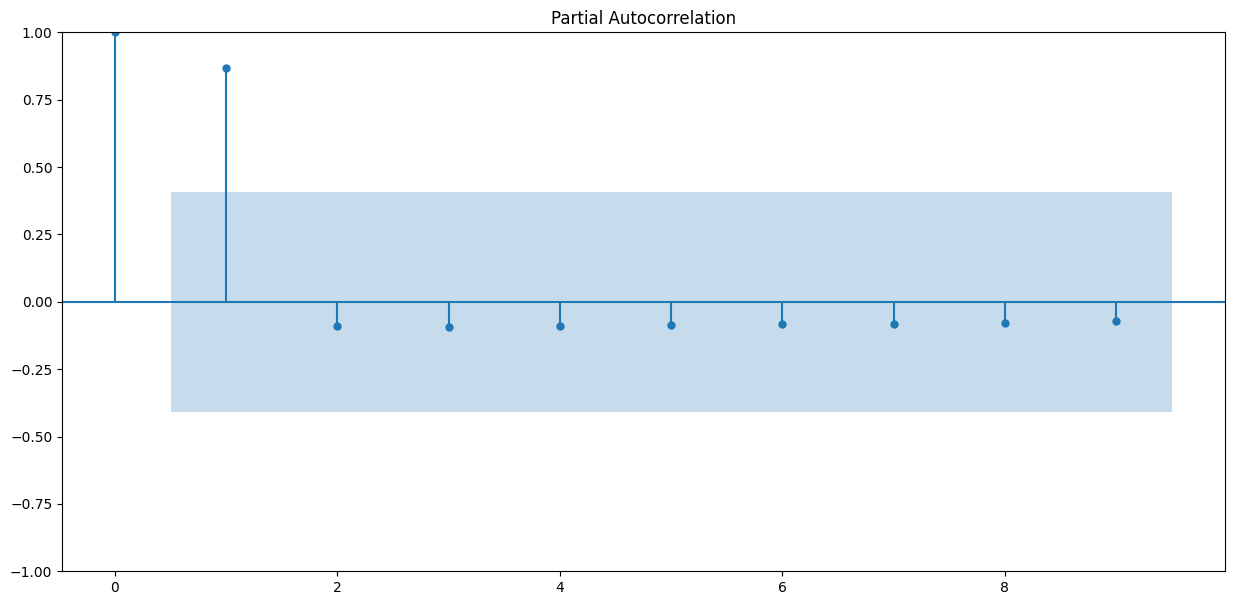

In [437]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(REU_safely['Coverage'], lags=9)

#### GRID SEARCH FOR OPTIMAL PARAMETERS

In [438]:
#Finding the best value for ARIMA
import itertools

#define the range of p,d,q parameters to take any value between 0 and 5
p=d=q=range(0,3)


#generate all possible combinations of p, d and q 
pdq = list(itertools.product(p,d,q))

#loop through all combinations of p, d, q and fit ARIMA model
warnings.filterwarnings("ignore") #to ignore warnings

for param in pdq:
    try:
        model_arima = ARIMA(REU_safely, order=param, enforce_invertibility=False, enforce_stationarity=False)
        model_arima_fit = model_arima.fit()
        print(param, model_arima_fit.aic)
    except:
        continue
#The AIC is an estimator of in sample prediction error and thereby relative quality of statistical models for a given set of data

(0, 0, 0) 37.94600206806297
(0, 0, 1) 15.402243319647427
(0, 0, 2) -1.4997398504870745
(0, 1, 0) -35.01446526705166
(0, 1, 1) -48.43691606694153
(0, 1, 2) -52.59357079942651
(0, 2, 0) -78.20097107700614
(0, 2, 1) -71.2163517172532
(0, 2, 2) -64.28438874884442
(1, 0, 0) -64.86940074682914
(1, 0, 1) -70.53633038857916
(1, 0, 2) -68.15419288227298
(1, 1, 0) -81.23573374610314
(1, 1, 1) -74.2011080866953
(1, 1, 2) -67.21650533544805
(1, 2, 0) -76.200973824538
(1, 2, 1) -68.66760012925971
(1, 2, 2) 103.92244403807616
(2, 0, 0) -79.20266753872694
(2, 0, 1) -77.19707264838571
(2, 0, 2) -70.20919298924912
(2, 1, 0) -74.20110906113833
(2, 1, 1) -71.08294203473494
(2, 1, 2) -65.1958716222052
(2, 2, 0) -69.21635425589348
(2, 2, 1) -66.66834345154405
(2, 2, 2) 106.32872353682225


#### Paramenters p, d, q = (1, 1, 0) with the lowest AIC of -81.235733374610314 is selected

#### SPLIT DATA

In [439]:
REU_train=REU_safely['2000-01-01':'2020-01-01']
REU_test=REU_safely['2020-01-01':'2022-01-01']

In [440]:
model_arima = ARIMA(REU_train, order=(1, 1, 0), enforce_invertibility=False) 
model_arima_fit = model_arima.fit()

print(model_arima_fit.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9358      0.123      7.618      0.000       0.695       1.177
sigma2         0.0011      0.000      9.125      0.000       0.001       0.001


In [441]:
print(model_arima_fit.summary().tables[2])

Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               211.38
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               2.72   Skew:                            -3.90
Prob(H) (two-sided):                  0.21   Kurtosis:                        16.89


#### TEST PREDICTION

In [442]:
#prediction of test data with ARIMA
prediction = model_arima_fit.predict(start=20, end=22)
REU_prediction=pd.DataFrame(prediction)
REU_prediction

predicted_mean
2020-01-01       96.038062
2021-01-01       95.906734
2022-01-01       95.791760

#### FORECAST OF YEAR 2030

In [443]:
#forecast of 2030 with ARIMA
forecast = model_arima_fit.get_forecast(steps=10)
forecast_conf = forecast.conf_int()

#put confidence intervals in df
REU_forecast =pd.DataFrame(forecast_conf)
REU_forecast

lower Coverage  upper Coverage
2021-01-01       95.842556       95.970913
2022-01-01       95.651924       95.931595
2023-01-01       95.455883       95.912449
2024-01-01       95.257260       95.909699
2025-01-01       95.057877       95.920635
2026-01-01       94.858975       95.943187
2027-01-01       94.661428       95.975705
2028-01-01       94.465867       96.016832
2029-01-01       94.272749       96.065428
2030-01-01       94.082408       96.120525

In [444]:
forecast.predicted_mean

2021-01-01    95.906734
2022-01-01    95.791760
2023-01-01    95.684166
2024-01-01    95.583479
2025-01-01    95.489256
2026-01-01    95.401081
2027-01-01    95.318567
2028-01-01    95.241349
2029-01-01    95.169089
2030-01-01    95.101467
Freq: AS-JAN, Name: predicted_mean, dtype: float64

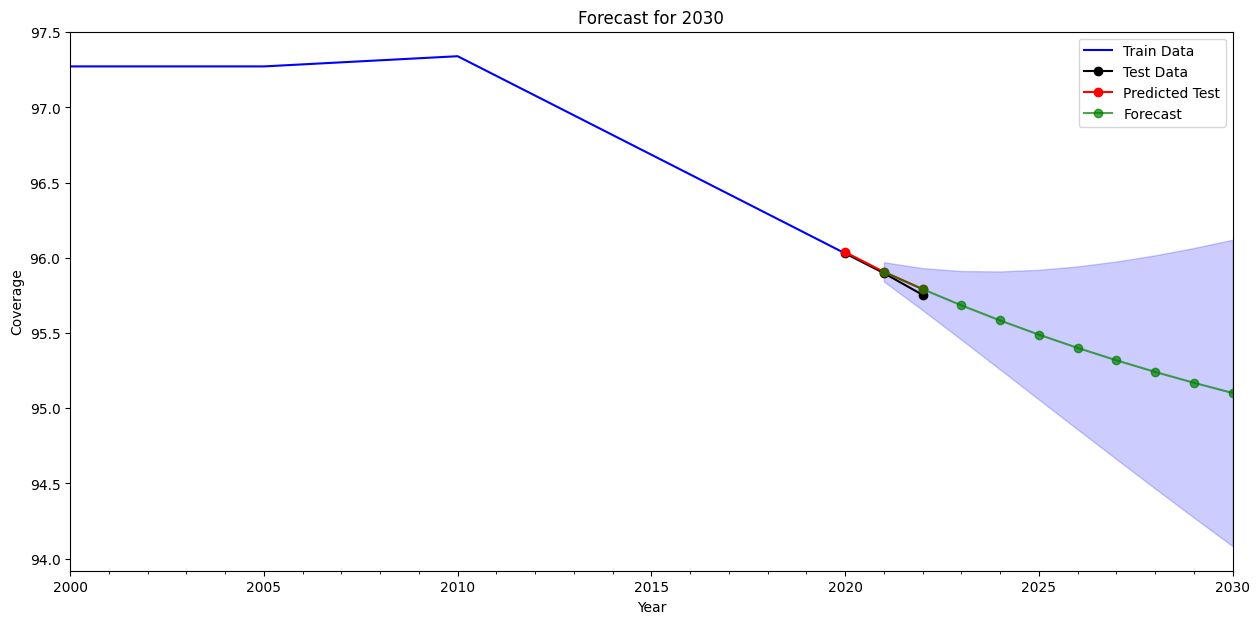

In [445]:
#plot observed values
ax = REU_train['Coverage'].plot(label='Train Data', color='blue')
ax = REU_test['Coverage'].plot(label='Test Data', marker='o', color='black')

#plot predicted test values
ax = REU_prediction['predicted_mean'].plot(label='Predicted Test', marker='o', color= 'red')

#Plot forecasted values
forecast.predicted_mean.plot(ax=ax, marker='o', label='Forecast', color='green', alpha=0.7)

#plot the range for confidence intervals
ax.fill_between(forecast_conf.index,
                forecast_conf.iloc[:, 0],
                forecast_conf.iloc[:, 1], color='b', alpha=0.2)

#set axes labels
ax.set_xlabel('Year')
ax.set_ylabel('Coverage')
plt.title('Forecast for 2030')
plt.legend(loc='best')

plt.show()

#### EVALUATE MODEL

In [446]:
# Calculate evaluation metrics
mse = mean_squared_error(REU_test, REU_prediction)
rmse = np.sqrt(mse)
mae = mean_absolute_error(REU_test, REU_prediction)
me=np.mean(REU_prediction['predicted_mean'] - REU_test['Coverage'])
mape = np.mean(np.abs(REU_prediction['predicted_mean'] - REU_test['Coverage']) / np.abs(REU_test['Coverage']) * 100)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Error (ME): {me}")

Mean Squared Error (MSE): 0.0005333176642361707
Root Mean Squared Error (RMSE): 0.02309367151918834
Mean Absolute Percentage Error (MAPE): 0.019167902766089356
Mean Absolute Error (MAE): 0.018366324761804737
Mean Error (ME): 0.018366324761804737


#### MODEL DIAGNOSTICS

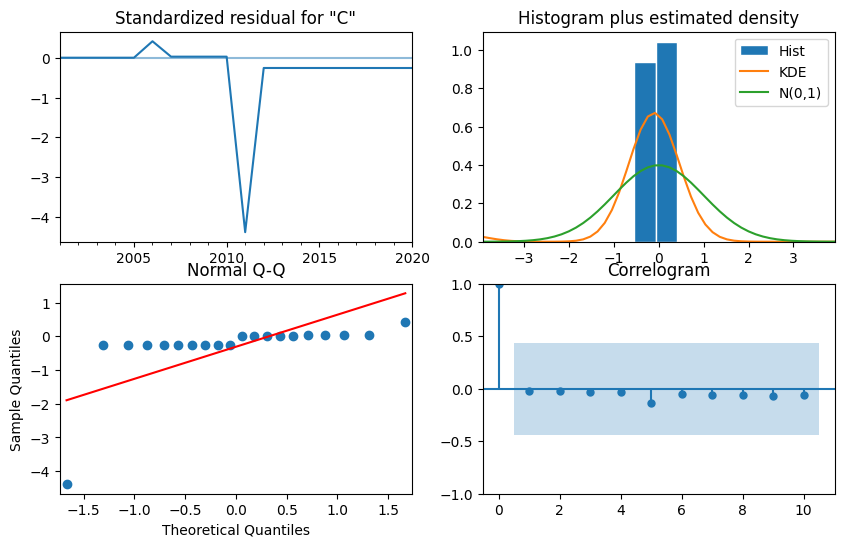

In [447]:
model_arima_fit.plot_diagnostics(figsize=(10,6))
plt.show()

## MODEL 2: AUTO ARIMA

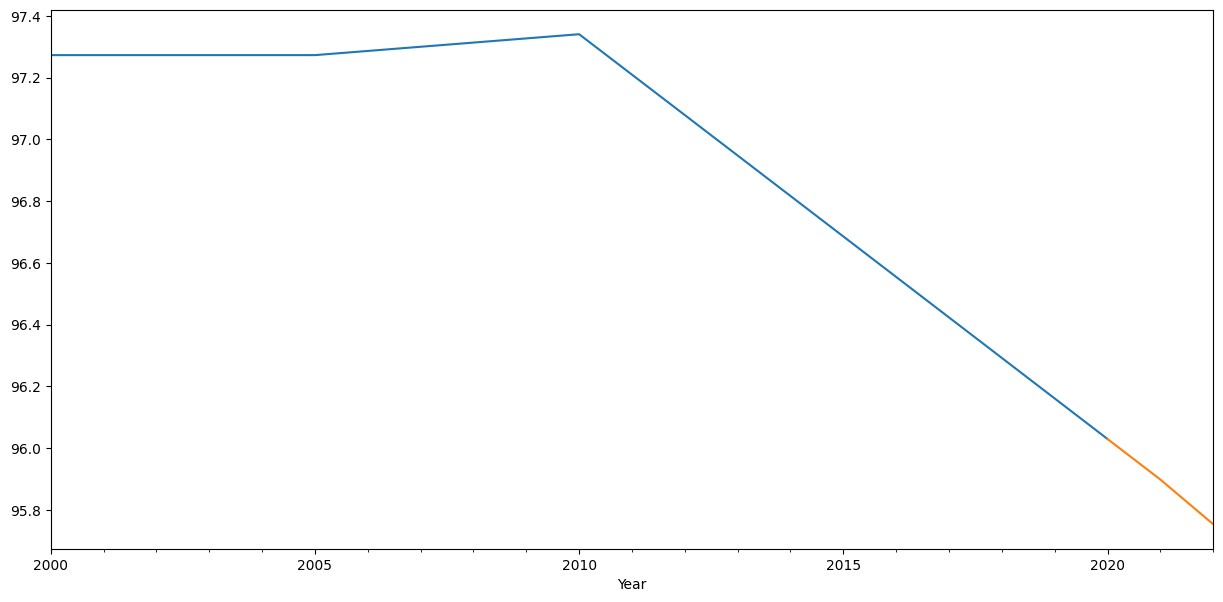

In [448]:
#plot train and test
REU_train['Coverage'].plot()
REU_test['Coverage'].plot()
plt.show()

#### FIT ARIMA INTO MODEL

In [449]:
#fit auto_arima into BFA dataset
REU_model = pm.auto_arima(REU_train,
                          m=1,
                          seasonal=False,
                          trace=True,
                          error_action='ignore',
                          stepwise=True,
                          suppress_warnings=True)  

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=-64.310, Time=0.13 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-72.213, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-70.253, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-70.258, Time=0.09 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-73.376, Time=0.02 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-68.256, Time=0.12 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.422 seconds


In [450]:
REU_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   21
Model:               SARIMAX(0, 2, 0)   Log Likelihood                  37.688
Date:                Fri, 15 Dec 2023   AIC                            -73.376
Time:                        21:37:29   BIC                            -72.432
Sample:                    01-01-2000   HQIC                           -73.216
                         - 01-01-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0011      0.000      9.164      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):               199.41
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):               0.00   Skew:                            -3.95
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### According to the algorithm the best ARIMA model is ARIMA (0, 2, 0). The ARIMA (0, 2, 0) representing p=0, d=2, q=0 model is chosen as the best-fitting model based on its AIC (Akaike Information Criterion) value. There is no seasonality in the data as represented by [0,0,0][0].

In [451]:
REU_arima = sm.tsa.ARIMA(REU_train, order=(0,2,0))

In [452]:
REU_result = REU_arima.fit()

#### RESIDUAL PLOTS

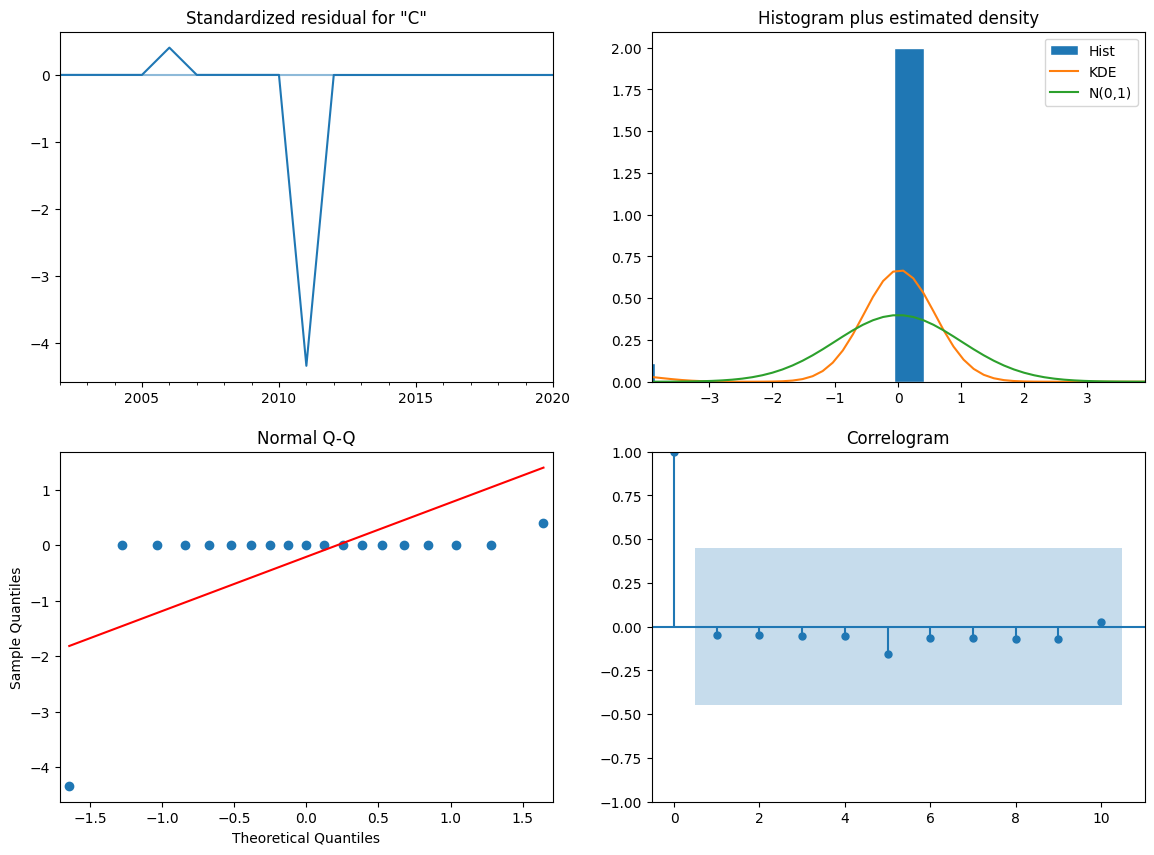

In [453]:
REU_result.plot_diagnostics(figsize=(14,10))
plt.show()

#### TEST PREDICTION

In [454]:
REU_result.predict(start=20, end=22)

2020-01-01    96.029636
2021-01-01    95.898306
2022-01-01    95.767017
Freq: AS-JAN, Name: predicted_mean, dtype: float64

In [455]:
forecast=REU_result.predict(start=20, end=22)

In [456]:
REU_forecast=pd.DataFrame(forecast)

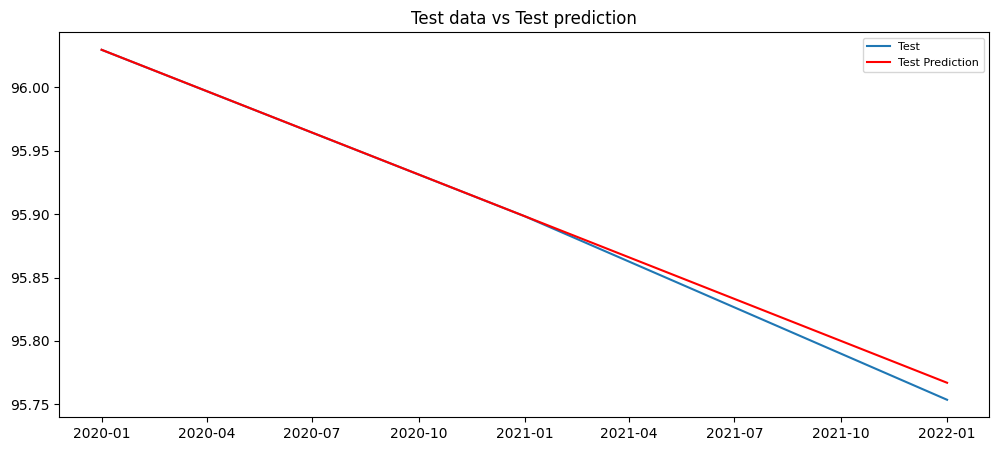

In [457]:
#plot Testing and Forecasted data
plt.figure(figsize=(12, 5), dpi=100)
#plt.plot(train, label='Train')
plt.plot(REU_test, label='Test')
plt.plot(forecast, label='Test Prediction', color='red')
plt.title('Test data vs Test prediction')
plt.legend(loc='best', fontsize=8)
plt.show()

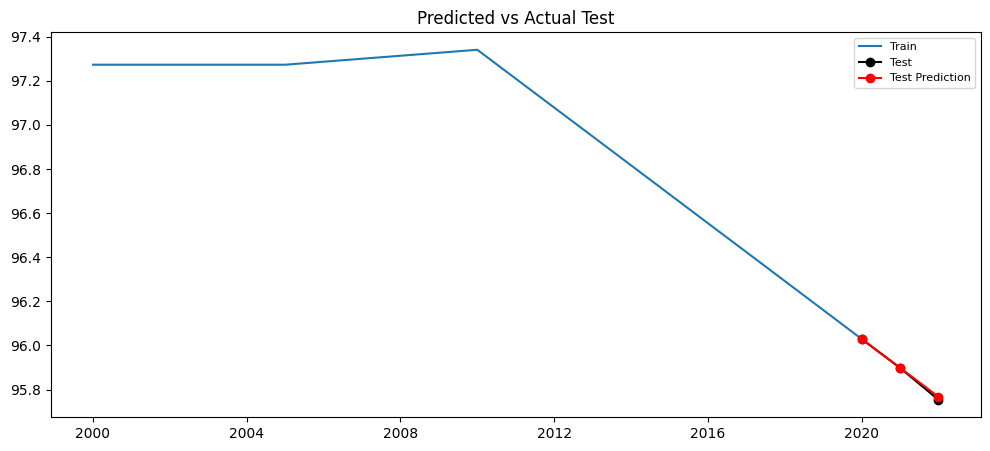

In [458]:
#plot the predictions for test set
plt.figure(figsize=(12, 5), dpi=100)

forecasted=REU_result.predict(start=20, end=22)

plt.plot(REU_train, label='Train')
plt.plot(REU_test, marker='o', label='Test', color= 'black')
plt.plot(forecasted, marker='o', label='Test Prediction', color='red')
plt.title('Predicted vs Actual Test')
plt.legend(loc='best', fontsize=8)
plt.show()

#### EVALUATE MODEL

In [459]:
REU_forecast

predicted_mean
2020-01-01       96.029636
2021-01-01       95.898306
2022-01-01       95.767017

In [460]:
# Calculate evaluation metrics
mse = mean_squared_error(REU_test, REU_forecast)
rmse = np.sqrt(mse)
mae = mean_absolute_error(REU_test, REU_forecast)
me=np.mean(REU_forecast['predicted_mean']- REU_test['Coverage'])
mape = np.mean(np.abs(REU_forecast['predicted_mean']- REU_test['Coverage']) / np.abs(REU_test['Coverage']) * 100)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Error (ME): {me}")

Mean Squared Error (MSE): 6.005140691113733e-05
Root Mean Squared Error (RMSE): 0.007749284283799203
Mean Absolute Percentage Error (MAPE): 0.004700343884965144
Mean Absolute Error (MAE): 0.004500806958484797
Mean Error (ME): 0.004500806958484797


#### FORECAST FOR YEAR 2030

In [461]:
# Getting forecast for 8 years
forecast = REU_result.get_forecast(steps=10, dynamic=False)
forecast_conf = forecast.conf_int()

In [462]:
forecast_conf

lower Coverage  upper Coverage
2021-01-01       95.833069       95.963543
2022-01-01       95.621142       95.912891
2023-01-01       95.391633       95.879822
2024-01-01       95.147120       95.861756
2025-01-01       94.889337       95.856959
2026-01-01       94.619537       95.864180
2027-01-01       94.338674       95.882464
2028-01-01       94.047508       95.911051
2029-01-01       93.746662       95.949318
2030-01-01       93.436658       95.996744

In [463]:
forecasted=REU_result.predict(start=20, end=30)
REU_forecasted=pd.DataFrame(forecasted)

In [464]:
REU_forecasted

predicted_mean
2020-01-01       96.029636
2021-01-01       95.898306
2022-01-01       95.767017
2023-01-01       95.635727
2024-01-01       95.504438
2025-01-01       95.373148
2026-01-01       95.241859
2027-01-01       95.110569
2028-01-01       94.979280
2029-01-01       94.847990
2030-01-01       94.716701

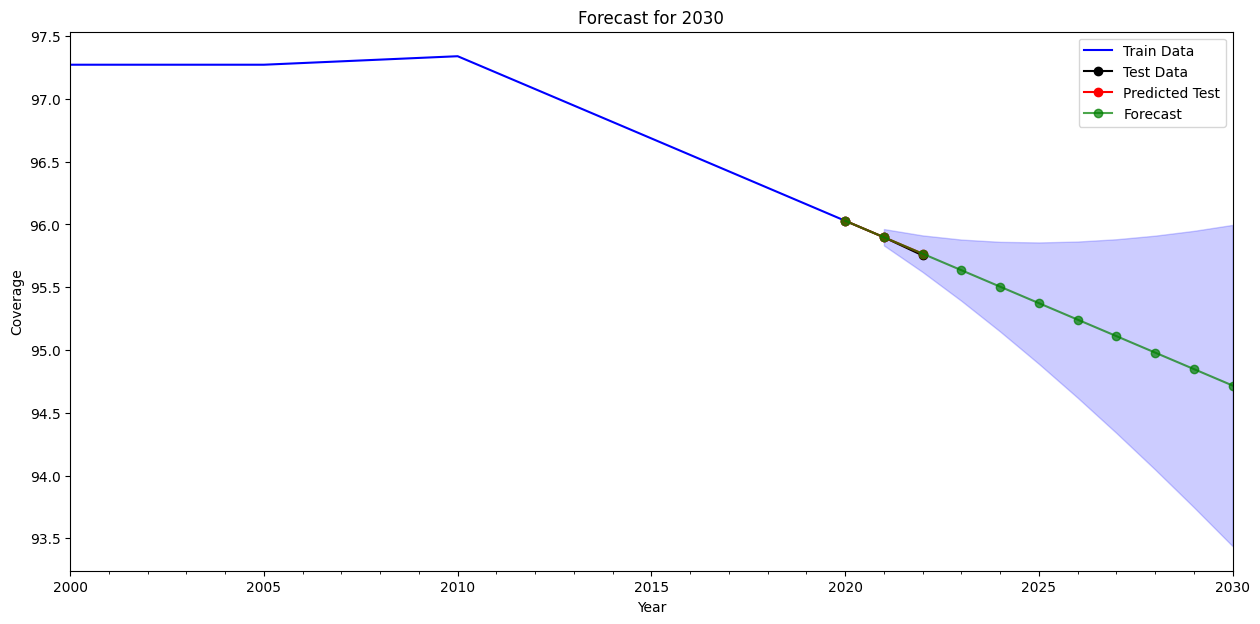

In [465]:
#plot observed values
ax = REU_train['Coverage'].plot(label='Train Data', color='blue')
ax = REU_test['Coverage'].plot(label='Test Data', marker='o', color='black')

#plot forecasted test values
ax = REU_forecast['predicted_mean'].plot(label='Predicted Test', marker='o', color= 'red')

#Plot forecasted values
REU_forecasted.predicted_mean.plot(ax=ax, marker='o', label='Forecast', color='green', alpha=0.7)

#plot the range for confidence intervals
ax.fill_between(forecast_conf.index,
                forecast_conf.iloc[:, 0],
                forecast_conf.iloc[:, 1], color='b', alpha=0.2)

#set axes labels
ax.set_xlabel('Year')
ax.set_ylabel('Coverage')
plt.title('Forecast for 2030')
plt.legend(loc='best')

plt.show()

## MODEL 3: HOLT WINTER

In [466]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [467]:
REUhwmodel = ExponentialSmoothing(REU_train.Coverage, trend = 'add').fit()
REUhwmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       ExponentialSmoothing Model Results                       
================================================================================
Dep. Variable:                 Coverage   No. Observations:                   21
Model:             ExponentialSmoothing   SSE                              0.021
Optimized:                         True   AIC                           -137.008
Trend:                         Additive   BIC                           -132.829
Seasonal:                          None   AICC                          -131.008
Seasonal Periods:                  None   Date:                 Fri, 15 Dec 2023
Box-Cox:                          False   Time:                         21:37:31
Box-Cox Coeff.:                    None                                         
==============================================================================
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.9988297                alpha                 True
smoothing_trend            0.9988297                 beta                 True
initial_level              97.273042                  l.0                 True
initial_trend            -8.1042e-05                  b.0                 True
------------------------------------------------------------------------------
"""

#### TEST PREDICTION

In [468]:
test_pred = REUhwmodel.predict(start=20, end=22)
test_pred=pd.DataFrame(test_pred)
test_pred

0
2020-01-01  96.029636
2021-01-01  95.898306
2022-01-01  95.767017

In [469]:
REU_test['Coverage']

Year
2020-01-01    96.029596
2021-01-01    95.898266
2022-01-01    95.753595
Name: Coverage, dtype: float64

<Axes: xlabel='Year'>

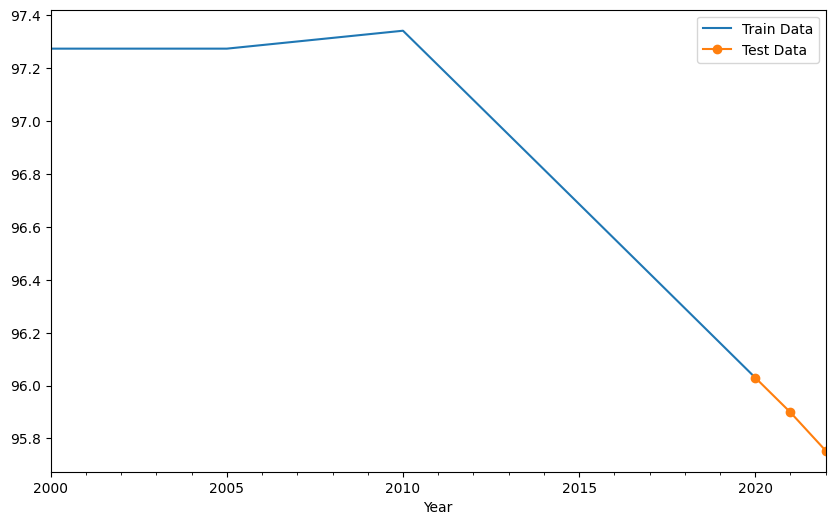

In [470]:
REU_train['Coverage'].plot(legend=True, label='Train Data', figsize=(10,6))
REU_test['Coverage'].plot(legend=True, marker = 'o', label='Test Data')

#test_pred.plot(legend=True, marker= 'o', label='Predicted Test')

#### MODEL EVALUATION

In [471]:
# Calculate evaluation metrics
mse = mean_squared_error(REU_test, test_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(REU_test, test_pred)
me=np.mean(test_pred[0]- REU_test['Coverage'])
mape = np.mean(np.abs(test_pred[0] - REU_test['Coverage']) / np.abs(REU_test['Coverage']) * 100)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Error (ME): {me}")

Mean Squared Error (MSE): 6.00526766045384e-05
Root Mean Squared Error (RMSE): 0.007749366206635121
Mean Absolute Percentage Error (MAPE): 0.004700458552715109
Mean Absolute Error (MAE): 0.004500916894651634
Mean Error (ME): 0.004500916894651634


In [472]:
REU_safely['Coverage'].mean(), np.sqrt(REU_safely['Coverage'].var())

(96.87203597245852, 0.5306320702717886)

#### FORECAST FOR 2030

In [473]:
model = ExponentialSmoothing(REU_safely.Coverage, trend ='add').fit()

In [474]:
pred = REUhwmodel.predict(start=22, end=30)
#pred = model.forecast(steps=8)
pred=pd.DataFrame(pred)
pred

0
2022-01-01  95.767017
2023-01-01  95.635728
2024-01-01  95.504438
2025-01-01  95.373149
2026-01-01  95.241859
2027-01-01  95.110570
2028-01-01  94.979280
2029-01-01  94.847991
2030-01-01  94.716701

#### PLOT ALL ON SAME PLOT

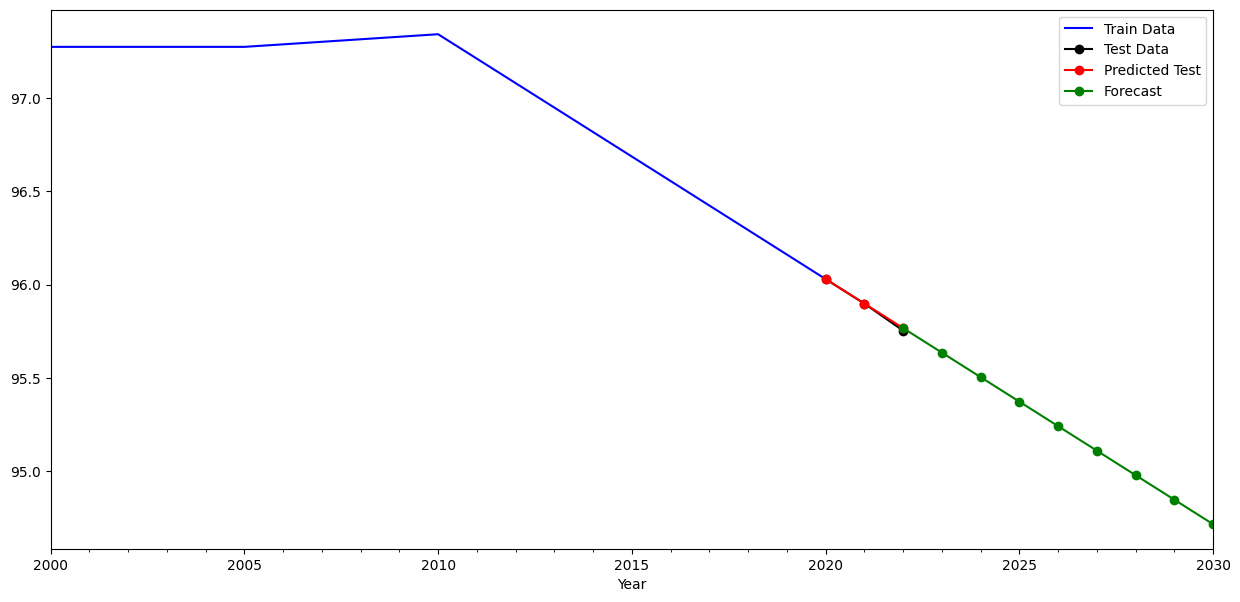

In [475]:
#plot observed values
ax = REU_train['Coverage'].plot(label='Train Data', color='blue')
ax = REU_test['Coverage'].plot(label='Test Data', marker='o', color='black')

#plot forecasted test values
ax = test_pred[0].plot(label='Predicted Test', marker='o', color= 'red')
ax = pred[0].plot(label='Forecast', marker='o', color= 'green')

#train, = plt.plot(BFA_train.index, BFA_train,'b.-', label='Train Data')
#test, = plt.plot(BFA_test.index, BFA_test, 'r.-', label= 'Test Data')
#test_pred, = plt.plot(test_pred.index, test_pred,  'g.-', label= 'Predicted Test')
#Plot forecasted values
#test_pred[0].plot(ax=ax, marker='o', label='Forecast', color='orange', alpha=0.7)

plt.legend()
plt.show()

## PLOT HOLT MULTIPLOTS

KeyError: 'ZWE_test_pred'

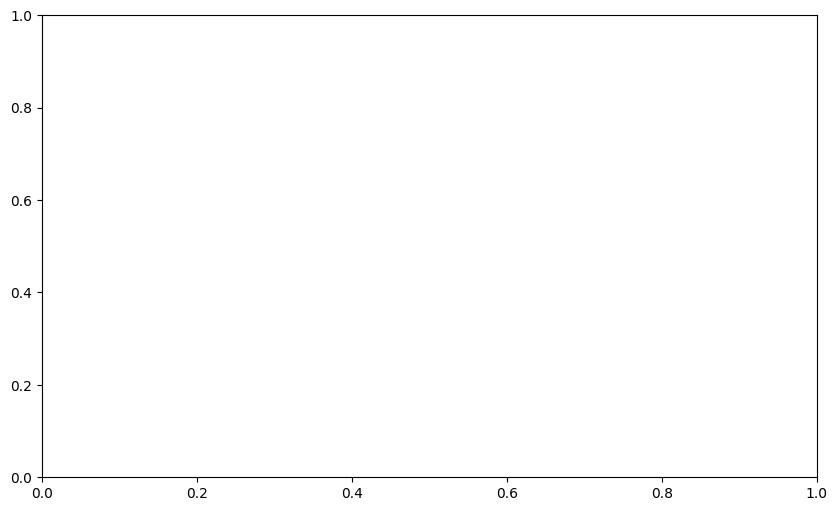

In [476]:

countries = ['ZWE', 'CAF', 'COD', 'UGA', 'LSO', 'NGA']
fig, ax = plt.subplots(figsize=(10, 6))

for country in countries:
    train_data = globals()[f'{country}_train']
    test_data = globals()[f'{country}_test']
    test_pred_data = globals()[f'{country}_test_pred']
    pred_data = globals()[f'{country}_pred']

    # Plot observed values
    ax = train_data['Coverage'].plot(label=f'{country} Train Data', linestyle='dashed')
    ax = test_data['Coverage'].plot(label=f'{country} Test Data', marker='o')

    # Plot predicted test values
    ax = test_pred_data[0].plot(label=f'{country} Predicted Test', marker='o')

    # Plot forecasted values
    ax = pred_data[0].plot(label=f'{country} Forecast', marker='o')

# Set axes labels
ax.set_xlabel('Year')
ax.set_ylabel('Coverage')

plt.title('Forecast for Multiple Countries - 2030')
plt.legend(loc='best')
plt.show()

In [ ]:
##train data = ZWE_train, CAF_train, COD_train, UGA_train, LSO_train, NGA_train
#test data =ZWE_test, CAF_test, COD_test, UGA_test, LSO_train, NGA_test

countries = ['ZWE', 'CAF', 'COD', 'UGA', 'LSO', 'NGA']

for country in countries:
    train_data = globals()[f'{country}_train']
    test_data = globals()[f'{country}_test']
    prediction_data = globals()[f'{country}_prediction']
    forecast_data = globals()[f'{country}_forecast']
    forecast_conf_data = globals()[f'{country}_forecast_conf']
    
    # Create a subplot for each country
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Plot observed values
    ax = train_data['Coverage'].plot(label='Train Data', color='blue')
    ax = test_data['Coverage'].plot(label='Test Data', marker='o', color='black')
    
    # Plot predicted test values
    ax = prediction_data['predicted_mean'].plot(label='Predicted Test', marker='o', color='red')
    
    # Plot forecasted values
    forecast_data.predicted_mean.plot(ax=ax, marker='o', label='Forecast', color='green', alpha=0.7)
    
    # Plot the range for confidence intervals
    ax.fill_between(forecast_conf_data.index,
                    forecast_conf_data.iloc[:, 0],
                    forecast_conf_data.iloc[:, 1], color='b', alpha=0.2)
    
    # Set axes labels
    ax.set_xlabel('Year')
    ax.set_ylabel('Coverage')
    
    plt.title(f'Forecast for {country} - 2030')
    plt.legend(loc='best')
    
    plt.show()